In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
#import seaborn as sns
import os

In [3]:
#getting all the file names
directory = "dataset50"
files = []
for i in os.listdir(directory):
    path = os.path.join(directory,i)
    files.append(path)
#the list files contains location of 
print(files)

['dataset50\\0.csv', 'dataset50\\1.csv', 'dataset50\\10.csv', 'dataset50\\11.csv', 'dataset50\\12.csv', 'dataset50\\13.csv', 'dataset50\\14.csv', 'dataset50\\15.csv', 'dataset50\\16.csv', 'dataset50\\17.csv', 'dataset50\\18.csv', 'dataset50\\19.csv', 'dataset50\\2.csv', 'dataset50\\20.csv', 'dataset50\\21.csv', 'dataset50\\22.csv', 'dataset50\\23.csv', 'dataset50\\24.csv', 'dataset50\\25.csv', 'dataset50\\26.csv', 'dataset50\\27.csv', 'dataset50\\28.csv', 'dataset50\\29.csv', 'dataset50\\3.csv', 'dataset50\\30.csv', 'dataset50\\31.csv', 'dataset50\\32.csv', 'dataset50\\33.csv', 'dataset50\\34.csv', 'dataset50\\35.csv', 'dataset50\\36.csv', 'dataset50\\37.csv', 'dataset50\\38.csv', 'dataset50\\39.csv', 'dataset50\\4.csv', 'dataset50\\40.csv', 'dataset50\\41.csv', 'dataset50\\42.csv', 'dataset50\\43.csv', 'dataset50\\44.csv', 'dataset50\\45.csv', 'dataset50\\46.csv', 'dataset50\\47.csv', 'dataset50\\48.csv', 'dataset50\\49.csv', 'dataset50\\5.csv', 'dataset50\\6.csv', 'dataset50\\7.csv',

In [4]:
for i in os.listdir(directory):
    path = os.path.join(directory,i)
    print(path)

dataset50\0.csv
dataset50\1.csv
dataset50\10.csv
dataset50\11.csv
dataset50\12.csv
dataset50\13.csv
dataset50\14.csv
dataset50\15.csv
dataset50\16.csv
dataset50\17.csv
dataset50\18.csv
dataset50\19.csv
dataset50\2.csv
dataset50\20.csv
dataset50\21.csv
dataset50\22.csv
dataset50\23.csv
dataset50\24.csv
dataset50\25.csv
dataset50\26.csv
dataset50\27.csv
dataset50\28.csv
dataset50\29.csv
dataset50\3.csv
dataset50\30.csv
dataset50\31.csv
dataset50\32.csv
dataset50\33.csv
dataset50\34.csv
dataset50\35.csv
dataset50\36.csv
dataset50\37.csv
dataset50\38.csv
dataset50\39.csv
dataset50\4.csv
dataset50\40.csv
dataset50\41.csv
dataset50\42.csv
dataset50\43.csv
dataset50\44.csv
dataset50\45.csv
dataset50\46.csv
dataset50\47.csv
dataset50\48.csv
dataset50\49.csv
dataset50\5.csv
dataset50\6.csv
dataset50\7.csv
dataset50\8.csv
dataset50\9.csv


In [5]:
#creating a dictionary to store all the data
all_data=  {}
for i in files:
    all_data[i[10:-4]] = pd.read_csv(i)

print(len(all_data))
print(all_data['0'][:10])

50
   Unnamed: 0    value   timestamp
0           0  46.9182  1595323800
1           1  46.9255  1595327400
2           2  46.9373  1595331000
3           3  46.9441  1595334600
4           4  46.9644  1595338200
5           5  46.9702  1595341800
6           6  46.9748  1595345400
7           7  46.9841  1595349000
8           8  46.9644  1595352600
9           9  46.9699  1595356200


In [6]:
for key in all_data:
    all_data[key].columns = ['Index', 'Values', 'Timestamps']
    
    

print(all_data['0'].head())


   Index   Values  Timestamps
0      0  46.9182  1595323800
1      1  46.9255  1595327400
2      2  46.9373  1595331000
3      3  46.9441  1595334600
4      4  46.9644  1595338200


In [7]:
#lets drop the index column to make things a bit clean
for key in all_data:
    all_data[key] = all_data[key].drop(['Index'], axis = 1)

print(all_data['0'].head())

    Values  Timestamps
0  46.9182  1595323800
1  46.9255  1595327400
2  46.9373  1595331000
3  46.9441  1595334600
4  46.9644  1595338200


<h4>Now let's just take the first datasets and try to run some experiments on it. After we are done we can run our model through all the datasets later</h4>

In [8]:
data0 = all_data['0']
data0.head()

Values  Timestamps
0  46.9182  1595323800
1  46.9255  1595327400
2  46.9373  1595331000
3  46.9441  1595334600
4  46.9644  1595338200

In [9]:
#We can see that our timestamps are in UNIX format, hence we need to convert our timestamps
#into readable format
for key in all_data:
    all_data[key].Timestamps = pd.to_datetime(all_data[key].Timestamps, unit="s")

all_data['0']


Values          Timestamps
0    46.9182 2020-07-21 09:30:00
1    46.9255 2020-07-21 10:30:00
2    46.9373 2020-07-21 11:30:00
3    46.9441 2020-07-21 12:30:00
4    46.9644 2020-07-21 13:30:00
..       ...                 ...
835  47.9521 2020-08-25 04:30:00
836  47.9554 2020-08-25 05:30:00
837  47.9419 2020-08-25 06:30:00
838  47.9519 2020-08-25 07:30:00
839  47.9582 2020-08-25 08:30:00

[840 rows x 2 columns]

In [10]:
#creating train and test splits for time series problems
def train_test_timestamps(split_size, data):
    split_point = int(split_size * len(data))
    X_train, y_train = data.Timestamps[:split_point], data.Values[:split_point]
    x_test, y_test = data.Timestamps[split_point:], data.Values[split_point:]
    return X_train, y_train, x_test, y_test

X_train_demo, y_train_demo, x_test_demo, y_test_demo = train_test_timestamps(0.75, data0)


In [11]:
print(data0.shape)

(840, 2)


In [12]:
def plot_timeseries(timestamps, values,start=0,  end= None, label=None):
    plt.plot(timestamps[start:end], values[start:end], label = label)
    plt.xlabel("Timestamp")
    plt.ylabel("Commodity price")
    plt.legend()
    plt.grid(True)



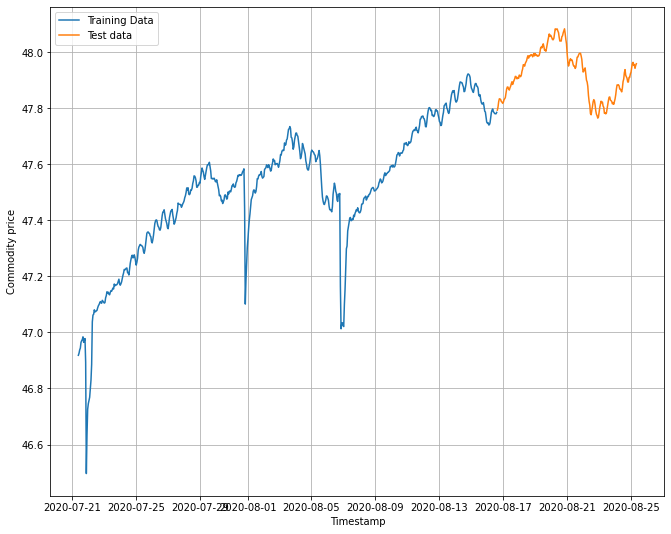

In [13]:
plt.figure(figsize=(11,9))
plot_timeseries(X_train_demo, y_train_demo, label='Training Data')
plot_timeseries(x_test_demo, y_test_demo, label= "Test data")

<h4>Now let's start modelling. First with a naive Model</h4>

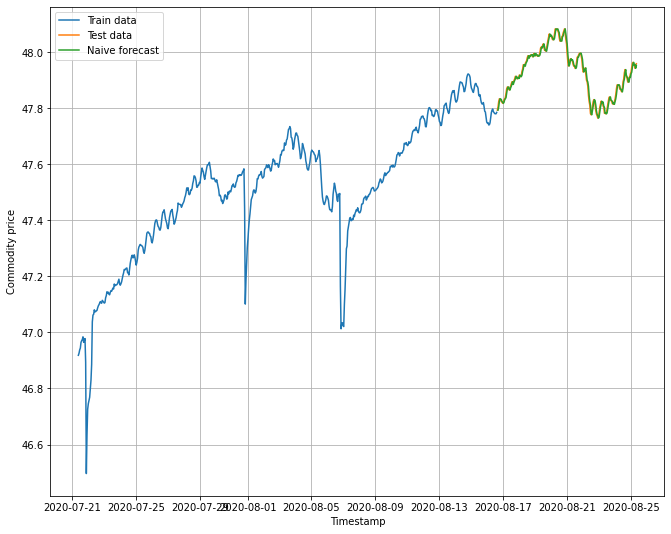

In [14]:
#Naive Model
#directly predicting the past value
naive_forecast = y_test_demo[:-1]
plt.figure(figsize=(11,9))
plot_timeseries(timestamps=X_train_demo, values=y_train_demo, label="Train data")
plot_timeseries(timestamps=x_test_demo, values = y_test_demo, label= "Test data")
plot_timeseries(timestamps=x_test_demo[1:], values= naive_forecast, label = "Naive forecast")


In [15]:
#Here we create a function to evaluate our predictions on metrics:
#Mean absolute Error
#Mean Squared Error
#Rootmean Squared Error
#Mean absolute percentage Error

def compute_metrics(actual, predictions):
    predictions = tf.reshape(predictions,shape=(len(predictions),))
    actual = tf.reshape(actual, shape=(len(actual),))

    mae = tf.keras.metrics.mean_absolute_error(actual, predictions)
    mse = tf.keras.metrics.mean_squared_error(actual, predictions)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(actual, predictions)

    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()}

In [16]:
naive_model_results = compute_metrics(y_test_demo[1:], naive_forecast)
print(naive_model_results)

{'mae': 0.008833492822966556, 'mse': 0.00012303301435406653, 'rmse': 0.011092024808576049, 'mape': 0.01843455073063092}


In [17]:
naive_forecast

630    47.7926
631    47.8036
632    47.8228
633    47.8331
634    47.8325
        ...   
834    47.9630
835    47.9521
836    47.9554
837    47.9419
838    47.9519
Name: Values, Length: 209, dtype: float64

In [18]:

def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [19]:
#ref:https://www.tensorflow.org/tutorials/structured_data/time_series
#Here we create a function to make windows of the timeseries data so that we can train it as a regression problem
def make_windows(x, window_size=10, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [21]:
commodity_prices0 = data0.Values.values
timestamps0 = data0.Timestamps.values
demo_windows, demo_labels = make_windows(commodity_prices0)
demo_timestamp_windows, demo_timestamp_labels = make_windows(timestamps0)
print(demo_windows.shape)
print(demo_labels.shape)
print(demo_timestamp_windows.shape)
print(demo_timestamp_labels.shape)

(830, 10)
(830, 1)
(830, 10)
(830, 1)


In [22]:
def train_test_split_values(input_windows, targets, test_split = 0.25):
    split_point = int(len(input_windows)*(1- test_split))
    train_windows = input_windows[:split_point]
    train_labels = targets[:split_point]
    test_windows = input_windows[split_point:]
    test_labels = targets[split_point:]
    return train_windows, test_windows, train_labels, test_labels

def train_test_split_timestamps(timestamp_labels, test_split = 0.25):
    split_point = int(len(timestamp_labels)*(1 - test_split))
    train_timestamps = timestamp_labels[:split_point]
    test_timestamps = timestamp_labels[split_point:]
    return train_timestamps, test_timestamps    

In [23]:
X_train0, x_test0, y_train0, y_test0 = train_test_split_values(demo_windows, demo_labels)
train_timestamps_0, test_timestamps_0 = train_test_split_timestamps(demo_timestamp_labels)
print(X_train0.shape)
print(y_train0.shape)
print(train_timestamps_0.shape)
print(test_timestamps_0.shape)

(622, 10)
(622, 1)
(622, 1)
(208, 1)


<h4>Now that we have our data in a suitable form to train and test, we can start building our Nbeats model with REVIN normalisation technique</h4>

In [24]:
from tensorflow.keras.layers import Dense,Input,Dense, LSTM
from tensorflow.keras import Model

<h5>First let's start by creating the ReVin normalisation and denormalisation layers.
The normalisation layer will also pass the mean, variance, gamma, beta and noise to the denormalised layer which will use it for denormalisation</h5>

In [25]:

class ReVIN_normalization(tf.keras.layers.Layer):
    def __init__(self, noise, **kwargs):
        super().__init__(**kwargs)
        self.noise = noise
        self.gamma = tf.Variable(initial_value = 0.1, trainable = True)
        self.beta = tf.Variable(initial_value = 0.1, trainable = True)
        
    
    def call(self,inputs):
        self.mean = tf.math.reduce_mean(inputs)
        self.variance = tf.math.reduce_variance(inputs)
        x = inputs
        x = (x - self.mean)/tf.math.sqrt(self.variance + self.noise)
        #for i in x:
         #   i = (i - self.mean)/tf.math.sqrt(self.variance+self.noise)
        transformed = self.gamma*x + self.beta
        #The below array denorm_array will return the parameters to the denormalisation layer to use.
        denorm_array = [self.mean, self.variance, self.gamma, self.beta, self.noise]
        
        return transformed,  denorm_array

In [26]:
#Here we are creating the denormalisation layer which takes in parameters from the normalisation layer.
class ReVinDenormalize(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        predictions, denorm_array = inputs
        mean = denorm_array[0]
        variance = denorm_array[1]
        gamma = denorm_array[2]
        beta = denorm_array[3]
        noise = denorm_array[4]
        retransformed = (predictions - beta)/gamma
        denormalized = mean + (retransformed*tf.math.sqrt(variance + noise))

        return denormalized

<h5>Now let's start by creating the Nbeatsblock layer followed by the Nbeats stack layer. The Nbeats stack layer will be using the Nbeats block layer.</h5>

In [27]:

class NBeatsblock(tf.keras.layers.Layer):
    def __init__(self, input_size, forecast_horizon,no_neurons, no_layers,no_theta_neurons,**kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.forecast_horizon = forecast_horizon
        self.no_neurons = no_neurons
        self.no_layers = no_layers
        self.no_theta_neurons = no_theta_neurons
        #fully connected layers used in the Nbeats block
        self.fc_relu = [tf.keras.layers.Dense(self.no_neurons, activation = 'relu')for i in range(self.no_layers)]
        self.theta = tf.keras.layers.Dense(self.no_theta_neurons, activation ="linear")
    def call(self, inputs):
        x = inputs
        for i in self.fc_relu:
            x = i(x)
        theta_output= self.theta(x)
        backcast, forecast = theta_output[:,:self.input_size], theta_output[:, -self.forecast_horizon:]
        return backcast, forecast

#ref : Daniel Bourke youtube

In [28]:
class NbeatsStack(tf.keras.layers.Layer):
    def __init__(self,no_of_blocks,input_sp, block_input_size, block_forecast_horizon, no_block_layers, no_theta_neurons, **kwargs):
        self.no_of_blocks = no_of_blocks
        self.input_sp = input_sp
        self.block_input_size = block_input_size
        self.block_forecast_horizon = block_forecast_horizon
        self.no_block_layers = no_block_layers
        self.no_theta_neurons = no_theta_neurons
        self.input_layer = Input(shape = input_sp)
        self.nbeats_block_layer = NBeatsblock(input_size=block_input_size,  forecast_horizon = block_forecast_horizon,
        no_theta_neurons = no_theta_neurons, no_neurons=128,no_layers = no_block_layers )

        super().__init__(**kwargs)

    def call(self, inputs):
        x = inputs
        backcast, forecast = self.nbeats_block_layer(x)
        residuals = tf.keras.layers.subtract([x, backcast])#residual connection between blocks
        #till the above line we have created the first block and in the for loop we will create the rest of the blocks with residual connections
        for i,j in enumerate(range(self.no_of_blocks)):
            backcast, block_forecast = self.nbeats_block_layer(residuals)
            residuals = tf.keras.layers.subtract([residuals, backcast])
            forecast = tf.keras.layers.add([forecast, block_forecast])

        return residuals, forecast

<h5>Now we start creating our Nbeats model with REVIN normalisation</h5>

In [29]:
tf.keras.backend.clear_session()
#input layer
Input_layer = Input(shape = X_train0.shape[1])
#initialising the revin layer
revin_init = ReVIN_normalization(noise=0.01)
#Revin layer which is connected to the input layer
revin_layer, denorm_array = revin_init(Input_layer)
stack_layer = NbeatsStack(no_of_blocks=4, input_sp  = X_train0.shape[1], block_input_size=10, block_forecast_horizon=1, no_block_layers=4, no_theta_neurons=11)
#creating the first NBeats stack layer which takes normalised inputs from the revin layer
residuals_stack, forecast = stack_layer(revin_layer)
#residual connection
residuals = tf.keras.layers.subtract([revin_layer, residuals_stack])
#creating 10 more nbeats stacks
for i in enumerate(range(10)):
    residuals_stack, stack_forecast = NbeatsStack(no_of_blocks=4, input_sp = X_train0.shape[1], block_input_size=10, block_forecast_horizon=1, no_block_layers=4, no_theta_neurons=11)(residuals)
    residuals = tf.keras.layers.subtract([residuals, residuals_stack])
    forecast = tf.keras.layers.add([forecast, stack_forecast])
#The global forecast from the nbeats stack goes into the denormalisation layer    
denorm_init = ReVinDenormalize()
denorm_layer = denorm_init([forecast, denorm_array])
model_nbeats_revin = Model(inputs = Input_layer, outputs = denorm_layer)
model_nbeats_revin.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 re_vin_normalization (ReVIN_no  ((None, 10),        2           ['input_1[0][0]']                
 rmalization)                    [(),                                                             
                                 (),                                                              
                                 (),                                                              
                                 (),                                                              
                                 ()])                                                         

In [30]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        if logs.get('val_root_mean_squared_error') <= 0.02:
            self.model.stop_training = True
        
        

In [31]:
#choosing a low learning rate since it's a regression problem.
optimizer_nb = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model_nbeats_revin.compile(optimizer=optimizer_nb, loss = 'mae', metrics = [tf.keras.metrics.RootMeanSquaredError()])
batch_size = 128
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=2, min_delta=0.01)
model_nbeats_revin.fit(X_train0, y_train0, epochs=100, validation_data=(x_test0, y_test0), batch_size=batch_size, callbacks=CustomCallback())

Epoch 1/100
5/5 [==============================] - 10s 587ms/step - loss: 0.2011 - root_mean_squared_error: 0.2782 - val_loss: 0.0421 - val_root_mean_squared_error: 0.0481
Epoch 2/100
5/5 [==============================] - 1s 125ms/step - loss: 0.0622 - root_mean_squared_error: 0.0890 - val_loss: 0.0279 - val_root_mean_squared_error: 0.0333
Epoch 3/100
5/5 [==============================] - 1s 117ms/step - loss: 0.0381 - root_mean_squared_error: 0.0647 - val_loss: 0.0184 - val_root_mean_squared_error: 0.0252
Epoch 4/100
5/5 [==============================] - 1s 126ms/step - loss: 0.0307 - root_mean_squared_error: 0.0577 - val_loss: 0.0177 - val_root_mean_squared_error: 0.0250
Epoch 5/100
5/5 [==============================] - 1s 115ms/step - loss: 0.0261 - root_mean_squared_error: 0.0525 - val_loss: 0.0160 - val_root_mean_squared_error: 0.0224
Epoch 6/100
5/5 [==============================] - 1s 131ms/step - loss: 0.0244 - root_mean_squared_error: 0.0499 - val_loss: 0.0144 - val_root_

In [33]:
#getting our first forecast
nbeats_revin_forecast = model_nbeats_revin.predict(x_test0)

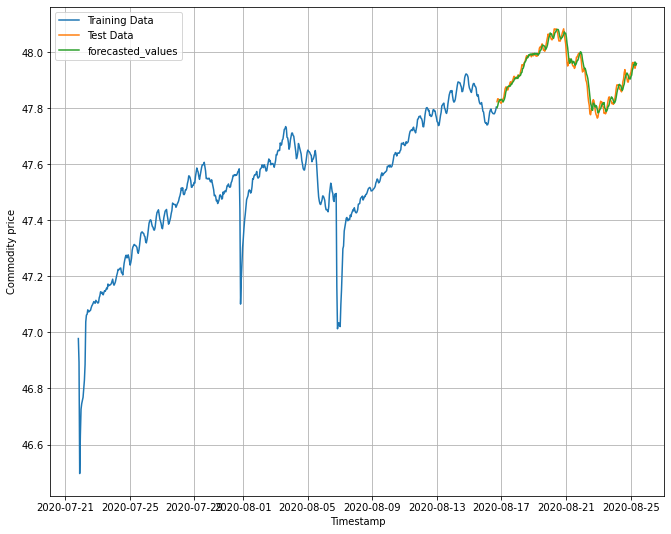

In [35]:
plt.figure(figsize=(11,9))
plot_timeseries(timestamps = train_timestamps_0, values = y_train0, label='Training Data')
plot_timeseries(timestamps= test_timestamps_0, values=y_test0, label = 'Test Data')
plot_timeseries(timestamps= test_timestamps_0, values= nbeats_revin_forecast, label='forecasted_values')
plt.savefig("data0.png")


In [36]:
tf.keras.backend.clear_session()
Input_layer = Input(shape = X_train0.shape[1])
stack_layer = NbeatsStack(no_of_blocks=4, input_sp = X_train0.shape[1], block_input_size=10, block_forecast_horizon=1, no_block_layers=4, no_theta_neurons=11)
residuals_stack, forecast = stack_layer(Input_layer)
residuals = tf.keras.layers.subtract([Input_layer, residuals_stack])
for i in enumerate(range(10)):
    residuals_stack, stack_forecast = NbeatsStack(no_of_blocks=4, input_sp = X_train0.shape[1], block_input_size=10, block_forecast_horizon=1, no_block_layers=4, no_theta_neurons=11)(residuals)
    residuals = tf.keras.layers.subtract([residuals, residuals_stack])
    forecast = tf.keras.layers.add([forecast, stack_forecast])

model_nbeats = Model(inputs = Input_layer, outputs = forecast)
model_nbeats.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 nbeats_stack (NbeatsStack)     ((None, 10),         52363       ['input_1[0][0]']                
                                 (None, 1))                                                       
                                                                                                  
 subtract (Subtract)            (None, 10)           0           ['input_1[0][0]',                
                                                                  'nbeats_stack[0][0]']           
                                                                                              

In [38]:
optimizer_nb = tf.keras.optimizers.Adam(learning_rate = 0.00001)
model_nbeats.compile(optimizer=optimizer_nb, loss = 'mae', metrics = [tf.keras.metrics.RootMeanSquaredError()])
batch_size = 128
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=4, min_delta=0.001)
model_nbeats.fit(X_train0, y_train0, epochs=100, validation_data=(x_test0, y_test0), batch_size=batch_size, callbacks=callback)

Epoch 1/100
5/5 [==============================] - 9s 491ms/step - loss: 0.4535 - root_mean_squared_error: 0.5846 - val_loss: 0.7677 - val_root_mean_squared_error: 0.7692
Epoch 2/100
5/5 [==============================] - 1s 144ms/step - loss: 0.4305 - root_mean_squared_error: 0.5081 - val_loss: 0.2901 - val_root_mean_squared_error: 0.2940
Epoch 3/100
5/5 [==============================] - 1s 121ms/step - loss: 0.1887 - root_mean_squared_error: 0.2151 - val_loss: 0.0384 - val_root_mean_squared_error: 0.0561
Epoch 4/100
5/5 [==============================] - 1s 121ms/step - loss: 0.0946 - root_mean_squared_error: 0.1271 - val_loss: 0.0388 - val_root_mean_squared_error: 0.0490
Epoch 5/100
5/5 [==============================] - 1s 125ms/step - loss: 0.1262 - root_mean_squared_error: 0.1590 - val_loss: 0.1649 - val_root_mean_squared_error: 0.1717
Epoch 6/100
5/5 [==============================] - 1s 126ms/step - loss: 0.1144 - root_mean_squared_error: 0.1499 - val_loss: 0.0889 - val_root_m

In [39]:
nbeats_forecast = model_nbeats.predict(x_test0)

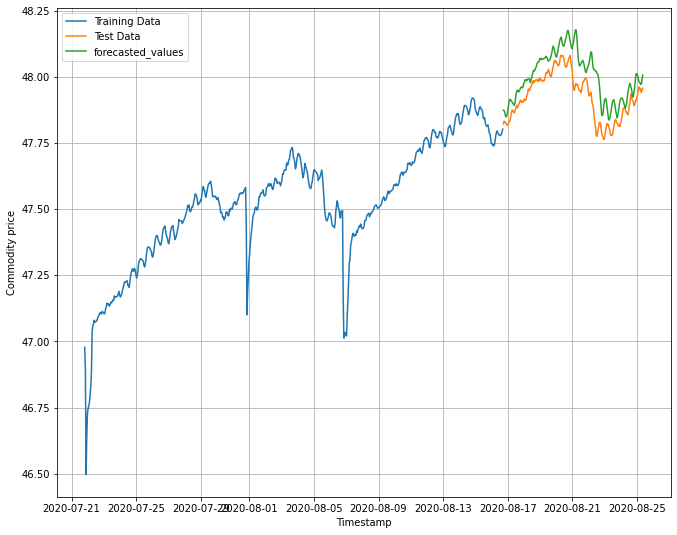

In [41]:
plt.figure(figsize=(11,9))
plot_timeseries(timestamps = train_timestamps_0, values = y_train0, label='Training Data')
plot_timeseries(timestamps= test_timestamps_0, values=y_test0, label = 'Test Data')
plot_timeseries(timestamps= test_timestamps_0, values= nbeats_forecast, label='forecasted_values')
plt.savefig('data0_.png')


In [67]:
X_train = {}
y_train = {}
x_test = {}
y_test = {}
train_timestamps = {}
test_timestamps = {}


for key in all_data:
    dataset = all_data[key]
    commodity_prices = dataset.Values.values
    timestamps_all = dataset.Timestamps.values
    windows, labels = make_windows(commodity_prices)
    timestamp_windows, timestamp_labels = make_windows(timestamps_all)
    X_train_i, x_test_i, y_train_i, y_test_i = train_test_split_values(windows, labels)
    train_timestamps_i, test_timestamps_i = train_test_split_timestamps(timestamp_labels)
    X_train[key] = X_train_i
    y_train[key] = y_train_i
    x_test[key] = x_test_i
    y_test[key] = y_test_i
    train_timestamps[key] = train_timestamps_i
    test_timestamps[key] = test_timestamps_i



In [68]:
std_dev_all = []
for key in all_data:
    std_dev = np.std(all_data[key].Values.values)
    std_dev_all.append(std_dev)

print(std_dev_all)


[0.2758782146732368, 0.10612596948989468, 0.13245836220878413, 0.10687978259869672, 9434.831398731681, 3775529.5174236074, 0.4057117450192855, 0.4949352460852432, 1.0582202765016329, 0.21761399342231139, 14443.989134960664, 0.13847079884948166, 1.0067651872854622, 21.04301002994161, 52034.34903281987, 14668.946132375098, 7524.112823092595, 1.0433991663839195, 50.55404585066113, 4212.911721131408, 1.9286532955420412, 156111.75186235394, 164987.86701521662, 100.75535052366354, 1.4298357272771007, 20187.851842320353, 7733.479576516344, 11.288920539115985, 59723.461748751346, 59.24313705567199, 0.17487391815146616, 1.2580066851408727, 2.8613352526855067, 0.5122902352487316, 0.0, 14134.32383706202, 30.887956268441084, 0.6287055349002655, 0.40020309204149906, 0.5223098732884209, 20538878936.558327, 1121.245593073723, 0.294833077968558, 3579.319111506209, 3559277.1959661143, 1.9286532955420412, 20534215473.80213, 263.8212673653229, 7733.479576516344, 13606.044184325341]


<h5>Now we have already trained our model on the first dataset. Now we will train our model on the rest of the 49 datasets and plot the results</h5>

In [69]:
def get_model():
    Input_layer = Input(shape = X_train0.shape[1])
    #initialising the revin layer
    revin_init = ReVIN_normalization(noise=0.01)
    #Revin layer which is connected to the input layer
    revin_layer, denorm_array = revin_init(Input_layer)
    stack_layer = NbeatsStack(no_of_blocks=4, input_sp  = X_train0.shape[1], block_input_size=10, block_forecast_horizon=1, no_block_layers=4, no_theta_neurons=11)
    #creating the first NBeats stack layer which takes normalised inputs from the revin layer
    residuals_stack, forecast = stack_layer(revin_layer)
    #residual connection
    residuals = tf.keras.layers.subtract([revin_layer, residuals_stack])
    #creating 10 more nbeats stacks
    for i in enumerate(range(10)):
        residuals_stack, stack_forecast = NbeatsStack(no_of_blocks=4, input_sp = X_train0.shape[1], block_input_size=10, block_forecast_horizon=1, no_block_layers=4, no_theta_neurons=11)(residuals)
        residuals = tf.keras.layers.subtract([residuals, residuals_stack])
        forecast = tf.keras.layers.add([forecast, stack_forecast])
    #The global forecast from the nbeats stack goes into the denormalisation layer    
    denorm_init = ReVinDenormalize()
    denorm_layer = denorm_init([forecast, denorm_array])
    model_nbeats_revin = Model(inputs = Input_layer, outputs = denorm_layer)

    return model_nbeats_revin


    
    

In [43]:
print(type(X_train['0']))

<class 'numpy.ndarray'>


In [48]:
all_models = {}
for key in all_data:
    temp_model = get_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
    checkpoint_filepath = "checkpoints/"+ str(key)
    callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor = 'val_root_mean_squared_error', save_best_only=True, filepath=checkpoint_filepath)
    temp_model.compile(optimizer=optimizer_nb, loss = 'mae', metrics = [tf.keras.metrics.RootMeanSquaredError()])
    temp_model.fit(X_train[key], y_train[key], validation_data = (x_test[key], y_test[key]), epochs = 50, batch_size=128,callbacks = callback_checkpoint)
    all_models[key] = temp_model
    print("*"*100)


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.4069 - root_mean_squared_error: 0.5147

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 19s 3s/step - loss: 0.4069 - root_mean_squared_error: 0.5147 - val_loss: 0.0662 - val_root_mean_squared_error: 0.0785
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.1971 - root_mean_squared_error: 0.2594

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 11s 3s/step - loss: 0.1971 - root_mean_squared_error: 0.2594 - val_loss: 0.0648 - val_root_mean_squared_error: 0.0769
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.1375 - root_mean_squared_error: 0.1873

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.1375 - root_mean_squared_error: 0.1873 - val_loss: 0.0375 - val_root_mean_squared_error: 0.0440
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0855 - root_mean_squared_error: 0.1251

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0855 - root_mean_squared_error: 0.1251 - val_loss: 0.0193 - val_root_mean_squared_error: 0.0250
Epoch 5/50
5/5 [==============================] - 1s 105ms/step - loss: 0.0428 - root_mean_squared_error: 0.0768 - val_loss: 0.0224 - val_root_mean_squared_error: 0.0282
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.0605

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0320 - root_mean_squared_error: 0.0605 - val_loss: 0.0181 - val_root_mean_squared_error: 0.0235
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.0308 - root_mean_squared_error: 0.0577

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0308 - root_mean_squared_error: 0.0577 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0215
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.0263 - root_mean_squared_error: 0.0541

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0263 - root_mean_squared_error: 0.0541 - val_loss: 0.0159 - val_root_mean_squared_error: 0.0203
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.0235 - root_mean_squared_error: 0.0510

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0235 - root_mean_squared_error: 0.0510 - val_loss: 0.0142 - val_root_mean_squared_error: 0.0182
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.0501

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0225 - root_mean_squared_error: 0.0501 - val_loss: 0.0134 - val_root_mean_squared_error: 0.0173
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0206 - root_mean_squared_error: 0.0478

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0206 - root_mean_squared_error: 0.0478 - val_loss: 0.0128 - val_root_mean_squared_error: 0.0163
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0203 - root_mean_squared_error: 0.0463

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0203 - root_mean_squared_error: 0.0463 - val_loss: 0.0116 - val_root_mean_squared_error: 0.0152
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0201 - root_mean_squared_error: 0.0467

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0201 - root_mean_squared_error: 0.0467 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0145
Epoch 14/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0185 - root_mean_squared_error: 0.0446 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0150
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.0451

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0198 - root_mean_squared_error: 0.0451 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0143
Epoch 16/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0189 - root_mean_squared_error: 0.0443 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0145
Epoch 17/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0193 - root_mean_squared_error: 0.0436 - val_loss: 0.0118 - val_root_mean_squared_error: 0.0148
Epoch 18/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0197 - root_mean_squared_error: 0.0436 - val_loss: 0.0113 - val_root_mean_squared_error: 0.0144
Epoch 19/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0184 - root_mean_squared_error: 0.0431 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0146
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0197 - root_mean_squared_error: 0.0429

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0197 - root_mean_squared_error: 0.0429 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0142
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0193 - root_mean_squared_error: 0.0413

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0193 - root_mean_squared_error: 0.0413 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0135
Epoch 22/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0176 - root_mean_squared_error: 0.0408 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0136
Epoch 23/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0172 - root_mean_squared_error: 0.0407 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0143
Epoch 24/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0182 - root_mean_squared_error: 0.0404 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0138
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.0402

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0177 - root_mean_squared_error: 0.0402 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0132
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 0.0161 - root_mean_squared_error: 0.0393

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0161 - root_mean_squared_error: 0.0393 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0130
Epoch 27/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0158 - root_mean_squared_error: 0.0390 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0130
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.0388

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0153 - root_mean_squared_error: 0.0388 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0128
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.0387

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0153 - root_mean_squared_error: 0.0387 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0128
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.0390

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0151 - root_mean_squared_error: 0.0390 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0127
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.0383

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0152 - root_mean_squared_error: 0.0383 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0126
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.0373

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0150 - root_mean_squared_error: 0.0373 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0126
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.0378

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0148 - root_mean_squared_error: 0.0378 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0125
Epoch 34/50
5/5 [==============================] - 1s 105ms/step - loss: 0.0147 - root_mean_squared_error: 0.0375 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0126
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.0374

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0148 - root_mean_squared_error: 0.0374 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0125
Epoch 36/50
5/5 [==============================] - 1s 159ms/step - loss: 0.0142 - root_mean_squared_error: 0.0373 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0125
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.0364

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0140 - root_mean_squared_error: 0.0364 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0123
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.0364

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0144 - root_mean_squared_error: 0.0364 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0123
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.0360

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0141 - root_mean_squared_error: 0.0360 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0121
Epoch 40/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0143 - root_mean_squared_error: 0.0357 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0122
Epoch 41/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0140 - root_mean_squared_error: 0.0357 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0121
Epoch 42/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0138 - root_mean_squared_error: 0.0354 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0123
Epoch 43/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0148 - root_mean_squared_error: 0.0368 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0122
Epoch 44/50
5/5 [==============================] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.0353

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0138 - root_mean_squared_error: 0.0353 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0120
Epoch 45/50
5/5 [==============================] - 1s 159ms/step - loss: 0.0137 - root_mean_squared_error: 0.0353 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0121
Epoch 46/50
5/5 [==============================] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.0356

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0138 - root_mean_squared_error: 0.0356 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0119
Epoch 47/50
5/5 [==============================] - 1s 102ms/step - loss: 0.0133 - root_mean_squared_error: 0.0345 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0120
Epoch 48/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0134 - root_mean_squared_error: 0.0349 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0119
Epoch 49/50
5/5 [==============================] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.0351

INFO:tensorflow:Assets written to: checkpoints\0\assets


INFO:tensorflow:Assets written to: checkpoints\0\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0133 - root_mean_squared_error: 0.0351 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0119
Epoch 50/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0130 - root_mean_squared_error: 0.0346 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0121
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.0232 - root_mean_squared_error: 0.0288

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 18s 3s/step - loss: 0.0232 - root_mean_squared_error: 0.0288 - val_loss: 0.0138 - val_root_mean_squared_error: 0.0175
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.0234

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0184 - root_mean_squared_error: 0.0234 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0145
Epoch 3/50
5/5 [==============================] - 1s 106ms/step - loss: 0.0159 - root_mean_squared_error: 0.0201 - val_loss: 0.0124 - val_root_mean_squared_error: 0.0157
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.0191

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0152 - root_mean_squared_error: 0.0191 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0129
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.0165

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0128 - root_mean_squared_error: 0.0165 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0126
Epoch 6/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0114 - root_mean_squared_error: 0.0150 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0134
Epoch 7/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0108 - root_mean_squared_error: 0.0146 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0132
Epoch 8/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0101 - root_mean_squared_error: 0.0137 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0127
Epoch 9/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0101 - root_mean_squared_error: 0.0136 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0129
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0134

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0099 - root_mean_squared_error: 0.0134 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0113
Epoch 11/50
5/5 [==============================] - 1s 160ms/step - loss: 0.0096 - root_mean_squared_error: 0.0133 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0117
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0131

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0096 - root_mean_squared_error: 0.0131 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0109
Epoch 13/50
5/5 [==============================] - 1s 160ms/step - loss: 0.0098 - root_mean_squared_error: 0.0133 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0117
Epoch 14/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0093 - root_mean_squared_error: 0.0127 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0122
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.0123

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0089 - root_mean_squared_error: 0.0123 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0108
Epoch 16/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0090 - root_mean_squared_error: 0.0127 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0110
Epoch 17/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0092 - root_mean_squared_error: 0.0125 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0112
Epoch 18/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0089 - root_mean_squared_error: 0.0121 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0118
Epoch 19/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0086 - root_mean_squared_error: 0.0121 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0109
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0118

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0082 - root_mean_squared_error: 0.0118 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0107
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0119

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0083 - root_mean_squared_error: 0.0119 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0106
Epoch 22/50
5/5 [==============================] - 1s 106ms/step - loss: 0.0083 - root_mean_squared_error: 0.0116 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0110
Epoch 23/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0081 - root_mean_squared_error: 0.0115 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0108
Epoch 24/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0080 - root_mean_squared_error: 0.0114 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0112
Epoch 25/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0081 - root_mean_squared_error: 0.0115 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0113
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.0117

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0085 - root_mean_squared_error: 0.0117 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0106
Epoch 27/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0084 - root_mean_squared_error: 0.0120 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0106
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.0115

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0081 - root_mean_squared_error: 0.0115 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0104
Epoch 29/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0083 - root_mean_squared_error: 0.0114 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0110
Epoch 30/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0077 - root_mean_squared_error: 0.0110 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0107
Epoch 31/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0080 - root_mean_squared_error: 0.0115 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0108
Epoch 32/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0080 - root_mean_squared_error: 0.0111 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0104
Epoch 33/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0076 - root_mean_squared_error: 0.0109 - val_loss: 0.0076 - val_root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0075 - root_mean_squared_error: 0.0107 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0104
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0110

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0076 - root_mean_squared_error: 0.0110 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0103
Epoch 40/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0077 - root_mean_squared_error: 0.0108 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0109
Epoch 41/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0077 - root_mean_squared_error: 0.0110 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0110
Epoch 42/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0076 - root_mean_squared_error: 0.0109 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0110
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0108

INFO:tensorflow:Assets written to: checkpoints\1\assets


INFO:tensorflow:Assets written to: checkpoints\1\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0076 - root_mean_squared_error: 0.0108 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0103
Epoch 44/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0074 - root_mean_squared_error: 0.0109 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0103
Epoch 45/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0079 - root_mean_squared_error: 0.0112 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0104
Epoch 46/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0077 - root_mean_squared_error: 0.0107 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0105
Epoch 47/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0074 - root_mean_squared_error: 0.0105 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0108
Epoch 48/50
5/5 [==============================] - 1s 150ms/step - loss: 0.0074 - root_mean_squared_error: 0.0106 - val_loss: 0.0081 - val_root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 18s 3s/step - loss: 0.1052 - root_mean_squared_error: 0.1491 - val_loss: 0.0968 - val_root_mean_squared_error: 0.1421
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0695 - root_mean_squared_error: 0.1121

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0695 - root_mean_squared_error: 0.1121 - val_loss: 0.0835 - val_root_mean_squared_error: 0.1220
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.0597 - root_mean_squared_error: 0.1009

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0597 - root_mean_squared_error: 0.1009 - val_loss: 0.0765 - val_root_mean_squared_error: 0.1208
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0580 - root_mean_squared_error: 0.0978

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0580 - root_mean_squared_error: 0.0978 - val_loss: 0.0737 - val_root_mean_squared_error: 0.1179
Epoch 5/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0586 - root_mean_squared_error: 0.1001 - val_loss: 0.0916 - val_root_mean_squared_error: 0.1220
Epoch 6/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0540 - root_mean_squared_error: 0.0941 - val_loss: 0.0747 - val_root_mean_squared_error: 0.1196
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.0506 - root_mean_squared_error: 0.0921

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0506 - root_mean_squared_error: 0.0921 - val_loss: 0.0798 - val_root_mean_squared_error: 0.1150
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.0493 - root_mean_squared_error: 0.0907

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0493 - root_mean_squared_error: 0.0907 - val_loss: 0.0678 - val_root_mean_squared_error: 0.1132
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.0463 - root_mean_squared_error: 0.0885

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0463 - root_mean_squared_error: 0.0885 - val_loss: 0.0756 - val_root_mean_squared_error: 0.1122
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0454 - root_mean_squared_error: 0.0864

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0454 - root_mean_squared_error: 0.0864 - val_loss: 0.0672 - val_root_mean_squared_error: 0.1110
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0438 - root_mean_squared_error: 0.0847

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0438 - root_mean_squared_error: 0.0847 - val_loss: 0.0687 - val_root_mean_squared_error: 0.1097
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0421 - root_mean_squared_error: 0.0836

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0421 - root_mean_squared_error: 0.0836 - val_loss: 0.0689 - val_root_mean_squared_error: 0.1096
Epoch 13/50
5/5 [==============================] - 1s 101ms/step - loss: 0.0409 - root_mean_squared_error: 0.0829 - val_loss: 0.0688 - val_root_mean_squared_error: 0.1098
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0405 - root_mean_squared_error: 0.0819

INFO:tensorflow:Assets written to: checkpoints\10\assets


INFO:tensorflow:Assets written to: checkpoints\10\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0405 - root_mean_squared_error: 0.0819 - val_loss: 0.0698 - val_root_mean_squared_error: 0.1095
Epoch 15/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0406 - root_mean_squared_error: 0.0813 - val_loss: 0.0685 - val_root_mean_squared_error: 0.1097
Epoch 16/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0398 - root_mean_squared_error: 0.0813 - val_loss: 0.0724 - val_root_mean_squared_error: 0.1106
Epoch 17/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0410 - root_mean_squared_error: 0.0814 - val_loss: 0.0692 - val_root_mean_squared_error: 0.1128
Epoch 18/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0425 - root_mean_squared_error: 0.0823 - val_loss: 0.0720 - val_root_mean_squared_error: 0.1102
Epoch 19/50
5/5 [==============================] - 1s 149ms/step - loss: 0.0402 - root_mean_squared_error: 0.0800 - val_loss: 0.0683 - val_root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 18s 3s/step - loss: 0.1114 - root_mean_squared_error: 0.1383 - val_loss: 0.0926 - val_root_mean_squared_error: 0.1040
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0738 - root_mean_squared_error: 0.0896

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0738 - root_mean_squared_error: 0.0896 - val_loss: 0.0519 - val_root_mean_squared_error: 0.0622
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.0457 - root_mean_squared_error: 0.0572

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0457 - root_mean_squared_error: 0.0572 - val_loss: 0.0350 - val_root_mean_squared_error: 0.0440
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0389 - root_mean_squared_error: 0.0492

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0389 - root_mean_squared_error: 0.0492 - val_loss: 0.0305 - val_root_mean_squared_error: 0.0379
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0329 - root_mean_squared_error: 0.0429

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0329 - root_mean_squared_error: 0.0429 - val_loss: 0.0280 - val_root_mean_squared_error: 0.0361
Epoch 6/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0286 - root_mean_squared_error: 0.0383 - val_loss: 0.0279 - val_root_mean_squared_error: 0.0369
Epoch 7/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0289 - root_mean_squared_error: 0.0378 - val_loss: 0.0288 - val_root_mean_squared_error: 0.0376
Epoch 8/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0266 - root_mean_squared_error: 0.0358 - val_loss: 0.0285 - val_root_mean_squared_error: 0.0373
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.0281 - root_mean_squared_error: 0.0374

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0281 - root_mean_squared_error: 0.0374 - val_loss: 0.0258 - val_root_mean_squared_error: 0.0345
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0252 - root_mean_squared_error: 0.0344

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0252 - root_mean_squared_error: 0.0344 - val_loss: 0.0256 - val_root_mean_squared_error: 0.0344
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0250 - root_mean_squared_error: 0.0340

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0250 - root_mean_squared_error: 0.0340 - val_loss: 0.0249 - val_root_mean_squared_error: 0.0340
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0238 - root_mean_squared_error: 0.0327

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0238 - root_mean_squared_error: 0.0327 - val_loss: 0.0246 - val_root_mean_squared_error: 0.0337
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.0330

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0239 - root_mean_squared_error: 0.0330 - val_loss: 0.0235 - val_root_mean_squared_error: 0.0326
Epoch 14/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0227 - root_mean_squared_error: 0.0321 - val_loss: 0.0235 - val_root_mean_squared_error: 0.0327
Epoch 15/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0224 - root_mean_squared_error: 0.0318 - val_loss: 0.0247 - val_root_mean_squared_error: 0.0337
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.0227 - root_mean_squared_error: 0.0319

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0227 - root_mean_squared_error: 0.0319 - val_loss: 0.0229 - val_root_mean_squared_error: 0.0322
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.0311

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0220 - root_mean_squared_error: 0.0311 - val_loss: 0.0226 - val_root_mean_squared_error: 0.0319
Epoch 18/50
5/5 [==============================] - 1s 114ms/step - loss: 0.0213 - root_mean_squared_error: 0.0305 - val_loss: 0.0231 - val_root_mean_squared_error: 0.0323
Epoch 19/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0209 - root_mean_squared_error: 0.0304 - val_loss: 0.0233 - val_root_mean_squared_error: 0.0324
Epoch 20/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0207 - root_mean_squared_error: 0.0301 - val_loss: 0.0230 - val_root_mean_squared_error: 0.0323
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0206 - root_mean_squared_error: 0.0300

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0206 - root_mean_squared_error: 0.0300 - val_loss: 0.0226 - val_root_mean_squared_error: 0.0318
Epoch 22/50
5/5 [==============================] - 1s 159ms/step - loss: 0.0205 - root_mean_squared_error: 0.0298 - val_loss: 0.0242 - val_root_mean_squared_error: 0.0332
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 0.0218 - root_mean_squared_error: 0.0308

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0218 - root_mean_squared_error: 0.0308 - val_loss: 0.0223 - val_root_mean_squared_error: 0.0314
Epoch 24/50
5/5 [==============================] - 1s 107ms/step - loss: 0.0210 - root_mean_squared_error: 0.0302 - val_loss: 0.0233 - val_root_mean_squared_error: 0.0323
Epoch 25/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0209 - root_mean_squared_error: 0.0302 - val_loss: 0.0228 - val_root_mean_squared_error: 0.0320
Epoch 26/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0200 - root_mean_squared_error: 0.0297 - val_loss: 0.0242 - val_root_mean_squared_error: 0.0331
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.0215 - root_mean_squared_error: 0.0303

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0215 - root_mean_squared_error: 0.0303 - val_loss: 0.0222 - val_root_mean_squared_error: 0.0314
Epoch 28/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0200 - root_mean_squared_error: 0.0293 - val_loss: 0.0229 - val_root_mean_squared_error: 0.0321
Epoch 29/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0207 - root_mean_squared_error: 0.0297 - val_loss: 0.0223 - val_root_mean_squared_error: 0.0315
Epoch 30/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0198 - root_mean_squared_error: 0.0291 - val_loss: 0.0239 - val_root_mean_squared_error: 0.0329
Epoch 31/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0206 - root_mean_squared_error: 0.0300 - val_loss: 0.0225 - val_root_mean_squared_error: 0.0317
Epoch 32/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0207 - root_mean_squared_error: 0.0296 - val_loss: 0.0243 - val_root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0195 - root_mean_squared_error: 0.0284 - val_loss: 0.0223 - val_root_mean_squared_error: 0.0313
Epoch 38/50
5/5 [==============================] - 1s 160ms/step - loss: 0.0190 - root_mean_squared_error: 0.0283 - val_loss: 0.0228 - val_root_mean_squared_error: 0.0319
Epoch 39/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0189 - root_mean_squared_error: 0.0280 - val_loss: 0.0228 - val_root_mean_squared_error: 0.0320
Epoch 40/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0188 - root_mean_squared_error: 0.0283 - val_loss: 0.0224 - val_root_mean_squared_error: 0.0316
Epoch 41/50
5/5 [==============================] - 1s 149ms/step - loss: 0.0184 - root_mean_squared_error: 0.0278 - val_loss: 0.0223 - val_root_mean_squared_error: 0.0314
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.0277

INFO:tensorflow:Assets written to: checkpoints\11\assets


INFO:tensorflow:Assets written to: checkpoints\11\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0186 - root_mean_squared_error: 0.0277 - val_loss: 0.0220 - val_root_mean_squared_error: 0.0311
Epoch 43/50
5/5 [==============================] - 1s 107ms/step - loss: 0.0189 - root_mean_squared_error: 0.0280 - val_loss: 0.0234 - val_root_mean_squared_error: 0.0323
Epoch 44/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0195 - root_mean_squared_error: 0.0288 - val_loss: 0.0226 - val_root_mean_squared_error: 0.0318
Epoch 45/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0187 - root_mean_squared_error: 0.0277 - val_loss: 0.0224 - val_root_mean_squared_error: 0.0316
Epoch 46/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0183 - root_mean_squared_error: 0.0277 - val_loss: 0.0224 - val_root_mean_squared_error: 0.0315
Epoch 47/50
5/5 [==============================] - 0s 104ms/step - loss: 0.0181 - root_mean_squared_error: 0.0274 - val_loss: 0.0224 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 18s 3s/step - loss: 18152.6680 - root_mean_squared_error: 22555.5078 - val_loss: 9274.0576 - val_root_mean_squared_error: 10502.1748
Epoch 2/50
5/5 [==============================] - 1s 167ms/step - loss: 9890.6963 - root_mean_squared_error: 11477.8379 - val_loss: 9480.6631 - val_root_mean_squared_error: 10851.5205
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 6784.5249 - root_mean_squared_error: 8115.4043

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 11s 3s/step - loss: 6784.5249 - root_mean_squared_error: 8115.4043 - val_loss: 5267.7002 - val_root_mean_squared_error: 6909.8984
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 4992.0581 - root_mean_squared_error: 6231.0039

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 4992.0581 - root_mean_squared_error: 6231.0039 - val_loss: 3649.3486 - val_root_mean_squared_error: 4546.4346
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 3654.8306 - root_mean_squared_error: 4735.2461

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 3654.8306 - root_mean_squared_error: 4735.2461 - val_loss: 3111.2129 - val_root_mean_squared_error: 3918.9121
Epoch 6/50
5/5 [==============================] - 1s 161ms/step - loss: 3553.7302 - root_mean_squared_error: 4621.4263 - val_loss: 3092.5039 - val_root_mean_squared_error: 4120.5103
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 3296.2981 - root_mean_squared_error: 4526.7642

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 3296.2981 - root_mean_squared_error: 4526.7642 - val_loss: 2838.2478 - val_root_mean_squared_error: 3626.1262
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 2863.9172 - root_mean_squared_error: 3886.8425

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 3s/step - loss: 2863.9172 - root_mean_squared_error: 3886.8425 - val_loss: 2539.6382 - val_root_mean_squared_error: 3287.3103
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 2754.8184 - root_mean_squared_error: 3832.6790

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 2754.8184 - root_mean_squared_error: 3832.6790 - val_loss: 2333.7952 - val_root_mean_squared_error: 3118.3579
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 2599.6709 - root_mean_squared_error: 3592.2478

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 2599.6709 - root_mean_squared_error: 3592.2478 - val_loss: 2297.8064 - val_root_mean_squared_error: 3079.9458
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 2468.8821 - root_mean_squared_error: 3528.3625

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 2468.8821 - root_mean_squared_error: 3528.3625 - val_loss: 2253.0410 - val_root_mean_squared_error: 3049.7573
Epoch 12/50
5/5 [==============================] - 1s 113ms/step - loss: 2423.2659 - root_mean_squared_error: 3414.7197 - val_loss: 2406.0229 - val_root_mean_squared_error: 3082.9973
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 2340.9956 - root_mean_squared_error: 3349.2551

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 2340.9956 - root_mean_squared_error: 3349.2551 - val_loss: 2178.2322 - val_root_mean_squared_error: 2941.9580
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 2246.7463 - root_mean_squared_error: 3309.3257

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 2246.7463 - root_mean_squared_error: 3309.3257 - val_loss: 2183.7622 - val_root_mean_squared_error: 2851.8855
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 2250.8777 - root_mean_squared_error: 3242.7444

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 2250.8777 - root_mean_squared_error: 3242.7444 - val_loss: 2029.6165 - val_root_mean_squared_error: 2743.1248
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 2132.3447 - root_mean_squared_error: 3124.6838

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 2132.3447 - root_mean_squared_error: 3124.6838 - val_loss: 2042.0817 - val_root_mean_squared_error: 2692.3735
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 2112.1233 - root_mean_squared_error: 3126.5034

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 2112.1233 - root_mean_squared_error: 3126.5034 - val_loss: 1933.2782 - val_root_mean_squared_error: 2618.0090
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 2039.3628 - root_mean_squared_error: 3067.9011

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 2039.3628 - root_mean_squared_error: 3067.9011 - val_loss: 1918.7788 - val_root_mean_squared_error: 2570.0576
Epoch 19/50
5/5 [==============================] - 1s 113ms/step - loss: 1989.1552 - root_mean_squared_error: 3000.0742 - val_loss: 1910.0062 - val_root_mean_squared_error: 2614.5366
Epoch 20/50
5/5 [==============================] - 0s 92ms/step - loss: 2089.4971 - root_mean_squared_error: 3089.3513 - val_loss: 1980.1038 - val_root_mean_squared_error: 2584.4736
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 2014.0807 - root_mean_squared_error: 3026.4373

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 2014.0807 - root_mean_squared_error: 3026.4373 - val_loss: 1757.7375 - val_root_mean_squared_error: 2413.7932
Epoch 22/50
5/5 [==============================] - 1s 155ms/step - loss: 1973.0068 - root_mean_squared_error: 2964.8735 - val_loss: 1796.8380 - val_root_mean_squared_error: 2439.6001
Epoch 23/50
5/5 [==============================] - 1s 152ms/step - loss: 2026.4128 - root_mean_squared_error: 3039.1340 - val_loss: 1960.5623 - val_root_mean_squared_error: 2539.1582
Epoch 24/50
5/5 [==============================] - 1s 151ms/step - loss: 1967.5879 - root_mean_squared_error: 2949.5803 - val_loss: 1768.4950 - val_root_mean_squared_error: 2459.2874
Epoch 25/50
5/5 [==============================] - 1s 151ms/step - loss: 1934.9198 - root_mean_squared_error: 2911.5420 - val_loss: 1897.1232 - val_root_mean_squared_error: 2483.2107
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 1857.4236 - root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 1857.4236 - root_mean_squared_error: 2922.1572 - val_loss: 1694.7473 - val_root_mean_squared_error: 2366.1667
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 1823.1794 - root_mean_squared_error: 2810.4934

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 1823.1794 - root_mean_squared_error: 2810.4934 - val_loss: 1653.1638 - val_root_mean_squared_error: 2323.6521
Epoch 28/50
5/5 [==============================] - 1s 109ms/step - loss: 1791.6053 - root_mean_squared_error: 2856.9070 - val_loss: 1840.6262 - val_root_mean_squared_error: 2415.1973
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 1818.0721 - root_mean_squared_error: 2811.8179

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 1818.0721 - root_mean_squared_error: 2811.8179 - val_loss: 1649.6117 - val_root_mean_squared_error: 2316.5688
Epoch 30/50
5/5 [==============================] - 1s 106ms/step - loss: 1705.2343 - root_mean_squared_error: 2759.3716 - val_loss: 1801.3762 - val_root_mean_squared_error: 2370.1304
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 1737.1646 - root_mean_squared_error: 2785.7192

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 1737.1646 - root_mean_squared_error: 2785.7192 - val_loss: 1590.8611 - val_root_mean_squared_error: 2256.1724
Epoch 32/50
5/5 [==============================] - 1s 107ms/step - loss: 1704.9858 - root_mean_squared_error: 2733.3459 - val_loss: 1600.6993 - val_root_mean_squared_error: 2265.7476
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 1741.5531 - root_mean_squared_error: 2790.2156

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 1741.5531 - root_mean_squared_error: 2790.2156 - val_loss: 1630.4701 - val_root_mean_squared_error: 2211.2029
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 1644.2810 - root_mean_squared_error: 2691.8481

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 1644.2810 - root_mean_squared_error: 2691.8481 - val_loss: 1532.1487 - val_root_mean_squared_error: 2202.3594
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 1596.0592 - root_mean_squared_error: 2628.9302

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 3s/step - loss: 1596.0592 - root_mean_squared_error: 2628.9302 - val_loss: 1581.9894 - val_root_mean_squared_error: 2175.4702
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 1633.7579 - root_mean_squared_error: 2681.0640

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 1633.7579 - root_mean_squared_error: 2681.0640 - val_loss: 1563.7333 - val_root_mean_squared_error: 2156.3657
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 1593.5610 - root_mean_squared_error: 2621.3167

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 1593.5610 - root_mean_squared_error: 2621.3167 - val_loss: 1524.5698 - val_root_mean_squared_error: 2139.2839
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 1582.1470 - root_mean_squared_error: 2620.1599

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 1582.1470 - root_mean_squared_error: 2620.1599 - val_loss: 1525.3114 - val_root_mean_squared_error: 2129.0962
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 1561.0297 - root_mean_squared_error: 2601.6626

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 3s/step - loss: 1561.0297 - root_mean_squared_error: 2601.6626 - val_loss: 1488.0562 - val_root_mean_squared_error: 2110.6318
Epoch 40/50
5/5 [==============================] - 1s 154ms/step - loss: 1554.8143 - root_mean_squared_error: 2585.1980 - val_loss: 1664.7888 - val_root_mean_squared_error: 2199.5801
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 1525.4954 - root_mean_squared_error: 2547.6011

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 1525.4954 - root_mean_squared_error: 2547.6011 - val_loss: 1466.6981 - val_root_mean_squared_error: 2099.3621
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 1518.0413 - root_mean_squared_error: 2579.8965

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 1518.0413 - root_mean_squared_error: 2579.8965 - val_loss: 1473.2930 - val_root_mean_squared_error: 2042.7183
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 1459.3937 - root_mean_squared_error: 2499.7048

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 1459.3937 - root_mean_squared_error: 2499.7048 - val_loss: 1435.1244 - val_root_mean_squared_error: 2030.0410
Epoch 44/50
5/5 [==============================] - 1s 111ms/step - loss: 1528.6846 - root_mean_squared_error: 2552.0854 - val_loss: 1434.3595 - val_root_mean_squared_error: 2059.7053
Epoch 45/50
5/5 [==============================] - ETA: 0s - loss: 1448.4453 - root_mean_squared_error: 2504.4417

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 9s 2s/step - loss: 1448.4453 - root_mean_squared_error: 2504.4417 - val_loss: 1437.9055 - val_root_mean_squared_error: 1997.3085
Epoch 46/50
5/5 [==============================] - 1s 110ms/step - loss: 1500.3529 - root_mean_squared_error: 2509.2761 - val_loss: 1415.3101 - val_root_mean_squared_error: 2046.0424
Epoch 47/50
5/5 [==============================] - 0s 91ms/step - loss: 1452.2068 - root_mean_squared_error: 2484.9497 - val_loss: 1461.2233 - val_root_mean_squared_error: 2006.8811
Epoch 48/50
5/5 [==============================] - 0s 91ms/step - loss: 1503.7424 - root_mean_squared_error: 2515.1990 - val_loss: 1588.2518 - val_root_mean_squared_error: 2071.5139
Epoch 49/50
5/5 [==============================] - 0s 92ms/step - loss: 1689.8113 - root_mean_squared_error: 2627.1895 - val_loss: 1458.3525 - val_root_mean_squared_error: 2068.7534
Epoch 50/50
5/5 [==============================] - ETA: 0s - loss: 1520.8104 - root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\12\assets


INFO:tensorflow:Assets written to: checkpoints\12\assets


5/5 [==============================] - 10s 2s/step - loss: 1520.8104 - root_mean_squared_error: 2491.7954 - val_loss: 1444.5710 - val_root_mean_squared_error: 1986.4392
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 5652876.0000 - root_mean_squared_error: 7227301.5000

INFO:tensorflow:Assets written to: checkpoints\13\assets


INFO:tensorflow:Assets written to: checkpoints\13\assets


5/5 [==============================] - 18s 3s/step - loss: 5652876.0000 - root_mean_squared_error: 7227301.5000 - val_loss: 4828563.0000 - val_root_mean_squared_error: 5265840.5000
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 4000924.2500 - root_mean_squared_error: 4718605.0000

INFO:tensorflow:Assets written to: checkpoints\13\assets


INFO:tensorflow:Assets written to: checkpoints\13\assets


5/5 [==============================] - 10s 2s/step - loss: 4000924.2500 - root_mean_squared_error: 4718605.0000 - val_loss: 2895182.0000 - val_root_mean_squared_error: 4831939.5000
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 2814310.0000 - root_mean_squared_error: 4709098.5000

INFO:tensorflow:Assets written to: checkpoints\13\assets


INFO:tensorflow:Assets written to: checkpoints\13\assets


5/5 [==============================] - 11s 3s/step - loss: 2814310.0000 - root_mean_squared_error: 4709098.5000 - val_loss: 2586767.5000 - val_root_mean_squared_error: 3889136.0000
Epoch 4/50
5/5 [==============================] - 1s 154ms/step - loss: 2418443.2500 - root_mean_squared_error: 4168184.7500 - val_loss: 2235609.7500 - val_root_mean_squared_error: 4177861.0000
Epoch 5/50
5/5 [==============================] - 1s 152ms/step - loss: 2144708.5000 - root_mean_squared_error: 4084527.2500 - val_loss: 2131291.2500 - val_root_mean_squared_error: 4050353.7500
Epoch 6/50
5/5 [==============================] - 1s 151ms/step - loss: 2049615.0000 - root_mean_squared_error: 4116134.0000 - val_loss: 2117722.5000 - val_root_mean_squared_error: 3952812.0000
Epoch 7/50
5/5 [==============================] - 1s 150ms/step - loss: 1947571.3750 - root_mean_squared_error: 4096998.7500 - val_loss: 2079002.0000 - val_root_mean_squared_error: 4103904.2500
Epoch 8/50
5/5 [===========================

INFO:tensorflow:Assets written to: checkpoints\13\assets


INFO:tensorflow:Assets written to: checkpoints\13\assets


5/5 [==============================] - 9s 2s/step - loss: 1997485.7500 - root_mean_squared_error: 4146777.2500 - val_loss: 2144106.7500 - val_root_mean_squared_error: 3822096.7500
Epoch 11/50
5/5 [==============================] - 1s 104ms/step - loss: 1955741.5000 - root_mean_squared_error: 3995320.2500 - val_loss: 2073774.1250 - val_root_mean_squared_error: 4090456.2500
Epoch 12/50
5/5 [==============================] - 0s 92ms/step - loss: 1911555.7500 - root_mean_squared_error: 3995593.2500 - val_loss: 2062935.3750 - val_root_mean_squared_error: 4034807.5000
Epoch 13/50
5/5 [==============================] - 0s 92ms/step - loss: 1804509.0000 - root_mean_squared_error: 4057140.0000 - val_loss: 2045260.6250 - val_root_mean_squared_error: 3919049.5000
Epoch 14/50
5/5 [==============================] - 0s 92ms/step - loss: 1825023.7500 - root_mean_squared_error: 4027863.2500 - val_loss: 2019383.2500 - val_root_mean_squared_error: 3957607.5000
Epoch 15/50
5/5 [==========================

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 18s 3s/step - loss: 0.3456 - root_mean_squared_error: 0.6032 - val_loss: 0.1435 - val_root_mean_squared_error: 0.2499
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.2698 - root_mean_squared_error: 0.5478

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 2s/step - loss: 0.2698 - root_mean_squared_error: 0.5478 - val_loss: 0.1122 - val_root_mean_squared_error: 0.2283
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.1694 - root_mean_squared_error: 0.4822

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1694 - root_mean_squared_error: 0.4822 - val_loss: 0.1021 - val_root_mean_squared_error: 0.2200
Epoch 4/50
5/5 [==============================] - 1s 155ms/step - loss: 0.1497 - root_mean_squared_error: 0.4729 - val_loss: 0.1037 - val_root_mean_squared_error: 0.2229
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.1323 - root_mean_squared_error: 0.4668

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 3s/step - loss: 0.1323 - root_mean_squared_error: 0.4668 - val_loss: 0.0989 - val_root_mean_squared_error: 0.2191
Epoch 6/50
5/5 [==============================] - 1s 154ms/step - loss: 0.1327 - root_mean_squared_error: 0.4624 - val_loss: 0.0997 - val_root_mean_squared_error: 0.2215
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.1274 - root_mean_squared_error: 0.4615

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1274 - root_mean_squared_error: 0.4615 - val_loss: 0.0968 - val_root_mean_squared_error: 0.2185
Epoch 8/50
5/5 [==============================] - 1s 115ms/step - loss: 0.1232 - root_mean_squared_error: 0.4580 - val_loss: 0.0955 - val_root_mean_squared_error: 0.2193
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.1220 - root_mean_squared_error: 0.4582

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1220 - root_mean_squared_error: 0.4582 - val_loss: 0.0936 - val_root_mean_squared_error: 0.2176
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.1119 - root_mean_squared_error: 0.4541

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 11s 3s/step - loss: 0.1119 - root_mean_squared_error: 0.4541 - val_loss: 0.0925 - val_root_mean_squared_error: 0.2173
Epoch 11/50
5/5 [==============================] - 1s 110ms/step - loss: 0.1087 - root_mean_squared_error: 0.4546 - val_loss: 0.0920 - val_root_mean_squared_error: 0.2174
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.1072 - root_mean_squared_error: 0.4544

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 2s/step - loss: 0.1072 - root_mean_squared_error: 0.4544 - val_loss: 0.0919 - val_root_mean_squared_error: 0.2169
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.1050 - root_mean_squared_error: 0.4535

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1050 - root_mean_squared_error: 0.4535 - val_loss: 0.0907 - val_root_mean_squared_error: 0.2168
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.1035 - root_mean_squared_error: 0.4530

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1035 - root_mean_squared_error: 0.4530 - val_loss: 0.0901 - val_root_mean_squared_error: 0.2164
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.1013 - root_mean_squared_error: 0.4529

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 3s/step - loss: 0.1013 - root_mean_squared_error: 0.4529 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2161
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.1007 - root_mean_squared_error: 0.4526

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 2s/step - loss: 0.1007 - root_mean_squared_error: 0.4526 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2158
Epoch 17/50
5/5 [==============================] - 1s 161ms/step - loss: 0.1001 - root_mean_squared_error: 0.4519 - val_loss: 0.0888 - val_root_mean_squared_error: 0.2160
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.0976 - root_mean_squared_error: 0.4509

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0976 - root_mean_squared_error: 0.4509 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2153
Epoch 19/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0997 - root_mean_squared_error: 0.4517 - val_loss: 0.0888 - val_root_mean_squared_error: 0.2159
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.1002 - root_mean_squared_error: 0.4508

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1002 - root_mean_squared_error: 0.4508 - val_loss: 0.0875 - val_root_mean_squared_error: 0.2152
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.1008 - root_mean_squared_error: 0.4499

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 3s/step - loss: 0.1008 - root_mean_squared_error: 0.4499 - val_loss: 0.0873 - val_root_mean_squared_error: 0.2151
Epoch 22/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0968 - root_mean_squared_error: 0.4491 - val_loss: 0.0874 - val_root_mean_squared_error: 0.2154
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 0.0985 - root_mean_squared_error: 0.4510

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0985 - root_mean_squared_error: 0.4510 - val_loss: 0.0883 - val_root_mean_squared_error: 0.2148
Epoch 24/50
5/5 [==============================] - 1s 100ms/step - loss: 0.1002 - root_mean_squared_error: 0.4499 - val_loss: 0.0876 - val_root_mean_squared_error: 0.2156
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 0.0942 - root_mean_squared_error: 0.4489

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0942 - root_mean_squared_error: 0.4489 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2148
Epoch 26/50
5/5 [==============================] - 1s 110ms/step - loss: 0.0934 - root_mean_squared_error: 0.4479 - val_loss: 0.0863 - val_root_mean_squared_error: 0.2149
Epoch 27/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0938 - root_mean_squared_error: 0.4494 - val_loss: 0.0867 - val_root_mean_squared_error: 0.2153
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 0.0946 - root_mean_squared_error: 0.4492

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0946 - root_mean_squared_error: 0.4492 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2147
Epoch 29/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0905 - root_mean_squared_error: 0.4482 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2148
Epoch 30/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0897 - root_mean_squared_error: 0.4469 - val_loss: 0.0860 - val_root_mean_squared_error: 0.2151
Epoch 31/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0897 - root_mean_squared_error: 0.4472 - val_loss: 0.0858 - val_root_mean_squared_error: 0.2149
Epoch 32/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0894 - root_mean_squared_error: 0.4476 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2147
Epoch 33/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0893 - root_mean_squared_error: 0.4472 - val_loss: 0.0853 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\14\assets


INFO:tensorflow:Assets written to: checkpoints\14\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0915 - root_mean_squared_error: 0.4484 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2143
Epoch 36/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0910 - root_mean_squared_error: 0.4482 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2146
Epoch 37/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0893 - root_mean_squared_error: 0.4472 - val_loss: 0.0864 - val_root_mean_squared_error: 0.2155
Epoch 38/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0909 - root_mean_squared_error: 0.4489 - val_loss: 0.0851 - val_root_mean_squared_error: 0.2145
Epoch 39/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0880 - root_mean_squared_error: 0.4467 - val_loss: 0.0851 - val_root_mean_squared_error: 0.2145
Epoch 40/50
5/5 [==============================] - 0s 106ms/step - loss: 0.0897 - root_mean_squared_error: 0.4466 - val_loss: 0.0857 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: checkpoints\15\assets


INFO:tensorflow:Assets written to: checkpoints\15\assets


5/5 [==============================] - 18s 3s/step - loss: 0.5295 - root_mean_squared_error: 0.6347 - val_loss: 0.5754 - val_root_mean_squared_error: 0.7757
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.4157 - root_mean_squared_error: 0.5605

INFO:tensorflow:Assets written to: checkpoints\15\assets


INFO:tensorflow:Assets written to: checkpoints\15\assets


5/5 [==============================] - 10s 2s/step - loss: 0.4157 - root_mean_squared_error: 0.5605 - val_loss: 0.4764 - val_root_mean_squared_error: 0.5845
Epoch 3/50
5/5 [==============================] - 1s 152ms/step - loss: 0.3683 - root_mean_squared_error: 0.4696 - val_loss: 0.4725 - val_root_mean_squared_error: 0.6101
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.3593 - root_mean_squared_error: 0.4865

INFO:tensorflow:Assets written to: checkpoints\15\assets


INFO:tensorflow:Assets written to: checkpoints\15\assets


5/5 [==============================] - 10s 3s/step - loss: 0.3593 - root_mean_squared_error: 0.4865 - val_loss: 0.4652 - val_root_mean_squared_error: 0.5826
Epoch 5/50
5/5 [==============================] - 1s 161ms/step - loss: 0.3518 - root_mean_squared_error: 0.4578 - val_loss: 0.4683 - val_root_mean_squared_error: 0.5878
Epoch 6/50
5/5 [==============================] - 1s 151ms/step - loss: 0.3449 - root_mean_squared_error: 0.4595 - val_loss: 0.4733 - val_root_mean_squared_error: 0.6011
Epoch 7/50
5/5 [==============================] - 1s 151ms/step - loss: 0.3407 - root_mean_squared_error: 0.4564 - val_loss: 0.4744 - val_root_mean_squared_error: 0.5914
Epoch 8/50
5/5 [==============================] - 1s 151ms/step - loss: 0.3381 - root_mean_squared_error: 0.4464 - val_loss: 0.4770 - val_root_mean_squared_error: 0.6009
Epoch 9/50
5/5 [==============================] - 1s 151ms/step - loss: 0.3335 - root_mean_squared_error: 0.4522 - val_loss: 0.4778 - val_root_mean_squared_error: 

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 18s 3s/step - loss: 1.0903 - root_mean_squared_error: 1.4031 - val_loss: 0.9284 - val_root_mean_squared_error: 1.0717
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.7489 - root_mean_squared_error: 0.9687

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 11s 3s/step - loss: 0.7489 - root_mean_squared_error: 0.9687 - val_loss: 0.6794 - val_root_mean_squared_error: 0.9410
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.6424 - root_mean_squared_error: 0.8898

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.6424 - root_mean_squared_error: 0.8898 - val_loss: 0.5789 - val_root_mean_squared_error: 0.7741
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.5527 - root_mean_squared_error: 0.7859

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.5527 - root_mean_squared_error: 0.7859 - val_loss: 0.5228 - val_root_mean_squared_error: 0.7242
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.5085 - root_mean_squared_error: 0.7322

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.5085 - root_mean_squared_error: 0.7322 - val_loss: 0.4963 - val_root_mean_squared_error: 0.6839
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.4890 - root_mean_squared_error: 0.7036

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.4890 - root_mean_squared_error: 0.7036 - val_loss: 0.4684 - val_root_mean_squared_error: 0.6525
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.4503 - root_mean_squared_error: 0.6717

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4503 - root_mean_squared_error: 0.6717 - val_loss: 0.4392 - val_root_mean_squared_error: 0.6325
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.4250 - root_mean_squared_error: 0.6466

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.4250 - root_mean_squared_error: 0.6466 - val_loss: 0.4203 - val_root_mean_squared_error: 0.6118
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.4086 - root_mean_squared_error: 0.6320

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4086 - root_mean_squared_error: 0.6320 - val_loss: 0.4134 - val_root_mean_squared_error: 0.6019
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.3960 - root_mean_squared_error: 0.6102

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.3960 - root_mean_squared_error: 0.6102 - val_loss: 0.4022 - val_root_mean_squared_error: 0.5946
Epoch 11/50
5/5 [==============================] - 1s 108ms/step - loss: 0.3857 - root_mean_squared_error: 0.6075 - val_loss: 0.4184 - val_root_mean_squared_error: 0.5980
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.3737 - root_mean_squared_error: 0.5911

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3737 - root_mean_squared_error: 0.5911 - val_loss: 0.4026 - val_root_mean_squared_error: 0.5912
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.3599 - root_mean_squared_error: 0.5877

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3599 - root_mean_squared_error: 0.5877 - val_loss: 0.3899 - val_root_mean_squared_error: 0.5780
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.3509 - root_mean_squared_error: 0.5725

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.3509 - root_mean_squared_error: 0.5725 - val_loss: 0.3687 - val_root_mean_squared_error: 0.5640
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.3389 - root_mean_squared_error: 0.5614

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3389 - root_mean_squared_error: 0.5614 - val_loss: 0.3664 - val_root_mean_squared_error: 0.5533
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.3304 - root_mean_squared_error: 0.5522

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.3304 - root_mean_squared_error: 0.5522 - val_loss: 0.3515 - val_root_mean_squared_error: 0.5448
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.3190 - root_mean_squared_error: 0.5425

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3190 - root_mean_squared_error: 0.5425 - val_loss: 0.3459 - val_root_mean_squared_error: 0.5383
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.3081 - root_mean_squared_error: 0.5341

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.3081 - root_mean_squared_error: 0.5341 - val_loss: 0.3458 - val_root_mean_squared_error: 0.5335
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.3116 - root_mean_squared_error: 0.5278

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3116 - root_mean_squared_error: 0.5278 - val_loss: 0.3394 - val_root_mean_squared_error: 0.5262
Epoch 20/50
5/5 [==============================] - 1s 154ms/step - loss: 0.3067 - root_mean_squared_error: 0.5217 - val_loss: 0.3365 - val_root_mean_squared_error: 0.5263
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.2944 - root_mean_squared_error: 0.5127

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.2944 - root_mean_squared_error: 0.5127 - val_loss: 0.3297 - val_root_mean_squared_error: 0.5169
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 0.2890 - root_mean_squared_error: 0.5094

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2890 - root_mean_squared_error: 0.5094 - val_loss: 0.3276 - val_root_mean_squared_error: 0.5124
Epoch 23/50
5/5 [==============================] - 1s 114ms/step - loss: 0.2902 - root_mean_squared_error: 0.5063 - val_loss: 0.3375 - val_root_mean_squared_error: 0.5215
Epoch 24/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2964 - root_mean_squared_error: 0.5067 - val_loss: 0.3320 - val_root_mean_squared_error: 0.5203
Epoch 25/50
5/5 [==============================] - 0s 92ms/step - loss: 0.3003 - root_mean_squared_error: 0.5125 - val_loss: 0.3516 - val_root_mean_squared_error: 0.5224
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 0.2979 - root_mean_squared_error: 0.5060

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2979 - root_mean_squared_error: 0.5060 - val_loss: 0.3301 - val_root_mean_squared_error: 0.5121
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.2950 - root_mean_squared_error: 0.4957

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 11s 3s/step - loss: 0.2950 - root_mean_squared_error: 0.4957 - val_loss: 0.3290 - val_root_mean_squared_error: 0.5080
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 0.2776 - root_mean_squared_error: 0.4882

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2776 - root_mean_squared_error: 0.4882 - val_loss: 0.3251 - val_root_mean_squared_error: 0.5067
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 0.2737 - root_mean_squared_error: 0.4795

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 11s 3s/step - loss: 0.2737 - root_mean_squared_error: 0.4795 - val_loss: 0.3220 - val_root_mean_squared_error: 0.5030
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 0.2872 - root_mean_squared_error: 0.4894

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2872 - root_mean_squared_error: 0.4894 - val_loss: 0.3169 - val_root_mean_squared_error: 0.4927
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 0.2737 - root_mean_squared_error: 0.4826

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 3s/step - loss: 0.2737 - root_mean_squared_error: 0.4826 - val_loss: 0.3196 - val_root_mean_squared_error: 0.4926
Epoch 32/50
5/5 [==============================] - 1s 111ms/step - loss: 0.2713 - root_mean_squared_error: 0.4786 - val_loss: 0.3158 - val_root_mean_squared_error: 0.4940
Epoch 33/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2608 - root_mean_squared_error: 0.4636 - val_loss: 0.3177 - val_root_mean_squared_error: 0.4946
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 0.2664 - root_mean_squared_error: 0.4710

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2664 - root_mean_squared_error: 0.4710 - val_loss: 0.3096 - val_root_mean_squared_error: 0.4831
Epoch 35/50
5/5 [==============================] - 1s 105ms/step - loss: 0.2614 - root_mean_squared_error: 0.4658 - val_loss: 0.3190 - val_root_mean_squared_error: 0.4939
Epoch 36/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2611 - root_mean_squared_error: 0.4631 - val_loss: 0.3142 - val_root_mean_squared_error: 0.4904
Epoch 37/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2610 - root_mean_squared_error: 0.4660 - val_loss: 0.3095 - val_root_mean_squared_error: 0.4841
Epoch 38/50
5/5 [==============================] - 0s 91ms/step - loss: 0.2618 - root_mean_squared_error: 0.4596 - val_loss: 0.3104 - val_root_mean_squared_error: 0.4862
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 0.2487 - root_mean_squared_error: 0.4497

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 2s/step - loss: 0.2487 - root_mean_squared_error: 0.4497 - val_loss: 0.3071 - val_root_mean_squared_error: 0.4796
Epoch 40/50
5/5 [==============================] - 1s 160ms/step - loss: 0.2371 - root_mean_squared_error: 0.4414 - val_loss: 0.3079 - val_root_mean_squared_error: 0.4805
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 0.2415 - root_mean_squared_error: 0.4445

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2415 - root_mean_squared_error: 0.4445 - val_loss: 0.3064 - val_root_mean_squared_error: 0.4750
Epoch 42/50
5/5 [==============================] - 1s 102ms/step - loss: 0.2447 - root_mean_squared_error: 0.4384 - val_loss: 0.3105 - val_root_mean_squared_error: 0.4861
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 0.2414 - root_mean_squared_error: 0.4460

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 10s 2s/step - loss: 0.2414 - root_mean_squared_error: 0.4460 - val_loss: 0.3060 - val_root_mean_squared_error: 0.4729
Epoch 44/50
5/5 [==============================] - ETA: 0s - loss: 0.2416 - root_mean_squared_error: 0.4414

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2416 - root_mean_squared_error: 0.4414 - val_loss: 0.3013 - val_root_mean_squared_error: 0.4724
Epoch 45/50
5/5 [==============================] - 1s 106ms/step - loss: 0.2421 - root_mean_squared_error: 0.4347 - val_loss: 0.3049 - val_root_mean_squared_error: 0.4782
Epoch 46/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2391 - root_mean_squared_error: 0.4467 - val_loss: 0.3116 - val_root_mean_squared_error: 0.4748
Epoch 47/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2434 - root_mean_squared_error: 0.4389 - val_loss: 0.3063 - val_root_mean_squared_error: 0.4833
Epoch 48/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2694 - root_mean_squared_error: 0.4620 - val_loss: 0.3112 - val_root_mean_squared_error: 0.4757
Epoch 49/50
5/5 [==============================] - 0s 106ms/step - loss: 0.2328 - root_mean_squared_error: 0.4300 - val_loss: 0.3020 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\16\assets


INFO:tensorflow:Assets written to: checkpoints\16\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2303 - root_mean_squared_error: 0.4305 - val_loss: 0.2992 - val_root_mean_squared_error: 0.4703
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.1867 - root_mean_squared_error: 0.2754

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 19s 3s/step - loss: 0.1867 - root_mean_squared_error: 0.2754 - val_loss: 0.1404 - val_root_mean_squared_error: 0.2178
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.1399 - root_mean_squared_error: 0.2311

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 11s 3s/step - loss: 0.1399 - root_mean_squared_error: 0.2311 - val_loss: 0.1274 - val_root_mean_squared_error: 0.2009
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.1269 - root_mean_squared_error: 0.2158

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 10s 2s/step - loss: 0.1269 - root_mean_squared_error: 0.2158 - val_loss: 0.1209 - val_root_mean_squared_error: 0.2008
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.1141 - root_mean_squared_error: 0.2078

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 10s 2s/step - loss: 0.1141 - root_mean_squared_error: 0.2078 - val_loss: 0.1062 - val_root_mean_squared_error: 0.1887
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.1066 - root_mean_squared_error: 0.2017

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 10s 3s/step - loss: 0.1066 - root_mean_squared_error: 0.2017 - val_loss: 0.1002 - val_root_mean_squared_error: 0.1832
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.1019 - root_mean_squared_error: 0.1962

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1019 - root_mean_squared_error: 0.1962 - val_loss: 0.0935 - val_root_mean_squared_error: 0.1759
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.0994 - root_mean_squared_error: 0.1923

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0994 - root_mean_squared_error: 0.1923 - val_loss: 0.0968 - val_root_mean_squared_error: 0.1736
Epoch 8/50
5/5 [==============================] - 1s 113ms/step - loss: 0.0963 - root_mean_squared_error: 0.1925 - val_loss: 0.0898 - val_root_mean_squared_error: 0.1748
Epoch 9/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0915 - root_mean_squared_error: 0.1863 - val_loss: 0.0920 - val_root_mean_squared_error: 0.1796
Epoch 10/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0908 - root_mean_squared_error: 0.1871 - val_loss: 0.0864 - val_root_mean_squared_error: 0.1748
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0872 - root_mean_squared_error: 0.1866

INFO:tensorflow:Assets written to: checkpoints\17\assets


INFO:tensorflow:Assets written to: checkpoints\17\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0872 - root_mean_squared_error: 0.1866 - val_loss: 0.0869 - val_root_mean_squared_error: 0.1719
Epoch 12/50
5/5 [==============================] - 1s 110ms/step - loss: 0.0852 - root_mean_squared_error: 0.1837 - val_loss: 0.0867 - val_root_mean_squared_error: 0.1765
Epoch 13/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0846 - root_mean_squared_error: 0.1834 - val_loss: 0.0859 - val_root_mean_squared_error: 0.1770
Epoch 14/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0831 - root_mean_squared_error: 0.1842 - val_loss: 0.0858 - val_root_mean_squared_error: 0.1744
Epoch 15/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0814 - root_mean_squared_error: 0.1825 - val_loss: 0.0870 - val_root_mean_squared_error: 0.1780
Epoch 16/50
5/5 [==============================] - 0s 103ms/step - loss: 0.0805 - root_mean_squared_error: 0.1822 - val_loss: 0.0858 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 18s 3s/step - loss: 15937.6816 - root_mean_squared_error: 22034.3027 - val_loss: 9655.3574 - val_root_mean_squared_error: 13044.4814
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 12284.3135 - root_mean_squared_error: 18209.5020

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 10s 3s/step - loss: 12284.3135 - root_mean_squared_error: 18209.5020 - val_loss: 8889.6084 - val_root_mean_squared_error: 11719.3594
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 10711.1689 - root_mean_squared_error: 16189.8848

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 10711.1689 - root_mean_squared_error: 16189.8848 - val_loss: 8170.3755 - val_root_mean_squared_error: 11023.4307
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 9652.4473 - root_mean_squared_error: 15459.8447

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 11s 3s/step - loss: 9652.4473 - root_mean_squared_error: 15459.8447 - val_loss: 7900.2588 - val_root_mean_squared_error: 10411.9189
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 8863.8945 - root_mean_squared_error: 14341.8213

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 10s 2s/step - loss: 8863.8945 - root_mean_squared_error: 14341.8213 - val_loss: 7349.8359 - val_root_mean_squared_error: 9846.5312
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 8077.3184 - root_mean_squared_error: 13831.4639

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 10s 3s/step - loss: 8077.3184 - root_mean_squared_error: 13831.4639 - val_loss: 7186.2153 - val_root_mean_squared_error: 9456.1836
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 7397.0146 - root_mean_squared_error: 13185.0605

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 7397.0146 - root_mean_squared_error: 13185.0605 - val_loss: 6925.8228 - val_root_mean_squared_error: 9230.2988
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 7061.1577 - root_mean_squared_error: 12914.1406

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 10s 3s/step - loss: 7061.1577 - root_mean_squared_error: 12914.1406 - val_loss: 6635.6777 - val_root_mean_squared_error: 8887.4307
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 6723.1631 - root_mean_squared_error: 12487.7695

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 6723.1631 - root_mean_squared_error: 12487.7695 - val_loss: 6395.5156 - val_root_mean_squared_error: 8689.0166
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 6351.9565 - root_mean_squared_error: 12258.8047

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 6351.9565 - root_mean_squared_error: 12258.8047 - val_loss: 6414.9746 - val_root_mean_squared_error: 8565.7520
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 6147.6748 - root_mean_squared_error: 12055.2051

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 11s 3s/step - loss: 6147.6748 - root_mean_squared_error: 12055.2051 - val_loss: 6270.0674 - val_root_mean_squared_error: 8419.3105
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 6003.6558 - root_mean_squared_error: 12010.9434

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 6003.6558 - root_mean_squared_error: 12010.9434 - val_loss: 6111.3701 - val_root_mean_squared_error: 8400.2314
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 6017.5347 - root_mean_squared_error: 12055.6680

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 10s 3s/step - loss: 6017.5347 - root_mean_squared_error: 12055.6680 - val_loss: 6004.5771 - val_root_mean_squared_error: 8108.8408
Epoch 14/50
5/5 [==============================] - 1s 161ms/step - loss: 5643.9375 - root_mean_squared_error: 11839.5215 - val_loss: 5968.0591 - val_root_mean_squared_error: 8113.5366
Epoch 15/50
5/5 [==============================] - 1s 153ms/step - loss: 5582.1470 - root_mean_squared_error: 11913.9600 - val_loss: 6166.4766 - val_root_mean_squared_error: 8229.8994
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 5672.1831 - root_mean_squared_error: 11774.1279

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 5672.1831 - root_mean_squared_error: 11774.1279 - val_loss: 5824.3115 - val_root_mean_squared_error: 7914.0264
Epoch 17/50
5/5 [==============================] - 1s 157ms/step - loss: 5518.9111 - root_mean_squared_error: 11783.1514 - val_loss: 5737.7393 - val_root_mean_squared_error: 7941.2275
Epoch 18/50
5/5 [==============================] - 1s 152ms/step - loss: 5418.3638 - root_mean_squared_error: 11827.5371 - val_loss: 6002.4966 - val_root_mean_squared_error: 8059.8252
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 5453.6626 - root_mean_squared_error: 11803.2178

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 5453.6626 - root_mean_squared_error: 11803.2178 - val_loss: 5717.4775 - val_root_mean_squared_error: 7820.8105
Epoch 20/50
5/5 [==============================] - 1s 155ms/step - loss: 5143.5464 - root_mean_squared_error: 11541.2822 - val_loss: 5711.1787 - val_root_mean_squared_error: 7869.1616
Epoch 21/50
5/5 [==============================] - 1s 155ms/step - loss: 5114.0366 - root_mean_squared_error: 11530.2178 - val_loss: 5756.0708 - val_root_mean_squared_error: 7893.5068
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 5035.9385 - root_mean_squared_error: 11594.2578

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 11s 3s/step - loss: 5035.9385 - root_mean_squared_error: 11594.2578 - val_loss: 5679.1982 - val_root_mean_squared_error: 7796.2852
Epoch 23/50
5/5 [==============================] - 1s 106ms/step - loss: 4944.7979 - root_mean_squared_error: 11501.6006 - val_loss: 5756.2979 - val_root_mean_squared_error: 7889.3223
Epoch 24/50
5/5 [==============================] - 0s 92ms/step - loss: 4961.6108 - root_mean_squared_error: 11493.6357 - val_loss: 5705.6689 - val_root_mean_squared_error: 7833.7349
Epoch 25/50
5/5 [==============================] - 0s 92ms/step - loss: 4870.5093 - root_mean_squared_error: 11403.6963 - val_loss: 5665.9854 - val_root_mean_squared_error: 7805.4980
Epoch 26/50
5/5 [==============================] - 0s 93ms/step - loss: 4836.2490 - root_mean_squared_error: 11436.7734 - val_loss: 5678.1909 - val_root_mean_squared_error: 7855.5322
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 4851.9580 - root_mean_squared_

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 4851.9580 - root_mean_squared_error: 11457.4883 - val_loss: 5648.6753 - val_root_mean_squared_error: 7771.2734
Epoch 28/50
5/5 [==============================] - 1s 107ms/step - loss: 4825.7378 - root_mean_squared_error: 11462.5898 - val_loss: 5638.4561 - val_root_mean_squared_error: 7818.9497
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 4787.6558 - root_mean_squared_error: 11403.1963

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 4787.6558 - root_mean_squared_error: 11403.1963 - val_loss: 5597.4756 - val_root_mean_squared_error: 7759.6304
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 4940.9619 - root_mean_squared_error: 11416.5615

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 10s 3s/step - loss: 4940.9619 - root_mean_squared_error: 11416.5615 - val_loss: 5569.5864 - val_root_mean_squared_error: 7734.5879
Epoch 31/50
5/5 [==============================] - 1s 109ms/step - loss: 4800.5659 - root_mean_squared_error: 11379.7949 - val_loss: 5734.8994 - val_root_mean_squared_error: 7892.6396
Epoch 32/50
5/5 [==============================] - 0s 92ms/step - loss: 4674.3262 - root_mean_squared_error: 11394.9062 - val_loss: 5721.6709 - val_root_mean_squared_error: 7866.3135
Epoch 33/50
5/5 [==============================] - 0s 92ms/step - loss: 4716.8306 - root_mean_squared_error: 11361.1621 - val_loss: 5824.0234 - val_root_mean_squared_error: 7928.2983
Epoch 34/50
5/5 [==============================] - 0s 93ms/step - loss: 5070.0918 - root_mean_squared_error: 11365.6465 - val_loss: 5604.0811 - val_root_mean_squared_error: 7863.1113
Epoch 35/50
5/5 [==============================] - 0s 106ms/step - loss: 5063.8022 - root_mean_sq

INFO:tensorflow:Assets written to: checkpoints\18\assets


INFO:tensorflow:Assets written to: checkpoints\18\assets


5/5 [==============================] - 9s 2s/step - loss: 4635.7720 - root_mean_squared_error: 11269.5723 - val_loss: 5545.5674 - val_root_mean_squared_error: 7709.6382
Epoch 43/50
5/5 [==============================] - 1s 156ms/step - loss: 4547.2056 - root_mean_squared_error: 11123.3564 - val_loss: 5607.7031 - val_root_mean_squared_error: 7798.6587
Epoch 44/50
5/5 [==============================] - 1s 151ms/step - loss: 4529.0474 - root_mean_squared_error: 11269.7520 - val_loss: 5703.5225 - val_root_mean_squared_error: 7901.9048
Epoch 45/50
5/5 [==============================] - 1s 150ms/step - loss: 4435.1133 - root_mean_squared_error: 11142.6318 - val_loss: 5577.6792 - val_root_mean_squared_error: 7784.9121
Epoch 46/50
5/5 [==============================] - 1s 150ms/step - loss: 4439.1465 - root_mean_squared_error: 11090.4033 - val_loss: 5509.7080 - val_root_mean_squared_error: 7723.7603
Epoch 47/50
5/5 [==============================] - 1s 150ms/step - loss: 4455.4092 - root_mean_

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 18s 3s/step - loss: 0.1210 - root_mean_squared_error: 0.1525 - val_loss: 0.1029 - val_root_mean_squared_error: 0.1344
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0914 - root_mean_squared_error: 0.1175

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0914 - root_mean_squared_error: 0.1175 - val_loss: 0.0944 - val_root_mean_squared_error: 0.1281
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.0806 - root_mean_squared_error: 0.1069

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0806 - root_mean_squared_error: 0.1069 - val_loss: 0.0815 - val_root_mean_squared_error: 0.1208
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0737 - root_mean_squared_error: 0.1015

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0737 - root_mean_squared_error: 0.1015 - val_loss: 0.0759 - val_root_mean_squared_error: 0.1180
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0661 - root_mean_squared_error: 0.0967

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0661 - root_mean_squared_error: 0.0967 - val_loss: 0.0740 - val_root_mean_squared_error: 0.1148
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.0612 - root_mean_squared_error: 0.0926

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0612 - root_mean_squared_error: 0.0926 - val_loss: 0.0728 - val_root_mean_squared_error: 0.1105
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.0597 - root_mean_squared_error: 0.0902

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0597 - root_mean_squared_error: 0.0902 - val_loss: 0.0687 - val_root_mean_squared_error: 0.1055
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.0563 - root_mean_squared_error: 0.0863

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0563 - root_mean_squared_error: 0.0863 - val_loss: 0.0599 - val_root_mean_squared_error: 0.1022
Epoch 9/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0511 - root_mean_squared_error: 0.0819 - val_loss: 0.0575 - val_root_mean_squared_error: 0.1028
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0490 - root_mean_squared_error: 0.0810

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0490 - root_mean_squared_error: 0.0810 - val_loss: 0.0555 - val_root_mean_squared_error: 0.0985
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0469 - root_mean_squared_error: 0.0773

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0469 - root_mean_squared_error: 0.0773 - val_loss: 0.0544 - val_root_mean_squared_error: 0.0955
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.0755

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0459 - root_mean_squared_error: 0.0755 - val_loss: 0.0536 - val_root_mean_squared_error: 0.0951
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0446 - root_mean_squared_error: 0.0748

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0446 - root_mean_squared_error: 0.0748 - val_loss: 0.0532 - val_root_mean_squared_error: 0.0920
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0431 - root_mean_squared_error: 0.0729

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0431 - root_mean_squared_error: 0.0729 - val_loss: 0.0522 - val_root_mean_squared_error: 0.0910
Epoch 15/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0423 - root_mean_squared_error: 0.0715 - val_loss: 0.0526 - val_root_mean_squared_error: 0.0912
Epoch 16/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0421 - root_mean_squared_error: 0.0705 - val_loss: 0.0544 - val_root_mean_squared_error: 0.0920
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.0421 - root_mean_squared_error: 0.0704

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0421 - root_mean_squared_error: 0.0704 - val_loss: 0.0531 - val_root_mean_squared_error: 0.0902
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.0409 - root_mean_squared_error: 0.0694

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0409 - root_mean_squared_error: 0.0694 - val_loss: 0.0530 - val_root_mean_squared_error: 0.0886
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.0404 - root_mean_squared_error: 0.0687

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0404 - root_mean_squared_error: 0.0687 - val_loss: 0.0522 - val_root_mean_squared_error: 0.0886
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0396 - root_mean_squared_error: 0.0677

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0396 - root_mean_squared_error: 0.0677 - val_loss: 0.0517 - val_root_mean_squared_error: 0.0861
Epoch 21/50
5/5 [==============================] - 1s 109ms/step - loss: 0.0393 - root_mean_squared_error: 0.0670 - val_loss: 0.0519 - val_root_mean_squared_error: 0.0867
Epoch 22/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0396 - root_mean_squared_error: 0.0665 - val_loss: 0.0512 - val_root_mean_squared_error: 0.0862
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 0.0396 - root_mean_squared_error: 0.0666

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0396 - root_mean_squared_error: 0.0666 - val_loss: 0.0511 - val_root_mean_squared_error: 0.0858
Epoch 24/50
5/5 [==============================] - 1s 105ms/step - loss: 0.0392 - root_mean_squared_error: 0.0659 - val_loss: 0.0547 - val_root_mean_squared_error: 0.0896
Epoch 25/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0411 - root_mean_squared_error: 0.0663 - val_loss: 0.0528 - val_root_mean_squared_error: 0.0879
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 0.0425 - root_mean_squared_error: 0.0678

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0425 - root_mean_squared_error: 0.0678 - val_loss: 0.0555 - val_root_mean_squared_error: 0.0838
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.0420 - root_mean_squared_error: 0.0670

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0420 - root_mean_squared_error: 0.0670 - val_loss: 0.0535 - val_root_mean_squared_error: 0.0833
Epoch 28/50
5/5 [==============================] - 1s 105ms/step - loss: 0.0394 - root_mean_squared_error: 0.0647 - val_loss: 0.0517 - val_root_mean_squared_error: 0.0852
Epoch 29/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0385 - root_mean_squared_error: 0.0637 - val_loss: 0.0542 - val_root_mean_squared_error: 0.0879
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 0.0389 - root_mean_squared_error: 0.0643

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0389 - root_mean_squared_error: 0.0643 - val_loss: 0.0502 - val_root_mean_squared_error: 0.0820
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.0637

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0374 - root_mean_squared_error: 0.0637 - val_loss: 0.0498 - val_root_mean_squared_error: 0.0816
Epoch 32/50
5/5 [==============================] - 1s 102ms/step - loss: 0.0369 - root_mean_squared_error: 0.0626 - val_loss: 0.0511 - val_root_mean_squared_error: 0.0829
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 0.0359 - root_mean_squared_error: 0.0619

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0359 - root_mean_squared_error: 0.0619 - val_loss: 0.0498 - val_root_mean_squared_error: 0.0812
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 0.0363 - root_mean_squared_error: 0.0613

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0363 - root_mean_squared_error: 0.0613 - val_loss: 0.0505 - val_root_mean_squared_error: 0.0807
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.0611

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0356 - root_mean_squared_error: 0.0611 - val_loss: 0.0520 - val_root_mean_squared_error: 0.0804
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 0.0362 - root_mean_squared_error: 0.0614

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0362 - root_mean_squared_error: 0.0614 - val_loss: 0.0499 - val_root_mean_squared_error: 0.0803
Epoch 37/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0347 - root_mean_squared_error: 0.0597 - val_loss: 0.0510 - val_root_mean_squared_error: 0.0819
Epoch 38/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0352 - root_mean_squared_error: 0.0593 - val_loss: 0.0506 - val_root_mean_squared_error: 0.0807
Epoch 39/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0347 - root_mean_squared_error: 0.0593 - val_loss: 0.0500 - val_root_mean_squared_error: 0.0804
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 0.0364 - root_mean_squared_error: 0.0609

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0364 - root_mean_squared_error: 0.0609 - val_loss: 0.0512 - val_root_mean_squared_error: 0.0778
Epoch 41/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0378 - root_mean_squared_error: 0.0626 - val_loss: 0.0552 - val_root_mean_squared_error: 0.0793
Epoch 42/50
5/5 [==============================] - 0s 96ms/step - loss: 0.0402 - root_mean_squared_error: 0.0614 - val_loss: 0.0513 - val_root_mean_squared_error: 0.0812
Epoch 43/50
5/5 [==============================] - 0s 95ms/step - loss: 0.0374 - root_mean_squared_error: 0.0598 - val_loss: 0.0521 - val_root_mean_squared_error: 0.0837
Epoch 44/50
5/5 [==============================] - 0s 96ms/step - loss: 0.0381 - root_mean_squared_error: 0.0625 - val_loss: 0.0519 - val_root_mean_squared_error: 0.0779
Epoch 45/50
5/5 [==============================] - 1s 110ms/step - loss: 0.0347 - root_mean_squared_error: 0.0584 - val_loss: 0.0497 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0344 - root_mean_squared_error: 0.0583 - val_loss: 0.0485 - val_root_mean_squared_error: 0.0769
Epoch 47/50
5/5 [==============================] - ETA: 0s - loss: 0.0331 - root_mean_squared_error: 0.0572

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0331 - root_mean_squared_error: 0.0572 - val_loss: 0.0492 - val_root_mean_squared_error: 0.0768
Epoch 48/50
5/5 [==============================] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.0573

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0336 - root_mean_squared_error: 0.0573 - val_loss: 0.0490 - val_root_mean_squared_error: 0.0757
Epoch 49/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0329 - root_mean_squared_error: 0.0564 - val_loss: 0.0499 - val_root_mean_squared_error: 0.0766
Epoch 50/50
5/5 [==============================] - ETA: 0s - loss: 0.0327 - root_mean_squared_error: 0.0563

INFO:tensorflow:Assets written to: checkpoints\19\assets


INFO:tensorflow:Assets written to: checkpoints\19\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0327 - root_mean_squared_error: 0.0563 - val_loss: 0.0492 - val_root_mean_squared_error: 0.0751
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.4201 - root_mean_squared_error: 0.5253

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 19s 3s/step - loss: 0.4201 - root_mean_squared_error: 0.5253 - val_loss: 0.3339 - val_root_mean_squared_error: 0.6045
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.2256 - root_mean_squared_error: 0.3027

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 2s/step - loss: 0.2256 - root_mean_squared_error: 0.3027 - val_loss: 0.2155 - val_root_mean_squared_error: 0.3198
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.0790 - root_mean_squared_error: 0.1516

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0790 - root_mean_squared_error: 0.1516 - val_loss: 0.1208 - val_root_mean_squared_error: 0.2814
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0520 - root_mean_squared_error: 0.1225

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0520 - root_mean_squared_error: 0.1225 - val_loss: 0.0961 - val_root_mean_squared_error: 0.2673
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0360 - root_mean_squared_error: 0.1101

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0360 - root_mean_squared_error: 0.1101 - val_loss: 0.0730 - val_root_mean_squared_error: 0.2474
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.0353 - root_mean_squared_error: 0.1089

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0353 - root_mean_squared_error: 0.1089 - val_loss: 0.0790 - val_root_mean_squared_error: 0.2452
Epoch 7/50
5/5 [==============================] - 1s 116ms/step - loss: 0.0358 - root_mean_squared_error: 0.1073 - val_loss: 0.0799 - val_root_mean_squared_error: 0.2484
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.0333 - root_mean_squared_error: 0.1035

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0333 - root_mean_squared_error: 0.1035 - val_loss: 0.0724 - val_root_mean_squared_error: 0.2376
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.0289 - root_mean_squared_error: 0.0983

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0289 - root_mean_squared_error: 0.0983 - val_loss: 0.0719 - val_root_mean_squared_error: 0.2334
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0287 - root_mean_squared_error: 0.0961

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0287 - root_mean_squared_error: 0.0961 - val_loss: 0.0745 - val_root_mean_squared_error: 0.2277
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0292 - root_mean_squared_error: 0.0935

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0292 - root_mean_squared_error: 0.0935 - val_loss: 0.0646 - val_root_mean_squared_error: 0.2177
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.0897

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0253 - root_mean_squared_error: 0.0897 - val_loss: 0.0614 - val_root_mean_squared_error: 0.2113
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0245 - root_mean_squared_error: 0.0883

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0245 - root_mean_squared_error: 0.0883 - val_loss: 0.0530 - val_root_mean_squared_error: 0.2016
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0233 - root_mean_squared_error: 0.0859

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0233 - root_mean_squared_error: 0.0859 - val_loss: 0.0485 - val_root_mean_squared_error: 0.1945
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.0842

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0226 - root_mean_squared_error: 0.0842 - val_loss: 0.0509 - val_root_mean_squared_error: 0.1895
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.0250 - root_mean_squared_error: 0.0842

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0250 - root_mean_squared_error: 0.0842 - val_loss: 0.0535 - val_root_mean_squared_error: 0.1847
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.0801

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0239 - root_mean_squared_error: 0.0801 - val_loss: 0.0464 - val_root_mean_squared_error: 0.1835
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.0789

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0200 - root_mean_squared_error: 0.0789 - val_loss: 0.0489 - val_root_mean_squared_error: 0.1827
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.0772

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0194 - root_mean_squared_error: 0.0772 - val_loss: 0.0472 - val_root_mean_squared_error: 0.1771
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.0756

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0194 - root_mean_squared_error: 0.0756 - val_loss: 0.0485 - val_root_mean_squared_error: 0.1745
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.0739

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0189 - root_mean_squared_error: 0.0739 - val_loss: 0.0472 - val_root_mean_squared_error: 0.1710
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.0722

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0187 - root_mean_squared_error: 0.0722 - val_loss: 0.0466 - val_root_mean_squared_error: 0.1675
Epoch 23/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0183 - root_mean_squared_error: 0.0713 - val_loss: 0.0534 - val_root_mean_squared_error: 0.1680
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.0702

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0184 - root_mean_squared_error: 0.0702 - val_loss: 0.0519 - val_root_mean_squared_error: 0.1644
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.0695

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0184 - root_mean_squared_error: 0.0695 - val_loss: 0.0435 - val_root_mean_squared_error: 0.1568
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.0684

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0186 - root_mean_squared_error: 0.0684 - val_loss: 0.0408 - val_root_mean_squared_error: 0.1527
Epoch 27/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0174 - root_mean_squared_error: 0.0664 - val_loss: 0.0447 - val_root_mean_squared_error: 0.1528
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.0665

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0179 - root_mean_squared_error: 0.0665 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1477
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.0643

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0169 - root_mean_squared_error: 0.0643 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1431
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.0634

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0174 - root_mean_squared_error: 0.0634 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1407
Epoch 31/50
5/5 [==============================] - 1s 110ms/step - loss: 0.0167 - root_mean_squared_error: 0.0625 - val_loss: 0.0407 - val_root_mean_squared_error: 0.1414
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 0.0161 - root_mean_squared_error: 0.0612

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0161 - root_mean_squared_error: 0.0612 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1367
Epoch 33/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0182 - root_mean_squared_error: 0.0614 - val_loss: 0.0407 - val_root_mean_squared_error: 0.1376
Epoch 34/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0169 - root_mean_squared_error: 0.0601 - val_loss: 0.0454 - val_root_mean_squared_error: 0.1377
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.0594

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0164 - root_mean_squared_error: 0.0594 - val_loss: 0.0432 - val_root_mean_squared_error: 0.1347
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.0580

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0157 - root_mean_squared_error: 0.0580 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1304
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.0579

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0158 - root_mean_squared_error: 0.0579 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1257
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.0575

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0164 - root_mean_squared_error: 0.0575 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1232
Epoch 39/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0159 - root_mean_squared_error: 0.0577 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1244
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.0565

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0149 - root_mean_squared_error: 0.0565 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1230
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.0560

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0147 - root_mean_squared_error: 0.0560 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1221
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.0547

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0145 - root_mean_squared_error: 0.0547 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1199
Epoch 43/50
5/5 [==============================] - 1s 106ms/step - loss: 0.0149 - root_mean_squared_error: 0.0543 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1203
Epoch 44/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0145 - root_mean_squared_error: 0.0547 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1211
Epoch 45/50
5/5 [==============================] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.0542

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0148 - root_mean_squared_error: 0.0542 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1188
Epoch 46/50
5/5 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.0544

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0147 - root_mean_squared_error: 0.0544 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1160
Epoch 47/50
5/5 [==============================] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.0540

INFO:tensorflow:Assets written to: checkpoints\2\assets


INFO:tensorflow:Assets written to: checkpoints\2\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0143 - root_mean_squared_error: 0.0540 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1137
Epoch 48/50
5/5 [==============================] - 1s 115ms/step - loss: 0.0148 - root_mean_squared_error: 0.0537 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1148
Epoch 49/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0148 - root_mean_squared_error: 0.0534 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1163
Epoch 50/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0142 - root_mean_squared_error: 0.0532 - val_loss: 0.0450 - val_root_mean_squared_error: 0.1201
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 17.8416 - root_mean_squared_error: 29.7241

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 17s 3s/step - loss: 17.8416 - root_mean_squared_error: 29.7241 - val_loss: 17.0309 - val_root_mean_squared_error: 25.4591
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 11.3240 - root_mean_squared_error: 23.1830

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 10s 3s/step - loss: 11.3240 - root_mean_squared_error: 23.1830 - val_loss: 10.3311 - val_root_mean_squared_error: 24.2373
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 7.9979 - root_mean_squared_error: 22.2496

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 9s 2s/step - loss: 7.9979 - root_mean_squared_error: 22.2496 - val_loss: 7.3268 - val_root_mean_squared_error: 22.9889
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 6.6763 - root_mean_squared_error: 21.8602

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 9s 2s/step - loss: 6.6763 - root_mean_squared_error: 21.8602 - val_loss: 6.7011 - val_root_mean_squared_error: 22.6878
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 5.9586 - root_mean_squared_error: 21.5632

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 11s 3s/step - loss: 5.9586 - root_mean_squared_error: 21.5632 - val_loss: 6.3575 - val_root_mean_squared_error: 22.6560
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 5.5503 - root_mean_squared_error: 21.2878

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 9s 2s/step - loss: 5.5503 - root_mean_squared_error: 21.2878 - val_loss: 6.8000 - val_root_mean_squared_error: 22.5462
Epoch 7/50
5/5 [==============================] - 1s 157ms/step - loss: 5.6037 - root_mean_squared_error: 21.3443 - val_loss: 6.4142 - val_root_mean_squared_error: 22.5953
Epoch 8/50
5/5 [==============================] - 1s 154ms/step - loss: 5.4237 - root_mean_squared_error: 21.2347 - val_loss: 6.2492 - val_root_mean_squared_error: 22.8831
Epoch 9/50
5/5 [==============================] - 1s 153ms/step - loss: 4.9179 - root_mean_squared_error: 21.0722 - val_loss: 5.9848 - val_root_mean_squared_error: 22.8042
Epoch 10/50
5/5 [==============================] - 1s 155ms/step - loss: 4.8727 - root_mean_squared_error: 21.1119 - val_loss: 5.6949 - val_root_mean_squared_error: 22.6295
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 4.7253 - root_mean_squared_error: 21.0961

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 10s 2s/step - loss: 4.7253 - root_mean_squared_error: 21.0961 - val_loss: 5.7349 - val_root_mean_squared_error: 22.5422
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 4.8039 - root_mean_squared_error: 21.0385

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 11s 3s/step - loss: 4.8039 - root_mean_squared_error: 21.0385 - val_loss: 6.1423 - val_root_mean_squared_error: 22.4696
Epoch 13/50
5/5 [==============================] - 1s 156ms/step - loss: 4.9296 - root_mean_squared_error: 21.0712 - val_loss: 5.9049 - val_root_mean_squared_error: 22.5398
Epoch 14/50
5/5 [==============================] - 1s 153ms/step - loss: 4.9222 - root_mean_squared_error: 20.9741 - val_loss: 5.5715 - val_root_mean_squared_error: 22.6886
Epoch 15/50
5/5 [==============================] - 1s 153ms/step - loss: 4.5874 - root_mean_squared_error: 21.0092 - val_loss: 5.5945 - val_root_mean_squared_error: 22.6943
Epoch 16/50
5/5 [==============================] - 1s 154ms/step - loss: 4.5928 - root_mean_squared_error: 20.9938 - val_loss: 5.5790 - val_root_mean_squared_error: 22.6584
Epoch 17/50
5/5 [==============================] - 1s 152ms/step - loss: 4.4740 - root_mean_squared_error: 21.0704 - val_loss: 5.5320 - val_root_mean

INFO:tensorflow:Assets written to: checkpoints\20\assets


INFO:tensorflow:Assets written to: checkpoints\20\assets


5/5 [==============================] - 9s 2s/step - loss: 4.5398 - root_mean_squared_error: 21.0840 - val_loss: 5.8339 - val_root_mean_squared_error: 22.4600
Epoch 25/50
5/5 [==============================] - 1s 163ms/step - loss: 4.6272 - root_mean_squared_error: 20.9518 - val_loss: 5.4564 - val_root_mean_squared_error: 22.5922
Epoch 26/50
5/5 [==============================] - 1s 152ms/step - loss: 4.2920 - root_mean_squared_error: 21.0136 - val_loss: 5.4709 - val_root_mean_squared_error: 22.6337
Epoch 27/50
5/5 [==============================] - 1s 151ms/step - loss: 4.4592 - root_mean_squared_error: 21.0170 - val_loss: 5.4206 - val_root_mean_squared_error: 22.6127
Epoch 28/50
5/5 [==============================] - 1s 151ms/step - loss: 4.3763 - root_mean_squared_error: 20.9840 - val_loss: 5.6308 - val_root_mean_squared_error: 22.5143
Epoch 29/50
5/5 [==============================] - 1s 152ms/step - loss: 4.6002 - root_mean_squared_error: 21.0541 - val_loss: 5.5569 - val_root_mean_

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 19s 3s/step - loss: 25991.0137 - root_mean_squared_error: 35345.8203 - val_loss: 3290.1345 - val_root_mean_squared_error: 4202.1460
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 7351.1143 - root_mean_squared_error: 9694.1836

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 10s 2s/step - loss: 7351.1143 - root_mean_squared_error: 9694.1836 - val_loss: 3309.7405 - val_root_mean_squared_error: 4120.1367
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 5509.0034 - root_mean_squared_error: 7092.5586

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 10s 3s/step - loss: 5509.0034 - root_mean_squared_error: 7092.5586 - val_loss: 2873.8076 - val_root_mean_squared_error: 3604.5320
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 4002.1335 - root_mean_squared_error: 5184.9639

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 10s 2s/step - loss: 4002.1335 - root_mean_squared_error: 5184.9639 - val_loss: 2776.7114 - val_root_mean_squared_error: 3486.3979
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 3440.3538 - root_mean_squared_error: 4452.3716

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 3440.3538 - root_mean_squared_error: 4452.3716 - val_loss: 2576.8030 - val_root_mean_squared_error: 3257.1472
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 3159.1929 - root_mean_squared_error: 4152.1479

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 10s 2s/step - loss: 3159.1929 - root_mean_squared_error: 4152.1479 - val_loss: 2424.7981 - val_root_mean_squared_error: 3114.0098
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 2522.3135 - root_mean_squared_error: 3518.3562

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 2522.3135 - root_mean_squared_error: 3518.3562 - val_loss: 2287.2549 - val_root_mean_squared_error: 2987.0452
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 2256.1816 - root_mean_squared_error: 3130.2979

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 2256.1816 - root_mean_squared_error: 3130.2979 - val_loss: 2188.7114 - val_root_mean_squared_error: 2897.1414
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 2211.7717 - root_mean_squared_error: 3141.7620

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 2211.7717 - root_mean_squared_error: 3141.7620 - val_loss: 2125.0818 - val_root_mean_squared_error: 2825.8655
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 2079.4165 - root_mean_squared_error: 2970.7747

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 2079.4165 - root_mean_squared_error: 2970.7747 - val_loss: 2091.7837 - val_root_mean_squared_error: 2788.4170
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 2223.0964 - root_mean_squared_error: 3028.2568

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 2223.0964 - root_mean_squared_error: 3028.2568 - val_loss: 2060.4951 - val_root_mean_squared_error: 2766.9719
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 2029.9244 - root_mean_squared_error: 2867.8679

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 2029.9244 - root_mean_squared_error: 2867.8679 - val_loss: 2048.2261 - val_root_mean_squared_error: 2762.2156
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 1940.3103 - root_mean_squared_error: 2745.2090

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 1940.3103 - root_mean_squared_error: 2745.2090 - val_loss: 2000.7404 - val_root_mean_squared_error: 2709.1702
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 1647.5724 - root_mean_squared_error: 2482.2686

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1647.5724 - root_mean_squared_error: 2482.2686 - val_loss: 1984.2404 - val_root_mean_squared_error: 2696.5417
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 1622.9276 - root_mean_squared_error: 2454.2725

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1622.9276 - root_mean_squared_error: 2454.2725 - val_loss: 1974.0337 - val_root_mean_squared_error: 2688.6714
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 1604.4421 - root_mean_squared_error: 2505.7769

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1604.4421 - root_mean_squared_error: 2505.7769 - val_loss: 1944.7212 - val_root_mean_squared_error: 2662.7329
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 1672.6254 - root_mean_squared_error: 2560.1409

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 1672.6254 - root_mean_squared_error: 2560.1409 - val_loss: 1939.7404 - val_root_mean_squared_error: 2654.1702
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 1611.0435 - root_mean_squared_error: 2468.1770

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1611.0435 - root_mean_squared_error: 2468.1770 - val_loss: 1924.6202 - val_root_mean_squared_error: 2638.6934
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 1578.5643 - root_mean_squared_error: 2375.8135

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 1578.5643 - root_mean_squared_error: 2375.8135 - val_loss: 1927.5529 - val_root_mean_squared_error: 2637.1814
Epoch 20/50
5/5 [==============================] - 1s 154ms/step - loss: 1522.9630 - root_mean_squared_error: 2379.7988 - val_loss: 1929.6731 - val_root_mean_squared_error: 2637.9221
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 1704.8376 - root_mean_squared_error: 2537.2961

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1704.8376 - root_mean_squared_error: 2537.2961 - val_loss: 1920.5913 - val_root_mean_squared_error: 2633.9126
Epoch 22/50
5/5 [==============================] - 1s 155ms/step - loss: 1781.4565 - root_mean_squared_error: 2602.6592 - val_loss: 1927.6779 - val_root_mean_squared_error: 2641.0740
Epoch 23/50
5/5 [==============================] - 1s 152ms/step - loss: 1741.7684 - root_mean_squared_error: 2608.9443 - val_loss: 1921.7693 - val_root_mean_squared_error: 2638.2927
Epoch 24/50
5/5 [==============================] - 1s 151ms/step - loss: 1649.6464 - root_mean_squared_error: 2430.4263 - val_loss: 1921.9423 - val_root_mean_squared_error: 2641.4436
Epoch 25/50
5/5 [==============================] - 1s 151ms/step - loss: 1630.4196 - root_mean_squared_error: 2479.0359 - val_loss: 1914.5432 - val_root_mean_squared_error: 2636.7971
Epoch 26/50
5/5 [==============================] - 1s 152ms/step - loss: 1542.0305 - root_mean_squar

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1517.4695 - root_mean_squared_error: 2353.1123 - val_loss: 1911.1587 - val_root_mean_squared_error: 2633.2275
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 1496.1849 - root_mean_squared_error: 2317.2732

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 1496.1849 - root_mean_squared_error: 2317.2732 - val_loss: 1900.4231 - val_root_mean_squared_error: 2622.2227
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 1503.4469 - root_mean_squared_error: 2335.5657

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1503.4469 - root_mean_squared_error: 2335.5657 - val_loss: 1886.5385 - val_root_mean_squared_error: 2607.9707
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 1500.9036 - root_mean_squared_error: 2304.1118

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1500.9036 - root_mean_squared_error: 2304.1118 - val_loss: 1885.3269 - val_root_mean_squared_error: 2601.3406
Epoch 31/50
5/5 [==============================] - 1s 106ms/step - loss: 1563.0482 - root_mean_squared_error: 2455.6016 - val_loss: 1881.0385 - val_root_mean_squared_error: 2601.7156
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 1496.0627 - root_mean_squared_error: 2327.0603

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1496.0627 - root_mean_squared_error: 2327.0603 - val_loss: 1874.7740 - val_root_mean_squared_error: 2597.8647
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 1454.9469 - root_mean_squared_error: 2289.4385

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 1454.9469 - root_mean_squared_error: 2289.4385 - val_loss: 1868.2837 - val_root_mean_squared_error: 2593.4019
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 1485.4935 - root_mean_squared_error: 2334.4519

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1485.4935 - root_mean_squared_error: 2334.4519 - val_loss: 1857.6202 - val_root_mean_squared_error: 2580.1218
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 1473.1415 - root_mean_squared_error: 2264.7393

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 11s 3s/step - loss: 1473.1415 - root_mean_squared_error: 2264.7393 - val_loss: 1863.5818 - val_root_mean_squared_error: 2580.0527
Epoch 36/50
5/5 [==============================] - 1s 106ms/step - loss: 1627.4518 - root_mean_squared_error: 2469.5217 - val_loss: 1862.8750 - val_root_mean_squared_error: 2581.1848
Epoch 37/50
5/5 [==============================] - 0s 93ms/step - loss: 1615.4872 - root_mean_squared_error: 2466.8604 - val_loss: 1856.1827 - val_root_mean_squared_error: 2580.5154
Epoch 38/50
5/5 [==============================] - 0s 93ms/step - loss: 1419.0258 - root_mean_squared_error: 2246.6702 - val_loss: 1865.5625 - val_root_mean_squared_error: 2588.7473
Epoch 39/50
5/5 [==============================] - 0s 92ms/step - loss: 1433.6206 - root_mean_squared_error: 2267.4114 - val_loss: 1861.5913 - val_root_mean_squared_error: 2584.8865
Epoch 40/50
5/5 [==============================] - 0s 105ms/step - loss: 1479.0643 - root_mean_squared

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1389.3601 - root_mean_squared_error: 2237.4839 - val_loss: 1840.3557 - val_root_mean_squared_error: 2569.0137
Epoch 45/50
5/5 [==============================] - 1s 109ms/step - loss: 1378.4839 - root_mean_squared_error: 2225.7859 - val_loss: 1845.2932 - val_root_mean_squared_error: 2573.3020
Epoch 46/50
5/5 [==============================] - ETA: 0s - loss: 1388.3119 - root_mean_squared_error: 2253.4797

INFO:tensorflow:Assets written to: checkpoints\21\assets


INFO:tensorflow:Assets written to: checkpoints\21\assets


5/5 [==============================] - 9s 2s/step - loss: 1388.3119 - root_mean_squared_error: 2253.4797 - val_loss: 1838.3318 - val_root_mean_squared_error: 2567.5781
Epoch 47/50
5/5 [==============================] - 1s 162ms/step - loss: 1404.4807 - root_mean_squared_error: 2254.9048 - val_loss: 1843.7596 - val_root_mean_squared_error: 2570.7903
Epoch 48/50
5/5 [==============================] - 1s 152ms/step - loss: 1403.8810 - root_mean_squared_error: 2248.0757 - val_loss: 1842.7596 - val_root_mean_squared_error: 2576.4180
Epoch 49/50
5/5 [==============================] - 1s 153ms/step - loss: 1556.9888 - root_mean_squared_error: 2355.1194 - val_loss: 1862.8846 - val_root_mean_squared_error: 2594.3276
Epoch 50/50
5/5 [==============================] - 1s 152ms/step - loss: 1642.8682 - root_mean_squared_error: 2449.2524 - val_loss: 1852.9807 - val_root_mean_squared_error: 2585.9895
****************************************************************************************************

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 19s 3s/step - loss: 17745.4766 - root_mean_squared_error: 22755.3047 - val_loss: 17184.6270 - val_root_mean_squared_error: 18828.8242
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 11918.0479 - root_mean_squared_error: 13788.0371

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 10s 2s/step - loss: 11918.0479 - root_mean_squared_error: 13788.0371 - val_loss: 9711.8730 - val_root_mean_squared_error: 12300.0156
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 6052.1421 - root_mean_squared_error: 7894.7231

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 6052.1421 - root_mean_squared_error: 7894.7231 - val_loss: 3465.7075 - val_root_mean_squared_error: 4219.7114
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 3657.3384 - root_mean_squared_error: 4701.1733

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 11s 3s/step - loss: 3657.3384 - root_mean_squared_error: 4701.1733 - val_loss: 3258.2971 - val_root_mean_squared_error: 4000.7227
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 2608.7490 - root_mean_squared_error: 3520.9038

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 10s 2s/step - loss: 2608.7490 - root_mean_squared_error: 3520.9038 - val_loss: 2198.7896 - val_root_mean_squared_error: 3095.1060
Epoch 6/50
5/5 [==============================] - 1s 110ms/step - loss: 2300.5908 - root_mean_squared_error: 2993.1328 - val_loss: 3109.6213 - val_root_mean_squared_error: 3840.8691
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 2202.6348 - root_mean_squared_error: 2915.1021

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 2202.6348 - root_mean_squared_error: 2915.1021 - val_loss: 1707.0919 - val_root_mean_squared_error: 2386.3069
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 1717.4469 - root_mean_squared_error: 2421.7583

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 11s 3s/step - loss: 1717.4469 - root_mean_squared_error: 2421.7583 - val_loss: 1745.5603 - val_root_mean_squared_error: 2194.3613
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 1538.1351 - root_mean_squared_error: 2107.1936

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 1538.1351 - root_mean_squared_error: 2107.1936 - val_loss: 1274.1550 - val_root_mean_squared_error: 1812.9629
Epoch 10/50
5/5 [==============================] - 1s 154ms/step - loss: 1566.4261 - root_mean_squared_error: 2054.4543 - val_loss: 1500.1897 - val_root_mean_squared_error: 2027.9993
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 1600.0448 - root_mean_squared_error: 2066.6182

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 1600.0448 - root_mean_squared_error: 2066.6182 - val_loss: 1064.6067 - val_root_mean_squared_error: 1414.4650
Epoch 12/50
5/5 [==============================] - 1s 115ms/step - loss: 1183.0767 - root_mean_squared_error: 1619.2427 - val_loss: 1359.2545 - val_root_mean_squared_error: 1715.7642
Epoch 13/50
5/5 [==============================] - 0s 93ms/step - loss: 1193.1349 - root_mean_squared_error: 1575.1578 - val_loss: 1383.1346 - val_root_mean_squared_error: 1815.6292
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 1156.5859 - root_mean_squared_error: 1544.7203

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 11s 3s/step - loss: 1156.5859 - root_mean_squared_error: 1544.7203 - val_loss: 1091.2443 - val_root_mean_squared_error: 1405.7744
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 1334.9546 - root_mean_squared_error: 1671.4475

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 1334.9546 - root_mean_squared_error: 1671.4475 - val_loss: 868.3098 - val_root_mean_squared_error: 1291.9237
Epoch 16/50
5/5 [==============================] - 1s 102ms/step - loss: 998.0989 - root_mean_squared_error: 1430.6322 - val_loss: 898.7743 - val_root_mean_squared_error: 1328.5399
Epoch 17/50
5/5 [==============================] - 0s 92ms/step - loss: 924.5047 - root_mean_squared_error: 1326.0923 - val_loss: 911.3483 - val_root_mean_squared_error: 1314.4803
Epoch 18/50
5/5 [==============================] - 0s 92ms/step - loss: 922.2444 - root_mean_squared_error: 1308.1042 - val_loss: 947.4822 - val_root_mean_squared_error: 1400.2452
Epoch 19/50
5/5 [==============================] - 0s 92ms/step - loss: 864.3574 - root_mean_squared_error: 1233.6106 - val_loss: 976.4921 - val_root_mean_squared_error: 1421.3505
Epoch 20/50
5/5 [==============================] - 0s 106ms/step - loss: 948.1143 - root_mean_squared_error: 129

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 1019.2141 - root_mean_squared_error: 1406.8497 - val_loss: 789.0541 - val_root_mean_squared_error: 1108.6199
Epoch 22/50
5/5 [==============================] - 1s 108ms/step - loss: 1014.9053 - root_mean_squared_error: 1449.1555 - val_loss: 1035.1582 - val_root_mean_squared_error: 1362.1172
Epoch 23/50
5/5 [==============================] - 0s 92ms/step - loss: 1072.3256 - root_mean_squared_error: 1440.0886 - val_loss: 983.1020 - val_root_mean_squared_error: 1354.8800
Epoch 24/50
5/5 [==============================] - 0s 92ms/step - loss: 894.3553 - root_mean_squared_error: 1244.6188 - val_loss: 884.5849 - val_root_mean_squared_error: 1150.1914
Epoch 25/50
5/5 [==============================] - 0s 92ms/step - loss: 853.5552 - root_mean_squared_error: 1239.6595 - val_loss: 906.2574 - val_root_mean_squared_error: 1179.1125
Epoch 26/50
5/5 [==============================] - 0s 103ms/step - loss: 811.2513 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 833.2564 - root_mean_squared_error: 1202.6699 - val_loss: 815.8250 - val_root_mean_squared_error: 1081.1947
Epoch 28/50
5/5 [==============================] - 1s 153ms/step - loss: 958.6472 - root_mean_squared_error: 1350.6841 - val_loss: 938.1644 - val_root_mean_squared_error: 1405.1290
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 758.9789 - root_mean_squared_error: 1086.5706

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 11s 3s/step - loss: 758.9789 - root_mean_squared_error: 1086.5706 - val_loss: 787.7143 - val_root_mean_squared_error: 1027.5260
Epoch 30/50
5/5 [==============================] - 1s 113ms/step - loss: 947.4659 - root_mean_squared_error: 1259.9396 - val_loss: 911.9326 - val_root_mean_squared_error: 1151.9360
Epoch 31/50
5/5 [==============================] - 0s 92ms/step - loss: 849.3099 - root_mean_squared_error: 1187.9719 - val_loss: 1384.1522 - val_root_mean_squared_error: 1721.7556
Epoch 32/50
5/5 [==============================] - 0s 92ms/step - loss: 973.4038 - root_mean_squared_error: 1364.9045 - val_loss: 813.8132 - val_root_mean_squared_error: 1126.9159
Epoch 33/50
5/5 [==============================] - 0s 92ms/step - loss: 992.5178 - root_mean_squared_error: 1346.4586 - val_loss: 1303.1841 - val_root_mean_squared_error: 1592.6995
Epoch 34/50
5/5 [==============================] - 0s 104ms/step - loss: 1160.7821 - root_mean_squared_error: 

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 839.3959 - root_mean_squared_error: 1146.6099 - val_loss: 764.5168 - val_root_mean_squared_error: 1018.2009
Epoch 41/50
5/5 [==============================] - 1s 108ms/step - loss: 983.7486 - root_mean_squared_error: 1308.4440 - val_loss: 1642.6620 - val_root_mean_squared_error: 1998.3966
Epoch 42/50
5/5 [==============================] - 0s 91ms/step - loss: 1000.0154 - root_mean_squared_error: 1368.2966 - val_loss: 997.8395 - val_root_mean_squared_error: 1376.9496
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 795.7237 - root_mean_squared_error: 1161.9933

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 9s 2s/step - loss: 795.7237 - root_mean_squared_error: 1161.9933 - val_loss: 787.7913 - val_root_mean_squared_error: 1014.1000
Epoch 44/50
5/5 [==============================] - 1s 154ms/step - loss: 722.6061 - root_mean_squared_error: 1025.0002 - val_loss: 824.1825 - val_root_mean_squared_error: 1053.8173
Epoch 45/50
5/5 [==============================] - 1s 151ms/step - loss: 744.9646 - root_mean_squared_error: 1065.6807 - val_loss: 988.2605 - val_root_mean_squared_error: 1292.3610
Epoch 46/50
5/5 [==============================] - 1s 151ms/step - loss: 701.0550 - root_mean_squared_error: 1035.3599 - val_loss: 826.4866 - val_root_mean_squared_error: 1154.6887
Epoch 47/50
5/5 [==============================] - 1s 151ms/step - loss: 810.5780 - root_mean_squared_error: 1124.7805 - val_loss: 846.9698 - val_root_mean_squared_error: 1137.7600
Epoch 48/50
5/5 [==============================] - 1s 149ms/step - loss: 817.5243 - root_mean_squared_error: 1

INFO:tensorflow:Assets written to: checkpoints\22\assets


INFO:tensorflow:Assets written to: checkpoints\22\assets


5/5 [==============================] - 11s 3s/step - loss: 796.6169 - root_mean_squared_error: 1069.0341 - val_loss: 727.8535 - val_root_mean_squared_error: 967.7733
Epoch 50/50
5/5 [==============================] - 1s 110ms/step - loss: 745.6764 - root_mean_squared_error: 1042.7410 - val_loss: 806.3547 - val_root_mean_squared_error: 1011.6316
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 6659.8926 - root_mean_squared_error: 8257.7998

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 18s 3s/step - loss: 6659.8926 - root_mean_squared_error: 8257.7998 - val_loss: 6436.8374 - val_root_mean_squared_error: 7754.1313
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 5507.9678 - root_mean_squared_error: 7307.0947

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 5507.9678 - root_mean_squared_error: 7307.0947 - val_loss: 5529.4575 - val_root_mean_squared_error: 6938.0386
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 4560.0229 - root_mean_squared_error: 6607.6177

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 4560.0229 - root_mean_squared_error: 6607.6177 - val_loss: 4907.2856 - val_root_mean_squared_error: 6345.1743
Epoch 4/50
5/5 [==============================] - 1s 107ms/step - loss: 4035.2488 - root_mean_squared_error: 6141.3066 - val_loss: 4839.4541 - val_root_mean_squared_error: 6686.3081
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 3755.8835 - root_mean_squared_error: 5893.3833

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 3755.8835 - root_mean_squared_error: 5893.3833 - val_loss: 4211.9565 - val_root_mean_squared_error: 5896.3545
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 3351.9937 - root_mean_squared_error: 5517.8350

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 3351.9937 - root_mean_squared_error: 5517.8350 - val_loss: 4026.2778 - val_root_mean_squared_error: 5611.3745
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 3224.1484 - root_mean_squared_error: 5356.7480

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 3224.1484 - root_mean_squared_error: 5356.7480 - val_loss: 3860.1392 - val_root_mean_squared_error: 5571.9424
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 3106.6526 - root_mean_squared_error: 5187.9165

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 3106.6526 - root_mean_squared_error: 5187.9165 - val_loss: 3767.4338 - val_root_mean_squared_error: 5429.4731
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 3012.8989 - root_mean_squared_error: 5096.1528

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 3012.8989 - root_mean_squared_error: 5096.1528 - val_loss: 3598.8228 - val_root_mean_squared_error: 5098.7998
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 2873.7717 - root_mean_squared_error: 4892.5923

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 2873.7717 - root_mean_squared_error: 4892.5923 - val_loss: 3462.7397 - val_root_mean_squared_error: 5065.3413
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 2729.2893 - root_mean_squared_error: 4864.6753

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 2729.2893 - root_mean_squared_error: 4864.6753 - val_loss: 3338.8538 - val_root_mean_squared_error: 4935.8120
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 2666.2461 - root_mean_squared_error: 4760.6323

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 2666.2461 - root_mean_squared_error: 4760.6323 - val_loss: 3237.0503 - val_root_mean_squared_error: 4750.9727
Epoch 13/50
5/5 [==============================] - 1s 158ms/step - loss: 2598.9114 - root_mean_squared_error: 4709.9097 - val_loss: 3218.4097 - val_root_mean_squared_error: 4816.7969
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 2504.0898 - root_mean_squared_error: 4590.0859

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 2504.0898 - root_mean_squared_error: 4590.0859 - val_loss: 3110.2092 - val_root_mean_squared_error: 4636.4155
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 2417.1934 - root_mean_squared_error: 4550.3018

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 2417.1934 - root_mean_squared_error: 4550.3018 - val_loss: 3031.8367 - val_root_mean_squared_error: 4558.2715
Epoch 16/50
5/5 [==============================] - 1s 102ms/step - loss: 2357.4141 - root_mean_squared_error: 4450.8770 - val_loss: 3026.8552 - val_root_mean_squared_error: 4574.6392
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 2379.6182 - root_mean_squared_error: 4492.1431

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 2379.6182 - root_mean_squared_error: 4492.1431 - val_loss: 2983.2791 - val_root_mean_squared_error: 4486.0049
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 2315.9009 - root_mean_squared_error: 4349.8203

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 2315.9009 - root_mean_squared_error: 4349.8203 - val_loss: 2934.3154 - val_root_mean_squared_error: 4429.9331
Epoch 19/50
5/5 [==============================] - 1s 162ms/step - loss: 2181.3142 - root_mean_squared_error: 4269.6172 - val_loss: 2955.0242 - val_root_mean_squared_error: 4493.2476
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 2154.8210 - root_mean_squared_error: 4248.4775

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 2154.8210 - root_mean_squared_error: 4248.4775 - val_loss: 2874.2305 - val_root_mean_squared_error: 4380.0117
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 2082.8066 - root_mean_squared_error: 4204.3218

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 2082.8066 - root_mean_squared_error: 4204.3218 - val_loss: 2827.3616 - val_root_mean_squared_error: 4317.1836
Epoch 22/50
5/5 [==============================] - 1s 114ms/step - loss: 2074.2822 - root_mean_squared_error: 4144.1250 - val_loss: 2920.8586 - val_root_mean_squared_error: 4450.5605
Epoch 23/50
5/5 [==============================] - 0s 92ms/step - loss: 2059.2900 - root_mean_squared_error: 4131.1250 - val_loss: 2923.0259 - val_root_mean_squared_error: 4414.8877
Epoch 24/50
5/5 [==============================] - 0s 92ms/step - loss: 2164.1858 - root_mean_squared_error: 4114.0171 - val_loss: 2881.0391 - val_root_mean_squared_error: 4416.7788
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 2039.9679 - root_mean_squared_error: 4092.1851

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 2039.9679 - root_mean_squared_error: 4092.1851 - val_loss: 2778.8572 - val_root_mean_squared_error: 4303.1851
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 1970.2191 - root_mean_squared_error: 4011.4609

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 1970.2191 - root_mean_squared_error: 4011.4609 - val_loss: 2725.6338 - val_root_mean_squared_error: 4229.9185
Epoch 27/50
5/5 [==============================] - 1s 153ms/step - loss: 1932.4612 - root_mean_squared_error: 4022.9644 - val_loss: 2805.3547 - val_root_mean_squared_error: 4298.7129
Epoch 28/50
5/5 [==============================] - 1s 151ms/step - loss: 1921.8719 - root_mean_squared_error: 3968.2659 - val_loss: 2795.8096 - val_root_mean_squared_error: 4320.4141
Epoch 29/50
5/5 [==============================] - 1s 151ms/step - loss: 1969.4789 - root_mean_squared_error: 3972.5420 - val_loss: 2781.9084 - val_root_mean_squared_error: 4276.8066
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 1877.3125 - root_mean_squared_error: 3919.9614

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 1877.3125 - root_mean_squared_error: 3919.9614 - val_loss: 2689.3640 - val_root_mean_squared_error: 4170.9585
Epoch 31/50
5/5 [==============================] - 1s 105ms/step - loss: 1884.3523 - root_mean_squared_error: 3885.0229 - val_loss: 2713.8203 - val_root_mean_squared_error: 4256.4175
Epoch 32/50
5/5 [==============================] - 0s 92ms/step - loss: 1824.7494 - root_mean_squared_error: 3885.4932 - val_loss: 2730.9238 - val_root_mean_squared_error: 4223.5044
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 1896.8450 - root_mean_squared_error: 3836.8701

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 1896.8450 - root_mean_squared_error: 3836.8701 - val_loss: 2651.1160 - val_root_mean_squared_error: 4170.3770
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 1841.1323 - root_mean_squared_error: 3858.3918

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 1841.1323 - root_mean_squared_error: 3858.3918 - val_loss: 2615.6487 - val_root_mean_squared_error: 4138.4692
Epoch 35/50
5/5 [==============================] - 1s 109ms/step - loss: 1738.8646 - root_mean_squared_error: 3783.5583 - val_loss: 2628.5322 - val_root_mean_squared_error: 4150.9546
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 1719.0833 - root_mean_squared_error: 3760.0623

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 1719.0833 - root_mean_squared_error: 3760.0623 - val_loss: 2579.3701 - val_root_mean_squared_error: 4055.9893
Epoch 37/50
5/5 [==============================] - 1s 110ms/step - loss: 1780.3790 - root_mean_squared_error: 3741.7263 - val_loss: 2635.1213 - val_root_mean_squared_error: 4165.0557
Epoch 38/50
5/5 [==============================] - 0s 92ms/step - loss: 1746.3704 - root_mean_squared_error: 3798.8315 - val_loss: 2552.0237 - val_root_mean_squared_error: 4133.5913
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 1712.2439 - root_mean_squared_error: 3754.8044

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 1712.2439 - root_mean_squared_error: 3754.8044 - val_loss: 2551.2817 - val_root_mean_squared_error: 4038.3088
Epoch 40/50
5/5 [==============================] - 1s 103ms/step - loss: 1679.5996 - root_mean_squared_error: 3675.8616 - val_loss: 2659.0540 - val_root_mean_squared_error: 4188.6216
Epoch 41/50
5/5 [==============================] - 0s 92ms/step - loss: 1710.7859 - root_mean_squared_error: 3729.0166 - val_loss: 2574.4241 - val_root_mean_squared_error: 4081.9514
Epoch 42/50
5/5 [==============================] - 0s 92ms/step - loss: 1624.7104 - root_mean_squared_error: 3654.9746 - val_loss: 2573.0483 - val_root_mean_squared_error: 4086.6890
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 1631.1514 - root_mean_squared_error: 3627.5667

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 11s 3s/step - loss: 1631.1514 - root_mean_squared_error: 3627.5667 - val_loss: 2530.9785 - val_root_mean_squared_error: 4019.8491
Epoch 44/50
5/5 [==============================] - 1s 160ms/step - loss: 1600.7335 - root_mean_squared_error: 3614.8152 - val_loss: 2557.4333 - val_root_mean_squared_error: 4099.2344
Epoch 45/50
5/5 [==============================] - 1s 151ms/step - loss: 1595.6331 - root_mean_squared_error: 3638.6912 - val_loss: 2559.3992 - val_root_mean_squared_error: 4084.8667
Epoch 46/50
5/5 [==============================] - ETA: 0s - loss: 1546.6454 - root_mean_squared_error: 3584.2029

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 1546.6454 - root_mean_squared_error: 3584.2029 - val_loss: 2503.3660 - val_root_mean_squared_error: 3988.7737
Epoch 47/50
5/5 [==============================] - 1s 113ms/step - loss: 1517.6549 - root_mean_squared_error: 3559.8340 - val_loss: 2517.7083 - val_root_mean_squared_error: 4027.6812
Epoch 48/50
5/5 [==============================] - 0s 93ms/step - loss: 1509.5408 - root_mean_squared_error: 3563.0750 - val_loss: 2558.4512 - val_root_mean_squared_error: 4014.6807
Epoch 49/50
5/5 [==============================] - ETA: 0s - loss: 1560.2410 - root_mean_squared_error: 3575.4578

INFO:tensorflow:Assets written to: checkpoints\23\assets


INFO:tensorflow:Assets written to: checkpoints\23\assets


5/5 [==============================] - 9s 2s/step - loss: 1560.2410 - root_mean_squared_error: 3575.4578 - val_loss: 2493.5674 - val_root_mean_squared_error: 3913.8672
Epoch 50/50
5/5 [==============================] - 1s 155ms/step - loss: 1507.9960 - root_mean_squared_error: 3522.6301 - val_loss: 2507.4189 - val_root_mean_squared_error: 3963.2112
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 1.0463 - root_mean_squared_error: 1.5688

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 19s 3s/step - loss: 1.0463 - root_mean_squared_error: 1.5688 - val_loss: 0.5187 - val_root_mean_squared_error: 0.6340
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.6586 - root_mean_squared_error: 1.2046

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 10s 2s/step - loss: 0.6586 - root_mean_squared_error: 1.2046 - val_loss: 0.3873 - val_root_mean_squared_error: 0.4999
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.5174 - root_mean_squared_error: 0.9808

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.5174 - root_mean_squared_error: 0.9808 - val_loss: 0.3551 - val_root_mean_squared_error: 0.4578
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.4673 - root_mean_squared_error: 0.8201

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 11s 3s/step - loss: 0.4673 - root_mean_squared_error: 0.8201 - val_loss: 0.3428 - val_root_mean_squared_error: 0.4410
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.4395 - root_mean_squared_error: 0.7528

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4395 - root_mean_squared_error: 0.7528 - val_loss: 0.3311 - val_root_mean_squared_error: 0.4232
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.3996 - root_mean_squared_error: 0.6751

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3996 - root_mean_squared_error: 0.6751 - val_loss: 0.3255 - val_root_mean_squared_error: 0.4189
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.4078 - root_mean_squared_error: 0.6508

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 11s 3s/step - loss: 0.4078 - root_mean_squared_error: 0.6508 - val_loss: 0.3236 - val_root_mean_squared_error: 0.4154
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.3781 - root_mean_squared_error: 0.6088

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3781 - root_mean_squared_error: 0.6088 - val_loss: 0.3186 - val_root_mean_squared_error: 0.4104
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.3536 - root_mean_squared_error: 0.5499

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3536 - root_mean_squared_error: 0.5499 - val_loss: 0.3172 - val_root_mean_squared_error: 0.4060
Epoch 10/50
5/5 [==============================] - 1s 157ms/step - loss: 0.3424 - root_mean_squared_error: 0.5356 - val_loss: 0.3230 - val_root_mean_squared_error: 0.4106
Epoch 11/50
5/5 [==============================] - 1s 153ms/step - loss: 0.3526 - root_mean_squared_error: 0.5399 - val_loss: 0.3156 - val_root_mean_squared_error: 0.4090
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.3309 - root_mean_squared_error: 0.5149

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 11s 3s/step - loss: 0.3309 - root_mean_squared_error: 0.5149 - val_loss: 0.3181 - val_root_mean_squared_error: 0.4058
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.3341 - root_mean_squared_error: 0.5109

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3341 - root_mean_squared_error: 0.5109 - val_loss: 0.3102 - val_root_mean_squared_error: 0.3998
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.3213 - root_mean_squared_error: 0.4979

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3213 - root_mean_squared_error: 0.4979 - val_loss: 0.3102 - val_root_mean_squared_error: 0.3990
Epoch 15/50
5/5 [==============================] - 1s 109ms/step - loss: 0.3195 - root_mean_squared_error: 0.4967 - val_loss: 0.3110 - val_root_mean_squared_error: 0.4009
Epoch 16/50
5/5 [==============================] - 0s 92ms/step - loss: 0.3147 - root_mean_squared_error: 0.4858 - val_loss: 0.3105 - val_root_mean_squared_error: 0.4011
Epoch 17/50
5/5 [==============================] - 0s 93ms/step - loss: 0.3081 - root_mean_squared_error: 0.4747 - val_loss: 0.3082 - val_root_mean_squared_error: 0.3992
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.3067 - root_mean_squared_error: 0.4759

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3067 - root_mean_squared_error: 0.4759 - val_loss: 0.3058 - val_root_mean_squared_error: 0.3970
Epoch 19/50
5/5 [==============================] - 1s 161ms/step - loss: 0.3046 - root_mean_squared_error: 0.4723 - val_loss: 0.3091 - val_root_mean_squared_error: 0.3997
Epoch 20/50
5/5 [==============================] - 1s 153ms/step - loss: 0.3051 - root_mean_squared_error: 0.4701 - val_loss: 0.3098 - val_root_mean_squared_error: 0.4018
Epoch 21/50
5/5 [==============================] - 1s 152ms/step - loss: 0.3050 - root_mean_squared_error: 0.4636 - val_loss: 0.3091 - val_root_mean_squared_error: 0.4014
Epoch 22/50
5/5 [==============================] - 1s 152ms/step - loss: 0.3086 - root_mean_squared_error: 0.4716 - val_loss: 0.3115 - val_root_mean_squared_error: 0.4007
Epoch 23/50
5/5 [==============================] - 1s 153ms/step - loss: 0.3006 - root_mean_squared_error: 0.4640 - val_loss: 0.3063 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\24\assets


INFO:tensorflow:Assets written to: checkpoints\24\assets


5/5 [==============================] - 11s 3s/step - loss: 0.2915 - root_mean_squared_error: 0.4509 - val_loss: 0.3047 - val_root_mean_squared_error: 0.3962
Epoch 26/50
5/5 [==============================] - 1s 112ms/step - loss: 0.2921 - root_mean_squared_error: 0.4501 - val_loss: 0.3049 - val_root_mean_squared_error: 0.3966
Epoch 27/50
5/5 [==============================] - 0s 93ms/step - loss: 0.2855 - root_mean_squared_error: 0.4431 - val_loss: 0.3065 - val_root_mean_squared_error: 0.3982
Epoch 28/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2898 - root_mean_squared_error: 0.4431 - val_loss: 0.3078 - val_root_mean_squared_error: 0.3993
Epoch 29/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2879 - root_mean_squared_error: 0.4445 - val_loss: 0.3058 - val_root_mean_squared_error: 0.3990
Epoch 30/50
5/5 [==============================] - 1s 108ms/step - loss: 0.2885 - root_mean_squared_error: 0.4414 - val_loss: 0.3103 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 17s 3s/step - loss: 43.9100 - root_mean_squared_error: 64.4280 - val_loss: 29.4329 - val_root_mean_squared_error: 36.7166
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 28.3426 - root_mean_squared_error: 42.3326

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 12s 3s/step - loss: 28.3426 - root_mean_squared_error: 42.3326 - val_loss: 25.4177 - val_root_mean_squared_error: 30.9834
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 22.9667 - root_mean_squared_error: 34.8294

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 9s 2s/step - loss: 22.9667 - root_mean_squared_error: 34.8294 - val_loss: 22.0219 - val_root_mean_squared_error: 26.7756
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 18.6537 - root_mean_squared_error: 29.0344

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 9s 2s/step - loss: 18.6537 - root_mean_squared_error: 29.0344 - val_loss: 21.3914 - val_root_mean_squared_error: 26.7553
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 17.0519 - root_mean_squared_error: 27.2844

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 10s 2s/step - loss: 17.0519 - root_mean_squared_error: 27.2844 - val_loss: 18.9384 - val_root_mean_squared_error: 23.8758
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 16.5082 - root_mean_squared_error: 26.7383

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 11s 3s/step - loss: 16.5082 - root_mean_squared_error: 26.7383 - val_loss: 17.6652 - val_root_mean_squared_error: 22.3262
Epoch 7/50
5/5 [==============================] - 1s 107ms/step - loss: 15.4184 - root_mean_squared_error: 25.5203 - val_loss: 17.8743 - val_root_mean_squared_error: 22.9875
Epoch 8/50
5/5 [==============================] - 0s 93ms/step - loss: 15.0919 - root_mean_squared_error: 24.9158 - val_loss: 17.7030 - val_root_mean_squared_error: 22.5766
Epoch 9/50
5/5 [==============================] - 0s 92ms/step - loss: 14.9362 - root_mean_squared_error: 24.6066 - val_loss: 17.5646 - val_root_mean_squared_error: 22.3788
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 14.3035 - root_mean_squared_error: 24.0653

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 9s 2s/step - loss: 14.3035 - root_mean_squared_error: 24.0653 - val_loss: 17.0487 - val_root_mean_squared_error: 21.8006
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 13.7839 - root_mean_squared_error: 23.3130

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 10s 3s/step - loss: 13.7839 - root_mean_squared_error: 23.3130 - val_loss: 16.8290 - val_root_mean_squared_error: 21.7400
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 13.7975 - root_mean_squared_error: 23.4523

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 12s 3s/step - loss: 13.7975 - root_mean_squared_error: 23.4523 - val_loss: 16.4828 - val_root_mean_squared_error: 21.2811
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 13.2044 - root_mean_squared_error: 22.2910

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 9s 2s/step - loss: 13.2044 - root_mean_squared_error: 22.2910 - val_loss: 16.1613 - val_root_mean_squared_error: 20.9408
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 13.0528 - root_mean_squared_error: 22.2320

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 9s 2s/step - loss: 13.0528 - root_mean_squared_error: 22.2320 - val_loss: 16.1161 - val_root_mean_squared_error: 20.8718
Epoch 15/50
5/5 [==============================] - 1s 111ms/step - loss: 13.0637 - root_mean_squared_error: 21.9195 - val_loss: 16.3461 - val_root_mean_squared_error: 21.1750
Epoch 16/50
5/5 [==============================] - 0s 93ms/step - loss: 13.1304 - root_mean_squared_error: 21.6274 - val_loss: 16.4673 - val_root_mean_squared_error: 21.2495
Epoch 17/50
5/5 [==============================] - 0s 92ms/step - loss: 12.6027 - root_mean_squared_error: 21.3665 - val_loss: 16.4106 - val_root_mean_squared_error: 21.1674
Epoch 18/50
5/5 [==============================] - 0s 92ms/step - loss: 12.4814 - root_mean_squared_error: 21.1676 - val_loss: 16.3751 - val_root_mean_squared_error: 21.0907
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 12.4649 - root_mean_squared_error: 21.1539

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 9s 2s/step - loss: 12.4649 - root_mean_squared_error: 21.1539 - val_loss: 15.9542 - val_root_mean_squared_error: 20.7143
Epoch 20/50
5/5 [==============================] - 1s 109ms/step - loss: 12.3906 - root_mean_squared_error: 20.9194 - val_loss: 15.9964 - val_root_mean_squared_error: 20.7625
Epoch 21/50
5/5 [==============================] - 0s 92ms/step - loss: 12.0132 - root_mean_squared_error: 20.7268 - val_loss: 16.0438 - val_root_mean_squared_error: 20.7877
Epoch 22/50
5/5 [==============================] - 0s 93ms/step - loss: 12.0715 - root_mean_squared_error: 20.6766 - val_loss: 16.0433 - val_root_mean_squared_error: 20.7596
Epoch 23/50
5/5 [==============================] - 0s 93ms/step - loss: 12.0119 - root_mean_squared_error: 20.5755 - val_loss: 16.0672 - val_root_mean_squared_error: 20.7687
Epoch 24/50
5/5 [==============================] - 0s 104ms/step - loss: 11.9952 - root_mean_squared_error: 20.4833 - val_loss: 16.0175 - val_r

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 11s 3s/step - loss: 11.9227 - root_mean_squared_error: 20.1365 - val_loss: 15.7596 - val_root_mean_squared_error: 20.4708
Epoch 26/50
5/5 [==============================] - 1s 105ms/step - loss: 11.5800 - root_mean_squared_error: 19.8899 - val_loss: 15.8389 - val_root_mean_squared_error: 20.5657
Epoch 27/50
5/5 [==============================] - 0s 92ms/step - loss: 11.5792 - root_mean_squared_error: 19.9208 - val_loss: 15.9474 - val_root_mean_squared_error: 20.6869
Epoch 28/50
5/5 [==============================] - 0s 92ms/step - loss: 11.7544 - root_mean_squared_error: 20.1067 - val_loss: 15.8798 - val_root_mean_squared_error: 20.6211
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 11.3318 - root_mean_squared_error: 19.6918

INFO:tensorflow:Assets written to: checkpoints\25\assets


INFO:tensorflow:Assets written to: checkpoints\25\assets


5/5 [==============================] - 9s 2s/step - loss: 11.3318 - root_mean_squared_error: 19.6918 - val_loss: 15.6970 - val_root_mean_squared_error: 20.4163
Epoch 30/50
5/5 [==============================] - 1s 153ms/step - loss: 11.5620 - root_mean_squared_error: 19.6599 - val_loss: 15.8360 - val_root_mean_squared_error: 20.5336
Epoch 31/50
5/5 [==============================] - 1s 152ms/step - loss: 11.4219 - root_mean_squared_error: 19.3063 - val_loss: 15.8235 - val_root_mean_squared_error: 20.5680
Epoch 32/50
5/5 [==============================] - 1s 150ms/step - loss: 11.4096 - root_mean_squared_error: 19.3328 - val_loss: 15.6892 - val_root_mean_squared_error: 20.4650
Epoch 33/50
5/5 [==============================] - 1s 150ms/step - loss: 11.2606 - root_mean_squared_error: 19.3225 - val_loss: 15.7479 - val_root_mean_squared_error: 20.4886
Epoch 34/50
5/5 [==============================] - 1s 151ms/step - loss: 11.1606 - root_mean_squared_error: 19.1198 - val_loss: 15.9859 - va

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 18s 3s/step - loss: 5416.5234 - root_mean_squared_error: 6681.1567 - val_loss: 4623.2451 - val_root_mean_squared_error: 5568.3271
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 3507.6880 - root_mean_squared_error: 4515.2271

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 12s 3s/step - loss: 3507.6880 - root_mean_squared_error: 4515.2271 - val_loss: 2839.7676 - val_root_mean_squared_error: 3502.1311
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 2540.2505 - root_mean_squared_error: 3209.1792

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 2540.2505 - root_mean_squared_error: 3209.1792 - val_loss: 2401.7288 - val_root_mean_squared_error: 3016.3088
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 2132.9448 - root_mean_squared_error: 2871.9917

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 10s 2s/step - loss: 2132.9448 - root_mean_squared_error: 2871.9917 - val_loss: 1949.2031 - val_root_mean_squared_error: 2374.3093
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 1844.2299 - root_mean_squared_error: 2499.4131

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 11s 3s/step - loss: 1844.2299 - root_mean_squared_error: 2499.4131 - val_loss: 1644.1890 - val_root_mean_squared_error: 2049.4329
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 1631.7407 - root_mean_squared_error: 2218.6611

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 1631.7407 - root_mean_squared_error: 2218.6611 - val_loss: 1469.0729 - val_root_mean_squared_error: 1950.4951
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 1486.3145 - root_mean_squared_error: 2105.2458

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 1486.3145 - root_mean_squared_error: 2105.2458 - val_loss: 1237.3002 - val_root_mean_squared_error: 1692.2166
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 1352.1669 - root_mean_squared_error: 2004.0186

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 1352.1669 - root_mean_squared_error: 2004.0186 - val_loss: 1194.8772 - val_root_mean_squared_error: 1597.9694
Epoch 9/50
5/5 [==============================] - 1s 112ms/step - loss: 1333.1648 - root_mean_squared_error: 1917.6508 - val_loss: 1273.1101 - val_root_mean_squared_error: 1672.8463
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 1251.7174 - root_mean_squared_error: 1803.1180

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 11s 3s/step - loss: 1251.7174 - root_mean_squared_error: 1803.1180 - val_loss: 1085.0857 - val_root_mean_squared_error: 1448.9376
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 1148.9657 - root_mean_squared_error: 1738.6453

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 1148.9657 - root_mean_squared_error: 1738.6453 - val_loss: 1032.8480 - val_root_mean_squared_error: 1370.5594
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 1114.0187 - root_mean_squared_error: 1705.9258

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 1114.0187 - root_mean_squared_error: 1705.9258 - val_loss: 1006.1893 - val_root_mean_squared_error: 1316.9541
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 1115.5040 - root_mean_squared_error: 1682.6022

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 1115.5040 - root_mean_squared_error: 1682.6022 - val_loss: 991.1022 - val_root_mean_squared_error: 1303.4446
Epoch 14/50
5/5 [==============================] - 1s 105ms/step - loss: 1128.6355 - root_mean_squared_error: 1658.8142 - val_loss: 1140.7676 - val_root_mean_squared_error: 1463.0568
Epoch 15/50
5/5 [==============================] - 0s 92ms/step - loss: 1096.1202 - root_mean_squared_error: 1648.6462 - val_loss: 998.4419 - val_root_mean_squared_error: 1325.4998
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 1107.8811 - root_mean_squared_error: 1658.3628

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 11s 3s/step - loss: 1107.8811 - root_mean_squared_error: 1658.3628 - val_loss: 927.0071 - val_root_mean_squared_error: 1222.1626
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 1058.8917 - root_mean_squared_error: 1624.1694

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 1058.8917 - root_mean_squared_error: 1624.1694 - val_loss: 880.9762 - val_root_mean_squared_error: 1175.0189
Epoch 18/50
5/5 [==============================] - 1s 105ms/step - loss: 1150.3783 - root_mean_squared_error: 1702.1313 - val_loss: 913.1166 - val_root_mean_squared_error: 1231.5219
Epoch 19/50
5/5 [==============================] - 0s 92ms/step - loss: 986.6642 - root_mean_squared_error: 1553.4597 - val_loss: 945.6099 - val_root_mean_squared_error: 1235.1517
Epoch 20/50
5/5 [==============================] - 0s 92ms/step - loss: 964.8723 - root_mean_squared_error: 1532.8192 - val_loss: 898.4355 - val_root_mean_squared_error: 1209.4409
Epoch 21/50
5/5 [==============================] - 0s 92ms/step - loss: 937.8327 - root_mean_squared_error: 1510.4760 - val_loss: 891.4503 - val_root_mean_squared_error: 1181.4791
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 923.2387 - root_mean_squared_error: 1514.585

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 923.2387 - root_mean_squared_error: 1514.5853 - val_loss: 838.4650 - val_root_mean_squared_error: 1154.3389
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 927.6532 - root_mean_squared_error: 1497.3667

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 11s 3s/step - loss: 927.6532 - root_mean_squared_error: 1497.3667 - val_loss: 834.0699 - val_root_mean_squared_error: 1114.9972
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 969.6973 - root_mean_squared_error: 1534.9474

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 969.6973 - root_mean_squared_error: 1534.9474 - val_loss: 751.5613 - val_root_mean_squared_error: 1063.5682
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 892.5867 - root_mean_squared_error: 1486.2362

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 10s 2s/step - loss: 892.5867 - root_mean_squared_error: 1486.2362 - val_loss: 759.4584 - val_root_mean_squared_error: 1053.7074
Epoch 26/50
5/5 [==============================] - 1s 107ms/step - loss: 849.0487 - root_mean_squared_error: 1436.5869 - val_loss: 790.5976 - val_root_mean_squared_error: 1054.2679
Epoch 27/50
5/5 [==============================] - 0s 92ms/step - loss: 907.2573 - root_mean_squared_error: 1508.0547 - val_loss: 786.3216 - val_root_mean_squared_error: 1076.4585
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 847.2576 - root_mean_squared_error: 1449.4160

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 847.2576 - root_mean_squared_error: 1449.4160 - val_loss: 726.0303 - val_root_mean_squared_error: 1019.8620
Epoch 29/50
5/5 [==============================] - 1s 154ms/step - loss: 825.2636 - root_mean_squared_error: 1416.0280 - val_loss: 729.1628 - val_root_mean_squared_error: 1030.5057
Epoch 30/50
5/5 [==============================] - 1s 151ms/step - loss: 839.4652 - root_mean_squared_error: 1428.8456 - val_loss: 739.0428 - val_root_mean_squared_error: 1051.3275
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 828.2552 - root_mean_squared_error: 1402.5410

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 11s 3s/step - loss: 828.2552 - root_mean_squared_error: 1402.5410 - val_loss: 729.9787 - val_root_mean_squared_error: 1004.3738
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 785.2131 - root_mean_squared_error: 1395.7332

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 785.2131 - root_mean_squared_error: 1395.7332 - val_loss: 696.7238 - val_root_mean_squared_error: 979.1755
Epoch 33/50
5/5 [==============================] - 1s 109ms/step - loss: 799.4860 - root_mean_squared_error: 1391.7412 - val_loss: 715.7728 - val_root_mean_squared_error: 995.7374
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 753.8586 - root_mean_squared_error: 1365.8633

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 753.8586 - root_mean_squared_error: 1365.8633 - val_loss: 676.4691 - val_root_mean_squared_error: 967.8499
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 762.1840 - root_mean_squared_error: 1382.3726

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 762.1840 - root_mean_squared_error: 1382.3726 - val_loss: 684.7416 - val_root_mean_squared_error: 954.1407
Epoch 36/50
5/5 [==============================] - 1s 116ms/step - loss: 744.0704 - root_mean_squared_error: 1348.6511 - val_loss: 665.0069 - val_root_mean_squared_error: 962.9142
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 738.9866 - root_mean_squared_error: 1355.6272

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 11s 3s/step - loss: 738.9866 - root_mean_squared_error: 1355.6272 - val_loss: 676.8026 - val_root_mean_squared_error: 944.7254
Epoch 38/50
5/5 [==============================] - 1s 103ms/step - loss: 739.1880 - root_mean_squared_error: 1353.8525 - val_loss: 670.2052 - val_root_mean_squared_error: 950.1940
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 732.8578 - root_mean_squared_error: 1331.0901

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 732.8578 - root_mean_squared_error: 1331.0901 - val_loss: 674.6697 - val_root_mean_squared_error: 941.7686
Epoch 40/50
5/5 [==============================] - 1s 154ms/step - loss: 721.9161 - root_mean_squared_error: 1342.9867 - val_loss: 663.4269 - val_root_mean_squared_error: 945.7756
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 698.8593 - root_mean_squared_error: 1321.4209

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 698.8593 - root_mean_squared_error: 1321.4209 - val_loss: 652.7703 - val_root_mean_squared_error: 921.5425
Epoch 42/50
5/5 [==============================] - 1s 160ms/step - loss: 705.2883 - root_mean_squared_error: 1329.0729 - val_loss: 730.2124 - val_root_mean_squared_error: 1020.3399
Epoch 43/50
5/5 [==============================] - 1s 151ms/step - loss: 767.0789 - root_mean_squared_error: 1345.0490 - val_loss: 664.0984 - val_root_mean_squared_error: 933.0016
Epoch 44/50
5/5 [==============================] - 1s 151ms/step - loss: 712.6065 - root_mean_squared_error: 1341.7795 - val_loss: 663.3932 - val_root_mean_squared_error: 940.8750
Epoch 45/50
5/5 [==============================] - 1s 150ms/step - loss: 707.2311 - root_mean_squared_error: 1316.6287 - val_loss: 670.9536 - val_root_mean_squared_error: 935.1589
Epoch 46/50
5/5 [==============================] - 1s 150ms/step - loss: 713.6878 - root_mean_squared_error: 1333.

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 11s 3s/step - loss: 738.5733 - root_mean_squared_error: 1332.2372 - val_loss: 653.9717 - val_root_mean_squared_error: 910.7678
Epoch 48/50
5/5 [==============================] - 1s 111ms/step - loss: 667.2862 - root_mean_squared_error: 1282.3250 - val_loss: 657.9991 - val_root_mean_squared_error: 932.8384
Epoch 49/50
5/5 [==============================] - 0s 92ms/step - loss: 657.8663 - root_mean_squared_error: 1286.8898 - val_loss: 654.0641 - val_root_mean_squared_error: 939.7848
Epoch 50/50
5/5 [==============================] - ETA: 0s - loss: 617.4299 - root_mean_squared_error: 1264.9377

INFO:tensorflow:Assets written to: checkpoints\26\assets


INFO:tensorflow:Assets written to: checkpoints\26\assets


5/5 [==============================] - 9s 2s/step - loss: 617.4299 - root_mean_squared_error: 1264.9377 - val_loss: 644.1729 - val_root_mean_squared_error: 902.3035
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.7877 - root_mean_squared_error: 2.8748

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 17s 3s/step - loss: 0.7877 - root_mean_squared_error: 2.8748 - val_loss: 0.0608 - val_root_mean_squared_error: 0.0675
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.5944 - root_mean_squared_error: 2.7098

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 12s 3s/step - loss: 0.5944 - root_mean_squared_error: 2.7098 - val_loss: 0.0587 - val_root_mean_squared_error: 0.0653
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.5517 - root_mean_squared_error: 2.4801

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.5517 - root_mean_squared_error: 2.4801 - val_loss: 0.0557 - val_root_mean_squared_error: 0.0620
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.5682 - root_mean_squared_error: 2.2816

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 10s 2s/step - loss: 0.5682 - root_mean_squared_error: 2.2816 - val_loss: 0.0529 - val_root_mean_squared_error: 0.0593
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.4959 - root_mean_squared_error: 2.1187

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4959 - root_mean_squared_error: 2.1187 - val_loss: 0.0509 - val_root_mean_squared_error: 0.0573
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.4754 - root_mean_squared_error: 2.0729

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 11s 3s/step - loss: 0.4754 - root_mean_squared_error: 2.0729 - val_loss: 0.0488 - val_root_mean_squared_error: 0.0550
Epoch 7/50
5/5 [==============================] - 1s 160ms/step - loss: 0.4812 - root_mean_squared_error: 1.9906 - val_loss: 0.0492 - val_root_mean_squared_error: 0.0575
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.4758 - root_mean_squared_error: 1.9311

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4758 - root_mean_squared_error: 1.9311 - val_loss: 0.0478 - val_root_mean_squared_error: 0.0540
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.4213 - root_mean_squared_error: 1.8686

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4213 - root_mean_squared_error: 1.8686 - val_loss: 0.0468 - val_root_mean_squared_error: 0.0529
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.4091 - root_mean_squared_error: 1.7844

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4091 - root_mean_squared_error: 1.7844 - val_loss: 0.0460 - val_root_mean_squared_error: 0.0529
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.3834 - root_mean_squared_error: 1.7904

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 11s 3s/step - loss: 0.3834 - root_mean_squared_error: 1.7904 - val_loss: 0.0457 - val_root_mean_squared_error: 0.0525
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.3795 - root_mean_squared_error: 1.7339

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3795 - root_mean_squared_error: 1.7339 - val_loss: 0.0455 - val_root_mean_squared_error: 0.0518
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.4047 - root_mean_squared_error: 1.7385

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4047 - root_mean_squared_error: 1.7385 - val_loss: 0.0448 - val_root_mean_squared_error: 0.0516
Epoch 14/50
5/5 [==============================] - 1s 153ms/step - loss: 0.3330 - root_mean_squared_error: 1.6517 - val_loss: 0.0447 - val_root_mean_squared_error: 0.0519
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.3005 - root_mean_squared_error: 1.6037

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3005 - root_mean_squared_error: 1.6037 - val_loss: 0.0441 - val_root_mean_squared_error: 0.0510
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.2834 - root_mean_squared_error: 1.5861

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 11s 3s/step - loss: 0.2834 - root_mean_squared_error: 1.5861 - val_loss: 0.0434 - val_root_mean_squared_error: 0.0505
Epoch 17/50
5/5 [==============================] - 1s 110ms/step - loss: 0.2750 - root_mean_squared_error: 1.5354 - val_loss: 0.0429 - val_root_mean_squared_error: 0.0505
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.2719 - root_mean_squared_error: 1.4970

INFO:tensorflow:Assets written to: checkpoints\27\assets


INFO:tensorflow:Assets written to: checkpoints\27\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2719 - root_mean_squared_error: 1.4970 - val_loss: 0.0422 - val_root_mean_squared_error: 0.0495
Epoch 19/50
5/5 [==============================] - 1s 154ms/step - loss: 0.3360 - root_mean_squared_error: 1.5200 - val_loss: 0.0431 - val_root_mean_squared_error: 0.0511
Epoch 20/50
5/5 [==============================] - 1s 152ms/step - loss: 0.2774 - root_mean_squared_error: 1.4612 - val_loss: 0.0434 - val_root_mean_squared_error: 0.0512
Epoch 21/50
5/5 [==============================] - 1s 151ms/step - loss: 0.2658 - root_mean_squared_error: 1.4924 - val_loss: 0.0444 - val_root_mean_squared_error: 0.0527
Epoch 22/50
5/5 [==============================] - 1s 150ms/step - loss: 0.2855 - root_mean_squared_error: 1.4295 - val_loss: 0.0435 - val_root_mean_squared_error: 0.0512
Epoch 23/50
5/5 [==============================] - 1s 151ms/step - loss: 0.2611 - root_mean_squared_error: 1.3867 - val_loss: 0.0430 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 17s 3s/step - loss: 47124.1523 - root_mean_squared_error: 62737.9180 - val_loss: 31861.6445 - val_root_mean_squared_error: 36082.7070
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 34325.1094 - root_mean_squared_error: 48124.8047

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 34325.1094 - root_mean_squared_error: 48124.8047 - val_loss: 29422.3359 - val_root_mean_squared_error: 32888.9297
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 26258.8301 - root_mean_squared_error: 39190.6641

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 26258.8301 - root_mean_squared_error: 39190.6641 - val_loss: 24728.7109 - val_root_mean_squared_error: 28269.7988
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 19818.0742 - root_mean_squared_error: 32428.9473

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 19818.0742 - root_mean_squared_error: 32428.9473 - val_loss: 23389.7832 - val_root_mean_squared_error: 26854.5215
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 20086.6133 - root_mean_squared_error: 30674.3770

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 20086.6133 - root_mean_squared_error: 30674.3770 - val_loss: 20971.8652 - val_root_mean_squared_error: 23937.2129
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 16141.8936 - root_mean_squared_error: 26941.8926

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 16141.8936 - root_mean_squared_error: 26941.8926 - val_loss: 19004.2070 - val_root_mean_squared_error: 21996.7930
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 16478.9004 - root_mean_squared_error: 26760.3047

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 10s 2s/step - loss: 16478.9004 - root_mean_squared_error: 26760.3047 - val_loss: 17519.8945 - val_root_mean_squared_error: 20213.1367
Epoch 8/50
5/5 [==============================] - 1s 103ms/step - loss: 15367.3750 - root_mean_squared_error: 24805.2773 - val_loss: 17879.6055 - val_root_mean_squared_error: 20489.0430
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 12925.1133 - root_mean_squared_error: 23185.6660

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 12925.1133 - root_mean_squared_error: 23185.6660 - val_loss: 16819.2441 - val_root_mean_squared_error: 19361.3906
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 12156.2188 - root_mean_squared_error: 22169.3105

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 10s 2s/step - loss: 12156.2188 - root_mean_squared_error: 22169.3105 - val_loss: 16538.0645 - val_root_mean_squared_error: 19052.7344
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 12629.9111 - root_mean_squared_error: 21996.4512

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 12629.9111 - root_mean_squared_error: 21996.4512 - val_loss: 15459.2480 - val_root_mean_squared_error: 18066.1113
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 14083.0479 - root_mean_squared_error: 22199.4648

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 14083.0479 - root_mean_squared_error: 22199.4648 - val_loss: 15359.6914 - val_root_mean_squared_error: 17934.3652
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 11320.6123 - root_mean_squared_error: 20489.3594

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 11320.6123 - root_mean_squared_error: 20489.3594 - val_loss: 15124.2246 - val_root_mean_squared_error: 17621.0293
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 10331.0576 - root_mean_squared_error: 19917.4062

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 10331.0576 - root_mean_squared_error: 19917.4062 - val_loss: 14797.1553 - val_root_mean_squared_error: 17245.5508
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 9388.4209 - root_mean_squared_error: 19216.0801

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 9388.4209 - root_mean_squared_error: 19216.0801 - val_loss: 14424.4893 - val_root_mean_squared_error: 16803.4121
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 9258.6650 - root_mean_squared_error: 18874.4746

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 9258.6650 - root_mean_squared_error: 18874.4746 - val_loss: 13800.9600 - val_root_mean_squared_error: 16180.3145
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 9500.8320 - root_mean_squared_error: 18890.1270

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 9500.8320 - root_mean_squared_error: 18890.1270 - val_loss: 13564.6162 - val_root_mean_squared_error: 15985.5879
Epoch 18/50
5/5 [==============================] - 1s 161ms/step - loss: 9127.7578 - root_mean_squared_error: 18954.0234 - val_loss: 13849.3945 - val_root_mean_squared_error: 16197.3652
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 8756.6992 - root_mean_squared_error: 18070.0977

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 8756.6992 - root_mean_squared_error: 18070.0977 - val_loss: 13375.2852 - val_root_mean_squared_error: 15815.6338
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 8139.3345 - root_mean_squared_error: 18231.0312

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 12s 3s/step - loss: 8139.3345 - root_mean_squared_error: 18231.0312 - val_loss: 13286.5508 - val_root_mean_squared_error: 15692.3486
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 7698.3940 - root_mean_squared_error: 17393.7266

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 10s 2s/step - loss: 7698.3940 - root_mean_squared_error: 17393.7266 - val_loss: 12681.7949 - val_root_mean_squared_error: 15134.6270
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 8247.8066 - root_mean_squared_error: 17647.8008

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 8247.8066 - root_mean_squared_error: 17647.8008 - val_loss: 12640.5459 - val_root_mean_squared_error: 15082.7871
Epoch 23/50
5/5 [==============================] - 1s 108ms/step - loss: 8897.7637 - root_mean_squared_error: 17109.0488 - val_loss: 13055.0801 - val_root_mean_squared_error: 15441.1904
Epoch 24/50
5/5 [==============================] - 0s 93ms/step - loss: 8891.0020 - root_mean_squared_error: 17771.6973 - val_loss: 13019.8164 - val_root_mean_squared_error: 15376.8750
Epoch 25/50
5/5 [==============================] - 0s 93ms/step - loss: 9232.8428 - root_mean_squared_error: 17494.6602 - val_loss: 12778.3789 - val_root_mean_squared_error: 15143.3213
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 8552.7637 - root_mean_squared_error: 17080.8184

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 8552.7637 - root_mean_squared_error: 17080.8184 - val_loss: 12030.5586 - val_root_mean_squared_error: 14518.6631
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 7614.4937 - root_mean_squared_error: 16312.4492

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 7614.4937 - root_mean_squared_error: 16312.4492 - val_loss: 11845.0352 - val_root_mean_squared_error: 14378.1221
Epoch 28/50
5/5 [==============================] - 1s 107ms/step - loss: 7669.1626 - root_mean_squared_error: 16587.3105 - val_loss: 11882.2129 - val_root_mean_squared_error: 14392.0977
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 7679.1440 - root_mean_squared_error: 16835.9980

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 7679.1440 - root_mean_squared_error: 16835.9980 - val_loss: 11933.1084 - val_root_mean_squared_error: 14364.4062
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 7546.0288 - root_mean_squared_error: 16367.6006

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 7546.0288 - root_mean_squared_error: 16367.6006 - val_loss: 11633.9160 - val_root_mean_squared_error: 14102.9004
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 8102.0820 - root_mean_squared_error: 16633.1270

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 8102.0820 - root_mean_squared_error: 16633.1270 - val_loss: 11494.0986 - val_root_mean_squared_error: 14011.7031
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 7748.0522 - root_mean_squared_error: 16735.6289

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 7748.0522 - root_mean_squared_error: 16735.6289 - val_loss: 11394.7480 - val_root_mean_squared_error: 13968.3057
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 7210.3008 - root_mean_squared_error: 15695.0381

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 7210.3008 - root_mean_squared_error: 15695.0381 - val_loss: 11341.6787 - val_root_mean_squared_error: 13865.6455
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 6747.0352 - root_mean_squared_error: 15614.8018

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 6747.0352 - root_mean_squared_error: 15614.8018 - val_loss: 11129.5264 - val_root_mean_squared_error: 13666.1543
Epoch 35/50
5/5 [==============================] - 1s 154ms/step - loss: 6525.3794 - root_mean_squared_error: 14943.3213 - val_loss: 11165.9746 - val_root_mean_squared_error: 13721.1133
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 6619.3735 - root_mean_squared_error: 15525.3398

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 6619.3735 - root_mean_squared_error: 15525.3398 - val_loss: 11051.3867 - val_root_mean_squared_error: 13628.8037
Epoch 37/50
5/5 [==============================] - 1s 105ms/step - loss: 6657.8823 - root_mean_squared_error: 15185.1084 - val_loss: 11060.7490 - val_root_mean_squared_error: 13630.8242
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 6538.3477 - root_mean_squared_error: 15353.6816

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 6538.3477 - root_mean_squared_error: 15353.6816 - val_loss: 11030.6729 - val_root_mean_squared_error: 13603.1367
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 6762.0908 - root_mean_squared_error: 15292.1006

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 6762.0908 - root_mean_squared_error: 15292.1006 - val_loss: 10871.6494 - val_root_mean_squared_error: 13453.0684
Epoch 40/50
5/5 [==============================] - 1s 154ms/step - loss: 6905.5601 - root_mean_squared_error: 14934.9873 - val_loss: 10792.6270 - val_root_mean_squared_error: 13471.2373
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 6668.9785 - root_mean_squared_error: 15180.4268

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 6668.9785 - root_mean_squared_error: 15180.4268 - val_loss: 10802.4590 - val_root_mean_squared_error: 13443.0723
Epoch 42/50
5/5 [==============================] - 1s 108ms/step - loss: 6586.8535 - root_mean_squared_error: 15182.4268 - val_loss: 10863.4170 - val_root_mean_squared_error: 13446.1250
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 6293.5605 - root_mean_squared_error: 14871.0527

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 11s 3s/step - loss: 6293.5605 - root_mean_squared_error: 14871.0527 - val_loss: 10707.6426 - val_root_mean_squared_error: 13355.9072
Epoch 44/50
5/5 [==============================] - 1s 107ms/step - loss: 6461.8428 - root_mean_squared_error: 15059.5322 - val_loss: 10881.4219 - val_root_mean_squared_error: 13486.8076
Epoch 45/50
5/5 [==============================] - ETA: 0s - loss: 6400.2852 - root_mean_squared_error: 14687.0010

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 6400.2852 - root_mean_squared_error: 14687.0010 - val_loss: 10648.5322 - val_root_mean_squared_error: 13238.2041
Epoch 46/50
5/5 [==============================] - 1s 155ms/step - loss: 6259.8804 - root_mean_squared_error: 14585.7354 - val_loss: 10839.3799 - val_root_mean_squared_error: 13378.3887
Epoch 47/50
5/5 [==============================] - 1s 152ms/step - loss: 6137.5308 - root_mean_squared_error: 14641.0137 - val_loss: 10795.0625 - val_root_mean_squared_error: 13429.9717
Epoch 48/50
5/5 [==============================] - 1s 151ms/step - loss: 6324.7544 - root_mean_squared_error: 14992.4248 - val_loss: 10758.9883 - val_root_mean_squared_error: 13365.6094
Epoch 49/50
5/5 [==============================] - 1s 152ms/step - loss: 5945.7671 - root_mean_squared_error: 14489.2266 - val_loss: 10702.5137 - val_root_mean_squared_error: 13263.7070
Epoch 50/50
5/5 [==============================] - ETA: 0s - loss: 6057.5815 - root_m

INFO:tensorflow:Assets written to: checkpoints\28\assets


INFO:tensorflow:Assets written to: checkpoints\28\assets


5/5 [==============================] - 9s 2s/step - loss: 6057.5815 - root_mean_squared_error: 14396.3516 - val_loss: 10449.3574 - val_root_mean_squared_error: 13096.0303
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 203986.1562 - root_mean_squared_error: 260055.9219

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 18s 3s/step - loss: 203986.1562 - root_mean_squared_error: 260055.9219 - val_loss: 31604.8145 - val_root_mean_squared_error: 40605.4922
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 74502.1719 - root_mean_squared_error: 99714.1250 

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 12s 3s/step - loss: 74502.1719 - root_mean_squared_error: 99714.1250 - val_loss: 26221.4590 - val_root_mean_squared_error: 29255.2402
Epoch 3/50
5/5 [==============================] - 1s 104ms/step - loss: 39790.3906 - root_mean_squared_error: 53679.5781 - val_loss: 27330.5332 - val_root_mean_squared_error: 30240.2441
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 33154.4531 - root_mean_squared_error: 47343.3125

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 33154.4531 - root_mean_squared_error: 47343.3125 - val_loss: 23362.1289 - val_root_mean_squared_error: 25939.5078
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 27237.9648 - root_mean_squared_error: 40343.6289

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 10s 2s/step - loss: 27237.9648 - root_mean_squared_error: 40343.6289 - val_loss: 21166.0488 - val_root_mean_squared_error: 23985.4160
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 23550.7266 - root_mean_squared_error: 37004.5117

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 23550.7266 - root_mean_squared_error: 37004.5117 - val_loss: 19308.5859 - val_root_mean_squared_error: 22338.2383
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 22088.9922 - root_mean_squared_error: 35285.8711

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 22088.9922 - root_mean_squared_error: 35285.8711 - val_loss: 16732.8730 - val_root_mean_squared_error: 19515.1465
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 18648.3906 - root_mean_squared_error: 30622.0762

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 18648.3906 - root_mean_squared_error: 30622.0762 - val_loss: 15777.7197 - val_root_mean_squared_error: 18012.6504
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 15892.8203 - root_mean_squared_error: 27965.1309

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 15892.8203 - root_mean_squared_error: 27965.1309 - val_loss: 13153.3232 - val_root_mean_squared_error: 15824.9287
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 15328.1709 - root_mean_squared_error: 25927.7812

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 15328.1709 - root_mean_squared_error: 25927.7812 - val_loss: 12524.3545 - val_root_mean_squared_error: 14965.0977
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 13996.1191 - root_mean_squared_error: 24714.7051

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 13996.1191 - root_mean_squared_error: 24714.7051 - val_loss: 11093.0137 - val_root_mean_squared_error: 13215.5791
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 12445.7070 - root_mean_squared_error: 23148.0859

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 12445.7070 - root_mean_squared_error: 23148.0859 - val_loss: 10468.2559 - val_root_mean_squared_error: 12651.1250
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 11341.3008 - root_mean_squared_error: 22080.3633

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 11341.3008 - root_mean_squared_error: 22080.3633 - val_loss: 9903.6738 - val_root_mean_squared_error: 11901.7480
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 9536.0498 - root_mean_squared_error: 20655.9590

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 9536.0498 - root_mean_squared_error: 20655.9590 - val_loss: 9576.0918 - val_root_mean_squared_error: 11740.9434
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 12248.1777 - root_mean_squared_error: 21611.6523

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 12248.1777 - root_mean_squared_error: 21611.6523 - val_loss: 9422.8125 - val_root_mean_squared_error: 11547.8408
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 11503.6123 - root_mean_squared_error: 20968.3359

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 11503.6123 - root_mean_squared_error: 20968.3359 - val_loss: 9229.3242 - val_root_mean_squared_error: 11070.2275
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 9649.2441 - root_mean_squared_error: 19706.1895

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 9649.2441 - root_mean_squared_error: 19706.1895 - val_loss: 8872.8604 - val_root_mean_squared_error: 10753.1660
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 9029.9453 - root_mean_squared_error: 19287.9043

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 9029.9453 - root_mean_squared_error: 19287.9043 - val_loss: 8633.0566 - val_root_mean_squared_error: 10713.8467
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 9847.3359 - root_mean_squared_error: 19951.7852

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 9847.3359 - root_mean_squared_error: 19951.7852 - val_loss: 8536.6240 - val_root_mean_squared_error: 10584.0469
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 10350.4697 - root_mean_squared_error: 19219.2539

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 10350.4697 - root_mean_squared_error: 19219.2539 - val_loss: 8713.6250 - val_root_mean_squared_error: 10565.9736
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 8834.5117 - root_mean_squared_error: 18945.7402

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 8834.5117 - root_mean_squared_error: 18945.7402 - val_loss: 8574.8389 - val_root_mean_squared_error: 10410.4971
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 10524.1299 - root_mean_squared_error: 19850.7148

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 10524.1299 - root_mean_squared_error: 19850.7148 - val_loss: 8406.5869 - val_root_mean_squared_error: 10228.6729
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 10375.9375 - root_mean_squared_error: 19368.9160

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 10375.9375 - root_mean_squared_error: 19368.9160 - val_loss: 8347.2666 - val_root_mean_squared_error: 10116.9033
Epoch 24/50
5/5 [==============================] - 1s 156ms/step - loss: 8345.2549 - root_mean_squared_error: 18277.4219 - val_loss: 8378.7031 - val_root_mean_squared_error: 10179.7451
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 7903.9092 - root_mean_squared_error: 18281.7852

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 7903.9092 - root_mean_squared_error: 18281.7852 - val_loss: 8162.0361 - val_root_mean_squared_error: 10019.0605
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 7109.7329 - root_mean_squared_error: 17603.9551

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 7109.7329 - root_mean_squared_error: 17603.9551 - val_loss: 7912.9268 - val_root_mean_squared_error: 9818.8750
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 6974.3555 - root_mean_squared_error: 17577.3203

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 6974.3555 - root_mean_squared_error: 17577.3203 - val_loss: 7729.0552 - val_root_mean_squared_error: 9617.8945
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 6808.8472 - root_mean_squared_error: 17425.6074

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 6808.8472 - root_mean_squared_error: 17425.6074 - val_loss: 7642.1899 - val_root_mean_squared_error: 9599.0508
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 7388.6665 - root_mean_squared_error: 17625.8809

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 7388.6665 - root_mean_squared_error: 17625.8809 - val_loss: 7723.5815 - val_root_mean_squared_error: 9514.9883
Epoch 30/50
5/5 [==============================] - 1s 155ms/step - loss: 7339.0601 - root_mean_squared_error: 17678.3320 - val_loss: 7608.1284 - val_root_mean_squared_error: 9560.6309
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 6910.2749 - root_mean_squared_error: 17170.4785

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 6910.2749 - root_mean_squared_error: 17170.4785 - val_loss: 7574.5322 - val_root_mean_squared_error: 9383.3477
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 6687.2236 - root_mean_squared_error: 17053.1523

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 6687.2236 - root_mean_squared_error: 17053.1523 - val_loss: 7535.7393 - val_root_mean_squared_error: 9339.4951
Epoch 33/50
5/5 [==============================] - 1s 113ms/step - loss: 7345.7861 - root_mean_squared_error: 17173.0723 - val_loss: 7521.9712 - val_root_mean_squared_error: 9494.3613
Epoch 34/50
5/5 [==============================] - 0s 92ms/step - loss: 8349.1611 - root_mean_squared_error: 17343.7480 - val_loss: 7483.9209 - val_root_mean_squared_error: 9482.7148
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 7565.5884 - root_mean_squared_error: 17289.6543

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 7565.5884 - root_mean_squared_error: 17289.6543 - val_loss: 7537.8340 - val_root_mean_squared_error: 9305.6270
Epoch 36/50
5/5 [==============================] - 1s 113ms/step - loss: 8086.5239 - root_mean_squared_error: 17368.6895 - val_loss: 7700.2886 - val_root_mean_squared_error: 9373.6396
Epoch 37/50
5/5 [==============================] - 0s 92ms/step - loss: 7395.4663 - root_mean_squared_error: 16918.2422 - val_loss: 7824.9053 - val_root_mean_squared_error: 9410.7021
Epoch 38/50
5/5 [==============================] - 0s 92ms/step - loss: 7585.2578 - root_mean_squared_error: 16759.3281 - val_loss: 7628.4326 - val_root_mean_squared_error: 9370.9043
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 7275.0264 - root_mean_squared_error: 16954.1484

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 7275.0264 - root_mean_squared_error: 16954.1484 - val_loss: 7433.1528 - val_root_mean_squared_error: 9250.4307
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 7102.1270 - root_mean_squared_error: 16646.1543

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 7102.1270 - root_mean_squared_error: 16646.1543 - val_loss: 7382.3809 - val_root_mean_squared_error: 9238.4443
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 6568.4678 - root_mean_squared_error: 16559.5039

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 11s 3s/step - loss: 6568.4678 - root_mean_squared_error: 16559.5039 - val_loss: 7402.6011 - val_root_mean_squared_error: 9235.1924
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 6306.8521 - root_mean_squared_error: 16181.1270

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 6306.8521 - root_mean_squared_error: 16181.1270 - val_loss: 7435.1528 - val_root_mean_squared_error: 9139.3779
Epoch 43/50
5/5 [==============================] - 1s 155ms/step - loss: 6295.1079 - root_mean_squared_error: 16263.4697 - val_loss: 7427.0732 - val_root_mean_squared_error: 9198.4668
Epoch 44/50
5/5 [==============================] - 1s 154ms/step - loss: 6093.6514 - root_mean_squared_error: 16206.8008 - val_loss: 7374.0073 - val_root_mean_squared_error: 9180.5195
Epoch 45/50
5/5 [==============================] - ETA: 0s - loss: 5939.9150 - root_mean_squared_error: 16107.5098

INFO:tensorflow:Assets written to: checkpoints\29\assets


INFO:tensorflow:Assets written to: checkpoints\29\assets


5/5 [==============================] - 9s 2s/step - loss: 5939.9150 - root_mean_squared_error: 16107.5098 - val_loss: 7326.9243 - val_root_mean_squared_error: 9036.4521
Epoch 46/50
5/5 [==============================] - 1s 154ms/step - loss: 6135.8955 - root_mean_squared_error: 16175.8350 - val_loss: 7302.8784 - val_root_mean_squared_error: 9089.9766
Epoch 47/50
5/5 [==============================] - 1s 153ms/step - loss: 6109.2715 - root_mean_squared_error: 15774.1465 - val_loss: 7386.3052 - val_root_mean_squared_error: 9155.4346
Epoch 48/50
5/5 [==============================] - 1s 153ms/step - loss: 6043.0625 - root_mean_squared_error: 15811.7158 - val_loss: 7407.7466 - val_root_mean_squared_error: 9130.1025
Epoch 49/50
5/5 [==============================] - 1s 154ms/step - loss: 6103.6885 - root_mean_squared_error: 15923.8398 - val_loss: 7356.6084 - val_root_mean_squared_error: 9122.9648
Epoch 50/50
5/5 [==============================] - 1s 150ms/step - loss: 5938.6084 - root_mean_

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 18s 3s/step - loss: 138.4154 - root_mean_squared_error: 173.8753 - val_loss: 88.1222 - val_root_mean_squared_error: 117.6628
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 81.4887 - root_mean_squared_error: 106.5486

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 12s 3s/step - loss: 81.4887 - root_mean_squared_error: 106.5486 - val_loss: 66.3359 - val_root_mean_squared_error: 78.4211
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 53.5845 - root_mean_squared_error: 72.8917

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 53.5845 - root_mean_squared_error: 72.8917 - val_loss: 47.3637 - val_root_mean_squared_error: 60.6536
Epoch 4/50
5/5 [==============================] - 1s 105ms/step - loss: 41.4051 - root_mean_squared_error: 65.9194 - val_loss: 49.0899 - val_root_mean_squared_error: 62.4378
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 36.8567 - root_mean_squared_error: 62.5541

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 10s 2s/step - loss: 36.8567 - root_mean_squared_error: 62.5541 - val_loss: 42.5350 - val_root_mean_squared_error: 57.2326
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 33.3228 - root_mean_squared_error: 57.7614

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 33.3228 - root_mean_squared_error: 57.7614 - val_loss: 41.9507 - val_root_mean_squared_error: 56.0853
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 31.9793 - root_mean_squared_error: 56.2319

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 11s 3s/step - loss: 31.9793 - root_mean_squared_error: 56.2319 - val_loss: 41.7176 - val_root_mean_squared_error: 55.6950
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 31.0821 - root_mean_squared_error: 55.6271

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 31.0821 - root_mean_squared_error: 55.6271 - val_loss: 40.9954 - val_root_mean_squared_error: 54.6399
Epoch 9/50
5/5 [==============================] - 1s 104ms/step - loss: 30.2767 - root_mean_squared_error: 53.7411 - val_loss: 39.4350 - val_root_mean_squared_error: 54.6562
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 27.4774 - root_mean_squared_error: 50.7747

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 27.4774 - root_mean_squared_error: 50.7747 - val_loss: 39.1637 - val_root_mean_squared_error: 53.2604
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 27.2257 - root_mean_squared_error: 50.6623

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 27.2257 - root_mean_squared_error: 50.6623 - val_loss: 38.6021 - val_root_mean_squared_error: 52.8452
Epoch 12/50
5/5 [==============================] - 1s 156ms/step - loss: 25.4279 - root_mean_squared_error: 48.6513 - val_loss: 39.0076 - val_root_mean_squared_error: 53.7185
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 25.8233 - root_mean_squared_error: 48.7071

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 11s 3s/step - loss: 25.8233 - root_mean_squared_error: 48.7071 - val_loss: 39.5020 - val_root_mean_squared_error: 52.3366
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 25.6163 - root_mean_squared_error: 47.5556

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 25.6163 - root_mean_squared_error: 47.5556 - val_loss: 37.5630 - val_root_mean_squared_error: 52.2368
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 24.0355 - root_mean_squared_error: 45.9300

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 24.0355 - root_mean_squared_error: 45.9300 - val_loss: 37.5096 - val_root_mean_squared_error: 51.7910
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 23.2612 - root_mean_squared_error: 45.9195

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 23.2612 - root_mean_squared_error: 45.9195 - val_loss: 36.9354 - val_root_mean_squared_error: 50.6525
Epoch 17/50
5/5 [==============================] - 1s 161ms/step - loss: 23.3237 - root_mean_squared_error: 45.6155 - val_loss: 36.2354 - val_root_mean_squared_error: 50.8612
Epoch 18/50
5/5 [==============================] - 1s 153ms/step - loss: 22.3897 - root_mean_squared_error: 45.1465 - val_loss: 36.4820 - val_root_mean_squared_error: 51.3033
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 23.1846 - root_mean_squared_error: 45.2810

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 11s 3s/step - loss: 23.1846 - root_mean_squared_error: 45.2810 - val_loss: 36.1099 - val_root_mean_squared_error: 49.7555
Epoch 20/50
5/5 [==============================] - 1s 111ms/step - loss: 22.5933 - root_mean_squared_error: 44.7435 - val_loss: 35.2115 - val_root_mean_squared_error: 49.8570
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 21.7495 - root_mean_squared_error: 44.3281

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 21.7495 - root_mean_squared_error: 44.3281 - val_loss: 34.6978 - val_root_mean_squared_error: 48.9878
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 20.9649 - root_mean_squared_error: 43.7009

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 20.9649 - root_mean_squared_error: 43.7009 - val_loss: 34.5956 - val_root_mean_squared_error: 48.9389
Epoch 23/50
5/5 [==============================] - 1s 157ms/step - loss: 20.6690 - root_mean_squared_error: 43.2770 - val_loss: 34.8854 - val_root_mean_squared_error: 49.4580
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 20.3987 - root_mean_squared_error: 42.9964

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 20.3987 - root_mean_squared_error: 42.9964 - val_loss: 34.2448 - val_root_mean_squared_error: 48.6032
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 20.3279 - root_mean_squared_error: 43.2732

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 20.3279 - root_mean_squared_error: 43.2732 - val_loss: 33.9272 - val_root_mean_squared_error: 48.3131
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 20.7125 - root_mean_squared_error: 43.6280

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 12s 3s/step - loss: 20.7125 - root_mean_squared_error: 43.6280 - val_loss: 33.9336 - val_root_mean_squared_error: 48.0850
Epoch 27/50
5/5 [==============================] - 1s 108ms/step - loss: 19.8188 - root_mean_squared_error: 42.5599 - val_loss: 33.7772 - val_root_mean_squared_error: 48.2039
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 19.7710 - root_mean_squared_error: 42.5270

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 19.7710 - root_mean_squared_error: 42.5270 - val_loss: 33.7448 - val_root_mean_squared_error: 47.7798
Epoch 29/50
5/5 [==============================] - 1s 156ms/step - loss: 19.8797 - root_mean_squared_error: 42.0814 - val_loss: 33.8354 - val_root_mean_squared_error: 48.6039
Epoch 30/50
5/5 [==============================] - 1s 152ms/step - loss: 19.5128 - root_mean_squared_error: 42.1027 - val_loss: 33.6222 - val_root_mean_squared_error: 47.9712
Epoch 31/50
5/5 [==============================] - 1s 152ms/step - loss: 19.1976 - root_mean_squared_error: 41.7065 - val_loss: 33.6483 - val_root_mean_squared_error: 47.9249
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 18.7642 - root_mean_squared_error: 41.1079

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 18.7642 - root_mean_squared_error: 41.1079 - val_loss: 33.1637 - val_root_mean_squared_error: 47.5503
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 19.8732 - root_mean_squared_error: 42.0681

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 19.8732 - root_mean_squared_error: 42.0681 - val_loss: 33.1968 - val_root_mean_squared_error: 47.0695
Epoch 34/50
5/5 [==============================] - 1s 161ms/step - loss: 18.2246 - root_mean_squared_error: 41.0652 - val_loss: 33.3135 - val_root_mean_squared_error: 47.7270
Epoch 35/50
5/5 [==============================] - 1s 158ms/step - loss: 18.3093 - root_mean_squared_error: 40.7914 - val_loss: 33.2966 - val_root_mean_squared_error: 47.7693
Epoch 36/50
5/5 [==============================] - 1s 155ms/step - loss: 18.3920 - root_mean_squared_error: 40.9906 - val_loss: 33.1669 - val_root_mean_squared_error: 47.4436
Epoch 37/50
5/5 [==============================] - 1s 156ms/step - loss: 18.0734 - root_mean_squared_error: 40.4623 - val_loss: 32.9913 - val_root_mean_squared_error: 47.2039
Epoch 38/50
5/5 [==============================] - 1s 156ms/step - loss: 17.9041 - root_mean_squared_error: 40.2204 - val_loss: 33.0778 - va

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 11s 3s/step - loss: 18.7467 - root_mean_squared_error: 40.1747 - val_loss: 32.7921 - val_root_mean_squared_error: 46.7900
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 18.4524 - root_mean_squared_error: 40.5057

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 18.4524 - root_mean_squared_error: 40.5057 - val_loss: 32.8645 - val_root_mean_squared_error: 46.6507
Epoch 44/50
5/5 [==============================] - 1s 107ms/step - loss: 18.8119 - root_mean_squared_error: 40.6479 - val_loss: 32.9166 - val_root_mean_squared_error: 47.6279
Epoch 45/50
5/5 [==============================] - 0s 100ms/step - loss: 19.1287 - root_mean_squared_error: 40.2370 - val_loss: 32.7843 - val_root_mean_squared_error: 47.5155
Epoch 46/50
5/5 [==============================] - ETA: 0s - loss: 18.0761 - root_mean_squared_error: 40.5052

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 18.0761 - root_mean_squared_error: 40.5052 - val_loss: 32.4269 - val_root_mean_squared_error: 46.4006
Epoch 47/50
5/5 [==============================] - 1s 155ms/step - loss: 17.0434 - root_mean_squared_error: 39.4371 - val_loss: 32.5236 - val_root_mean_squared_error: 46.6027
Epoch 48/50
5/5 [==============================] - 1s 153ms/step - loss: 16.6878 - root_mean_squared_error: 38.9339 - val_loss: 32.5799 - val_root_mean_squared_error: 47.0199
Epoch 49/50
5/5 [==============================] - ETA: 0s - loss: 17.0290 - root_mean_squared_error: 39.2882

INFO:tensorflow:Assets written to: checkpoints\3\assets


INFO:tensorflow:Assets written to: checkpoints\3\assets


5/5 [==============================] - 9s 2s/step - loss: 17.0290 - root_mean_squared_error: 39.2882 - val_loss: 32.2849 - val_root_mean_squared_error: 46.2083
Epoch 50/50
5/5 [==============================] - 1s 161ms/step - loss: 16.9687 - root_mean_squared_error: 39.1424 - val_loss: 32.4098 - val_root_mean_squared_error: 46.6733
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.9252 - root_mean_squared_error: 1.1534

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 19s 3s/step - loss: 0.9252 - root_mean_squared_error: 1.1534 - val_loss: 0.6672 - val_root_mean_squared_error: 0.8613
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.6174 - root_mean_squared_error: 0.8096

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 10s 2s/step - loss: 0.6174 - root_mean_squared_error: 0.8096 - val_loss: 0.4693 - val_root_mean_squared_error: 0.6236
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.4909 - root_mean_squared_error: 0.6465

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4909 - root_mean_squared_error: 0.6465 - val_loss: 0.3757 - val_root_mean_squared_error: 0.4943
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.4227 - root_mean_squared_error: 0.5679

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 11s 3s/step - loss: 0.4227 - root_mean_squared_error: 0.5679 - val_loss: 0.3429 - val_root_mean_squared_error: 0.4480
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.3775 - root_mean_squared_error: 0.5145

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3775 - root_mean_squared_error: 0.5145 - val_loss: 0.3225 - val_root_mean_squared_error: 0.4139
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.3436 - root_mean_squared_error: 0.4798

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3436 - root_mean_squared_error: 0.4798 - val_loss: 0.3004 - val_root_mean_squared_error: 0.3908
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.3246 - root_mean_squared_error: 0.4632

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3246 - root_mean_squared_error: 0.4632 - val_loss: 0.2777 - val_root_mean_squared_error: 0.3604
Epoch 8/50
5/5 [==============================] - 1s 156ms/step - loss: 0.3029 - root_mean_squared_error: 0.4385 - val_loss: 0.2934 - val_root_mean_squared_error: 0.3800
Epoch 9/50
5/5 [==============================] - 1s 153ms/step - loss: 0.2971 - root_mean_squared_error: 0.4288 - val_loss: 0.2989 - val_root_mean_squared_error: 0.3923
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.2952 - root_mean_squared_error: 0.4267

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 11s 3s/step - loss: 0.2952 - root_mean_squared_error: 0.4267 - val_loss: 0.2720 - val_root_mean_squared_error: 0.3580
Epoch 11/50
5/5 [==============================] - 1s 161ms/step - loss: 0.2925 - root_mean_squared_error: 0.4214 - val_loss: 0.2902 - val_root_mean_squared_error: 0.3819
Epoch 12/50
5/5 [==============================] - 1s 152ms/step - loss: 0.2801 - root_mean_squared_error: 0.4150 - val_loss: 0.2906 - val_root_mean_squared_error: 0.3831
Epoch 13/50
5/5 [==============================] - 1s 152ms/step - loss: 0.2887 - root_mean_squared_error: 0.4216 - val_loss: 0.2960 - val_root_mean_squared_error: 0.3915
Epoch 14/50
5/5 [==============================] - 1s 151ms/step - loss: 0.2740 - root_mean_squared_error: 0.4022 - val_loss: 0.2811 - val_root_mean_squared_error: 0.3686
Epoch 15/50
5/5 [==============================] - 1s 150ms/step - loss: 0.2850 - root_mean_squared_error: 0.4167 - val_loss: 0.2842 - val_root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\30\assets


INFO:tensorflow:Assets written to: checkpoints\30\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2494 - root_mean_squared_error: 0.3806 - val_loss: 0.2680 - val_root_mean_squared_error: 0.3566
Epoch 22/50
5/5 [==============================] - 1s 160ms/step - loss: 0.2612 - root_mean_squared_error: 0.3878 - val_loss: 0.2838 - val_root_mean_squared_error: 0.3757
Epoch 23/50
5/5 [==============================] - 1s 153ms/step - loss: 0.2474 - root_mean_squared_error: 0.3773 - val_loss: 0.2773 - val_root_mean_squared_error: 0.3617
Epoch 24/50
5/5 [==============================] - 1s 151ms/step - loss: 0.2515 - root_mean_squared_error: 0.3798 - val_loss: 0.2785 - val_root_mean_squared_error: 0.3672
Epoch 25/50
5/5 [==============================] - 1s 150ms/step - loss: 0.2537 - root_mean_squared_error: 0.3826 - val_loss: 0.3102 - val_root_mean_squared_error: 0.4148
Epoch 26/50
5/5 [==============================] - 1s 151ms/step - loss: 0.2609 - root_mean_squared_error: 0.3867 - val_loss: 0.2789 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 18s 3s/step - loss: 13489.9648 - root_mean_squared_error: 16598.8809 - val_loss: 11846.6562 - val_root_mean_squared_error: 13834.4863
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 8015.8330 - root_mean_squared_error: 9919.2676 

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 10s 2s/step - loss: 8015.8330 - root_mean_squared_error: 9919.2676 - val_loss: 5753.9194 - val_root_mean_squared_error: 7467.7715
Epoch 3/50
5/5 [==============================] - 1s 107ms/step - loss: 4457.4141 - root_mean_squared_error: 5701.8296 - val_loss: 6017.7964 - val_root_mean_squared_error: 7485.1533
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 4047.4417 - root_mean_squared_error: 5151.3472

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 11s 3s/step - loss: 4047.4417 - root_mean_squared_error: 5151.3472 - val_loss: 4472.5649 - val_root_mean_squared_error: 5769.6499
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 3762.4124 - root_mean_squared_error: 4771.1631

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 3762.4124 - root_mean_squared_error: 4771.1631 - val_loss: 3120.8364 - val_root_mean_squared_error: 4100.1997
Epoch 6/50
5/5 [==============================] - 1s 155ms/step - loss: 2480.8853 - root_mean_squared_error: 3166.5654 - val_loss: 3601.1731 - val_root_mean_squared_error: 4360.7983
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 2899.3123 - root_mean_squared_error: 3855.6265

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 2899.3123 - root_mean_squared_error: 3855.6265 - val_loss: 1880.5154 - val_root_mean_squared_error: 2549.3540
Epoch 8/50
5/5 [==============================] - 1s 107ms/step - loss: 1751.8754 - root_mean_squared_error: 2291.0859 - val_loss: 2980.1592 - val_root_mean_squared_error: 3638.8149
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 2410.2681 - root_mean_squared_error: 3064.9949

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 2410.2681 - root_mean_squared_error: 3064.9949 - val_loss: 1633.3529 - val_root_mean_squared_error: 2151.9927
Epoch 10/50
5/5 [==============================] - 1s 103ms/step - loss: 1655.6206 - root_mean_squared_error: 2165.7678 - val_loss: 2068.2820 - val_root_mean_squared_error: 2499.5913
Epoch 11/50
5/5 [==============================] - 0s 92ms/step - loss: 1845.0538 - root_mean_squared_error: 2318.6855 - val_loss: 2984.1362 - val_root_mean_squared_error: 3485.7725
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 2011.0281 - root_mean_squared_error: 2503.7974

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 2011.0281 - root_mean_squared_error: 2503.7974 - val_loss: 1503.7638 - val_root_mean_squared_error: 2053.1072
Epoch 13/50
5/5 [==============================] - 1s 153ms/step - loss: 1686.4188 - root_mean_squared_error: 2293.8020 - val_loss: 3031.1123 - val_root_mean_squared_error: 3375.0603
Epoch 14/50
5/5 [==============================] - 1s 152ms/step - loss: 2378.6802 - root_mean_squared_error: 2807.1072 - val_loss: 2278.0210 - val_root_mean_squared_error: 2778.7402
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 1800.0153 - root_mean_squared_error: 2284.1567

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 13s 3s/step - loss: 1800.0153 - root_mean_squared_error: 2284.1567 - val_loss: 1267.4440 - val_root_mean_squared_error: 1696.3195
Epoch 16/50
5/5 [==============================] - 1s 161ms/step - loss: 2016.8800 - root_mean_squared_error: 2451.7451 - val_loss: 2142.8467 - val_root_mean_squared_error: 2573.8477
Epoch 17/50
5/5 [==============================] - 1s 156ms/step - loss: 2430.7703 - root_mean_squared_error: 2893.8750 - val_loss: 2970.4111 - val_root_mean_squared_error: 3525.9912
Epoch 18/50
5/5 [==============================] - 1s 154ms/step - loss: 2270.9685 - root_mean_squared_error: 2784.7822 - val_loss: 2895.6421 - val_root_mean_squared_error: 3197.5618
Epoch 19/50
5/5 [==============================] - 1s 153ms/step - loss: 1861.6467 - root_mean_squared_error: 2328.8528 - val_loss: 2228.2893 - val_root_mean_squared_error: 2774.3533
Epoch 20/50
5/5 [==============================] - 1s 154ms/step - loss: 1503.0881 - root_mean_squa

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 10s 2s/step - loss: 1307.0679 - root_mean_squared_error: 1681.0593 - val_loss: 1160.6464 - val_root_mean_squared_error: 1540.3541
Epoch 24/50
5/5 [==============================] - 1s 155ms/step - loss: 1134.8883 - root_mean_squared_error: 1523.5229 - val_loss: 1145.7142 - val_root_mean_squared_error: 1617.4572
Epoch 25/50
5/5 [==============================] - 1s 154ms/step - loss: 1163.2478 - root_mean_squared_error: 1551.9648 - val_loss: 1263.8816 - val_root_mean_squared_error: 1624.7565
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 1142.1697 - root_mean_squared_error: 1470.6898

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 1142.1697 - root_mean_squared_error: 1470.6898 - val_loss: 1054.7212 - val_root_mean_squared_error: 1444.6703
Epoch 27/50
5/5 [==============================] - 1s 161ms/step - loss: 950.4173 - root_mean_squared_error: 1324.9041 - val_loss: 1137.4070 - val_root_mean_squared_error: 1579.7441
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 1225.8179 - root_mean_squared_error: 1629.7190

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 1225.8179 - root_mean_squared_error: 1629.7190 - val_loss: 1063.4207 - val_root_mean_squared_error: 1433.5853
Epoch 29/50
5/5 [==============================] - 1s 156ms/step - loss: 1059.4434 - root_mean_squared_error: 1436.9730 - val_loss: 1137.0032 - val_root_mean_squared_error: 1481.2556
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 1047.0668 - root_mean_squared_error: 1411.5116

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 11s 3s/step - loss: 1047.0668 - root_mean_squared_error: 1411.5116 - val_loss: 1022.5357 - val_root_mean_squared_error: 1381.5857
Epoch 31/50
5/5 [==============================] - 1s 113ms/step - loss: 1288.0920 - root_mean_squared_error: 1641.9554 - val_loss: 1472.9149 - val_root_mean_squared_error: 1831.8219
Epoch 32/50
5/5 [==============================] - 0s 93ms/step - loss: 1215.6943 - root_mean_squared_error: 1555.1469 - val_loss: 1097.5983 - val_root_mean_squared_error: 1437.8136
Epoch 33/50
5/5 [==============================] - 0s 93ms/step - loss: 1011.3742 - root_mean_squared_error: 1353.7767 - val_loss: 1135.6821 - val_root_mean_squared_error: 1533.3674
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 999.5015 - root_mean_squared_error: 1344.3229 

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 999.5015 - root_mean_squared_error: 1344.3229 - val_loss: 1040.4896 - val_root_mean_squared_error: 1378.4661
Epoch 35/50
5/5 [==============================] - 1s 162ms/step - loss: 862.5280 - root_mean_squared_error: 1216.8177 - val_loss: 1017.5819 - val_root_mean_squared_error: 1418.2871
Epoch 36/50
5/5 [==============================] - 1s 152ms/step - loss: 914.2319 - root_mean_squared_error: 1245.8685 - val_loss: 1134.8895 - val_root_mean_squared_error: 1495.3717
Epoch 37/50
5/5 [==============================] - 1s 152ms/step - loss: 976.8817 - root_mean_squared_error: 1316.5552 - val_loss: 1057.1282 - val_root_mean_squared_error: 1417.7386
Epoch 38/50
5/5 [==============================] - 1s 151ms/step - loss: 997.8786 - root_mean_squared_error: 1310.4435 - val_loss: 1067.8856 - val_root_mean_squared_error: 1415.2653
Epoch 39/50
5/5 [==============================] - 1s 152ms/step - loss: 896.9751 - root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 937.9639 - root_mean_squared_error: 1233.4255 - val_loss: 1016.3418 - val_root_mean_squared_error: 1332.3927
Epoch 41/50
5/5 [==============================] - 1s 108ms/step - loss: 902.7252 - root_mean_squared_error: 1231.7170 - val_loss: 1273.4025 - val_root_mean_squared_error: 1600.9749
Epoch 42/50
5/5 [==============================] - 0s 93ms/step - loss: 1278.0143 - root_mean_squared_error: 1635.1604 - val_loss: 1307.0972 - val_root_mean_squared_error: 1592.7708
Epoch 43/50
5/5 [==============================] - 0s 92ms/step - loss: 1283.0286 - root_mean_squared_error: 1647.0537 - val_loss: 1214.0448 - val_root_mean_squared_error: 1518.6329
Epoch 44/50
5/5 [==============================] - 0s 92ms/step - loss: 1112.9395 - root_mean_squared_error: 1503.3922 - val_loss: 1032.2142 - val_root_mean_squared_error: 1380.3890
Epoch 45/50
5/5 [==============================] - 0s 105ms/step - loss: 965.7902 - root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\31\assets


INFO:tensorflow:Assets written to: checkpoints\31\assets


5/5 [==============================] - 9s 2s/step - loss: 933.5183 - root_mean_squared_error: 1269.3101 - val_loss: 929.6719 - val_root_mean_squared_error: 1252.0743
Epoch 49/50
5/5 [==============================] - 1s 112ms/step - loss: 1092.4022 - root_mean_squared_error: 1466.2820 - val_loss: 1167.5558 - val_root_mean_squared_error: 1493.1392
Epoch 50/50
5/5 [==============================] - 0s 94ms/step - loss: 867.6041 - root_mean_squared_error: 1185.9863 - val_loss: 1003.1597 - val_root_mean_squared_error: 1378.3667
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 10094.3604 - root_mean_squared_error: 13114.3311

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 20s 3s/step - loss: 10094.3604 - root_mean_squared_error: 13114.3311 - val_loss: 8557.9697 - val_root_mean_squared_error: 10263.0557
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 6157.5957 - root_mean_squared_error: 7567.3994

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 10s 2s/step - loss: 6157.5957 - root_mean_squared_error: 7567.3994 - val_loss: 4906.7085 - val_root_mean_squared_error: 6072.2002
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 3293.1084 - root_mean_squared_error: 4184.6162

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 3293.1084 - root_mean_squared_error: 4184.6162 - val_loss: 2526.2236 - val_root_mean_squared_error: 3165.8149
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 1840.7908 - root_mean_squared_error: 2376.7236

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 1840.7908 - root_mean_squared_error: 2376.7236 - val_loss: 1756.4518 - val_root_mean_squared_error: 2193.5454
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 1358.5190 - root_mean_squared_error: 1701.6334

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 12s 3s/step - loss: 1358.5190 - root_mean_squared_error: 1701.6334 - val_loss: 1347.0544 - val_root_mean_squared_error: 1695.2820
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 1136.1520 - root_mean_squared_error: 1478.3651

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 1136.1520 - root_mean_squared_error: 1478.3651 - val_loss: 942.0756 - val_root_mean_squared_error: 1335.0747
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 906.0639 - root_mean_squared_error: 1253.6591

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 906.0639 - root_mean_squared_error: 1253.6591 - val_loss: 765.3107 - val_root_mean_squared_error: 998.1608
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 787.0670 - root_mean_squared_error: 1050.5797

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 787.0670 - root_mean_squared_error: 1050.5797 - val_loss: 623.0615 - val_root_mean_squared_error: 865.2497
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 701.2416 - root_mean_squared_error: 943.2803

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 701.2416 - root_mean_squared_error: 943.2803 - val_loss: 591.4802 - val_root_mean_squared_error: 821.2300
Epoch 10/50
5/5 [==============================] - 1s 157ms/step - loss: 771.8721 - root_mean_squared_error: 1057.9634 - val_loss: 623.3517 - val_root_mean_squared_error: 891.0157
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 658.9324 - root_mean_squared_error: 900.6957

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 12s 3s/step - loss: 658.9324 - root_mean_squared_error: 900.6957 - val_loss: 526.9387 - val_root_mean_squared_error: 742.8735
Epoch 12/50
5/5 [==============================] - 1s 154ms/step - loss: 673.7729 - root_mean_squared_error: 889.8216 - val_loss: 581.8129 - val_root_mean_squared_error: 806.0292
Epoch 13/50
5/5 [==============================] - 1s 152ms/step - loss: 643.9564 - root_mean_squared_error: 917.8465 - val_loss: 1001.2744 - val_root_mean_squared_error: 1255.4080
Epoch 14/50
5/5 [==============================] - 1s 150ms/step - loss: 741.0131 - root_mean_squared_error: 959.1985 - val_loss: 677.6214 - val_root_mean_squared_error: 887.3152
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 731.0248 - root_mean_squared_error: 939.8349

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 731.0248 - root_mean_squared_error: 939.8349 - val_loss: 505.7392 - val_root_mean_squared_error: 698.4974
Epoch 16/50
5/5 [==============================] - 1s 154ms/step - loss: 688.6468 - root_mean_squared_error: 903.0737 - val_loss: 1008.2637 - val_root_mean_squared_error: 1151.5842
Epoch 17/50
5/5 [==============================] - 1s 152ms/step - loss: 844.9022 - root_mean_squared_error: 1052.5050 - val_loss: 605.7550 - val_root_mean_squared_error: 773.5128
Epoch 18/50
5/5 [==============================] - 1s 151ms/step - loss: 638.0581 - root_mean_squared_error: 850.4869 - val_loss: 574.2914 - val_root_mean_squared_error: 776.7652
Epoch 19/50
5/5 [==============================] - 1s 150ms/step - loss: 572.4602 - root_mean_squared_error: 806.6381 - val_loss: 444.1495 - val_root_mean_squared_error: 720.1057
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 551.7302 - root_mean_squared_error: 769.8335

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 551.7302 - root_mean_squared_error: 769.8335 - val_loss: 416.2559 - val_root_mean_squared_error: 605.9650
Epoch 21/50
5/5 [==============================] - 1s 156ms/step - loss: 610.8509 - root_mean_squared_error: 817.4547 - val_loss: 622.1627 - val_root_mean_squared_error: 802.7215
Epoch 22/50
5/5 [==============================] - 1s 153ms/step - loss: 552.0630 - root_mean_squared_error: 750.2996 - val_loss: 447.3713 - val_root_mean_squared_error: 621.0709
Epoch 23/50
5/5 [==============================] - 1s 151ms/step - loss: 593.8257 - root_mean_squared_error: 803.0289 - val_loss: 676.7266 - val_root_mean_squared_error: 904.2997
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 519.1835 - root_mean_squared_error: 739.7545

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 519.1835 - root_mean_squared_error: 739.7545 - val_loss: 438.1638 - val_root_mean_squared_error: 597.4738
Epoch 25/50
5/5 [==============================] - 1s 102ms/step - loss: 463.7665 - root_mean_squared_error: 673.0557 - val_loss: 612.8492 - val_root_mean_squared_error: 770.6129
Epoch 26/50
5/5 [==============================] - 0s 93ms/step - loss: 541.7462 - root_mean_squared_error: 726.5610 - val_loss: 502.4382 - val_root_mean_squared_error: 650.4976
Epoch 27/50
5/5 [==============================] - 0s 93ms/step - loss: 473.8498 - root_mean_squared_error: 679.3680 - val_loss: 453.6853 - val_root_mean_squared_error: 623.7714
Epoch 28/50
5/5 [==============================] - 0s 92ms/step - loss: 529.8762 - root_mean_squared_error: 712.2474 - val_loss: 502.6042 - val_root_mean_squared_error: 671.5566
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 507.5126 - root_mean_squared_error: 690.1559

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 11s 3s/step - loss: 507.5126 - root_mean_squared_error: 690.1559 - val_loss: 390.2594 - val_root_mean_squared_error: 557.1337
Epoch 30/50
5/5 [==============================] - 1s 114ms/step - loss: 492.1448 - root_mean_squared_error: 683.9734 - val_loss: 481.9283 - val_root_mean_squared_error: 640.7845
Epoch 31/50
5/5 [==============================] - 0s 92ms/step - loss: 451.9190 - root_mean_squared_error: 669.4414 - val_loss: 403.1617 - val_root_mean_squared_error: 558.4054
Epoch 32/50
5/5 [==============================] - 0s 93ms/step - loss: 518.8731 - root_mean_squared_error: 730.9349 - val_loss: 369.2847 - val_root_mean_squared_error: 562.9249
Epoch 33/50
5/5 [==============================] - 0s 92ms/step - loss: 409.9978 - root_mean_squared_error: 603.0530 - val_loss: 440.6202 - val_root_mean_squared_error: 570.9839
Epoch 34/50
5/5 [==============================] - 0s 103ms/step - loss: 414.8383 - root_mean_squared_error: 627.2645 - va

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 457.6702 - root_mean_squared_error: 669.9532 - val_loss: 401.2355 - val_root_mean_squared_error: 542.7997
Epoch 36/50
5/5 [==============================] - 1s 156ms/step - loss: 409.7445 - root_mean_squared_error: 610.2784 - val_loss: 422.2068 - val_root_mean_squared_error: 640.7515
Epoch 37/50
5/5 [==============================] - 1s 152ms/step - loss: 448.5377 - root_mean_squared_error: 644.7319 - val_loss: 435.1745 - val_root_mean_squared_error: 638.0326
Epoch 38/50
5/5 [==============================] - 1s 152ms/step - loss: 423.5705 - root_mean_squared_error: 621.1927 - val_loss: 423.7318 - val_root_mean_squared_error: 558.7873
Epoch 39/50
5/5 [==============================] - 1s 151ms/step - loss: 467.8614 - root_mean_squared_error: 659.3535 - val_loss: 382.3131 - val_root_mean_squared_error: 589.0679
Epoch 40/50
5/5 [==============================] - 1s 151ms/step - loss: 413.5489 - root_mean_squared_error: 608.8723 - 

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 444.6726 - root_mean_squared_error: 657.3813 - val_loss: 365.5172 - val_root_mean_squared_error: 525.4129
Epoch 42/50
5/5 [==============================] - 1s 155ms/step - loss: 444.4637 - root_mean_squared_error: 694.2070 - val_loss: 457.2682 - val_root_mean_squared_error: 601.1656
Epoch 43/50
5/5 [==============================] - 1s 153ms/step - loss: 436.8379 - root_mean_squared_error: 626.1361 - val_loss: 490.5211 - val_root_mean_squared_error: 635.2369
Epoch 44/50
5/5 [==============================] - ETA: 0s - loss: 473.4521 - root_mean_squared_error: 647.2153

INFO:tensorflow:Assets written to: checkpoints\32\assets


INFO:tensorflow:Assets written to: checkpoints\32\assets


5/5 [==============================] - 9s 2s/step - loss: 473.4521 - root_mean_squared_error: 647.2153 - val_loss: 345.9830 - val_root_mean_squared_error: 495.6974
Epoch 45/50
5/5 [==============================] - 1s 154ms/step - loss: 373.1048 - root_mean_squared_error: 577.6356 - val_loss: 389.6250 - val_root_mean_squared_error: 523.7501
Epoch 46/50
5/5 [==============================] - 1s 152ms/step - loss: 410.4199 - root_mean_squared_error: 603.2603 - val_loss: 475.8836 - val_root_mean_squared_error: 631.1036
Epoch 47/50
5/5 [==============================] - 1s 151ms/step - loss: 428.1331 - root_mean_squared_error: 604.2864 - val_loss: 409.5551 - val_root_mean_squared_error: 567.5325
Epoch 48/50
5/5 [==============================] - 1s 150ms/step - loss: 446.0254 - root_mean_squared_error: 684.2424 - val_loss: 653.4379 - val_root_mean_squared_error: 782.5792
Epoch 49/50
5/5 [==============================] - 1s 151ms/step - loss: 539.1434 - root_mean_squared_error: 737.6525 - 

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 19s 3s/step - loss: 12.4386 - root_mean_squared_error: 19.8495 - val_loss: 1.2214 - val_root_mean_squared_error: 2.0277
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 5.1826 - root_mean_squared_error: 14.5905

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 10s 2s/step - loss: 5.1826 - root_mean_squared_error: 14.5905 - val_loss: 0.9844 - val_root_mean_squared_error: 1.6527
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 2.8109 - root_mean_squared_error: 13.4039

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 2.8109 - root_mean_squared_error: 13.4039 - val_loss: 0.8332 - val_root_mean_squared_error: 1.5936
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 1.7967 - root_mean_squared_error: 13.1937

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.7967 - root_mean_squared_error: 13.1937 - val_loss: 0.8388 - val_root_mean_squared_error: 1.5627
Epoch 5/50
5/5 [==============================] - 1s 110ms/step - loss: 1.6541 - root_mean_squared_error: 13.0330 - val_loss: 0.8102 - val_root_mean_squared_error: 1.5629
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 1.2940 - root_mean_squared_error: 12.8431

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 11s 3s/step - loss: 1.2940 - root_mean_squared_error: 12.8431 - val_loss: 0.8490 - val_root_mean_squared_error: 1.5487
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 1.3090 - root_mean_squared_error: 12.8391

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 10s 2s/step - loss: 1.3090 - root_mean_squared_error: 12.8391 - val_loss: 0.8406 - val_root_mean_squared_error: 1.5458
Epoch 8/50
5/5 [==============================] - 1s 160ms/step - loss: 1.2943 - root_mean_squared_error: 12.7963 - val_loss: 0.8359 - val_root_mean_squared_error: 1.5523
Epoch 9/50
5/5 [==============================] - 1s 155ms/step - loss: 1.4472 - root_mean_squared_error: 12.7896 - val_loss: 0.8289 - val_root_mean_squared_error: 1.5564
Epoch 10/50
5/5 [==============================] - 1s 155ms/step - loss: 1.2425 - root_mean_squared_error: 12.7160 - val_loss: 0.8178 - val_root_mean_squared_error: 1.5567
Epoch 11/50
5/5 [==============================] - 1s 156ms/step - loss: 1.2313 - root_mean_squared_error: 12.6915 - val_loss: 0.7955 - val_root_mean_squared_error: 1.5479
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 1.3518 - root_mean_squared_error: 12.6479

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.3518 - root_mean_squared_error: 12.6479 - val_loss: 0.8414 - val_root_mean_squared_error: 1.5339
Epoch 13/50
5/5 [==============================] - 1s 156ms/step - loss: 1.3052 - root_mean_squared_error: 12.6524 - val_loss: 0.8497 - val_root_mean_squared_error: 1.5377
Epoch 14/50
5/5 [==============================] - 1s 152ms/step - loss: 1.3035 - root_mean_squared_error: 12.6774 - val_loss: 0.8826 - val_root_mean_squared_error: 1.5490
Epoch 15/50
5/5 [==============================] - 1s 151ms/step - loss: 1.3308 - root_mean_squared_error: 12.5750 - val_loss: 0.8490 - val_root_mean_squared_error: 1.5472
Epoch 16/50
5/5 [==============================] - 1s 154ms/step - loss: 1.1935 - root_mean_squared_error: 12.5459 - val_loss: 0.8278 - val_root_mean_squared_error: 1.5401
Epoch 17/50
5/5 [==============================] - 1s 150ms/step - loss: 1.1384 - root_mean_squared_error: 12.5829 - val_loss: 0.8184 - val_root_mean_squar

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.2292 - root_mean_squared_error: 12.5286 - val_loss: 0.8219 - val_root_mean_squared_error: 1.5311
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 1.2554 - root_mean_squared_error: 12.5566

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.2554 - root_mean_squared_error: 12.5566 - val_loss: 0.8695 - val_root_mean_squared_error: 1.5302
Epoch 26/50
5/5 [==============================] - 1s 106ms/step - loss: 1.4174 - root_mean_squared_error: 12.5658 - val_loss: 0.7866 - val_root_mean_squared_error: 1.5381
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 1.2686 - root_mean_squared_error: 12.5558

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 11s 3s/step - loss: 1.2686 - root_mean_squared_error: 12.5558 - val_loss: 0.8470 - val_root_mean_squared_error: 1.5292
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 1.2629 - root_mean_squared_error: 12.5335

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.2629 - root_mean_squared_error: 12.5335 - val_loss: 0.8338 - val_root_mean_squared_error: 1.5257
Epoch 29/50
5/5 [==============================] - 1s 161ms/step - loss: 1.0830 - root_mean_squared_error: 12.5110 - val_loss: 0.7826 - val_root_mean_squared_error: 1.5273
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 1.3770 - root_mean_squared_error: 12.5365

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.3770 - root_mean_squared_error: 12.5365 - val_loss: 0.8278 - val_root_mean_squared_error: 1.5193
Epoch 31/50
5/5 [==============================] - 1s 153ms/step - loss: 1.0930 - root_mean_squared_error: 12.4753 - val_loss: 0.8365 - val_root_mean_squared_error: 1.5209
Epoch 32/50
5/5 [==============================] - 1s 152ms/step - loss: 1.0983 - root_mean_squared_error: 12.4934 - val_loss: 0.7832 - val_root_mean_squared_error: 1.5230
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 1.0711 - root_mean_squared_error: 12.5284

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.0711 - root_mean_squared_error: 12.5284 - val_loss: 0.8250 - val_root_mean_squared_error: 1.5120
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 1.0793 - root_mean_squared_error: 12.4945

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.0793 - root_mean_squared_error: 12.4945 - val_loss: 0.8254 - val_root_mean_squared_error: 1.5105
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 1.0292 - root_mean_squared_error: 12.5182

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 12s 3s/step - loss: 1.0292 - root_mean_squared_error: 12.5182 - val_loss: 0.8082 - val_root_mean_squared_error: 1.5088
Epoch 36/50
5/5 [==============================] - 1s 155ms/step - loss: 1.0554 - root_mean_squared_error: 12.5244 - val_loss: 0.8284 - val_root_mean_squared_error: 1.5129
Epoch 37/50
5/5 [==============================] - 1s 152ms/step - loss: 1.0050 - root_mean_squared_error: 12.5061 - val_loss: 0.8248 - val_root_mean_squared_error: 1.5091
Epoch 38/50
5/5 [==============================] - 1s 152ms/step - loss: 1.1018 - root_mean_squared_error: 12.5232 - val_loss: 0.8244 - val_root_mean_squared_error: 1.5093
Epoch 39/50
5/5 [==============================] - 1s 152ms/step - loss: 1.0840 - root_mean_squared_error: 12.5211 - val_loss: 0.7947 - val_root_mean_squared_error: 1.5111
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 1.0088 - root_mean_squared_error: 12.4929

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 10s 2s/step - loss: 1.0088 - root_mean_squared_error: 12.4929 - val_loss: 0.8033 - val_root_mean_squared_error: 1.5082
Epoch 41/50
5/5 [==============================] - 1s 166ms/step - loss: 1.0204 - root_mean_squared_error: 12.4903 - val_loss: 0.8269 - val_root_mean_squared_error: 1.5116
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 1.1230 - root_mean_squared_error: 12.4746

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 10s 2s/step - loss: 1.1230 - root_mean_squared_error: 12.4746 - val_loss: 0.7907 - val_root_mean_squared_error: 1.5073
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 0.9945 - root_mean_squared_error: 12.5181

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 0.9945 - root_mean_squared_error: 12.5181 - val_loss: 0.7817 - val_root_mean_squared_error: 1.5039
Epoch 44/50
5/5 [==============================] - ETA: 0s - loss: 1.3519 - root_mean_squared_error: 12.5336

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 11s 3s/step - loss: 1.3519 - root_mean_squared_error: 12.5336 - val_loss: 0.8454 - val_root_mean_squared_error: 1.5022
Epoch 45/50
5/5 [==============================] - 1s 154ms/step - loss: 1.1978 - root_mean_squared_error: 12.5283 - val_loss: 0.7662 - val_root_mean_squared_error: 1.5074
Epoch 46/50
5/5 [==============================] - 1s 153ms/step - loss: 1.3888 - root_mean_squared_error: 12.5657 - val_loss: 0.8684 - val_root_mean_squared_error: 1.5064
Epoch 47/50
5/5 [==============================] - ETA: 0s - loss: 1.3350 - root_mean_squared_error: 12.5550

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.3350 - root_mean_squared_error: 12.5550 - val_loss: 0.7751 - val_root_mean_squared_error: 1.5009
Epoch 48/50
5/5 [==============================] - ETA: 0s - loss: 1.0714 - root_mean_squared_error: 12.5234

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.0714 - root_mean_squared_error: 12.5234 - val_loss: 0.8078 - val_root_mean_squared_error: 1.4960
Epoch 49/50
5/5 [==============================] - ETA: 0s - loss: 1.0400 - root_mean_squared_error: 12.4900

INFO:tensorflow:Assets written to: checkpoints\33\assets


INFO:tensorflow:Assets written to: checkpoints\33\assets


5/5 [==============================] - 9s 2s/step - loss: 1.0400 - root_mean_squared_error: 12.4900 - val_loss: 0.8031 - val_root_mean_squared_error: 1.4938
Epoch 50/50
5/5 [==============================] - 1s 156ms/step - loss: 1.1206 - root_mean_squared_error: 12.5430 - val_loss: 0.7782 - val_root_mean_squared_error: 1.4972
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 26077.0566 - root_mean_squared_error: 49277.3750

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 20s 3s/step - loss: 26077.0566 - root_mean_squared_error: 49277.3750 - val_loss: 18205.0234 - val_root_mean_squared_error: 25945.0039
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 17168.7559 - root_mean_squared_error: 40210.0664

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 10s 2s/step - loss: 17168.7559 - root_mean_squared_error: 40210.0664 - val_loss: 16022.1846 - val_root_mean_squared_error: 24898.5410
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 13087.5557 - root_mean_squared_error: 38172.0820

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 9s 2s/step - loss: 13087.5557 - root_mean_squared_error: 38172.0820 - val_loss: 13601.5859 - val_root_mean_squared_error: 23459.6113
Epoch 4/50
5/5 [==============================] - 1s 156ms/step - loss: 11534.5674 - root_mean_squared_error: 36261.1328 - val_loss: 13394.0801 - val_root_mean_squared_error: 23554.8223
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 11845.7744 - root_mean_squared_error: 35416.5586

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 9s 2s/step - loss: 11845.7744 - root_mean_squared_error: 35416.5586 - val_loss: 11945.7783 - val_root_mean_squared_error: 22704.5039
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 9394.3008 - root_mean_squared_error: 34652.4844

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 9s 2s/step - loss: 9394.3008 - root_mean_squared_error: 34652.4844 - val_loss: 11613.9834 - val_root_mean_squared_error: 22396.6094
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 8054.7173 - root_mean_squared_error: 33810.0039

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 12s 3s/step - loss: 8054.7173 - root_mean_squared_error: 33810.0039 - val_loss: 11260.2197 - val_root_mean_squared_error: 22346.3828
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 7444.6323 - root_mean_squared_error: 33048.6055

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 9s 2s/step - loss: 7444.6323 - root_mean_squared_error: 33048.6055 - val_loss: 10925.9531 - val_root_mean_squared_error: 22235.9336
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 7268.3872 - root_mean_squared_error: 32773.7070

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 9s 2s/step - loss: 7268.3872 - root_mean_squared_error: 32773.7070 - val_loss: 10873.8936 - val_root_mean_squared_error: 22093.1445
Epoch 10/50
5/5 [==============================] - 1s 106ms/step - loss: 7439.1489 - root_mean_squared_error: 32261.3516 - val_loss: 10886.9805 - val_root_mean_squared_error: 22201.3652
Epoch 11/50
5/5 [==============================] - 0s 92ms/step - loss: 6895.7075 - root_mean_squared_error: 32330.4941 - val_loss: 10860.1963 - val_root_mean_squared_error: 22397.5371
Epoch 12/50
5/5 [==============================] - 0s 92ms/step - loss: 6692.4893 - root_mean_squared_error: 32068.6680 - val_loss: 10874.4746 - val_root_mean_squared_error: 22228.9375
Epoch 13/50
5/5 [==============================] - 0s 92ms/step - loss: 6307.8140 - root_mean_squared_error: 31649.7344 - val_loss: 10779.1455 - val_root_mean_squared_error: 22155.3789
Epoch 14/50
5/5 [==============================] - 0s 106ms/step - loss: 6380.9116 - roo

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 9s 2s/step - loss: 6396.8813 - root_mean_squared_error: 30866.3125 - val_loss: 10627.5166 - val_root_mean_squared_error: 22061.8496
Epoch 17/50
5/5 [==============================] - 1s 109ms/step - loss: 6084.0439 - root_mean_squared_error: 30725.0977 - val_loss: 10693.1436 - val_root_mean_squared_error: 22100.0469
Epoch 18/50
5/5 [==============================] - 0s 92ms/step - loss: 5945.7563 - root_mean_squared_error: 30248.1016 - val_loss: 10740.6367 - val_root_mean_squared_error: 22228.3906
Epoch 19/50
5/5 [==============================] - 0s 92ms/step - loss: 6284.9185 - root_mean_squared_error: 30367.7266 - val_loss: 10660.5020 - val_root_mean_squared_error: 22186.2031
Epoch 20/50
5/5 [==============================] - 0s 92ms/step - loss: 6019.5645 - root_mean_squared_error: 30048.4766 - val_loss: 10663.1553 - val_root_mean_squared_error: 22077.8633
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 5819.3550 - root_mean

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 9s 2s/step - loss: 5819.3550 - root_mean_squared_error: 29715.5000 - val_loss: 10453.5166 - val_root_mean_squared_error: 21799.4102
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 5882.5718 - root_mean_squared_error: 29527.1797

INFO:tensorflow:Assets written to: checkpoints\34\assets


INFO:tensorflow:Assets written to: checkpoints\34\assets


5/5 [==============================] - 12s 3s/step - loss: 5882.5718 - root_mean_squared_error: 29527.1797 - val_loss: 10398.7383 - val_root_mean_squared_error: 21769.8555
Epoch 23/50
5/5 [==============================] - 1s 161ms/step - loss: 5523.7090 - root_mean_squared_error: 29361.0410 - val_loss: 10553.9590 - val_root_mean_squared_error: 21959.7227
Epoch 24/50
5/5 [==============================] - 1s 153ms/step - loss: 5324.4189 - root_mean_squared_error: 29028.2266 - val_loss: 10496.6240 - val_root_mean_squared_error: 21954.1602
Epoch 25/50
5/5 [==============================] - 1s 151ms/step - loss: 5452.9893 - root_mean_squared_error: 28883.6250 - val_loss: 10562.8857 - val_root_mean_squared_error: 21958.4551
Epoch 26/50
5/5 [==============================] - 1s 151ms/step - loss: 5343.0229 - root_mean_squared_error: 28667.7617 - val_loss: 10490.3770 - val_root_mean_squared_error: 21934.1016
Epoch 27/50
5/5 [==============================] - 1s 151ms/step - loss: 5112.5859 -

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 18s 3s/step - loss: 68.7231 - root_mean_squared_error: 97.8009 - val_loss: 43.1012 - val_root_mean_squared_error: 56.9601
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 49.4679 - root_mean_squared_error: 69.5496

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 10s 2s/step - loss: 49.4679 - root_mean_squared_error: 69.5496 - val_loss: 37.8605 - val_root_mean_squared_error: 53.5550
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 40.6571 - root_mean_squared_error: 66.5678

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 40.6571 - root_mean_squared_error: 66.5678 - val_loss: 34.4505 - val_root_mean_squared_error: 49.7289
Epoch 4/50
5/5 [==============================] - 1s 154ms/step - loss: 38.2076 - root_mean_squared_error: 61.3555 - val_loss: 34.9922 - val_root_mean_squared_error: 50.5744
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 36.4973 - root_mean_squared_error: 59.5761

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 12s 3s/step - loss: 36.4973 - root_mean_squared_error: 59.5761 - val_loss: 32.8793 - val_root_mean_squared_error: 48.8954
Epoch 6/50
5/5 [==============================] - 1s 112ms/step - loss: 34.8818 - root_mean_squared_error: 56.9781 - val_loss: 33.8022 - val_root_mean_squared_error: 49.7779
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 34.3608 - root_mean_squared_error: 56.3637

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 34.3608 - root_mean_squared_error: 56.3637 - val_loss: 31.8713 - val_root_mean_squared_error: 48.7150
Epoch 8/50
5/5 [==============================] - 1s 103ms/step - loss: 33.4193 - root_mean_squared_error: 54.8909 - val_loss: 32.2310 - val_root_mean_squared_error: 49.0338
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 32.5591 - root_mean_squared_error: 53.6598

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 32.5591 - root_mean_squared_error: 53.6598 - val_loss: 31.3131 - val_root_mean_squared_error: 48.5614
Epoch 10/50
5/5 [==============================] - 1s 153ms/step - loss: 32.3181 - root_mean_squared_error: 53.6241 - val_loss: 31.4064 - val_root_mean_squared_error: 48.7673
Epoch 11/50
5/5 [==============================] - 1s 151ms/step - loss: 31.5738 - root_mean_squared_error: 52.3722 - val_loss: 31.0109 - val_root_mean_squared_error: 48.5854
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 32.1198 - root_mean_squared_error: 53.3084

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 32.1198 - root_mean_squared_error: 53.3084 - val_loss: 30.7210 - val_root_mean_squared_error: 48.4942
Epoch 13/50
5/5 [==============================] - 1s 113ms/step - loss: 31.7528 - root_mean_squared_error: 52.1818 - val_loss: 31.2729 - val_root_mean_squared_error: 49.0170
Epoch 14/50
5/5 [==============================] - 0s 92ms/step - loss: 30.8699 - root_mean_squared_error: 51.9168 - val_loss: 30.5360 - val_root_mean_squared_error: 48.5250
Epoch 15/50
5/5 [==============================] - 0s 94ms/step - loss: 30.4126 - root_mean_squared_error: 51.7916 - val_loss: 30.6619 - val_root_mean_squared_error: 48.5433
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 30.0467 - root_mean_squared_error: 51.2061

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 30.0467 - root_mean_squared_error: 51.2061 - val_loss: 30.4191 - val_root_mean_squared_error: 48.3763
Epoch 17/50
5/5 [==============================] - 1s 156ms/step - loss: 30.0508 - root_mean_squared_error: 51.1798 - val_loss: 30.3998 - val_root_mean_squared_error: 48.4111
Epoch 18/50
5/5 [==============================] - 1s 153ms/step - loss: 29.7466 - root_mean_squared_error: 50.7783 - val_loss: 30.7804 - val_root_mean_squared_error: 48.6798
Epoch 19/50
5/5 [==============================] - 1s 149ms/step - loss: 29.5197 - root_mean_squared_error: 50.8222 - val_loss: 30.3719 - val_root_mean_squared_error: 48.4164
Epoch 20/50
5/5 [==============================] - 1s 152ms/step - loss: 29.7226 - root_mean_squared_error: 50.2788 - val_loss: 30.7369 - val_root_mean_squared_error: 48.5125
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 29.5392 - root_mean_squared_error: 50.9599

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 12s 3s/step - loss: 29.5392 - root_mean_squared_error: 50.9599 - val_loss: 30.3146 - val_root_mean_squared_error: 48.2575
Epoch 22/50
5/5 [==============================] - 1s 110ms/step - loss: 29.3466 - root_mean_squared_error: 50.1342 - val_loss: 31.1630 - val_root_mean_squared_error: 48.9059
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 29.3307 - root_mean_squared_error: 50.4381

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 29.3307 - root_mean_squared_error: 50.4381 - val_loss: 30.1243 - val_root_mean_squared_error: 48.1348
Epoch 24/50
5/5 [==============================] - 1s 154ms/step - loss: 28.6179 - root_mean_squared_error: 50.2623 - val_loss: 30.8203 - val_root_mean_squared_error: 48.3320
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 28.8492 - root_mean_squared_error: 50.0727

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 28.8492 - root_mean_squared_error: 50.0727 - val_loss: 30.0096 - val_root_mean_squared_error: 48.0161
Epoch 26/50
5/5 [==============================] - 1s 107ms/step - loss: 28.1061 - root_mean_squared_error: 49.7642 - val_loss: 30.2222 - val_root_mean_squared_error: 48.3164
Epoch 27/50
5/5 [==============================] - 0s 91ms/step - loss: 28.1267 - root_mean_squared_error: 49.2621 - val_loss: 30.1167 - val_root_mean_squared_error: 48.1910
Epoch 28/50
5/5 [==============================] - 0s 92ms/step - loss: 27.9311 - root_mean_squared_error: 49.4848 - val_loss: 29.9867 - val_root_mean_squared_error: 48.0231
Epoch 29/50
5/5 [==============================] - 0s 91ms/step - loss: 27.8438 - root_mean_squared_error: 49.0308 - val_loss: 30.0543 - val_root_mean_squared_error: 48.2501
Epoch 30/50
5/5 [==============================] - 0s 103ms/step - loss: 27.3644 - root_mean_squared_error: 48.7286 - val_loss: 30.1838 - val_r

INFO:tensorflow:Assets written to: checkpoints\35\assets


INFO:tensorflow:Assets written to: checkpoints\35\assets


5/5 [==============================] - 9s 2s/step - loss: 26.4821 - root_mean_squared_error: 48.2404 - val_loss: 29.9345 - val_root_mean_squared_error: 47.9960
Epoch 36/50
5/5 [==============================] - 1s 108ms/step - loss: 26.3471 - root_mean_squared_error: 48.2070 - val_loss: 30.1848 - val_root_mean_squared_error: 48.2059
Epoch 37/50
5/5 [==============================] - 0s 92ms/step - loss: 26.2589 - root_mean_squared_error: 47.9492 - val_loss: 29.9639 - val_root_mean_squared_error: 48.2958
Epoch 38/50
5/5 [==============================] - 0s 93ms/step - loss: 26.4378 - root_mean_squared_error: 47.9824 - val_loss: 29.9386 - val_root_mean_squared_error: 48.0778
Epoch 39/50
5/5 [==============================] - 0s 92ms/step - loss: 26.6607 - root_mean_squared_error: 48.2417 - val_loss: 30.3608 - val_root_mean_squared_error: 48.3665
Epoch 40/50
5/5 [==============================] - 0s 104ms/step - loss: 25.7809 - root_mean_squared_error: 47.2301 - val_loss: 30.1393 - val_r

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 20s 3s/step - loss: 0.1576 - root_mean_squared_error: 0.1987 - val_loss: 0.1229 - val_root_mean_squared_error: 0.1705
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.1076 - root_mean_squared_error: 0.1423

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 10s 2s/step - loss: 0.1076 - root_mean_squared_error: 0.1423 - val_loss: 0.0783 - val_root_mean_squared_error: 0.1166
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.0761 - root_mean_squared_error: 0.1167

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 10s 3s/step - loss: 0.0761 - root_mean_squared_error: 0.1167 - val_loss: 0.0609 - val_root_mean_squared_error: 0.0995
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0635 - root_mean_squared_error: 0.1043

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0635 - root_mean_squared_error: 0.1043 - val_loss: 0.0624 - val_root_mean_squared_error: 0.0928
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0587 - root_mean_squared_error: 0.0962

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0587 - root_mean_squared_error: 0.0962 - val_loss: 0.0470 - val_root_mean_squared_error: 0.0855
Epoch 6/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0525 - root_mean_squared_error: 0.0902 - val_loss: 0.0458 - val_root_mean_squared_error: 0.0897
Epoch 7/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0489 - root_mean_squared_error: 0.0871 - val_loss: 0.0441 - val_root_mean_squared_error: 0.0872
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.0451 - root_mean_squared_error: 0.0840

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0451 - root_mean_squared_error: 0.0840 - val_loss: 0.0431 - val_root_mean_squared_error: 0.0848
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.0427 - root_mean_squared_error: 0.0809

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0427 - root_mean_squared_error: 0.0809 - val_loss: 0.0420 - val_root_mean_squared_error: 0.0829
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0422 - root_mean_squared_error: 0.0781

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0422 - root_mean_squared_error: 0.0781 - val_loss: 0.0400 - val_root_mean_squared_error: 0.0802
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0406 - root_mean_squared_error: 0.0793

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0406 - root_mean_squared_error: 0.0793 - val_loss: 0.0471 - val_root_mean_squared_error: 0.0751
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0429 - root_mean_squared_error: 0.0782

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0429 - root_mean_squared_error: 0.0782 - val_loss: 0.0384 - val_root_mean_squared_error: 0.0733
Epoch 13/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0386 - root_mean_squared_error: 0.0723 - val_loss: 0.0401 - val_root_mean_squared_error: 0.0799
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.0720

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0366 - root_mean_squared_error: 0.0720 - val_loss: 0.0374 - val_root_mean_squared_error: 0.0725
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.0702

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0356 - root_mean_squared_error: 0.0702 - val_loss: 0.0389 - val_root_mean_squared_error: 0.0687
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.0367 - root_mean_squared_error: 0.0685

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0367 - root_mean_squared_error: 0.0685 - val_loss: 0.0386 - val_root_mean_squared_error: 0.0664
Epoch 17/50
5/5 [==============================] - 1s 157ms/step - loss: 0.0363 - root_mean_squared_error: 0.0662 - val_loss: 0.0367 - val_root_mean_squared_error: 0.0707
Epoch 18/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0351 - root_mean_squared_error: 0.0641 - val_loss: 0.0371 - val_root_mean_squared_error: 0.0697
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.0343 - root_mean_squared_error: 0.0623

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0343 - root_mean_squared_error: 0.0623 - val_loss: 0.0353 - val_root_mean_squared_error: 0.0623
Epoch 20/50
5/5 [==============================] - 1s 162ms/step - loss: 0.0332 - root_mean_squared_error: 0.0631 - val_loss: 0.0356 - val_root_mean_squared_error: 0.0623
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0321 - root_mean_squared_error: 0.0595

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0321 - root_mean_squared_error: 0.0595 - val_loss: 0.0338 - val_root_mean_squared_error: 0.0614
Epoch 22/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0319 - root_mean_squared_error: 0.0607 - val_loss: 0.0341 - val_root_mean_squared_error: 0.0623
Epoch 23/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0315 - root_mean_squared_error: 0.0570 - val_loss: 0.0357 - val_root_mean_squared_error: 0.0634
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 0.0312 - root_mean_squared_error: 0.0557

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0312 - root_mean_squared_error: 0.0557 - val_loss: 0.0332 - val_root_mean_squared_error: 0.0604
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 0.0301 - root_mean_squared_error: 0.0541

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0301 - root_mean_squared_error: 0.0541 - val_loss: 0.0320 - val_root_mean_squared_error: 0.0550
Epoch 26/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0290 - root_mean_squared_error: 0.0533 - val_loss: 0.0324 - val_root_mean_squared_error: 0.0567
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.0290 - root_mean_squared_error: 0.0514

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0290 - root_mean_squared_error: 0.0514 - val_loss: 0.0309 - val_root_mean_squared_error: 0.0521
Epoch 28/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0281 - root_mean_squared_error: 0.0498 - val_loss: 0.0308 - val_root_mean_squared_error: 0.0538
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.0477

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0272 - root_mean_squared_error: 0.0477 - val_loss: 0.0300 - val_root_mean_squared_error: 0.0518
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.0463

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0270 - root_mean_squared_error: 0.0463 - val_loss: 0.0302 - val_root_mean_squared_error: 0.0506
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 0.0290 - root_mean_squared_error: 0.0473

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0290 - root_mean_squared_error: 0.0473 - val_loss: 0.0308 - val_root_mean_squared_error: 0.0474
Epoch 32/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0282 - root_mean_squared_error: 0.0460 - val_loss: 0.0341 - val_root_mean_squared_error: 0.0474
Epoch 33/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0290 - root_mean_squared_error: 0.0454 - val_loss: 0.0292 - val_root_mean_squared_error: 0.0497
Epoch 34/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0260 - root_mean_squared_error: 0.0415 - val_loss: 0.0320 - val_root_mean_squared_error: 0.0506
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 0.0294 - root_mean_squared_error: 0.0451

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0294 - root_mean_squared_error: 0.0451 - val_loss: 0.0293 - val_root_mean_squared_error: 0.0466
Epoch 36/50
5/5 [==============================] - 1s 162ms/step - loss: 0.0283 - root_mean_squared_error: 0.0512 - val_loss: 0.0313 - val_root_mean_squared_error: 0.0482
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 0.0269 - root_mean_squared_error: 0.0412

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0269 - root_mean_squared_error: 0.0412 - val_loss: 0.0280 - val_root_mean_squared_error: 0.0424
Epoch 38/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0245 - root_mean_squared_error: 0.0402 - val_loss: 0.0289 - val_root_mean_squared_error: 0.0500
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 0.0233 - root_mean_squared_error: 0.0377

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0233 - root_mean_squared_error: 0.0377 - val_loss: 0.0270 - val_root_mean_squared_error: 0.0419
Epoch 40/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0232 - root_mean_squared_error: 0.0367 - val_loss: 0.0268 - val_root_mean_squared_error: 0.0438
Epoch 41/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0238 - root_mean_squared_error: 0.0388 - val_loss: 0.0274 - val_root_mean_squared_error: 0.0449
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.0368

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0230 - root_mean_squared_error: 0.0368 - val_loss: 0.0261 - val_root_mean_squared_error: 0.0379
Epoch 43/50
5/5 [==============================] - 1s 116ms/step - loss: 0.0219 - root_mean_squared_error: 0.0345 - val_loss: 0.0266 - val_root_mean_squared_error: 0.0426
Epoch 44/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0229 - root_mean_squared_error: 0.0368 - val_loss: 0.0273 - val_root_mean_squared_error: 0.0426
Epoch 45/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0213 - root_mean_squared_error: 0.0338 - val_loss: 0.0260 - val_root_mean_squared_error: 0.0428
Epoch 46/50
5/5 [==============================] - ETA: 0s - loss: 0.0219 - root_mean_squared_error: 0.0340

INFO:tensorflow:Assets written to: checkpoints\36\assets


INFO:tensorflow:Assets written to: checkpoints\36\assets


5/5 [==============================] - 11s 3s/step - loss: 0.0219 - root_mean_squared_error: 0.0340 - val_loss: 0.0254 - val_root_mean_squared_error: 0.0369
Epoch 47/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0221 - root_mean_squared_error: 0.0341 - val_loss: 0.0259 - val_root_mean_squared_error: 0.0404
Epoch 48/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0223 - root_mean_squared_error: 0.0329 - val_loss: 0.0260 - val_root_mean_squared_error: 0.0415
Epoch 49/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0203 - root_mean_squared_error: 0.0315 - val_loss: 0.0253 - val_root_mean_squared_error: 0.0409
Epoch 50/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0208 - root_mean_squared_error: 0.0322 - val_loss: 0.0265 - val_root_mean_squared_error: 0.0395
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s 

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 18s 3s/step - loss: 2.4720 - root_mean_squared_error: 3.3886 - val_loss: 0.1884 - val_root_mean_squared_error: 0.2433
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.7236 - root_mean_squared_error: 0.9018

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.7236 - root_mean_squared_error: 0.9018 - val_loss: 0.1583 - val_root_mean_squared_error: 0.1852
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.3684 - root_mean_squared_error: 0.5524

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3684 - root_mean_squared_error: 0.5524 - val_loss: 0.1435 - val_root_mean_squared_error: 0.1724
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.2402 - root_mean_squared_error: 0.3821

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2402 - root_mean_squared_error: 0.3821 - val_loss: 0.1181 - val_root_mean_squared_error: 0.1440
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.1740 - root_mean_squared_error: 0.3295

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 12s 3s/step - loss: 0.1740 - root_mean_squared_error: 0.3295 - val_loss: 0.1182 - val_root_mean_squared_error: 0.1428
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.1588 - root_mean_squared_error: 0.2946

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 10s 2s/step - loss: 0.1588 - root_mean_squared_error: 0.2946 - val_loss: 0.1106 - val_root_mean_squared_error: 0.1320
Epoch 7/50
5/5 [==============================] - 1s 161ms/step - loss: 0.1238 - root_mean_squared_error: 0.2615 - val_loss: 0.1149 - val_root_mean_squared_error: 0.1374
Epoch 8/50
5/5 [==============================] - 1s 153ms/step - loss: 0.1149 - root_mean_squared_error: 0.2430 - val_loss: 0.1112 - val_root_mean_squared_error: 0.1321
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.1039 - root_mean_squared_error: 0.2239

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1039 - root_mean_squared_error: 0.2239 - val_loss: 0.1059 - val_root_mean_squared_error: 0.1280
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.0928 - root_mean_squared_error: 0.2050

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0928 - root_mean_squared_error: 0.2050 - val_loss: 0.1022 - val_root_mean_squared_error: 0.1233
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0894 - root_mean_squared_error: 0.2003

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0894 - root_mean_squared_error: 0.2003 - val_loss: 0.0987 - val_root_mean_squared_error: 0.1214
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0844 - root_mean_squared_error: 0.1875

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0844 - root_mean_squared_error: 0.1875 - val_loss: 0.0948 - val_root_mean_squared_error: 0.1179
Epoch 13/50
5/5 [==============================] - 1s 106ms/step - loss: 0.0803 - root_mean_squared_error: 0.1865 - val_loss: 0.0971 - val_root_mean_squared_error: 0.1187
Epoch 14/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0755 - root_mean_squared_error: 0.1816 - val_loss: 0.1000 - val_root_mean_squared_error: 0.1210
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0723 - root_mean_squared_error: 0.1763

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0723 - root_mean_squared_error: 0.1763 - val_loss: 0.0923 - val_root_mean_squared_error: 0.1149
Epoch 16/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0732 - root_mean_squared_error: 0.1781 - val_loss: 0.0985 - val_root_mean_squared_error: 0.1194
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.0671 - root_mean_squared_error: 0.1692

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0671 - root_mean_squared_error: 0.1692 - val_loss: 0.0933 - val_root_mean_squared_error: 0.1148
Epoch 18/50
5/5 [==============================] - 1s 163ms/step - loss: 0.0666 - root_mean_squared_error: 0.1707 - val_loss: 0.0963 - val_root_mean_squared_error: 0.1173
Epoch 19/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0703 - root_mean_squared_error: 0.1704 - val_loss: 0.0988 - val_root_mean_squared_error: 0.1188
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0764 - root_mean_squared_error: 0.1749

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0764 - root_mean_squared_error: 0.1749 - val_loss: 0.0935 - val_root_mean_squared_error: 0.1146
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0777 - root_mean_squared_error: 0.1729

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0777 - root_mean_squared_error: 0.1729 - val_loss: 0.0925 - val_root_mean_squared_error: 0.1141
Epoch 22/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0703 - root_mean_squared_error: 0.1640 - val_loss: 0.0933 - val_root_mean_squared_error: 0.1146
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 0.0645 - root_mean_squared_error: 0.1632

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0645 - root_mean_squared_error: 0.1632 - val_loss: 0.0916 - val_root_mean_squared_error: 0.1131
Epoch 24/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0637 - root_mean_squared_error: 0.1646 - val_loss: 0.0983 - val_root_mean_squared_error: 0.1181
Epoch 25/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0651 - root_mean_squared_error: 0.1589 - val_loss: 0.0935 - val_root_mean_squared_error: 0.1141
Epoch 26/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0636 - root_mean_squared_error: 0.1627 - val_loss: 0.0996 - val_root_mean_squared_error: 0.1191
Epoch 27/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0693 - root_mean_squared_error: 0.1633 - val_loss: 0.0960 - val_root_mean_squared_error: 0.1161
Epoch 28/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0663 - root_mean_squared_error: 0.1612 - val_loss: 0.0937 - val_root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0751 - root_mean_squared_error: 0.1656 - val_loss: 0.0914 - val_root_mean_squared_error: 0.1125
Epoch 30/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0730 - root_mean_squared_error: 0.1627 - val_loss: 0.0954 - val_root_mean_squared_error: 0.1158
Epoch 31/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0811 - root_mean_squared_error: 0.1737 - val_loss: 0.1003 - val_root_mean_squared_error: 0.1192
Epoch 32/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0725 - root_mean_squared_error: 0.1624 - val_loss: 0.0978 - val_root_mean_squared_error: 0.1175
Epoch 33/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0690 - root_mean_squared_error: 0.1598 - val_loss: 0.0982 - val_root_mean_squared_error: 0.1173
Epoch 34/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0729 - root_mean_squared_error: 0.1610 - val_loss: 0.0976 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0622 - root_mean_squared_error: 0.1566 - val_loss: 0.0918 - val_root_mean_squared_error: 0.1122
Epoch 38/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0601 - root_mean_squared_error: 0.1546 - val_loss: 0.0926 - val_root_mean_squared_error: 0.1132
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 0.0574 - root_mean_squared_error: 0.1553

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0574 - root_mean_squared_error: 0.1553 - val_loss: 0.0902 - val_root_mean_squared_error: 0.1109
Epoch 40/50
5/5 [==============================] - 1s 107ms/step - loss: 0.0571 - root_mean_squared_error: 0.1536 - val_loss: 0.0902 - val_root_mean_squared_error: 0.1111
Epoch 41/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0628 - root_mean_squared_error: 0.1534 - val_loss: 0.0923 - val_root_mean_squared_error: 0.1122
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 0.0652 - root_mean_squared_error: 0.1547

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0652 - root_mean_squared_error: 0.1547 - val_loss: 0.0890 - val_root_mean_squared_error: 0.1100
Epoch 43/50
5/5 [==============================] - 1s 159ms/step - loss: 0.0657 - root_mean_squared_error: 0.1625 - val_loss: 0.0941 - val_root_mean_squared_error: 0.1134
Epoch 44/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0637 - root_mean_squared_error: 0.1564 - val_loss: 0.0902 - val_root_mean_squared_error: 0.1106
Epoch 45/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0603 - root_mean_squared_error: 0.1528 - val_loss: 0.0909 - val_root_mean_squared_error: 0.1113
Epoch 46/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0610 - root_mean_squared_error: 0.1568 - val_loss: 0.0911 - val_root_mean_squared_error: 0.1110
Epoch 47/50
5/5 [==============================] - ETA: 0s - loss: 0.0598 - root_mean_squared_error: 0.1511

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0598 - root_mean_squared_error: 0.1511 - val_loss: 0.0883 - val_root_mean_squared_error: 0.1093
Epoch 48/50
5/5 [==============================] - ETA: 0s - loss: 0.0579 - root_mean_squared_error: 0.1526

INFO:tensorflow:Assets written to: checkpoints\37\assets


INFO:tensorflow:Assets written to: checkpoints\37\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0579 - root_mean_squared_error: 0.1526 - val_loss: 0.0835 - val_root_mean_squared_error: 0.1057
Epoch 49/50
5/5 [==============================] - 1s 109ms/step - loss: 0.0637 - root_mean_squared_error: 0.1585 - val_loss: 0.0853 - val_root_mean_squared_error: 0.1073
Epoch 50/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0613 - root_mean_squared_error: 0.1565 - val_loss: 0.0846 - val_root_mean_squared_error: 0.1062
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 2.9684 - root_mean_squared_error: 5.4872

INFO:tensorflow:Assets written to: checkpoints\38\assets


INFO:tensorflow:Assets written to: checkpoints\38\assets


5/5 [==============================] - 18s 3s/step - loss: 2.9684 - root_mean_squared_error: 5.4872 - val_loss: 0.8042 - val_root_mean_squared_error: 2.5065
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 1.0194 - root_mean_squared_error: 3.5581

INFO:tensorflow:Assets written to: checkpoints\38\assets


INFO:tensorflow:Assets written to: checkpoints\38\assets


5/5 [==============================] - 10s 2s/step - loss: 1.0194 - root_mean_squared_error: 3.5581 - val_loss: 0.6423 - val_root_mean_squared_error: 2.3630
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.7766 - root_mean_squared_error: 3.2719

INFO:tensorflow:Assets written to: checkpoints\38\assets


INFO:tensorflow:Assets written to: checkpoints\38\assets


5/5 [==============================] - 10s 2s/step - loss: 0.7766 - root_mean_squared_error: 3.2719 - val_loss: 0.5148 - val_root_mean_squared_error: 2.2409
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.8530 - root_mean_squared_error: 3.1474

INFO:tensorflow:Assets written to: checkpoints\38\assets


INFO:tensorflow:Assets written to: checkpoints\38\assets


5/5 [==============================] - 12s 3s/step - loss: 0.8530 - root_mean_squared_error: 3.1474 - val_loss: 0.4929 - val_root_mean_squared_error: 2.1860
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.4100 - root_mean_squared_error: 2.9982

INFO:tensorflow:Assets written to: checkpoints\38\assets


INFO:tensorflow:Assets written to: checkpoints\38\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4100 - root_mean_squared_error: 2.9982 - val_loss: 0.3559 - val_root_mean_squared_error: 2.1160
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.3224 - root_mean_squared_error: 2.8926

INFO:tensorflow:Assets written to: checkpoints\38\assets


INFO:tensorflow:Assets written to: checkpoints\38\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3224 - root_mean_squared_error: 2.8926 - val_loss: 0.4257 - val_root_mean_squared_error: 2.0861
Epoch 7/50
5/5 [==============================] - 1s 162ms/step - loss: 0.5404 - root_mean_squared_error: 2.8803 - val_loss: 0.4476 - val_root_mean_squared_error: 2.1058
Epoch 8/50
5/5 [==============================] - 1s 153ms/step - loss: 0.6672 - root_mean_squared_error: 2.9041 - val_loss: 0.6226 - val_root_mean_squared_error: 2.1105
Epoch 9/50
5/5 [==============================] - 1s 152ms/step - loss: 0.7685 - root_mean_squared_error: 2.9315 - val_loss: 0.5879 - val_root_mean_squared_error: 2.1608
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 1.1118 - root_mean_squared_error: 3.0074

INFO:tensorflow:Assets written to: checkpoints\38\assets


INFO:tensorflow:Assets written to: checkpoints\38\assets


5/5 [==============================] - 9s 2s/step - loss: 1.1118 - root_mean_squared_error: 3.0074 - val_loss: 0.4092 - val_root_mean_squared_error: 2.0539
Epoch 11/50
5/5 [==============================] - 1s 112ms/step - loss: 0.5062 - root_mean_squared_error: 2.7653 - val_loss: 0.3575 - val_root_mean_squared_error: 2.0737
Epoch 12/50
5/5 [==============================] - 0s 93ms/step - loss: 0.5494 - root_mean_squared_error: 2.7865 - val_loss: 0.3942 - val_root_mean_squared_error: 2.0551
Epoch 13/50
5/5 [==============================] - 0s 92ms/step - loss: 0.3702 - root_mean_squared_error: 2.7252 - val_loss: 0.4049 - val_root_mean_squared_error: 2.0886
Epoch 14/50
5/5 [==============================] - 0s 92ms/step - loss: 0.6559 - root_mean_squared_error: 2.7815 - val_loss: 0.4719 - val_root_mean_squared_error: 2.0802
Epoch 15/50
5/5 [==============================] - 0s 106ms/step - loss: 0.5579 - root_mean_squared_error: 2.6772 - val_loss: 0.2786 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\39\assets


INFO:tensorflow:Assets written to: checkpoints\39\assets


5/5 [==============================] - 17s 3s/step - loss: 0.3763 - root_mean_squared_error: 0.6226 - val_loss: 0.2794 - val_root_mean_squared_error: 0.4150
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.3271 - root_mean_squared_error: 0.5841

INFO:tensorflow:Assets written to: checkpoints\39\assets


INFO:tensorflow:Assets written to: checkpoints\39\assets


5/5 [==============================] - 13s 3s/step - loss: 0.3271 - root_mean_squared_error: 0.5841 - val_loss: 0.2687 - val_root_mean_squared_error: 0.4098
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.3073 - root_mean_squared_error: 0.5698

INFO:tensorflow:Assets written to: checkpoints\39\assets


INFO:tensorflow:Assets written to: checkpoints\39\assets


5/5 [==============================] - 10s 2s/step - loss: 0.3073 - root_mean_squared_error: 0.5698 - val_loss: 0.2581 - val_root_mean_squared_error: 0.4044
Epoch 4/50
5/5 [==============================] - 1s 105ms/step - loss: 0.2884 - root_mean_squared_error: 0.5593 - val_loss: 0.2574 - val_root_mean_squared_error: 0.4057
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.2888 - root_mean_squared_error: 0.5598

INFO:tensorflow:Assets written to: checkpoints\39\assets


INFO:tensorflow:Assets written to: checkpoints\39\assets


5/5 [==============================] - 9s 2s/step - loss: 0.2888 - root_mean_squared_error: 0.5598 - val_loss: 0.2511 - val_root_mean_squared_error: 0.4021
Epoch 6/50
5/5 [==============================] - 1s 161ms/step - loss: 0.2871 - root_mean_squared_error: 0.5583 - val_loss: 0.2502 - val_root_mean_squared_error: 0.4044
Epoch 7/50
5/5 [==============================] - 1s 153ms/step - loss: 0.2756 - root_mean_squared_error: 0.5486 - val_loss: 0.2627 - val_root_mean_squared_error: 0.4111
Epoch 8/50
5/5 [==============================] - 1s 152ms/step - loss: 0.2828 - root_mean_squared_error: 0.5489 - val_loss: 0.2532 - val_root_mean_squared_error: 0.4080
Epoch 9/50
5/5 [==============================] - 1s 151ms/step - loss: 0.2862 - root_mean_squared_error: 0.5554 - val_loss: 0.2684 - val_root_mean_squared_error: 0.4166
Epoch 10/50
5/5 [==============================] - 1s 150ms/step - loss: 0.2750 - root_mean_squared_error: 0.5476 - val_loss: 0.2475 - val_root_mean_squared_error: 

INFO:tensorflow:Assets written to: checkpoints\4\assets


INFO:tensorflow:Assets written to: checkpoints\4\assets


5/5 [==============================] - 18s 3s/step - loss: 0.0279 - root_mean_squared_error: 0.0396 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0059
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0046

INFO:tensorflow:Assets written to: checkpoints\4\assets


INFO:tensorflow:Assets written to: checkpoints\4\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0046 - root_mean_squared_error: 0.0046 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0021
Epoch 3/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0024 - root_mean_squared_error: 0.0029 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0043
Epoch 4/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0076 - root_mean_squared_error: 0.0091 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0040
Epoch 5/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0062 - root_mean_squared_error: 0.0066 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0051
Epoch 6/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0054 - root_mean_squared_error: 0.0055 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0073
Epoch 7/50
5/5 [==============================] - 0s 105ms/step - loss: 0.0055 - root_mean_squared_error: 0.0058 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0

INFO:tensorflow:Assets written to: checkpoints\4\assets


INFO:tensorflow:Assets written to: checkpoints\4\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0036 - root_mean_squared_error: 0.0037 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0019
Epoch 15/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0031 - root_mean_squared_error: 0.0033 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0038
Epoch 16/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0033 - root_mean_squared_error: 0.0035 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0023
Epoch 17/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0030 - root_mean_squared_error: 0.0032 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0027
Epoch 18/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0025 - root_mean_squared_error: 0.0027 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0046
Epoch 19/50
5/5 [==============================] - 0s 103ms/step - loss: 0.0028 - root_mean_squared_error: 0.0030 - val_loss: 0.0032 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: checkpoints\4\assets


INFO:tensorflow:Assets written to: checkpoints\4\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0030 - root_mean_squared_error: 0.0031 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0012
Epoch 21/50
5/5 [==============================] - 1s 109ms/step - loss: 0.0027 - root_mean_squared_error: 0.0029 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0028
Epoch 22/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0028 - root_mean_squared_error: 0.0030 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0016
Epoch 23/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0025 - root_mean_squared_error: 0.0027 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0026
Epoch 24/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0021 - root_mean_squared_error: 0.0022 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0042
Epoch 25/50
5/5 [==============================] - 0s 104ms/step - loss: 0.0023 - root_mean_squared_error: 0.0026 - val_loss: 0.0031 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\4\assets


INFO:tensorflow:Assets written to: checkpoints\4\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0027 - root_mean_squared_error: 0.0029 - val_loss: 7.7466e-04 - val_root_mean_squared_error: 7.7466e-04
Epoch 27/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0024 - root_mean_squared_error: 0.0027 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0022
Epoch 28/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0025 - root_mean_squared_error: 0.0027 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0012
Epoch 29/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0021 - root_mean_squared_error: 0.0024 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0025
Epoch 30/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0018 - root_mean_squared_error: 0.0020 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0039
Epoch 31/50
5/5 [==============================] - 1s 107ms/step - loss: 0.0020 - root_mean_squared_error: 0.0023 - val_loss: 0.0030 - val_root_mean_square

INFO:tensorflow:Assets written to: checkpoints\4\assets


INFO:tensorflow:Assets written to: checkpoints\4\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0025 - root_mean_squared_error: 0.0027 - val_loss: 4.0173e-04 - val_root_mean_squared_error: 4.0173e-04
Epoch 33/50
5/5 [==============================] - 1s 106ms/step - loss: 0.0022 - root_mean_squared_error: 0.0026 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0017
Epoch 34/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0023 - root_mean_squared_error: 0.0026 - val_loss: 7.0940e-04 - val_root_mean_squared_error: 7.0940e-04
Epoch 35/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0018 - root_mean_squared_error: 0.0023 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0026
Epoch 36/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0016 - root_mean_squared_error: 0.0019 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0039
Epoch 37/50
5/5 [==============================] - 0s 107ms/step - loss: 0.0018 - root_mean_squared_error: 0.0023 - val_loss: 0.0031 - val_root_mea

INFO:tensorflow:Assets written to: checkpoints\4\assets


INFO:tensorflow:Assets written to: checkpoints\4\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0023 - root_mean_squared_error: 0.0026 - val_loss: 7.1785e-05 - val_root_mean_squared_error: 7.1785e-05
Epoch 39/50
5/5 [==============================] - 1s 103ms/step - loss: 0.0021 - root_mean_squared_error: 0.0026 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0013
Epoch 40/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0022 - root_mean_squared_error: 0.0026 - val_loss: 4.0356e-04 - val_root_mean_squared_error: 4.0356e-04
Epoch 41/50
5/5 [==============================] - 0s 92ms/step - loss: 5.7341e-04 - root_mean_squared_error: 7.0077e-04 - val_loss: 4.7278e-04 - val_root_mean_squared_error: 4.7278e-04
Epoch 42/50
5/5 [==============================] - 0s 92ms/step - loss: 4.7132e-04 - root_mean_squared_error: 5.7053e-04 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0027
Epoch 43/50
5/5 [==============================] - 0s 106ms/step - loss: 0.0023 - root_mean_squared_error: 0.0024 - val_los

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 20s 3s/step - loss: 10955.7119 - root_mean_squared_error: 14486.3037 - val_loss: 9427.3330 - val_root_mean_squared_error: 11961.2441
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 6833.0562 - root_mean_squared_error: 8613.8027

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 6833.0562 - root_mean_squared_error: 8613.8027 - val_loss: 5784.8291 - val_root_mean_squared_error: 7499.9692
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 3873.4390 - root_mean_squared_error: 5043.6274

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 3873.4390 - root_mean_squared_error: 5043.6274 - val_loss: 3619.2307 - val_root_mean_squared_error: 4844.3945
Epoch 4/50
5/5 [==============================] - 1s 110ms/step - loss: 3143.6921 - root_mean_squared_error: 4031.7346 - val_loss: 3831.7578 - val_root_mean_squared_error: 5157.9634
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 2659.1509 - root_mean_squared_error: 3584.6377

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 2659.1509 - root_mean_squared_error: 3584.6377 - val_loss: 2587.4080 - val_root_mean_squared_error: 3623.0608
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 2474.6929 - root_mean_squared_error: 3330.8953

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 2474.6929 - root_mean_squared_error: 3330.8953 - val_loss: 2575.0757 - val_root_mean_squared_error: 3598.2966
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 2378.0342 - root_mean_squared_error: 3259.1357

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 12s 3s/step - loss: 2378.0342 - root_mean_squared_error: 3259.1357 - val_loss: 2806.9150 - val_root_mean_squared_error: 3565.5981
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 2354.6599 - root_mean_squared_error: 3156.1765

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 10s 2s/step - loss: 2354.6599 - root_mean_squared_error: 3156.1765 - val_loss: 2437.4756 - val_root_mean_squared_error: 3429.3042
Epoch 9/50
5/5 [==============================] - 1s 114ms/step - loss: 2228.8306 - root_mean_squared_error: 2995.7854 - val_loss: 2976.3191 - val_root_mean_squared_error: 3973.3982
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 2144.6140 - root_mean_squared_error: 2821.5442

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 2144.6140 - root_mean_squared_error: 2821.5442 - val_loss: 2239.6538 - val_root_mean_squared_error: 3151.2542
Epoch 11/50
5/5 [==============================] - 1s 114ms/step - loss: 1909.3611 - root_mean_squared_error: 2658.0942 - val_loss: 2309.3750 - val_root_mean_squared_error: 3197.3010
Epoch 12/50
5/5 [==============================] - 0s 92ms/step - loss: 1865.2755 - root_mean_squared_error: 2623.2288 - val_loss: 2477.6406 - val_root_mean_squared_error: 3157.1572
Epoch 13/50
5/5 [==============================] - 0s 92ms/step - loss: 1973.3389 - root_mean_squared_error: 2642.2957 - val_loss: 2294.4705 - val_root_mean_squared_error: 3241.3689
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 2060.3518 - root_mean_squared_error: 2760.2410

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 2060.3518 - root_mean_squared_error: 2760.2410 - val_loss: 2156.5205 - val_root_mean_squared_error: 3057.7524
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 2064.4331 - root_mean_squared_error: 2744.1189

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 2064.4331 - root_mean_squared_error: 2744.1189 - val_loss: 2407.0991 - val_root_mean_squared_error: 2986.8416
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 2275.9607 - root_mean_squared_error: 3030.4888

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 12s 3s/step - loss: 2275.9607 - root_mean_squared_error: 3030.4888 - val_loss: 2195.1877 - val_root_mean_squared_error: 2825.0327
Epoch 17/50
5/5 [==============================] - 1s 111ms/step - loss: 1799.0936 - root_mean_squared_error: 2402.5322 - val_loss: 2344.8181 - val_root_mean_squared_error: 3175.9121
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 1809.9061 - root_mean_squared_error: 2411.1794

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1809.9061 - root_mean_squared_error: 2411.1794 - val_loss: 1935.3699 - val_root_mean_squared_error: 2713.0339
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 1673.3535 - root_mean_squared_error: 2368.5349

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 10s 2s/step - loss: 1673.3535 - root_mean_squared_error: 2368.5349 - val_loss: 1981.6948 - val_root_mean_squared_error: 2683.6174
Epoch 20/50
5/5 [==============================] - 1s 108ms/step - loss: 1643.2281 - root_mean_squared_error: 2281.1138 - val_loss: 2023.7375 - val_root_mean_squared_error: 2766.8027
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 1666.8420 - root_mean_squared_error: 2263.5759

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1666.8420 - root_mean_squared_error: 2263.5759 - val_loss: 2039.9832 - val_root_mean_squared_error: 2668.5369
Epoch 22/50
5/5 [==============================] - 1s 155ms/step - loss: 1582.4724 - root_mean_squared_error: 2174.7034 - val_loss: 1981.0852 - val_root_mean_squared_error: 2800.8113
Epoch 23/50
5/5 [==============================] - 1s 153ms/step - loss: 1508.5946 - root_mean_squared_error: 2120.8867 - val_loss: 2075.2341 - val_root_mean_squared_error: 2678.4968
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 1497.9459 - root_mean_squared_error: 2106.1921

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1497.9459 - root_mean_squared_error: 2106.1921 - val_loss: 1903.3752 - val_root_mean_squared_error: 2566.2168
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 1516.8068 - root_mean_squared_error: 2102.6350

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1516.8068 - root_mean_squared_error: 2102.6350 - val_loss: 1953.0206 - val_root_mean_squared_error: 2509.3403
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 1578.4880 - root_mean_squared_error: 2108.7925

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 12s 3s/step - loss: 1578.4880 - root_mean_squared_error: 2108.7925 - val_loss: 1811.0951 - val_root_mean_squared_error: 2488.4636
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 1632.6581 - root_mean_squared_error: 2213.9819

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1632.6581 - root_mean_squared_error: 2213.9819 - val_loss: 1847.2854 - val_root_mean_squared_error: 2474.2600
Epoch 28/50
5/5 [==============================] - 1s 105ms/step - loss: 1548.2471 - root_mean_squared_error: 2068.4265 - val_loss: 1917.1632 - val_root_mean_squared_error: 2695.0286
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 1494.3684 - root_mean_squared_error: 2069.1506

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1494.3684 - root_mean_squared_error: 2069.1506 - val_loss: 1823.4132 - val_root_mean_squared_error: 2446.5015
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 1389.5399 - root_mean_squared_error: 1963.1769

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1389.5399 - root_mean_squared_error: 1963.1769 - val_loss: 1784.9727 - val_root_mean_squared_error: 2364.8860
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 1371.5514 - root_mean_squared_error: 1918.6942

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1371.5514 - root_mean_squared_error: 1918.6942 - val_loss: 1764.6040 - val_root_mean_squared_error: 2352.5889
Epoch 32/50
5/5 [==============================] - 1s 111ms/step - loss: 1308.7460 - root_mean_squared_error: 1853.0974 - val_loss: 1748.3804 - val_root_mean_squared_error: 2382.5630
Epoch 33/50
5/5 [==============================] - 0s 92ms/step - loss: 1483.7753 - root_mean_squared_error: 2015.7570 - val_loss: 1846.5508 - val_root_mean_squared_error: 2542.0159
Epoch 34/50
5/5 [==============================] - 0s 92ms/step - loss: 1452.6458 - root_mean_squared_error: 1996.1969 - val_loss: 1814.0161 - val_root_mean_squared_error: 2527.4551
Epoch 35/50
5/5 [==============================] - 0s 93ms/step - loss: 1497.2902 - root_mean_squared_error: 2011.1337 - val_loss: 1916.6947 - val_root_mean_squared_error: 2485.2429
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 1420.4470 - root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1420.4470 - root_mean_squared_error: 1946.5066 - val_loss: 1763.1138 - val_root_mean_squared_error: 2308.2947
Epoch 37/50
5/5 [==============================] - 1s 109ms/step - loss: 1494.9518 - root_mean_squared_error: 1955.8264 - val_loss: 1946.5017 - val_root_mean_squared_error: 2620.9746
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 1391.7181 - root_mean_squared_error: 1913.2322

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 12s 3s/step - loss: 1391.7181 - root_mean_squared_error: 1913.2322 - val_loss: 1609.6345 - val_root_mean_squared_error: 2203.6294
Epoch 39/50
5/5 [==============================] - 1s 154ms/step - loss: 1368.6917 - root_mean_squared_error: 1905.6038 - val_loss: 1763.6805 - val_root_mean_squared_error: 2289.7368
Epoch 40/50
5/5 [==============================] - 1s 153ms/step - loss: 1321.1305 - root_mean_squared_error: 1830.6675 - val_loss: 1720.3260 - val_root_mean_squared_error: 2361.6670
Epoch 41/50
5/5 [==============================] - 1s 151ms/step - loss: 1346.7896 - root_mean_squared_error: 1826.4469 - val_loss: 1656.2408 - val_root_mean_squared_error: 2312.5435
Epoch 42/50
5/5 [==============================] - 1s 151ms/step - loss: 1314.5527 - root_mean_squared_error: 1847.9166 - val_loss: 1714.4319 - val_root_mean_squared_error: 2244.0242
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 1273.2911 - root_mean_squared_er

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1273.2911 - root_mean_squared_error: 1784.5403 - val_loss: 1606.5930 - val_root_mean_squared_error: 2197.5234
Epoch 44/50
5/5 [==============================] - 1s 111ms/step - loss: 1268.5426 - root_mean_squared_error: 1770.8451 - val_loss: 1593.1010 - val_root_mean_squared_error: 2206.9404
Epoch 45/50
5/5 [==============================] - ETA: 0s - loss: 1197.5037 - root_mean_squared_error: 1688.1322

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1197.5037 - root_mean_squared_error: 1688.1322 - val_loss: 1610.6782 - val_root_mean_squared_error: 2196.1362
Epoch 46/50
5/5 [==============================] - 1s 155ms/step - loss: 1286.2393 - root_mean_squared_error: 1763.1216 - val_loss: 1629.1313 - val_root_mean_squared_error: 2211.6802
Epoch 47/50
5/5 [==============================] - ETA: 0s - loss: 1268.1548 - root_mean_squared_error: 1756.6145

INFO:tensorflow:Assets written to: checkpoints\40\assets


INFO:tensorflow:Assets written to: checkpoints\40\assets


5/5 [==============================] - 9s 2s/step - loss: 1268.1548 - root_mean_squared_error: 1756.6145 - val_loss: 1588.8348 - val_root_mean_squared_error: 2175.1411
Epoch 48/50
5/5 [==============================] - 1s 105ms/step - loss: 1373.6321 - root_mean_squared_error: 1867.3755 - val_loss: 1866.5845 - val_root_mean_squared_error: 2521.2607
Epoch 49/50
5/5 [==============================] - 0s 93ms/step - loss: 1486.8679 - root_mean_squared_error: 2003.1343 - val_loss: 1579.0078 - val_root_mean_squared_error: 2207.6675
Epoch 50/50
5/5 [==============================] - 0s 93ms/step - loss: 1300.8959 - root_mean_squared_error: 1775.6074 - val_loss: 1742.3021 - val_root_mean_squared_error: 2306.2505
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 24.8844 - root_mean_squared_error: 30.6355

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 18s 3s/step - loss: 24.8844 - root_mean_squared_error: 30.6355 - val_loss: 23.6380 - val_root_mean_squared_error: 31.2190
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 16.7932 - root_mean_squared_error: 21.5441

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 12s 3s/step - loss: 16.7932 - root_mean_squared_error: 21.5441 - val_loss: 18.0511 - val_root_mean_squared_error: 23.7420
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 12.5805 - root_mean_squared_error: 17.9981

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 12.5805 - root_mean_squared_error: 17.9981 - val_loss: 15.1935 - val_root_mean_squared_error: 19.8976
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 10.2040 - root_mean_squared_error: 15.1615

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 10s 2s/step - loss: 10.2040 - root_mean_squared_error: 15.1615 - val_loss: 12.0860 - val_root_mean_squared_error: 16.4661
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 8.8527 - root_mean_squared_error: 13.3516

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 10s 2s/step - loss: 8.8527 - root_mean_squared_error: 13.3516 - val_loss: 10.2219 - val_root_mean_squared_error: 14.5831
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 8.2685 - root_mean_squared_error: 12.5214

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 10s 2s/step - loss: 8.2685 - root_mean_squared_error: 12.5214 - val_loss: 9.4887 - val_root_mean_squared_error: 13.5670
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 7.8115 - root_mean_squared_error: 11.9011

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 12s 3s/step - loss: 7.8115 - root_mean_squared_error: 11.9011 - val_loss: 9.1804 - val_root_mean_squared_error: 13.1763
Epoch 8/50
5/5 [==============================] - 1s 102ms/step - loss: 7.4933 - root_mean_squared_error: 11.7871 - val_loss: 9.2053 - val_root_mean_squared_error: 13.5988
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 7.2293 - root_mean_squared_error: 11.5287

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 7.2293 - root_mean_squared_error: 11.5287 - val_loss: 8.9802 - val_root_mean_squared_error: 12.9496
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 7.1081 - root_mean_squared_error: 11.0055

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 7.1081 - root_mean_squared_error: 11.0055 - val_loss: 7.5756 - val_root_mean_squared_error: 11.2634
Epoch 11/50
5/5 [==============================] - 1s 158ms/step - loss: 6.6714 - root_mean_squared_error: 10.7902 - val_loss: 8.0628 - val_root_mean_squared_error: 11.3376
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 6.5382 - root_mean_squared_error: 10.4431

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 6.5382 - root_mean_squared_error: 10.4431 - val_loss: 7.3294 - val_root_mean_squared_error: 10.8351
Epoch 13/50
5/5 [==============================] - 1s 155ms/step - loss: 6.3687 - root_mean_squared_error: 10.2081 - val_loss: 8.0761 - val_root_mean_squared_error: 11.3716
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 6.4266 - root_mean_squared_error: 10.0365

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 6.4266 - root_mean_squared_error: 10.0365 - val_loss: 7.2748 - val_root_mean_squared_error: 10.5419
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 6.0877 - root_mean_squared_error: 9.9084 

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 6.0877 - root_mean_squared_error: 9.9084 - val_loss: 7.1570 - val_root_mean_squared_error: 10.1432
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 6.2610 - root_mean_squared_error: 9.7182 

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 12s 3s/step - loss: 6.2610 - root_mean_squared_error: 9.7182 - val_loss: 6.8886 - val_root_mean_squared_error: 9.9965
Epoch 17/50
5/5 [==============================] - 1s 109ms/step - loss: 5.8513 - root_mean_squared_error: 9.5668 - val_loss: 6.9574 - val_root_mean_squared_error: 10.1040
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 5.8756 - root_mean_squared_error: 9.5356

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 5.8756 - root_mean_squared_error: 9.5356 - val_loss: 6.5987 - val_root_mean_squared_error: 9.4127
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 5.4835 - root_mean_squared_error: 9.0314

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 10s 2s/step - loss: 5.4835 - root_mean_squared_error: 9.0314 - val_loss: 6.4685 - val_root_mean_squared_error: 9.3059
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 5.5065 - root_mean_squared_error: 9.0895

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 5.5065 - root_mean_squared_error: 9.0895 - val_loss: 6.1248 - val_root_mean_squared_error: 8.9120
Epoch 21/50
5/5 [==============================] - 1s 156ms/step - loss: 5.3025 - root_mean_squared_error: 8.9473 - val_loss: 6.6434 - val_root_mean_squared_error: 9.4015
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 5.3402 - root_mean_squared_error: 8.7991

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 5.3402 - root_mean_squared_error: 8.7991 - val_loss: 6.0291 - val_root_mean_squared_error: 8.6090
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 5.1945 - root_mean_squared_error: 8.7414

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 5.1945 - root_mean_squared_error: 8.7414 - val_loss: 5.9053 - val_root_mean_squared_error: 8.4250
Epoch 24/50
5/5 [==============================] - 1s 165ms/step - loss: 4.9669 - root_mean_squared_error: 8.4806 - val_loss: 5.9840 - val_root_mean_squared_error: 8.6683
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 5.0634 - root_mean_squared_error: 8.4172

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 12s 3s/step - loss: 5.0634 - root_mean_squared_error: 8.4172 - val_loss: 5.7439 - val_root_mean_squared_error: 8.2427
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 4.9308 - root_mean_squared_error: 8.2912

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 4.9308 - root_mean_squared_error: 8.2912 - val_loss: 5.7088 - val_root_mean_squared_error: 8.1839
Epoch 27/50
5/5 [==============================] - 1s 109ms/step - loss: 4.8240 - root_mean_squared_error: 8.1602 - val_loss: 5.8024 - val_root_mean_squared_error: 8.4117
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 4.7696 - root_mean_squared_error: 8.1356

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 4.7696 - root_mean_squared_error: 8.1356 - val_loss: 5.5780 - val_root_mean_squared_error: 7.9303
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 4.5906 - root_mean_squared_error: 7.9313

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 4.5906 - root_mean_squared_error: 7.9313 - val_loss: 5.4242 - val_root_mean_squared_error: 7.8098
Epoch 30/50
5/5 [==============================] - 1s 154ms/step - loss: 4.6717 - root_mean_squared_error: 7.8975 - val_loss: 5.5977 - val_root_mean_squared_error: 8.0263
Epoch 31/50
5/5 [==============================] - 1s 153ms/step - loss: 4.5252 - root_mean_squared_error: 7.8268 - val_loss: 5.4778 - val_root_mean_squared_error: 7.9066
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 4.3289 - root_mean_squared_error: 7.6301

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 4.3289 - root_mean_squared_error: 7.6301 - val_loss: 5.2168 - val_root_mean_squared_error: 7.6802
Epoch 33/50
5/5 [==============================] - 1s 111ms/step - loss: 4.3559 - root_mean_squared_error: 7.6086 - val_loss: 5.4537 - val_root_mean_squared_error: 7.8427
Epoch 34/50
5/5 [==============================] - 0s 94ms/step - loss: 4.4862 - root_mean_squared_error: 7.5887 - val_loss: 6.2698 - val_root_mean_squared_error: 8.6323
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 4.4106 - root_mean_squared_error: 7.6090

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 4.4106 - root_mean_squared_error: 7.6090 - val_loss: 5.1848 - val_root_mean_squared_error: 7.5863
Epoch 36/50
5/5 [==============================] - 1s 155ms/step - loss: 4.1336 - root_mean_squared_error: 7.4020 - val_loss: 5.1414 - val_root_mean_squared_error: 7.6923
Epoch 37/50
5/5 [==============================] - 1s 153ms/step - loss: 4.1695 - root_mean_squared_error: 7.5508 - val_loss: 5.0873 - val_root_mean_squared_error: 7.6265
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 3.9659 - root_mean_squared_error: 7.2163

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 12s 3s/step - loss: 3.9659 - root_mean_squared_error: 7.2163 - val_loss: 4.9820 - val_root_mean_squared_error: 7.5063
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 4.1406 - root_mean_squared_error: 7.3861

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 4.1406 - root_mean_squared_error: 7.3861 - val_loss: 4.9614 - val_root_mean_squared_error: 7.4272
Epoch 40/50
5/5 [==============================] - 1s 159ms/step - loss: 4.0689 - root_mean_squared_error: 7.2106 - val_loss: 5.1394 - val_root_mean_squared_error: 7.5392
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 3.9051 - root_mean_squared_error: 7.1244

INFO:tensorflow:Assets written to: checkpoints\41\assets


INFO:tensorflow:Assets written to: checkpoints\41\assets


5/5 [==============================] - 9s 2s/step - loss: 3.9051 - root_mean_squared_error: 7.1244 - val_loss: 4.8629 - val_root_mean_squared_error: 7.3520
Epoch 42/50
5/5 [==============================] - 1s 163ms/step - loss: 3.9205 - root_mean_squared_error: 7.0291 - val_loss: 5.0197 - val_root_mean_squared_error: 7.4781
Epoch 43/50
5/5 [==============================] - 1s 154ms/step - loss: 3.9716 - root_mean_squared_error: 7.0534 - val_loss: 5.6053 - val_root_mean_squared_error: 7.9828
Epoch 44/50
5/5 [==============================] - 1s 153ms/step - loss: 3.8558 - root_mean_squared_error: 7.0086 - val_loss: 5.0088 - val_root_mean_squared_error: 7.5583
Epoch 45/50
5/5 [==============================] - 1s 153ms/step - loss: 3.8037 - root_mean_squared_error: 7.0577 - val_loss: 5.0182 - val_root_mean_squared_error: 7.4974
Epoch 46/50
5/5 [==============================] - 1s 154ms/step - loss: 4.0185 - root_mean_squared_error: 7.0784 - val_loss: 5.4003 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 18s 3s/step - loss: 0.2113 - root_mean_squared_error: 0.2669 - val_loss: 0.5941 - val_root_mean_squared_error: 0.8553
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0821 - root_mean_squared_error: 0.1037

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0821 - root_mean_squared_error: 0.1037 - val_loss: 0.2966 - val_root_mean_squared_error: 0.4286
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.0402

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0320 - root_mean_squared_error: 0.0402 - val_loss: 0.1712 - val_root_mean_squared_error: 0.3553
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.0247 - root_mean_squared_error: 0.0328

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0247 - root_mean_squared_error: 0.0328 - val_loss: 0.1311 - val_root_mean_squared_error: 0.3213
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.0206 - root_mean_squared_error: 0.0281

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0206 - root_mean_squared_error: 0.0281 - val_loss: 0.1277 - val_root_mean_squared_error: 0.3059
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.0183 - root_mean_squared_error: 0.0251

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0183 - root_mean_squared_error: 0.0251 - val_loss: 0.1211 - val_root_mean_squared_error: 0.2941
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.0235

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0167 - root_mean_squared_error: 0.0235 - val_loss: 0.0968 - val_root_mean_squared_error: 0.2883
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.0237

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0175 - root_mean_squared_error: 0.0237 - val_loss: 0.1290 - val_root_mean_squared_error: 0.2795
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.0228

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0169 - root_mean_squared_error: 0.0228 - val_loss: 0.1018 - val_root_mean_squared_error: 0.2780
Epoch 10/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0146 - root_mean_squared_error: 0.0209 - val_loss: 0.0941 - val_root_mean_squared_error: 0.2805
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.0183

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0127 - root_mean_squared_error: 0.0183 - val_loss: 0.0869 - val_root_mean_squared_error: 0.2726
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.0177

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0117 - root_mean_squared_error: 0.0177 - val_loss: 0.0873 - val_root_mean_squared_error: 0.2713
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.0163

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0101 - root_mean_squared_error: 0.0163 - val_loss: 0.0799 - val_root_mean_squared_error: 0.2644
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.0166

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0102 - root_mean_squared_error: 0.0166 - val_loss: 0.0788 - val_root_mean_squared_error: 0.2614
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0162

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0100 - root_mean_squared_error: 0.0162 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2566
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0158

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0096 - root_mean_squared_error: 0.0158 - val_loss: 0.0927 - val_root_mean_squared_error: 0.2529
Epoch 17/50
5/5 [==============================] - 1s 115ms/step - loss: 0.0095 - root_mean_squared_error: 0.0154 - val_loss: 0.0803 - val_root_mean_squared_error: 0.2570
Epoch 18/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0093 - root_mean_squared_error: 0.0154 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2553
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.0157

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0094 - root_mean_squared_error: 0.0157 - val_loss: 0.0801 - val_root_mean_squared_error: 0.2526
Epoch 20/50
5/5 [==============================] - 1s 104ms/step - loss: 0.0092 - root_mean_squared_error: 0.0150 - val_loss: 0.0802 - val_root_mean_squared_error: 0.2546
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.0149

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0087 - root_mean_squared_error: 0.0149 - val_loss: 0.0908 - val_root_mean_squared_error: 0.2491
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.0153

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0094 - root_mean_squared_error: 0.0153 - val_loss: 0.1040 - val_root_mean_squared_error: 0.2476
Epoch 23/50
5/5 [==============================] - 1s 157ms/step - loss: 0.0104 - root_mean_squared_error: 0.0162 - val_loss: 0.0882 - val_root_mean_squared_error: 0.2487
Epoch 24/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0103 - root_mean_squared_error: 0.0157 - val_loss: 0.0806 - val_root_mean_squared_error: 0.2517
Epoch 25/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0083 - root_mean_squared_error: 0.0141 - val_loss: 0.0837 - val_root_mean_squared_error: 0.2488
Epoch 26/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0081 - root_mean_squared_error: 0.0140 - val_loss: 0.0809 - val_root_mean_squared_error: 0.2491
Epoch 27/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0081 - root_mean_squared_error: 0.0140 - val_loss: 0.0798 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0083 - root_mean_squared_error: 0.0142 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2463
Epoch 29/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0093 - root_mean_squared_error: 0.0153 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2493
Epoch 30/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0082 - root_mean_squared_error: 0.0144 - val_loss: 0.0806 - val_root_mean_squared_error: 0.2525
Epoch 31/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0081 - root_mean_squared_error: 0.0140 - val_loss: 0.0799 - val_root_mean_squared_error: 0.2498
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.0141

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0080 - root_mean_squared_error: 0.0141 - val_loss: 0.0886 - val_root_mean_squared_error: 0.2455
Epoch 33/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0082 - root_mean_squared_error: 0.0141 - val_loss: 0.0798 - val_root_mean_squared_error: 0.2465
Epoch 34/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0078 - root_mean_squared_error: 0.0140 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2469
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0139

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0076 - root_mean_squared_error: 0.0139 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2452
Epoch 36/50
5/5 [==============================] - 1s 162ms/step - loss: 0.0086 - root_mean_squared_error: 0.0144 - val_loss: 0.0834 - val_root_mean_squared_error: 0.2505
Epoch 37/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0083 - root_mean_squared_error: 0.0139 - val_loss: 0.0795 - val_root_mean_squared_error: 0.2474
Epoch 38/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0080 - root_mean_squared_error: 0.0137 - val_loss: 0.0797 - val_root_mean_squared_error: 0.2483
Epoch 39/50
5/5 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.0136

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0077 - root_mean_squared_error: 0.0136 - val_loss: 0.0791 - val_root_mean_squared_error: 0.2451
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0137

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0076 - root_mean_squared_error: 0.0137 - val_loss: 0.0820 - val_root_mean_squared_error: 0.2442
Epoch 41/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0082 - root_mean_squared_error: 0.0139 - val_loss: 0.0791 - val_root_mean_squared_error: 0.2480
Epoch 42/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0079 - root_mean_squared_error: 0.0141 - val_loss: 0.0843 - val_root_mean_squared_error: 0.2535
Epoch 43/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0078 - root_mean_squared_error: 0.0138 - val_loss: 0.0829 - val_root_mean_squared_error: 0.2526
Epoch 44/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0079 - root_mean_squared_error: 0.0136 - val_loss: 0.0794 - val_root_mean_squared_error: 0.2476
Epoch 45/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0080 - root_mean_squared_error: 0.0137 - val_loss: 0.0797 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0080 - root_mean_squared_error: 0.0139 - val_loss: 0.0905 - val_root_mean_squared_error: 0.2432
Epoch 50/50
5/5 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.0139

INFO:tensorflow:Assets written to: checkpoints\42\assets


INFO:tensorflow:Assets written to: checkpoints\42\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0081 - root_mean_squared_error: 0.0139 - val_loss: 0.0952 - val_root_mean_squared_error: 0.2421
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.3306 - root_mean_squared_error: 0.4244

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 20s 3s/step - loss: 0.3306 - root_mean_squared_error: 0.4244 - val_loss: 0.2383 - val_root_mean_squared_error: 0.3087
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.2320 - root_mean_squared_error: 0.3037

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 10s 3s/step - loss: 0.2320 - root_mean_squared_error: 0.3037 - val_loss: 0.1789 - val_root_mean_squared_error: 0.2499
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.1708 - root_mean_squared_error: 0.2395

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1708 - root_mean_squared_error: 0.2395 - val_loss: 0.1401 - val_root_mean_squared_error: 0.2147
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.1409 - root_mean_squared_error: 0.2081

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1409 - root_mean_squared_error: 0.2081 - val_loss: 0.1175 - val_root_mean_squared_error: 0.1820
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.1301 - root_mean_squared_error: 0.1931

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1301 - root_mean_squared_error: 0.1931 - val_loss: 0.1105 - val_root_mean_squared_error: 0.1691
Epoch 6/50
5/5 [==============================] - 1s 156ms/step - loss: 0.1161 - root_mean_squared_error: 0.1819 - val_loss: 0.1248 - val_root_mean_squared_error: 0.1723
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.1264 - root_mean_squared_error: 0.1853

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1264 - root_mean_squared_error: 0.1853 - val_loss: 0.0967 - val_root_mean_squared_error: 0.1513
Epoch 8/50
5/5 [==============================] - 1s 155ms/step - loss: 0.1158 - root_mean_squared_error: 0.1723 - val_loss: 0.1288 - val_root_mean_squared_error: 0.1850
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.1192 - root_mean_squared_error: 0.1776

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 12s 3s/step - loss: 0.1192 - root_mean_squared_error: 0.1776 - val_loss: 0.0977 - val_root_mean_squared_error: 0.1416
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.1020 - root_mean_squared_error: 0.1624

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1020 - root_mean_squared_error: 0.1624 - val_loss: 0.0949 - val_root_mean_squared_error: 0.1378
Epoch 11/50
5/5 [==============================] - 1s 162ms/step - loss: 0.0971 - root_mean_squared_error: 0.1539 - val_loss: 0.1009 - val_root_mean_squared_error: 0.1506
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0939 - root_mean_squared_error: 0.1515

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0939 - root_mean_squared_error: 0.1515 - val_loss: 0.0890 - val_root_mean_squared_error: 0.1333
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0909 - root_mean_squared_error: 0.1501

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0909 - root_mean_squared_error: 0.1501 - val_loss: 0.0858 - val_root_mean_squared_error: 0.1271
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0879 - root_mean_squared_error: 0.1479

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0879 - root_mean_squared_error: 0.1479 - val_loss: 0.0878 - val_root_mean_squared_error: 0.1262
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0890 - root_mean_squared_error: 0.1459

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0890 - root_mean_squared_error: 0.1459 - val_loss: 0.0846 - val_root_mean_squared_error: 0.1230
Epoch 16/50
5/5 [==============================] - 1s 109ms/step - loss: 0.0869 - root_mean_squared_error: 0.1453 - val_loss: 0.0822 - val_root_mean_squared_error: 0.1244
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.0845 - root_mean_squared_error: 0.1415

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0845 - root_mean_squared_error: 0.1415 - val_loss: 0.0826 - val_root_mean_squared_error: 0.1218
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.0837 - root_mean_squared_error: 0.1435

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0837 - root_mean_squared_error: 0.1435 - val_loss: 0.0846 - val_root_mean_squared_error: 0.1176
Epoch 19/50
5/5 [==============================] - 1s 155ms/step - loss: 0.0826 - root_mean_squared_error: 0.1413 - val_loss: 0.0825 - val_root_mean_squared_error: 0.1181
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0805 - root_mean_squared_error: 0.1379

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0805 - root_mean_squared_error: 0.1379 - val_loss: 0.0808 - val_root_mean_squared_error: 0.1164
Epoch 21/50
5/5 [==============================] - 1s 105ms/step - loss: 0.0809 - root_mean_squared_error: 0.1383 - val_loss: 0.0842 - val_root_mean_squared_error: 0.1211
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 0.0803 - root_mean_squared_error: 0.1391

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0803 - root_mean_squared_error: 0.1391 - val_loss: 0.0838 - val_root_mean_squared_error: 0.1163
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 0.0801 - root_mean_squared_error: 0.1382

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0801 - root_mean_squared_error: 0.1382 - val_loss: 0.0825 - val_root_mean_squared_error: 0.1145
Epoch 24/50
5/5 [==============================] - 1s 157ms/step - loss: 0.0781 - root_mean_squared_error: 0.1360 - val_loss: 0.0805 - val_root_mean_squared_error: 0.1155
Epoch 25/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0762 - root_mean_squared_error: 0.1344 - val_loss: 0.0812 - val_root_mean_squared_error: 0.1147
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 0.0769 - root_mean_squared_error: 0.1329

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0769 - root_mean_squared_error: 0.1329 - val_loss: 0.0802 - val_root_mean_squared_error: 0.1102
Epoch 27/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0797 - root_mean_squared_error: 0.1356 - val_loss: 0.0810 - val_root_mean_squared_error: 0.1109
Epoch 28/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0765 - root_mean_squared_error: 0.1328 - val_loss: 0.0777 - val_root_mean_squared_error: 0.1127
Epoch 29/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0756 - root_mean_squared_error: 0.1320 - val_loss: 0.0808 - val_root_mean_squared_error: 0.1150
Epoch 30/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0749 - root_mean_squared_error: 0.1341 - val_loss: 0.0809 - val_root_mean_squared_error: 0.1104
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 0.0737 - root_mean_squared_error: 0.1306

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0737 - root_mean_squared_error: 0.1306 - val_loss: 0.0788 - val_root_mean_squared_error: 0.1086
Epoch 32/50
5/5 [==============================] - 1s 157ms/step - loss: 0.0704 - root_mean_squared_error: 0.1279 - val_loss: 0.0774 - val_root_mean_squared_error: 0.1090
Epoch 33/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0723 - root_mean_squared_error: 0.1301 - val_loss: 0.0805 - val_root_mean_squared_error: 0.1103
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 0.0718 - root_mean_squared_error: 0.1295

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0718 - root_mean_squared_error: 0.1295 - val_loss: 0.0769 - val_root_mean_squared_error: 0.1068
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 0.0699 - root_mean_squared_error: 0.1282

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0699 - root_mean_squared_error: 0.1282 - val_loss: 0.0769 - val_root_mean_squared_error: 0.1060
Epoch 36/50
5/5 [==============================] - 1s 111ms/step - loss: 0.0679 - root_mean_squared_error: 0.1260 - val_loss: 0.0789 - val_root_mean_squared_error: 0.1072
Epoch 37/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0694 - root_mean_squared_error: 0.1274 - val_loss: 0.0793 - val_root_mean_squared_error: 0.1102
Epoch 38/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0691 - root_mean_squared_error: 0.1264 - val_loss: 0.0784 - val_root_mean_squared_error: 0.1097
Epoch 39/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0689 - root_mean_squared_error: 0.1266 - val_loss: 0.0797 - val_root_mean_squared_error: 0.1079
Epoch 40/50
5/5 [==============================] - 0s 100ms/step - loss: 0.0672 - root_mean_squared_error: 0.1262 - val_loss: 0.0773 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\43\assets


INFO:tensorflow:Assets written to: checkpoints\43\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0681 - root_mean_squared_error: 0.1238 - val_loss: 0.0750 - val_root_mean_squared_error: 0.1048
Epoch 45/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0659 - root_mean_squared_error: 0.1249 - val_loss: 0.0783 - val_root_mean_squared_error: 0.1069
Epoch 46/50
5/5 [==============================] - 1s 154ms/step - loss: 0.0652 - root_mean_squared_error: 0.1238 - val_loss: 0.0750 - val_root_mean_squared_error: 0.1061
Epoch 47/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0664 - root_mean_squared_error: 0.1245 - val_loss: 0.0767 - val_root_mean_squared_error: 0.1066
Epoch 48/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0642 - root_mean_squared_error: 0.1241 - val_loss: 0.0783 - val_root_mean_squared_error: 0.1080
Epoch 49/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0657 - root_mean_squared_error: 0.1225 - val_loss: 0.0767 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 18s 3s/step - loss: 0.6621 - root_mean_squared_error: 0.8366 - val_loss: 0.1765 - val_root_mean_squared_error: 0.2507
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.3426 - root_mean_squared_error: 0.4303

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 13s 3s/step - loss: 0.3426 - root_mean_squared_error: 0.4303 - val_loss: 0.1762 - val_root_mean_squared_error: 0.2318
Epoch 3/50
5/5 [==============================] - 1s 111ms/step - loss: 0.2337 - root_mean_squared_error: 0.3032 - val_loss: 0.1812 - val_root_mean_squared_error: 0.2430
Epoch 4/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2079 - root_mean_squared_error: 0.2868 - val_loss: 0.2050 - val_root_mean_squared_error: 0.2562
Epoch 5/50
5/5 [==============================] - 0s 93ms/step - loss: 0.2023 - root_mean_squared_error: 0.2720 - val_loss: 0.1813 - val_root_mean_squared_error: 0.2420
Epoch 6/50
5/5 [==============================] - 0s 92ms/step - loss: 0.1899 - root_mean_squared_error: 0.2648 - val_loss: 0.1820 - val_root_mean_squared_error: 0.2345
Epoch 7/50
5/5 [==============================] - 0s 104ms/step - loss: 0.1891 - root_mean_squared_error: 0.2640 - val_loss: 0.1743 - val_root_mean_squared_error: 0.2

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1778 - root_mean_squared_error: 0.2526 - val_loss: 0.1741 - val_root_mean_squared_error: 0.2299
Epoch 11/50
5/5 [==============================] - 1s 155ms/step - loss: 0.1758 - root_mean_squared_error: 0.2459 - val_loss: 0.1672 - val_root_mean_squared_error: 0.2321
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.1738 - root_mean_squared_error: 0.2504

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1738 - root_mean_squared_error: 0.2504 - val_loss: 0.1738 - val_root_mean_squared_error: 0.2290
Epoch 13/50
5/5 [==============================] - 1s 155ms/step - loss: 0.1729 - root_mean_squared_error: 0.2429 - val_loss: 0.1674 - val_root_mean_squared_error: 0.2332
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.1707 - root_mean_squared_error: 0.2471

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1707 - root_mean_squared_error: 0.2471 - val_loss: 0.1729 - val_root_mean_squared_error: 0.2271
Epoch 15/50
5/5 [==============================] - 1s 156ms/step - loss: 0.1703 - root_mean_squared_error: 0.2408 - val_loss: 0.1665 - val_root_mean_squared_error: 0.2323
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.1687 - root_mean_squared_error: 0.2457

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1687 - root_mean_squared_error: 0.2457 - val_loss: 0.1706 - val_root_mean_squared_error: 0.2268
Epoch 17/50
5/5 [==============================] - 1s 158ms/step - loss: 0.1658 - root_mean_squared_error: 0.2423 - val_loss: 0.1667 - val_root_mean_squared_error: 0.2286
Epoch 18/50
5/5 [==============================] - 1s 153ms/step - loss: 0.1666 - root_mean_squared_error: 0.2400 - val_loss: 0.1665 - val_root_mean_squared_error: 0.2277
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.1670 - root_mean_squared_error: 0.2503

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1670 - root_mean_squared_error: 0.2503 - val_loss: 0.1697 - val_root_mean_squared_error: 0.2243
Epoch 20/50
5/5 [==============================] - 1s 113ms/step - loss: 0.1648 - root_mean_squared_error: 0.2337 - val_loss: 0.1650 - val_root_mean_squared_error: 0.2293
Epoch 21/50
5/5 [==============================] - 0s 91ms/step - loss: 0.1621 - root_mean_squared_error: 0.2406 - val_loss: 0.1676 - val_root_mean_squared_error: 0.2260
Epoch 22/50
5/5 [==============================] - 0s 92ms/step - loss: 0.1592 - root_mean_squared_error: 0.2376 - val_loss: 0.1672 - val_root_mean_squared_error: 0.2273
Epoch 23/50
5/5 [==============================] - 0s 92ms/step - loss: 0.1570 - root_mean_squared_error: 0.2343 - val_loss: 0.1654 - val_root_mean_squared_error: 0.2286
Epoch 24/50
5/5 [==============================] - 0s 102ms/step - loss: 0.1581 - root_mean_squared_error: 0.2352 - val_loss: 0.1668 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 12s 3s/step - loss: 0.1504 - root_mean_squared_error: 0.2286 - val_loss: 0.1660 - val_root_mean_squared_error: 0.2232
Epoch 31/50
5/5 [==============================] - 1s 155ms/step - loss: 0.1479 - root_mean_squared_error: 0.2278 - val_loss: 0.1657 - val_root_mean_squared_error: 0.2235
Epoch 32/50
5/5 [==============================] - 1s 153ms/step - loss: 0.1466 - root_mean_squared_error: 0.2274 - val_loss: 0.1648 - val_root_mean_squared_error: 0.2261
Epoch 33/50
5/5 [==============================] - ETA: 0s - loss: 0.1471 - root_mean_squared_error: 0.2273

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1471 - root_mean_squared_error: 0.2273 - val_loss: 0.1668 - val_root_mean_squared_error: 0.2212
Epoch 34/50
5/5 [==============================] - 1s 111ms/step - loss: 0.1517 - root_mean_squared_error: 0.2297 - val_loss: 0.1657 - val_root_mean_squared_error: 0.2238
Epoch 35/50
5/5 [==============================] - 0s 93ms/step - loss: 0.1491 - root_mean_squared_error: 0.2201 - val_loss: 0.1642 - val_root_mean_squared_error: 0.2296
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 0.1505 - root_mean_squared_error: 0.2336

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1505 - root_mean_squared_error: 0.2336 - val_loss: 0.1687 - val_root_mean_squared_error: 0.2196
Epoch 37/50
5/5 [==============================] - 1s 113ms/step - loss: 0.1506 - root_mean_squared_error: 0.2302 - val_loss: 0.1643 - val_root_mean_squared_error: 0.2247
Epoch 38/50
5/5 [==============================] - 0s 93ms/step - loss: 0.1492 - root_mean_squared_error: 0.2206 - val_loss: 0.1647 - val_root_mean_squared_error: 0.2249
Epoch 39/50
5/5 [==============================] - 0s 92ms/step - loss: 0.1444 - root_mean_squared_error: 0.2278 - val_loss: 0.1677 - val_root_mean_squared_error: 0.2204
Epoch 40/50
5/5 [==============================] - 0s 93ms/step - loss: 0.1424 - root_mean_squared_error: 0.2214 - val_loss: 0.1644 - val_root_mean_squared_error: 0.2247
Epoch 41/50
5/5 [==============================] - 0s 105ms/step - loss: 0.1407 - root_mean_squared_error: 0.2183 - val_loss: 0.1645 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1379 - root_mean_squared_error: 0.2227 - val_loss: 0.1676 - val_root_mean_squared_error: 0.2191
Epoch 43/50
5/5 [==============================] - 1s 107ms/step - loss: 0.1430 - root_mean_squared_error: 0.2200 - val_loss: 0.1638 - val_root_mean_squared_error: 0.2245
Epoch 44/50
5/5 [==============================] - 0s 92ms/step - loss: 0.1400 - root_mean_squared_error: 0.2152 - val_loss: 0.1648 - val_root_mean_squared_error: 0.2238
Epoch 45/50
5/5 [==============================] - 0s 92ms/step - loss: 0.1379 - root_mean_squared_error: 0.2229 - val_loss: 0.1659 - val_root_mean_squared_error: 0.2205
Epoch 46/50
5/5 [==============================] - 0s 93ms/step - loss: 0.1337 - root_mean_squared_error: 0.2096 - val_loss: 0.1638 - val_root_mean_squared_error: 0.2255
Epoch 47/50
5/5 [==============================] - ETA: 0s - loss: 0.1371 - root_mean_squared_error: 0.2201

INFO:tensorflow:Assets written to: checkpoints\44\assets


INFO:tensorflow:Assets written to: checkpoints\44\assets


5/5 [==============================] - 9s 2s/step - loss: 0.1371 - root_mean_squared_error: 0.2201 - val_loss: 0.1686 - val_root_mean_squared_error: 0.2181
Epoch 48/50
5/5 [==============================] - 1s 154ms/step - loss: 0.1384 - root_mean_squared_error: 0.2177 - val_loss: 0.1648 - val_root_mean_squared_error: 0.2218
Epoch 49/50
5/5 [==============================] - 1s 153ms/step - loss: 0.1401 - root_mean_squared_error: 0.2078 - val_loss: 0.1641 - val_root_mean_squared_error: 0.2258
Epoch 50/50
5/5 [==============================] - 1s 152ms/step - loss: 0.1348 - root_mean_squared_error: 0.2178 - val_loss: 0.1720 - val_root_mean_squared_error: 0.2187
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 6638161408.0000 - root_mean_squared_error: 13111914496.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 17s 3s/step - loss: 6638161408.0000 - root_mean_squared_error: 13111914496.0000 - val_loss: 8791784448.0000 - val_root_mean_squared_error: 39005126656.0000
Epoch 2/50
5/5 [==============================] - 1s 112ms/step - loss: 5896439296.0000 - root_mean_squared_error: 12539984896.0000 - val_loss: 15456030720.0000 - val_root_mean_squared_error: 41492062208.0000
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 5509147648.0000 - root_mean_squared_error: 12256458752.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 13s 3s/step - loss: 5509147648.0000 - root_mean_squared_error: 12256458752.0000 - val_loss: 9933825024.0000 - val_root_mean_squared_error: 38781923328.0000
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 4623414784.0000 - root_mean_squared_error: 12015577088.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 9s 2s/step - loss: 4623414784.0000 - root_mean_squared_error: 12015577088.0000 - val_loss: 8268072960.0000 - val_root_mean_squared_error: 37816217600.0000
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 4263336192.0000 - root_mean_squared_error: 12065330176.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 10s 2s/step - loss: 4263336192.0000 - root_mean_squared_error: 12065330176.0000 - val_loss: 8105539584.0000 - val_root_mean_squared_error: 37057073152.0000
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 4153330944.0000 - root_mean_squared_error: 11916289024.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 9s 2s/step - loss: 4153330944.0000 - root_mean_squared_error: 11916289024.0000 - val_loss: 7022774272.0000 - val_root_mean_squared_error: 36935368704.0000
Epoch 7/50
5/5 [==============================] - 1s 111ms/step - loss: 4011294464.0000 - root_mean_squared_error: 11811384320.0000 - val_loss: 7185839616.0000 - val_root_mean_squared_error: 37244637184.0000
Epoch 8/50
5/5 [==============================] - 0s 92ms/step - loss: 3819058688.0000 - root_mean_squared_error: 11826149376.0000 - val_loss: 6992656384.0000 - val_root_mean_squared_error: 37007278080.0000
Epoch 9/50
5/5 [==============================] - 0s 92ms/step - loss: 3697837056.0000 - root_mean_squared_error: 11867385856.0000 - val_loss: 7183764992.0000 - val_root_mean_squared_error: 37121871872.0000
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 3750182144.0000 - root_mean_squared_error: 11912144896.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 9s 2s/step - loss: 3750182144.0000 - root_mean_squared_error: 11912144896.0000 - val_loss: 6679947264.0000 - val_root_mean_squared_error: 36780515328.0000
Epoch 11/50
5/5 [==============================] - 1s 154ms/step - loss: 3817252352.0000 - root_mean_squared_error: 11814387712.0000 - val_loss: 7503023104.0000 - val_root_mean_squared_error: 37183500288.0000
Epoch 12/50
5/5 [==============================] - 1s 152ms/step - loss: 3573606144.0000 - root_mean_squared_error: 11818936320.0000 - val_loss: 7129078784.0000 - val_root_mean_squared_error: 37061480448.0000
Epoch 13/50
5/5 [==============================] - 1s 152ms/step - loss: 3717739264.0000 - root_mean_squared_error: 11839970304.0000 - val_loss: 7854454784.0000 - val_root_mean_squared_error: 37378928640.0000
Epoch 14/50
5/5 [==============================] - 1s 153ms/step - loss: 3737632256.0000 - root_mean_squared_error: 11798302720.0000 - val_loss: 8184454144.0000 - val_root_mean_sq

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 9s 2s/step - loss: 3550750208.0000 - root_mean_squared_error: 11808076800.0000 - val_loss: 6464176640.0000 - val_root_mean_squared_error: 36601204736.0000
Epoch 18/50
5/5 [==============================] - 1s 156ms/step - loss: 3696982528.0000 - root_mean_squared_error: 11843079168.0000 - val_loss: 7726027264.0000 - val_root_mean_squared_error: 37141798912.0000
Epoch 19/50
5/5 [==============================] - 1s 152ms/step - loss: 3722248960.0000 - root_mean_squared_error: 11714369536.0000 - val_loss: 7574405632.0000 - val_root_mean_squared_error: 37144633344.0000
Epoch 20/50
5/5 [==============================] - 1s 151ms/step - loss: 3559669760.0000 - root_mean_squared_error: 11763968000.0000 - val_loss: 7605944832.0000 - val_root_mean_squared_error: 37224587264.0000
Epoch 21/50
5/5 [==============================] - 1s 152ms/step - loss: 3660702976.0000 - root_mean_squared_error: 11853237248.0000 - val_loss: 6620385280.0000 - val_root_mean_sq

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 12s 3s/step - loss: 3577451008.0000 - root_mean_squared_error: 11780491264.0000 - val_loss: 6417391616.0000 - val_root_mean_squared_error: 36564533248.0000
Epoch 23/50
5/5 [==============================] - 1s 158ms/step - loss: 3563650560.0000 - root_mean_squared_error: 11787987968.0000 - val_loss: 6476076544.0000 - val_root_mean_squared_error: 36602322944.0000
Epoch 24/50
5/5 [==============================] - 1s 154ms/step - loss: 3653610240.0000 - root_mean_squared_error: 11697300480.0000 - val_loss: 8511713792.0000 - val_root_mean_squared_error: 37389131776.0000
Epoch 25/50
5/5 [==============================] - 1s 152ms/step - loss: 3604942592.0000 - root_mean_squared_error: 11755305984.0000 - val_loss: 7644282368.0000 - val_root_mean_squared_error: 37051305984.0000
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 3586950144.0000 - root_mean_squared_error: 11781791744.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 10s 2s/step - loss: 3586950144.0000 - root_mean_squared_error: 11781791744.0000 - val_loss: 6437942784.0000 - val_root_mean_squared_error: 36537372672.0000
Epoch 27/50
5/5 [==============================] - 1s 160ms/step - loss: 3591318784.0000 - root_mean_squared_error: 11837517824.0000 - val_loss: 6650759168.0000 - val_root_mean_squared_error: 36706910208.0000
Epoch 28/50
5/5 [==============================] - 1s 158ms/step - loss: 3461134848.0000 - root_mean_squared_error: 11738497024.0000 - val_loss: 7031737856.0000 - val_root_mean_squared_error: 36823486464.0000
Epoch 29/50
5/5 [==============================] - 1s 157ms/step - loss: 3451066880.0000 - root_mean_squared_error: 11736824832.0000 - val_loss: 6669750272.0000 - val_root_mean_squared_error: 36719988736.0000
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 3433004800.0000 - root_mean_squared_error: 11763596288.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 10s 2s/step - loss: 3433004800.0000 - root_mean_squared_error: 11763596288.0000 - val_loss: 6293965824.0000 - val_root_mean_squared_error: 36484120576.0000
Epoch 31/50
5/5 [==============================] - 1s 155ms/step - loss: 3536256512.0000 - root_mean_squared_error: 11717337088.0000 - val_loss: 7549593088.0000 - val_root_mean_squared_error: 37065183232.0000
Epoch 32/50
5/5 [==============================] - 1s 153ms/step - loss: 3431671040.0000 - root_mean_squared_error: 11693841408.0000 - val_loss: 7698570240.0000 - val_root_mean_squared_error: 37089796096.0000
Epoch 33/50
5/5 [==============================] - 1s 153ms/step - loss: 3471026688.0000 - root_mean_squared_error: 11744702464.0000 - val_loss: 7530255360.0000 - val_root_mean_squared_error: 36944306176.0000
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 3558327808.0000 - root_mean_squared_error: 11755774976.0000

INFO:tensorflow:Assets written to: checkpoints\45\assets


INFO:tensorflow:Assets written to: checkpoints\45\assets


5/5 [==============================] - 9s 2s/step - loss: 3558327808.0000 - root_mean_squared_error: 11755774976.0000 - val_loss: 6669510144.0000 - val_root_mean_squared_error: 36187213824.0000
Epoch 35/50
5/5 [==============================] - 1s 153ms/step - loss: 3690143744.0000 - root_mean_squared_error: 11680542720.0000 - val_loss: 7652646400.0000 - val_root_mean_squared_error: 37108781056.0000
Epoch 36/50
5/5 [==============================] - 1s 153ms/step - loss: 3680268800.0000 - root_mean_squared_error: 11599520768.0000 - val_loss: 6458927616.0000 - val_root_mean_squared_error: 36640190464.0000
Epoch 37/50
5/5 [==============================] - 1s 152ms/step - loss: 3529730048.0000 - root_mean_squared_error: 11740169216.0000 - val_loss: 6345805312.0000 - val_root_mean_squared_error: 36333797376.0000
Epoch 38/50
5/5 [==============================] - 1s 152ms/step - loss: 3494332160.0000 - root_mean_squared_error: 11682663424.0000 - val_loss: 7494889472.0000 - val_root_mean_sq

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 18s 3s/step - loss: 1071.6691 - root_mean_squared_error: 1386.4938 - val_loss: 976.9136 - val_root_mean_squared_error: 1233.2727
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 598.0188 - root_mean_squared_error: 845.4355

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 10s 2s/step - loss: 598.0188 - root_mean_squared_error: 845.4355 - val_loss: 401.2491 - val_root_mean_squared_error: 582.1859
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 296.5741 - root_mean_squared_error: 435.2044

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 13s 3s/step - loss: 296.5741 - root_mean_squared_error: 435.2044 - val_loss: 269.1304 - val_root_mean_squared_error: 395.3072
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 235.4739 - root_mean_squared_error: 338.6887

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 10s 2s/step - loss: 235.4739 - root_mean_squared_error: 338.6887 - val_loss: 197.7346 - val_root_mean_squared_error: 299.6578
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 195.2662 - root_mean_squared_error: 275.7923

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 195.2662 - root_mean_squared_error: 275.7923 - val_loss: 162.7505 - val_root_mean_squared_error: 237.5159
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 175.9298 - root_mean_squared_error: 242.4419

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 175.9298 - root_mean_squared_error: 242.4419 - val_loss: 162.6024 - val_root_mean_squared_error: 224.5196
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 168.5353 - root_mean_squared_error: 242.8201

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 168.5353 - root_mean_squared_error: 242.8201 - val_loss: 153.7260 - val_root_mean_squared_error: 212.2638
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 166.6743 - root_mean_squared_error: 223.3234

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 10s 2s/step - loss: 166.6743 - root_mean_squared_error: 223.3234 - val_loss: 131.6862 - val_root_mean_squared_error: 205.5078
Epoch 9/50
5/5 [==============================] - 1s 167ms/step - loss: 154.8477 - root_mean_squared_error: 198.6333 - val_loss: 185.1050 - val_root_mean_squared_error: 231.0364
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 138.6949 - root_mean_squared_error: 200.0225

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 13s 3s/step - loss: 138.6949 - root_mean_squared_error: 200.0225 - val_loss: 116.9516 - val_root_mean_squared_error: 178.5359
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 103.8724 - root_mean_squared_error: 158.9825

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 10s 2s/step - loss: 103.8724 - root_mean_squared_error: 158.9825 - val_loss: 114.3678 - val_root_mean_squared_error: 160.8042
Epoch 12/50
5/5 [==============================] - 1s 112ms/step - loss: 104.0459 - root_mean_squared_error: 151.4178 - val_loss: 135.6542 - val_root_mean_squared_error: 180.4007
Epoch 13/50
5/5 [==============================] - 0s 92ms/step - loss: 117.4313 - root_mean_squared_error: 159.0844 - val_loss: 110.5504 - val_root_mean_squared_error: 176.3718
Epoch 14/50
5/5 [==============================] - 0s 92ms/step - loss: 145.4306 - root_mean_squared_error: 194.3902 - val_loss: 161.1024 - val_root_mean_squared_error: 215.5843
Epoch 15/50
5/5 [==============================] - 0s 93ms/step - loss: 136.1550 - root_mean_squared_error: 178.1414 - val_loss: 249.3827 - val_root_mean_squared_error: 293.2834
Epoch 16/50
5/5 [==============================] - 0s 104ms/step - loss: 139.7022 - root_mean_squared_error: 191.6383 - va

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 124.1574 - root_mean_squared_error: 162.2025 - val_loss: 96.7768 - val_root_mean_squared_error: 135.9136
Epoch 18/50
5/5 [==============================] - 1s 157ms/step - loss: 114.0845 - root_mean_squared_error: 154.6617 - val_loss: 101.2583 - val_root_mean_squared_error: 140.7858
Epoch 19/50
5/5 [==============================] - 1s 154ms/step - loss: 103.9657 - root_mean_squared_error: 140.0898 - val_loss: 148.8473 - val_root_mean_squared_error: 189.9304
Epoch 20/50
5/5 [==============================] - 1s 154ms/step - loss: 120.9964 - root_mean_squared_error: 164.8045 - val_loss: 128.7630 - val_root_mean_squared_error: 172.7899
Epoch 21/50
5/5 [==============================] - 1s 154ms/step - loss: 96.8544 - root_mean_squared_error: 138.3704 - val_loss: 108.4781 - val_root_mean_squared_error: 162.1915
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 93.6085 - root_mean_squared_error: 133.8604

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 93.6085 - root_mean_squared_error: 133.8604 - val_loss: 104.1143 - val_root_mean_squared_error: 134.5005
Epoch 23/50
5/5 [==============================] - 1s 156ms/step - loss: 93.2714 - root_mean_squared_error: 120.6195 - val_loss: 107.9946 - val_root_mean_squared_error: 138.0571
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 82.4082 - root_mean_squared_error: 115.3964

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 82.4082 - root_mean_squared_error: 115.3964 - val_loss: 95.2236 - val_root_mean_squared_error: 121.3855
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 92.3107 - root_mean_squared_error: 119.9969

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 10s 2s/step - loss: 92.3107 - root_mean_squared_error: 119.9969 - val_loss: 83.6929 - val_root_mean_squared_error: 119.9836
Epoch 26/50
5/5 [==============================] - 1s 165ms/step - loss: 88.7602 - root_mean_squared_error: 119.2607 - val_loss: 114.8644 - val_root_mean_squared_error: 153.9300
Epoch 27/50
5/5 [==============================] - 1s 155ms/step - loss: 95.8558 - root_mean_squared_error: 129.1839 - val_loss: 148.8189 - val_root_mean_squared_error: 193.6618
Epoch 28/50
5/5 [==============================] - 1s 156ms/step - loss: 107.3084 - root_mean_squared_error: 141.5451 - val_loss: 192.0541 - val_root_mean_squared_error: 222.8302
Epoch 29/50
5/5 [==============================] - 1s 154ms/step - loss: 122.5450 - root_mean_squared_error: 161.8542 - val_loss: 130.1818 - val_root_mean_squared_error: 164.3559
Epoch 30/50
5/5 [==============================] - 1s 153ms/step - loss: 95.6181 - root_mean_squared_error: 128.1819 - val_

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 12s 3s/step - loss: 76.6309 - root_mean_squared_error: 104.9905 - val_loss: 87.4032 - val_root_mean_squared_error: 118.2899
Epoch 33/50
5/5 [==============================] - 1s 108ms/step - loss: 76.3205 - root_mean_squared_error: 102.5083 - val_loss: 89.5666 - val_root_mean_squared_error: 119.5084
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 67.3675 - root_mean_squared_error: 95.6252

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 67.3675 - root_mean_squared_error: 95.6252 - val_loss: 82.6582 - val_root_mean_squared_error: 116.7816
Epoch 35/50
5/5 [==============================] - 1s 154ms/step - loss: 75.1506 - root_mean_squared_error: 102.7949 - val_loss: 96.2215 - val_root_mean_squared_error: 129.1137
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 83.1172 - root_mean_squared_error: 109.4918

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 10s 2s/step - loss: 83.1172 - root_mean_squared_error: 109.4918 - val_loss: 84.3279 - val_root_mean_squared_error: 111.7688
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 72.8017 - root_mean_squared_error: 100.7757

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 72.8017 - root_mean_squared_error: 100.7757 - val_loss: 80.1227 - val_root_mean_squared_error: 106.7666
Epoch 38/50
5/5 [==============================] - 1s 112ms/step - loss: 67.1128 - root_mean_squared_error: 95.1859 - val_loss: 82.7028 - val_root_mean_squared_error: 110.6850
Epoch 39/50
5/5 [==============================] - 0s 92ms/step - loss: 74.3120 - root_mean_squared_error: 99.3004 - val_loss: 86.0797 - val_root_mean_squared_error: 115.6688
Epoch 40/50
5/5 [==============================] - 0s 91ms/step - loss: 82.2820 - root_mean_squared_error: 113.0469 - val_loss: 97.0337 - val_root_mean_squared_error: 131.2377
Epoch 41/50
5/5 [==============================] - 0s 93ms/step - loss: 82.4576 - root_mean_squared_error: 115.9872 - val_loss: 113.2099 - val_root_mean_squared_error: 153.5049
Epoch 42/50
5/5 [==============================] - 0s 105ms/step - loss: 80.2684 - root_mean_squared_error: 110.2106 - val_loss: 132.7

INFO:tensorflow:Assets written to: checkpoints\46\assets


INFO:tensorflow:Assets written to: checkpoints\46\assets


5/5 [==============================] - 9s 2s/step - loss: 73.9935 - root_mean_squared_error: 98.1121 - val_loss: 78.5813 - val_root_mean_squared_error: 105.4141
Epoch 48/50
5/5 [==============================] - 1s 156ms/step - loss: 78.9680 - root_mean_squared_error: 106.6008 - val_loss: 82.1985 - val_root_mean_squared_error: 110.9214
Epoch 49/50
5/5 [==============================] - 1s 153ms/step - loss: 69.4346 - root_mean_squared_error: 96.1979 - val_loss: 94.6622 - val_root_mean_squared_error: 127.6497
Epoch 50/50
5/5 [==============================] - 1s 152ms/step - loss: 74.1920 - root_mean_squared_error: 100.4129 - val_loss: 77.3027 - val_root_mean_squared_error: 105.6832
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.2026 - root_mean_squared_error: 0.2716

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 18s 3s/step - loss: 0.2026 - root_mean_squared_error: 0.2716 - val_loss: 0.0795 - val_root_mean_squared_error: 0.1046
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0678 - root_mean_squared_error: 0.0835

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 13s 3s/step - loss: 0.0678 - root_mean_squared_error: 0.0835 - val_loss: 0.0248 - val_root_mean_squared_error: 0.0437
Epoch 3/50
5/5 [==============================] - 1s 110ms/step - loss: 0.0348 - root_mean_squared_error: 0.0522 - val_loss: 0.0304 - val_root_mean_squared_error: 0.0478
Epoch 4/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0281 - root_mean_squared_error: 0.0453 - val_loss: 0.0257 - val_root_mean_squared_error: 0.0450
Epoch 5/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0264 - root_mean_squared_error: 0.0438 - val_loss: 0.0357 - val_root_mean_squared_error: 0.0540
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.0265 - root_mean_squared_error: 0.0424

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 10s 2s/step - loss: 0.0265 - root_mean_squared_error: 0.0424 - val_loss: 0.0237 - val_root_mean_squared_error: 0.0370
Epoch 7/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0213 - root_mean_squared_error: 0.0389 - val_loss: 0.0224 - val_root_mean_squared_error: 0.0384
Epoch 8/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0194 - root_mean_squared_error: 0.0379 - val_loss: 0.0241 - val_root_mean_squared_error: 0.0429
Epoch 9/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0163 - root_mean_squared_error: 0.0361 - val_loss: 0.0241 - val_root_mean_squared_error: 0.0413
Epoch 10/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0155 - root_mean_squared_error: 0.0349 - val_loss: 0.0209 - val_root_mean_squared_error: 0.0401
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.0343

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0142 - root_mean_squared_error: 0.0343 - val_loss: 0.0192 - val_root_mean_squared_error: 0.0365
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.0340

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0138 - root_mean_squared_error: 0.0340 - val_loss: 0.0170 - val_root_mean_squared_error: 0.0350
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.0340

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0134 - root_mean_squared_error: 0.0340 - val_loss: 0.0169 - val_root_mean_squared_error: 0.0340
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.0333

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0132 - root_mean_squared_error: 0.0333 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0334
Epoch 15/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0122 - root_mean_squared_error: 0.0332 - val_loss: 0.0163 - val_root_mean_squared_error: 0.0336
Epoch 16/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0119 - root_mean_squared_error: 0.0327 - val_loss: 0.0168 - val_root_mean_squared_error: 0.0336
Epoch 17/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0117 - root_mean_squared_error: 0.0324 - val_loss: 0.0171 - val_root_mean_squared_error: 0.0344
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.0325

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0116 - root_mean_squared_error: 0.0325 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0334
Epoch 19/50
5/5 [==============================] - 1s 106ms/step - loss: 0.0119 - root_mean_squared_error: 0.0327 - val_loss: 0.0164 - val_root_mean_squared_error: 0.0335
Epoch 20/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0119 - root_mean_squared_error: 0.0326 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0335
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.0323

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0116 - root_mean_squared_error: 0.0323 - val_loss: 0.0165 - val_root_mean_squared_error: 0.0330
Epoch 22/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0113 - root_mean_squared_error: 0.0320 - val_loss: 0.0179 - val_root_mean_squared_error: 0.0345
Epoch 23/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0118 - root_mean_squared_error: 0.0320 - val_loss: 0.0186 - val_root_mean_squared_error: 0.0350
Epoch 24/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0119 - root_mean_squared_error: 0.0323 - val_loss: 0.0172 - val_root_mean_squared_error: 0.0331
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.0319

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0112 - root_mean_squared_error: 0.0319 - val_loss: 0.0168 - val_root_mean_squared_error: 0.0329
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.0321

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0113 - root_mean_squared_error: 0.0321 - val_loss: 0.0168 - val_root_mean_squared_error: 0.0328
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.0320

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0113 - root_mean_squared_error: 0.0320 - val_loss: 0.0162 - val_root_mean_squared_error: 0.0321
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.0318

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0111 - root_mean_squared_error: 0.0318 - val_loss: 0.0164 - val_root_mean_squared_error: 0.0313
Epoch 29/50
5/5 [==============================] - 1s 113ms/step - loss: 0.0109 - root_mean_squared_error: 0.0316 - val_loss: 0.0161 - val_root_mean_squared_error: 0.0314
Epoch 30/50
5/5 [==============================] - 0s 93ms/step - loss: 0.0109 - root_mean_squared_error: 0.0313 - val_loss: 0.0164 - val_root_mean_squared_error: 0.0316
Epoch 31/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0112 - root_mean_squared_error: 0.0314 - val_loss: 0.0162 - val_root_mean_squared_error: 0.0315
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.0312

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0107 - root_mean_squared_error: 0.0312 - val_loss: 0.0161 - val_root_mean_squared_error: 0.0311
Epoch 33/50
5/5 [==============================] - 1s 112ms/step - loss: 0.0114 - root_mean_squared_error: 0.0315 - val_loss: 0.0163 - val_root_mean_squared_error: 0.0316
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.0313

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 12s 3s/step - loss: 0.0113 - root_mean_squared_error: 0.0313 - val_loss: 0.0163 - val_root_mean_squared_error: 0.0309
Epoch 35/50
5/5 [==============================] - 1s 103ms/step - loss: 0.0108 - root_mean_squared_error: 0.0313 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0322
Epoch 36/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0108 - root_mean_squared_error: 0.0311 - val_loss: 0.0170 - val_root_mean_squared_error: 0.0325
Epoch 37/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0108 - root_mean_squared_error: 0.0313 - val_loss: 0.0161 - val_root_mean_squared_error: 0.0309
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.0311

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0105 - root_mean_squared_error: 0.0311 - val_loss: 0.0164 - val_root_mean_squared_error: 0.0302
Epoch 39/50
5/5 [==============================] - 1s 159ms/step - loss: 0.0109 - root_mean_squared_error: 0.0313 - val_loss: 0.0158 - val_root_mean_squared_error: 0.0304
Epoch 40/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0108 - root_mean_squared_error: 0.0310 - val_loss: 0.0162 - val_root_mean_squared_error: 0.0310
Epoch 41/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0104 - root_mean_squared_error: 0.0308 - val_loss: 0.0157 - val_root_mean_squared_error: 0.0305
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.0306

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0102 - root_mean_squared_error: 0.0306 - val_loss: 0.0155 - val_root_mean_squared_error: 0.0300
Epoch 43/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0107 - root_mean_squared_error: 0.0307 - val_loss: 0.0162 - val_root_mean_squared_error: 0.0306
Epoch 44/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0105 - root_mean_squared_error: 0.0309 - val_loss: 0.0167 - val_root_mean_squared_error: 0.0315
Epoch 45/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0110 - root_mean_squared_error: 0.0308 - val_loss: 0.0156 - val_root_mean_squared_error: 0.0301
Epoch 46/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0103 - root_mean_squared_error: 0.0307 - val_loss: 0.0154 - val_root_mean_squared_error: 0.0300
Epoch 47/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0104 - root_mean_squared_error: 0.0306 - val_loss: 0.0162 - val_root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\47\assets


INFO:tensorflow:Assets written to: checkpoints\47\assets


5/5 [==============================] - 9s 2s/step - loss: 0.0106 - root_mean_squared_error: 0.0306 - val_loss: 0.0156 - val_root_mean_squared_error: 0.0297
Epoch 50/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0102 - root_mean_squared_error: 0.0304 - val_loss: 0.0159 - val_root_mean_squared_error: 0.0304
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 2461.8674 - root_mean_squared_error: 4200.0107

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 18s 3s/step - loss: 2461.8674 - root_mean_squared_error: 4200.0107 - val_loss: 1682.1819 - val_root_mean_squared_error: 2195.9226
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 1990.2849 - root_mean_squared_error: 3824.6526

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 10s 2s/step - loss: 1990.2849 - root_mean_squared_error: 3824.6526 - val_loss: 1487.7607 - val_root_mean_squared_error: 2029.6569
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 1569.3744 - root_mean_squared_error: 3617.2354

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 13s 3s/step - loss: 1569.3744 - root_mean_squared_error: 3617.2354 - val_loss: 1374.2094 - val_root_mean_squared_error: 1927.3348
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 1392.2312 - root_mean_squared_error: 3583.1223

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 1392.2312 - root_mean_squared_error: 3583.1223 - val_loss: 1297.2754 - val_root_mean_squared_error: 1873.6313
Epoch 5/50
5/5 [==============================] - 1s 155ms/step - loss: 1410.9934 - root_mean_squared_error: 3584.7869 - val_loss: 1330.6206 - val_root_mean_squared_error: 1876.0138
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 1302.9055 - root_mean_squared_error: 3524.4980

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 1302.9055 - root_mean_squared_error: 3524.4980 - val_loss: 1189.9105 - val_root_mean_squared_error: 1767.8999
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 1162.5743 - root_mean_squared_error: 3470.5532

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 1162.5743 - root_mean_squared_error: 3470.5532 - val_loss: 1168.9014 - val_root_mean_squared_error: 1744.3372
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 1101.0369 - root_mean_squared_error: 3392.5996

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 10s 2s/step - loss: 1101.0369 - root_mean_squared_error: 3392.5996 - val_loss: 1175.9969 - val_root_mean_squared_error: 1739.6975
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 1063.2897 - root_mean_squared_error: 3412.1355

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 1063.2897 - root_mean_squared_error: 3412.1355 - val_loss: 1130.4434 - val_root_mean_squared_error: 1713.0237
Epoch 10/50
5/5 [==============================] - 1s 154ms/step - loss: 1049.1666 - root_mean_squared_error: 3383.2261 - val_loss: 1143.8773 - val_root_mean_squared_error: 1718.5902
Epoch 11/50
5/5 [==============================] - 1s 153ms/step - loss: 999.0269 - root_mean_squared_error: 3352.5410 - val_loss: 1156.6207 - val_root_mean_squared_error: 1719.5651
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 986.1450 - root_mean_squared_error: 3359.7371 

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 13s 3s/step - loss: 986.1450 - root_mean_squared_error: 3359.7371 - val_loss: 1116.8329 - val_root_mean_squared_error: 1694.6960
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 936.3750 - root_mean_squared_error: 3334.0862

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 936.3750 - root_mean_squared_error: 3334.0862 - val_loss: 1119.4125 - val_root_mean_squared_error: 1693.3429
Epoch 14/50
5/5 [==============================] - 1s 161ms/step - loss: 936.8896 - root_mean_squared_error: 3327.3447 - val_loss: 1121.7788 - val_root_mean_squared_error: 1693.9211
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 934.6191 - root_mean_squared_error: 3333.0574

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 934.6191 - root_mean_squared_error: 3333.0574 - val_loss: 1104.5450 - val_root_mean_squared_error: 1685.1564
Epoch 16/50
5/5 [==============================] - 1s 111ms/step - loss: 914.8400 - root_mean_squared_error: 3322.9775 - val_loss: 1112.4255 - val_root_mean_squared_error: 1689.3936
Epoch 17/50
5/5 [==============================] - 0s 92ms/step - loss: 940.8545 - root_mean_squared_error: 3308.2256 - val_loss: 1146.5673 - val_root_mean_squared_error: 1712.0479
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 915.6325 - root_mean_squared_error: 3317.7417

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 915.6325 - root_mean_squared_error: 3317.7417 - val_loss: 1091.8408 - val_root_mean_squared_error: 1683.6428
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 894.6089 - root_mean_squared_error: 3312.9182

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 894.6089 - root_mean_squared_error: 3312.9182 - val_loss: 1092.5107 - val_root_mean_squared_error: 1680.3892
Epoch 20/50
5/5 [==============================] - 1s 159ms/step - loss: 885.0619 - root_mean_squared_error: 3306.3311 - val_loss: 1137.5049 - val_root_mean_squared_error: 1707.4474
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 899.4321 - root_mean_squared_error: 3296.6804

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 899.4321 - root_mean_squared_error: 3296.6804 - val_loss: 1087.1907 - val_root_mean_squared_error: 1675.5759
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 890.7373 - root_mean_squared_error: 3308.8416

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 890.7373 - root_mean_squared_error: 3308.8416 - val_loss: 1080.4924 - val_root_mean_squared_error: 1670.7306
Epoch 23/50
5/5 [==============================] - 1s 157ms/step - loss: 884.9522 - root_mean_squared_error: 3291.2629 - val_loss: 1096.2736 - val_root_mean_squared_error: 1678.3243
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 876.4806 - root_mean_squared_error: 3298.7283

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 13s 3s/step - loss: 876.4806 - root_mean_squared_error: 3298.7283 - val_loss: 1072.6958 - val_root_mean_squared_error: 1669.9207
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 834.1237 - root_mean_squared_error: 3290.9985

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 834.1237 - root_mean_squared_error: 3290.9985 - val_loss: 1074.3712 - val_root_mean_squared_error: 1666.2588
Epoch 26/50
5/5 [==============================] - 1s 155ms/step - loss: 818.0081 - root_mean_squared_error: 3279.7393 - val_loss: 1088.8549 - val_root_mean_squared_error: 1670.8748
Epoch 27/50
5/5 [==============================] - 1s 153ms/step - loss: 824.1887 - root_mean_squared_error: 3268.0100 - val_loss: 1086.7192 - val_root_mean_squared_error: 1670.0150
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 832.6179 - root_mean_squared_error: 3273.2048

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 832.6179 - root_mean_squared_error: 3273.2048 - val_loss: 1077.7736 - val_root_mean_squared_error: 1664.8280
Epoch 29/50
5/5 [==============================] - ETA: 0s - loss: 795.8610 - root_mean_squared_error: 3269.5942

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 795.8610 - root_mean_squared_error: 3269.5942 - val_loss: 1068.3174 - val_root_mean_squared_error: 1660.0880
Epoch 30/50
5/5 [==============================] - 1s 158ms/step - loss: 836.0469 - root_mean_squared_error: 3282.5315 - val_loss: 1085.2120 - val_root_mean_squared_error: 1670.4796
Epoch 31/50
5/5 [==============================] - 1s 153ms/step - loss: 849.8627 - root_mean_squared_error: 3255.7280 - val_loss: 1087.1213 - val_root_mean_squared_error: 1672.8337
Epoch 32/50
5/5 [==============================] - 1s 154ms/step - loss: 883.6042 - root_mean_squared_error: 3283.9583 - val_loss: 1074.5192 - val_root_mean_squared_error: 1674.3823
Epoch 33/50
5/5 [==============================] - 1s 152ms/step - loss: 865.3657 - root_mean_squared_error: 3249.9314 - val_loss: 1112.7537 - val_root_mean_squared_error: 1692.4554
Epoch 34/50
5/5 [==============================] - 1s 152ms/step - loss: 853.0682 - root_mean_squared_err

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 738.6570 - root_mean_squared_error: 3231.9780 - val_loss: 1059.1066 - val_root_mean_squared_error: 1659.9229
Epoch 46/50
5/5 [==============================] - 1s 108ms/step - loss: 731.7739 - root_mean_squared_error: 3230.3455 - val_loss: 1074.8737 - val_root_mean_squared_error: 1667.6255
Epoch 47/50
5/5 [==============================] - ETA: 0s - loss: 745.2138 - root_mean_squared_error: 3221.9478

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 745.2138 - root_mean_squared_error: 3221.9478 - val_loss: 1063.8438 - val_root_mean_squared_error: 1659.6816
Epoch 48/50
5/5 [==============================] - ETA: 0s - loss: 780.1298 - root_mean_squared_error: 3260.6497

INFO:tensorflow:Assets written to: checkpoints\48\assets


INFO:tensorflow:Assets written to: checkpoints\48\assets


5/5 [==============================] - 9s 2s/step - loss: 780.1298 - root_mean_squared_error: 3260.6497 - val_loss: 1050.2092 - val_root_mean_squared_error: 1653.4019
Epoch 49/50
5/5 [==============================] - 1s 155ms/step - loss: 761.0415 - root_mean_squared_error: 3224.8706 - val_loss: 1069.9374 - val_root_mean_squared_error: 1664.0416
Epoch 50/50
5/5 [==============================] - 1s 152ms/step - loss: 765.2889 - root_mean_squared_error: 3217.0457 - val_loss: 1068.1664 - val_root_mean_squared_error: 1662.6171
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 2767167.5000 - root_mean_squared_error: 4192392.0000

INFO:tensorflow:Assets written to: checkpoints\49\assets


INFO:tensorflow:Assets written to: checkpoints\49\assets


5/5 [==============================] - 21s 3s/step - loss: 2767167.5000 - root_mean_squared_error: 4192392.0000 - val_loss: 2260494.0000 - val_root_mean_squared_error: 3824249.5000
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 2232390.2500 - root_mean_squared_error: 3991996.7500

INFO:tensorflow:Assets written to: checkpoints\49\assets


INFO:tensorflow:Assets written to: checkpoints\49\assets


5/5 [==============================] - 10s 2s/step - loss: 2232390.2500 - root_mean_squared_error: 3991996.7500 - val_loss: 1984827.0000 - val_root_mean_squared_error: 3766370.0000
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 2009713.3750 - root_mean_squared_error: 3874694.5000

INFO:tensorflow:Assets written to: checkpoints\49\assets


INFO:tensorflow:Assets written to: checkpoints\49\assets


5/5 [==============================] - 10s 2s/step - loss: 2009713.3750 - root_mean_squared_error: 3874694.5000 - val_loss: 1969038.2500 - val_root_mean_squared_error: 3709859.0000
Epoch 4/50
5/5 [==============================] - 1s 114ms/step - loss: 1874376.3750 - root_mean_squared_error: 3821941.2500 - val_loss: 1913287.3750 - val_root_mean_squared_error: 3792357.0000
Epoch 5/50
5/5 [==============================] - 0s 95ms/step - loss: 1792099.3750 - root_mean_squared_error: 3823773.5000 - val_loss: 1935349.7500 - val_root_mean_squared_error: 3793730.0000
Epoch 6/50
5/5 [==============================] - 0s 95ms/step - loss: 1822008.1250 - root_mean_squared_error: 3811480.7500 - val_loss: 1933195.8750 - val_root_mean_squared_error: 3790253.0000
Epoch 7/50
5/5 [==============================] - 0s 93ms/step - loss: 1778447.8750 - root_mean_squared_error: 3808757.7500 - val_loss: 1982375.0000 - val_root_mean_squared_error: 3713520.5000
Epoch 8/50
5/5 [==============================

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 18s 3s/step - loss: 1.7549 - root_mean_squared_error: 2.9457 - val_loss: 0.0469 - val_root_mean_squared_error: 0.0550
Epoch 2/50
5/5 [==============================] - 1s 164ms/step - loss: 0.9900 - root_mean_squared_error: 2.3539 - val_loss: 0.0647 - val_root_mean_squared_error: 0.0789
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.8858 - root_mean_squared_error: 2.4389

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 10s 2s/step - loss: 0.8858 - root_mean_squared_error: 2.4389 - val_loss: 0.0405 - val_root_mean_squared_error: 0.0478
Epoch 4/50
5/5 [==============================] - 1s 155ms/step - loss: 0.7570 - root_mean_squared_error: 2.2664 - val_loss: 0.0415 - val_root_mean_squared_error: 0.0519
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.5378 - root_mean_squared_error: 2.1901

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 12s 3s/step - loss: 0.5378 - root_mean_squared_error: 2.1901 - val_loss: 0.0365 - val_root_mean_squared_error: 0.0432
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.4278 - root_mean_squared_error: 2.0832

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 10s 2s/step - loss: 0.4278 - root_mean_squared_error: 2.0832 - val_loss: 0.0359 - val_root_mean_squared_error: 0.0424
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.4603 - root_mean_squared_error: 2.0392

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4603 - root_mean_squared_error: 2.0392 - val_loss: 0.0345 - val_root_mean_squared_error: 0.0422
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.4020 - root_mean_squared_error: 2.0235

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 9s 2s/step - loss: 0.4020 - root_mean_squared_error: 2.0235 - val_loss: 0.0320 - val_root_mean_squared_error: 0.0390
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.3569 - root_mean_squared_error: 1.9753

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3569 - root_mean_squared_error: 1.9753 - val_loss: 0.0304 - val_root_mean_squared_error: 0.0372
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.3362 - root_mean_squared_error: 1.9294

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3362 - root_mean_squared_error: 1.9294 - val_loss: 0.0299 - val_root_mean_squared_error: 0.0367
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.3293 - root_mean_squared_error: 1.9001

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 10s 2s/step - loss: 0.3293 - root_mean_squared_error: 1.9001 - val_loss: 0.0295 - val_root_mean_squared_error: 0.0364
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.3303 - root_mean_squared_error: 1.8474

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 13s 3s/step - loss: 0.3303 - root_mean_squared_error: 1.8474 - val_loss: 0.0292 - val_root_mean_squared_error: 0.0363
Epoch 13/50
5/5 [==============================] - 1s 113ms/step - loss: 0.2919 - root_mean_squared_error: 1.8248 - val_loss: 0.0316 - val_root_mean_squared_error: 0.0384
Epoch 14/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2874 - root_mean_squared_error: 1.7963 - val_loss: 0.0314 - val_root_mean_squared_error: 0.0383
Epoch 15/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2822 - root_mean_squared_error: 1.7905 - val_loss: 0.0326 - val_root_mean_squared_error: 0.0395
Epoch 16/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2799 - root_mean_squared_error: 1.7614 - val_loss: 0.0317 - val_root_mean_squared_error: 0.0387
Epoch 17/50
5/5 [==============================] - 0s 104ms/step - loss: 0.3097 - root_mean_squared_error: 1.7434 - val_loss: 0.0315 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: checkpoints\5\assets


INFO:tensorflow:Assets written to: checkpoints\5\assets


5/5 [==============================] - 9s 2s/step - loss: 0.3128 - root_mean_squared_error: 1.6714 - val_loss: 0.0289 - val_root_mean_squared_error: 0.0362
Epoch 23/50
5/5 [==============================] - 1s 106ms/step - loss: 0.3033 - root_mean_squared_error: 1.6611 - val_loss: 0.0337 - val_root_mean_squared_error: 0.0400
Epoch 24/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2445 - root_mean_squared_error: 1.6293 - val_loss: 0.0360 - val_root_mean_squared_error: 0.0423
Epoch 25/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2731 - root_mean_squared_error: 1.6310 - val_loss: 0.0342 - val_root_mean_squared_error: 0.0406
Epoch 26/50
5/5 [==============================] - 0s 92ms/step - loss: 0.2602 - root_mean_squared_error: 1.6354 - val_loss: 0.0355 - val_root_mean_squared_error: 0.0418
Epoch 27/50
5/5 [==============================] - 0s 105ms/step - loss: 0.2448 - root_mean_squared_error: 1.6170 - val_loss: 0.0350 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 17s 3s/step - loss: 7132226560.0000 - root_mean_squared_error: 13537801216.0000 - val_loss: 11656860672.0000 - val_root_mean_squared_error: 39852994560.0000
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 5408104448.0000 - root_mean_squared_error: 12624961536.0000

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 10s 2s/step - loss: 5408104448.0000 - root_mean_squared_error: 12624961536.0000 - val_loss: 8189268992.0000 - val_root_mean_squared_error: 38538518528.0000
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 4540491776.0000 - root_mean_squared_error: 12177462272.0000

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 9s 2s/step - loss: 4540491776.0000 - root_mean_squared_error: 12177462272.0000 - val_loss: 7666289152.0000 - val_root_mean_squared_error: 37181091840.0000
Epoch 4/50
5/5 [==============================] - 1s 154ms/step - loss: 4198713600.0000 - root_mean_squared_error: 11802065920.0000 - val_loss: 9408215040.0000 - val_root_mean_squared_error: 37508149248.0000
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 4244046336.0000 - root_mean_squared_error: 11893761024.0000

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 10s 2s/step - loss: 4244046336.0000 - root_mean_squared_error: 11893761024.0000 - val_loss: 8167305216.0000 - val_root_mean_squared_error: 37021085696.0000
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 3972716288.0000 - root_mean_squared_error: 11808890880.0000

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 10s 2s/step - loss: 3972716288.0000 - root_mean_squared_error: 11808890880.0000 - val_loss: 7447051264.0000 - val_root_mean_squared_error: 36843978752.0000
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 3833457152.0000 - root_mean_squared_error: 11762871296.0000

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 13s 3s/step - loss: 3833457152.0000 - root_mean_squared_error: 11762871296.0000 - val_loss: 6915291648.0000 - val_root_mean_squared_error: 36724396032.0000
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 3909653248.0000 - root_mean_squared_error: 11812981760.0000

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 9s 2s/step - loss: 3909653248.0000 - root_mean_squared_error: 11812981760.0000 - val_loss: 6765368832.0000 - val_root_mean_squared_error: 36616028160.0000
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 4080193280.0000 - root_mean_squared_error: 11876328448.0000

INFO:tensorflow:Assets written to: checkpoints\6\assets


INFO:tensorflow:Assets written to: checkpoints\6\assets


5/5 [==============================] - 10s 2s/step - loss: 4080193280.0000 - root_mean_squared_error: 11876328448.0000 - val_loss: 7910859264.0000 - val_root_mean_squared_error: 35654303744.0000
Epoch 10/50
5/5 [==============================] - 1s 165ms/step - loss: 4379694080.0000 - root_mean_squared_error: 11799599104.0000 - val_loss: 8744583168.0000 - val_root_mean_squared_error: 37450366976.0000
Epoch 11/50
5/5 [==============================] - 1s 157ms/step - loss: 4126907648.0000 - root_mean_squared_error: 11667813376.0000 - val_loss: 7803288576.0000 - val_root_mean_squared_error: 36968742912.0000
Epoch 12/50
5/5 [==============================] - 1s 156ms/step - loss: 3762738688.0000 - root_mean_squared_error: 11766121472.0000 - val_loss: 6523511808.0000 - val_root_mean_squared_error: 36467474432.0000
Epoch 13/50
5/5 [==============================] - 1s 156ms/step - loss: 3710498048.0000 - root_mean_squared_error: 11774391296.0000 - val_loss: 6751119360.0000 - val_root_mean_s

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 17s 3s/step - loss: 589.4695 - root_mean_squared_error: 720.1339 - val_loss: 307.1660 - val_root_mean_squared_error: 372.2747
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 296.8705 - root_mean_squared_error: 375.7742

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 10s 2s/step - loss: 296.8705 - root_mean_squared_error: 375.7742 - val_loss: 265.7058 - val_root_mean_squared_error: 359.2955
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 215.2081 - root_mean_squared_error: 280.6869

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 10s 2s/step - loss: 215.2081 - root_mean_squared_error: 280.6869 - val_loss: 225.8187 - val_root_mean_squared_error: 273.2778
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 189.1558 - root_mean_squared_error: 236.2989

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 13s 3s/step - loss: 189.1558 - root_mean_squared_error: 236.2989 - val_loss: 182.9251 - val_root_mean_squared_error: 243.5923
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 166.7968 - root_mean_squared_error: 219.3246

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 166.7968 - root_mean_squared_error: 219.3246 - val_loss: 166.2751 - val_root_mean_squared_error: 220.8965
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 157.1902 - root_mean_squared_error: 202.4203

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 157.1902 - root_mean_squared_error: 202.4203 - val_loss: 154.8704 - val_root_mean_squared_error: 210.4628
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 150.6902 - root_mean_squared_error: 198.2598

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 150.6902 - root_mean_squared_error: 198.2598 - val_loss: 147.4449 - val_root_mean_squared_error: 203.1918
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 147.7869 - root_mean_squared_error: 195.1974

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 147.7869 - root_mean_squared_error: 195.1974 - val_loss: 144.8387 - val_root_mean_squared_error: 199.7257
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 145.6760 - root_mean_squared_error: 193.7126

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 10s 2s/step - loss: 145.6760 - root_mean_squared_error: 193.7126 - val_loss: 141.6653 - val_root_mean_squared_error: 196.2054
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 143.2509 - root_mean_squared_error: 189.5102

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 10s 2s/step - loss: 143.2509 - root_mean_squared_error: 189.5102 - val_loss: 140.4473 - val_root_mean_squared_error: 194.4757
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 140.5337 - root_mean_squared_error: 188.7482

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 13s 3s/step - loss: 140.5337 - root_mean_squared_error: 188.7482 - val_loss: 139.0632 - val_root_mean_squared_error: 192.5761
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 138.7755 - root_mean_squared_error: 186.5379

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 138.7755 - root_mean_squared_error: 186.5379 - val_loss: 138.4164 - val_root_mean_squared_error: 191.6843
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 135.0930 - root_mean_squared_error: 184.0023

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 10s 2s/step - loss: 135.0930 - root_mean_squared_error: 184.0023 - val_loss: 138.5491 - val_root_mean_squared_error: 191.3672
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 133.0524 - root_mean_squared_error: 181.8414

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 133.0524 - root_mean_squared_error: 181.8414 - val_loss: 138.7417 - val_root_mean_squared_error: 191.0380
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 133.0894 - root_mean_squared_error: 181.5962

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 133.0894 - root_mean_squared_error: 181.5962 - val_loss: 138.2921 - val_root_mean_squared_error: 190.3051
Epoch 16/50
5/5 [==============================] - 1s 108ms/step - loss: 133.6404 - root_mean_squared_error: 182.1709 - val_loss: 139.4621 - val_root_mean_squared_error: 190.8744
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 130.8309 - root_mean_squared_error: 179.2258

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 130.8309 - root_mean_squared_error: 179.2258 - val_loss: 138.9233 - val_root_mean_squared_error: 190.0914
Epoch 18/50
5/5 [==============================] - 1s 157ms/step - loss: 131.7910 - root_mean_squared_error: 180.0891 - val_loss: 139.9980 - val_root_mean_squared_error: 190.6249
Epoch 19/50
5/5 [==============================] - 1s 154ms/step - loss: 127.5137 - root_mean_squared_error: 177.1460 - val_loss: 140.8576 - val_root_mean_squared_error: 191.4922
Epoch 20/50
5/5 [==============================] - 1s 153ms/step - loss: 125.0562 - root_mean_squared_error: 174.3902 - val_loss: 141.0230 - val_root_mean_squared_error: 191.0494
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 124.7435 - root_mean_squared_error: 174.6607

INFO:tensorflow:Assets written to: checkpoints\7\assets


INFO:tensorflow:Assets written to: checkpoints\7\assets


5/5 [==============================] - 9s 2s/step - loss: 124.7435 - root_mean_squared_error: 174.6607 - val_loss: 140.2655 - val_root_mean_squared_error: 189.9354
Epoch 22/50
5/5 [==============================] - 1s 154ms/step - loss: 123.9283 - root_mean_squared_error: 172.9921 - val_loss: 142.5938 - val_root_mean_squared_error: 192.5974
Epoch 23/50
5/5 [==============================] - 1s 155ms/step - loss: 121.7611 - root_mean_squared_error: 171.2865 - val_loss: 143.4154 - val_root_mean_squared_error: 193.1490
Epoch 24/50
5/5 [==============================] - 1s 153ms/step - loss: 121.2436 - root_mean_squared_error: 170.6169 - val_loss: 144.2191 - val_root_mean_squared_error: 193.4682
Epoch 25/50
5/5 [==============================] - 1s 153ms/step - loss: 122.1045 - root_mean_squared_error: 172.0246 - val_loss: 145.6024 - val_root_mean_squared_error: 196.3995
Epoch 26/50
5/5 [==============================] - 1s 153ms/step - loss: 124.0115 - root_mean_squared_error: 172.7462 - 

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 21s 4s/step - loss: 4617.3740 - root_mean_squared_error: 6288.1479 - val_loss: 3090.3396 - val_root_mean_squared_error: 4281.3413
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 2910.2971 - root_mean_squared_error: 3996.1821

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 10s 2s/step - loss: 2910.2971 - root_mean_squared_error: 3996.1821 - val_loss: 2347.1936 - val_root_mean_squared_error: 3647.2095
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 2119.4309 - root_mean_squared_error: 3064.9038

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 2119.4309 - root_mean_squared_error: 3064.9038 - val_loss: 2657.2134 - val_root_mean_squared_error: 3077.3618
Epoch 4/50
5/5 [==============================] - 1s 155ms/step - loss: 1859.1971 - root_mean_squared_error: 2484.9658 - val_loss: 2441.8411 - val_root_mean_squared_error: 3197.2832
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 1510.7080 - root_mean_squared_error: 2113.1326

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 1510.7080 - root_mean_squared_error: 2113.1326 - val_loss: 1617.2227 - val_root_mean_squared_error: 2040.1150
Epoch 6/50
5/5 [==============================] - 1s 155ms/step - loss: 1174.1473 - root_mean_squared_error: 1650.6858 - val_loss: 1585.1439 - val_root_mean_squared_error: 2123.6648
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 1155.9233 - root_mean_squared_error: 1550.8304

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 1155.9233 - root_mean_squared_error: 1550.8304 - val_loss: 907.6189 - val_root_mean_squared_error: 1372.9734
Epoch 8/50
5/5 [==============================] - 1s 157ms/step - loss: 1390.8927 - root_mean_squared_error: 1798.3268 - val_loss: 1082.4866 - val_root_mean_squared_error: 1375.0966
Epoch 9/50
5/5 [==============================] - 1s 153ms/step - loss: 1066.2751 - root_mean_squared_error: 1409.2925 - val_loss: 1407.1421 - val_root_mean_squared_error: 1802.5326
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 1138.0535 - root_mean_squared_error: 1543.4760

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 1138.0535 - root_mean_squared_error: 1543.4760 - val_loss: 1030.1738 - val_root_mean_squared_error: 1285.9163
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 930.3534 - root_mean_squared_error: 1194.5372

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 930.3534 - root_mean_squared_error: 1194.5372 - val_loss: 758.6373 - val_root_mean_squared_error: 1073.0732
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 877.5249 - root_mean_squared_error: 1198.1998

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 13s 3s/step - loss: 877.5249 - root_mean_squared_error: 1198.1998 - val_loss: 674.8118 - val_root_mean_squared_error: 961.5594
Epoch 13/50
5/5 [==============================] - 1s 163ms/step - loss: 815.5654 - root_mean_squared_error: 1125.0122 - val_loss: 701.0664 - val_root_mean_squared_error: 1065.3373
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 842.2432 - root_mean_squared_error: 1136.1395

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 842.2432 - root_mean_squared_error: 1136.1395 - val_loss: 636.1564 - val_root_mean_squared_error: 957.0758
Epoch 15/50
5/5 [==============================] - 1s 109ms/step - loss: 748.1675 - root_mean_squared_error: 990.0414 - val_loss: 878.9172 - val_root_mean_squared_error: 1203.2347
Epoch 16/50
5/5 [==============================] - 0s 92ms/step - loss: 761.2337 - root_mean_squared_error: 1036.7321 - val_loss: 860.6391 - val_root_mean_squared_error: 1024.6837
Epoch 17/50
5/5 [==============================] - 0s 92ms/step - loss: 724.2327 - root_mean_squared_error: 994.7911 - val_loss: 1043.3302 - val_root_mean_squared_error: 1302.0930
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 745.8188 - root_mean_squared_error: 990.4482 

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 745.8188 - root_mean_squared_error: 990.4482 - val_loss: 584.6740 - val_root_mean_squared_error: 798.8715
Epoch 19/50
5/5 [==============================] - 1s 104ms/step - loss: 684.3967 - root_mean_squared_error: 1004.1514 - val_loss: 678.9283 - val_root_mean_squared_error: 905.1685
Epoch 20/50
5/5 [==============================] - 0s 93ms/step - loss: 771.7720 - root_mean_squared_error: 1022.7209 - val_loss: 946.1611 - val_root_mean_squared_error: 1209.1100
Epoch 21/50
5/5 [==============================] - 0s 94ms/step - loss: 727.2032 - root_mean_squared_error: 996.5504 - val_loss: 969.8962 - val_root_mean_squared_error: 1111.4589
Epoch 22/50
5/5 [==============================] - 0s 93ms/step - loss: 680.0861 - root_mean_squared_error: 914.4026 - val_loss: 772.7613 - val_root_mean_squared_error: 1074.0592
Epoch 23/50
5/5 [==============================] - ETA: 0s - loss: 727.0435 - root_mean_squared_error: 950.2371

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 727.0435 - root_mean_squared_error: 950.2371 - val_loss: 587.0941 - val_root_mean_squared_error: 796.2483
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 690.0247 - root_mean_squared_error: 910.5184

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 690.0247 - root_mean_squared_error: 910.5184 - val_loss: 585.4301 - val_root_mean_squared_error: 791.8190
Epoch 25/50
5/5 [==============================] - 1s 161ms/step - loss: 590.1525 - root_mean_squared_error: 806.7683 - val_loss: 735.9053 - val_root_mean_squared_error: 1057.5563
Epoch 26/50
5/5 [==============================] - ETA: 0s - loss: 630.4783 - root_mean_squared_error: 911.5535

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 10s 2s/step - loss: 630.4783 - root_mean_squared_error: 911.5535 - val_loss: 571.6989 - val_root_mean_squared_error: 785.5760
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 603.9331 - root_mean_squared_error: 826.9755

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 10s 2s/step - loss: 603.9331 - root_mean_squared_error: 826.9755 - val_loss: 576.8330 - val_root_mean_squared_error: 782.9681
Epoch 28/50
5/5 [==============================] - ETA: 0s - loss: 526.4506 - root_mean_squared_error: 749.8598

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 14s 3s/step - loss: 526.4506 - root_mean_squared_error: 749.8598 - val_loss: 519.9543 - val_root_mean_squared_error: 764.6320
Epoch 29/50
5/5 [==============================] - 1s 162ms/step - loss: 547.2493 - root_mean_squared_error: 789.5978 - val_loss: 537.2879 - val_root_mean_squared_error: 785.1740
Epoch 30/50
5/5 [==============================] - ETA: 0s - loss: 520.7359 - root_mean_squared_error: 747.3692

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 10s 2s/step - loss: 520.7359 - root_mean_squared_error: 747.3692 - val_loss: 508.7852 - val_root_mean_squared_error: 745.5297
Epoch 31/50
5/5 [==============================] - 1s 156ms/step - loss: 538.0405 - root_mean_squared_error: 743.2702 - val_loss: 620.0638 - val_root_mean_squared_error: 849.8582
Epoch 32/50
5/5 [==============================] - 1s 152ms/step - loss: 594.9614 - root_mean_squared_error: 790.0503 - val_loss: 692.5936 - val_root_mean_squared_error: 857.9638
Epoch 33/50
5/5 [==============================] - 1s 152ms/step - loss: 551.9144 - root_mean_squared_error: 784.7802 - val_loss: 516.3274 - val_root_mean_squared_error: 798.5473
Epoch 34/50
5/5 [==============================] - 1s 152ms/step - loss: 447.6059 - root_mean_squared_error: 675.9540 - val_loss: 520.1555 - val_root_mean_squared_error: 764.5352
Epoch 35/50
5/5 [==============================] - ETA: 0s - loss: 527.1315 - root_mean_squared_error: 762.5873

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 10s 2s/step - loss: 527.1315 - root_mean_squared_error: 762.5873 - val_loss: 520.4638 - val_root_mean_squared_error: 733.1938
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 495.5154 - root_mean_squared_error: 689.8114

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 10s 2s/step - loss: 495.5154 - root_mean_squared_error: 689.8114 - val_loss: 464.2541 - val_root_mean_squared_error: 660.2608
Epoch 37/50
5/5 [==============================] - 1s 155ms/step - loss: 497.4507 - root_mean_squared_error: 702.8037 - val_loss: 568.3871 - val_root_mean_squared_error: 823.8244
Epoch 38/50
5/5 [==============================] - 1s 152ms/step - loss: 776.3563 - root_mean_squared_error: 1017.5729 - val_loss: 788.8503 - val_root_mean_squared_error: 965.0094
Epoch 39/50
5/5 [==============================] - 1s 153ms/step - loss: 679.1036 - root_mean_squared_error: 906.8303 - val_loss: 903.0593 - val_root_mean_squared_error: 1127.9209
Epoch 40/50
5/5 [==============================] - 1s 152ms/step - loss: 757.8940 - root_mean_squared_error: 948.3856 - val_loss: 822.9187 - val_root_mean_squared_error: 979.1693
Epoch 41/50
5/5 [==============================] - 1s 152ms/step - loss: 619.4544 - root_mean_squared_error: 833.7355

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 457.6412 - root_mean_squared_error: 629.8041 - val_loss: 417.2064 - val_root_mean_squared_error: 644.6385
Epoch 49/50
5/5 [==============================] - ETA: 0s - loss: 436.1956 - root_mean_squared_error: 625.9082

INFO:tensorflow:Assets written to: checkpoints\8\assets


INFO:tensorflow:Assets written to: checkpoints\8\assets


5/5 [==============================] - 9s 2s/step - loss: 436.1956 - root_mean_squared_error: 625.9082 - val_loss: 420.1618 - val_root_mean_squared_error: 634.3535
Epoch 50/50
5/5 [==============================] - 1s 161ms/step - loss: 400.9948 - root_mean_squared_error: 587.3537 - val_loss: 491.3525 - val_root_mean_squared_error: 670.3122
****************************************************************************************************
Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 13054.4160 - root_mean_squared_error: 16584.9141

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 18s 3s/step - loss: 13054.4160 - root_mean_squared_error: 16584.9141 - val_loss: 12320.2197 - val_root_mean_squared_error: 13706.4287
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 8016.4648 - root_mean_squared_error: 9597.7275

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 14s 3s/step - loss: 8016.4648 - root_mean_squared_error: 9597.7275 - val_loss: 7130.4399 - val_root_mean_squared_error: 9446.8965
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 4598.7124 - root_mean_squared_error: 6050.5225

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 4598.7124 - root_mean_squared_error: 6050.5225 - val_loss: 3961.8176 - val_root_mean_squared_error: 4974.4463
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 2578.6001 - root_mean_squared_error: 3496.1836

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 2578.6001 - root_mean_squared_error: 3496.1836 - val_loss: 2499.6135 - val_root_mean_squared_error: 3418.4114
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 2611.4092 - root_mean_squared_error: 3265.2666

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 2611.4092 - root_mean_squared_error: 3265.2666 - val_loss: 2006.3346 - val_root_mean_squared_error: 2642.1450
Epoch 6/50
5/5 [==============================] - 1s 161ms/step - loss: 2314.3533 - root_mean_squared_error: 2910.4336 - val_loss: 3235.3447 - val_root_mean_squared_error: 4029.6812
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 2049.8484 - root_mean_squared_error: 2626.5637

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 2049.8484 - root_mean_squared_error: 2626.5637 - val_loss: 1608.5945 - val_root_mean_squared_error: 2092.4287
Epoch 8/50
5/5 [==============================] - 1s 161ms/step - loss: 1356.4906 - root_mean_squared_error: 1802.4293 - val_loss: 1660.5581 - val_root_mean_squared_error: 2104.5781
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 1473.2954 - root_mean_squared_error: 1964.3131

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 1473.2954 - root_mean_squared_error: 1964.3131 - val_loss: 1412.3582 - val_root_mean_squared_error: 1941.1145
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 1179.8182 - root_mean_squared_error: 1625.8307

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 1179.8182 - root_mean_squared_error: 1625.8307 - val_loss: 1238.8032 - val_root_mean_squared_error: 1753.5886
Epoch 11/50
5/5 [==============================] - 1s 112ms/step - loss: 1113.9071 - root_mean_squared_error: 1606.1146 - val_loss: 1279.0480 - val_root_mean_squared_error: 1856.1649
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 1171.7684 - root_mean_squared_error: 1599.6200

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 13s 3s/step - loss: 1171.7684 - root_mean_squared_error: 1599.6200 - val_loss: 1128.6848 - val_root_mean_squared_error: 1527.9943
Epoch 13/50
5/5 [==============================] - 1s 109ms/step - loss: 930.6467 - root_mean_squared_error: 1313.4530 - val_loss: 1091.0327 - val_root_mean_squared_error: 1626.5514
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 979.0412 - root_mean_squared_error: 1374.5758 

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 979.0412 - root_mean_squared_error: 1374.5758 - val_loss: 1139.8912 - val_root_mean_squared_error: 1524.3396
Epoch 15/50
5/5 [==============================] - 1s 111ms/step - loss: 951.8475 - root_mean_squared_error: 1336.3715 - val_loss: 1177.7673 - val_root_mean_squared_error: 1811.6998
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 1025.6736 - root_mean_squared_error: 1526.4677

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 1025.6736 - root_mean_squared_error: 1526.4677 - val_loss: 1043.3842 - val_root_mean_squared_error: 1491.3650
Epoch 17/50
5/5 [==============================] - 1s 154ms/step - loss: 960.3821 - root_mean_squared_error: 1310.7065 - val_loss: 1215.6866 - val_root_mean_squared_error: 1615.4386
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 1088.4404 - root_mean_squared_error: 1445.8969

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 1088.4404 - root_mean_squared_error: 1445.8969 - val_loss: 1088.8801 - val_root_mean_squared_error: 1477.8125
Epoch 19/50
5/5 [==============================] - 1s 154ms/step - loss: 914.3486 - root_mean_squared_error: 1298.4532 - val_loss: 1147.7999 - val_root_mean_squared_error: 1733.2719
Epoch 20/50
5/5 [==============================] - 1s 153ms/step - loss: 896.4474 - root_mean_squared_error: 1277.4989 - val_loss: 1185.0359 - val_root_mean_squared_error: 1535.1785
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 973.8165 - root_mean_squared_error: 1350.6228

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 973.8165 - root_mean_squared_error: 1350.6228 - val_loss: 861.5738 - val_root_mean_squared_error: 1240.3613
Epoch 22/50
5/5 [==============================] - 1s 161ms/step - loss: 875.3374 - root_mean_squared_error: 1217.8416 - val_loss: 1018.1002 - val_root_mean_squared_error: 1516.4742
Epoch 23/50
5/5 [==============================] - 1s 152ms/step - loss: 840.0687 - root_mean_squared_error: 1201.9766 - val_loss: 1331.8055 - val_root_mean_squared_error: 1751.4495
Epoch 24/50
5/5 [==============================] - 1s 153ms/step - loss: 1030.6901 - root_mean_squared_error: 1363.4211 - val_loss: 990.1002 - val_root_mean_squared_error: 1522.0056
Epoch 25/50
5/5 [==============================] - 1s 151ms/step - loss: 893.4779 - root_mean_squared_error: 1262.6165 - val_loss: 977.5748 - val_root_mean_squared_error: 1420.0128
Epoch 26/50
5/5 [==============================] - 1s 151ms/step - loss: 837.5604 - root_mean_squared_error

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 754.9507 - root_mean_squared_error: 1078.8733 - val_loss: 896.9007 - val_root_mean_squared_error: 1239.3141
Epoch 39/50
5/5 [==============================] - 1s 154ms/step - loss: 742.0741 - root_mean_squared_error: 1082.0452 - val_loss: 946.5831 - val_root_mean_squared_error: 1401.6527
Epoch 40/50
5/5 [==============================] - 1s 153ms/step - loss: 834.0238 - root_mean_squared_error: 1250.1768 - val_loss: 960.6218 - val_root_mean_squared_error: 1376.9318
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 803.2635 - root_mean_squared_error: 1109.1783

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 803.2635 - root_mean_squared_error: 1109.1783 - val_loss: 902.0066 - val_root_mean_squared_error: 1238.3258
Epoch 42/50
5/5 [==============================] - 1s 111ms/step - loss: 766.9293 - root_mean_squared_error: 1098.1497 - val_loss: 1127.0940 - val_root_mean_squared_error: 1600.4805
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 816.1100 - root_mean_squared_error: 1127.7375

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 13s 3s/step - loss: 816.1100 - root_mean_squared_error: 1127.7375 - val_loss: 876.9049 - val_root_mean_squared_error: 1212.2599
Epoch 44/50
5/5 [==============================] - 1s 112ms/step - loss: 809.1234 - root_mean_squared_error: 1099.8219 - val_loss: 1108.5540 - val_root_mean_squared_error: 1495.4973
Epoch 45/50
5/5 [==============================] - 0s 96ms/step - loss: 947.0019 - root_mean_squared_error: 1240.0033 - val_loss: 921.7902 - val_root_mean_squared_error: 1282.6161
Epoch 46/50
5/5 [==============================] - 0s 94ms/step - loss: 813.0985 - root_mean_squared_error: 1148.7412 - val_loss: 1021.7904 - val_root_mean_squared_error: 1443.7942
Epoch 47/50
5/5 [==============================] - 0s 93ms/step - loss: 786.8455 - root_mean_squared_error: 1102.7610 - val_loss: 851.6014 - val_root_mean_squared_error: 1215.3813
Epoch 48/50
5/5 [==============================] - ETA: 0s - loss: 730.9226 - root_mean_squared_error: 1014.91

INFO:tensorflow:Assets written to: checkpoints\9\assets


INFO:tensorflow:Assets written to: checkpoints\9\assets


5/5 [==============================] - 9s 2s/step - loss: 730.9226 - root_mean_squared_error: 1014.9142 - val_loss: 828.2565 - val_root_mean_squared_error: 1163.1656
Epoch 49/50
5/5 [==============================] - 1s 155ms/step - loss: 763.8302 - root_mean_squared_error: 1073.2120 - val_loss: 839.4769 - val_root_mean_squared_error: 1174.1832
Epoch 50/50
5/5 [==============================] - 1s 153ms/step - loss: 653.5510 - root_mean_squared_error: 967.1871 - val_loss: 921.5585 - val_root_mean_squared_error: 1407.9055
****************************************************************************************************


In [40]:
from tensorflow.keras.models import load_model
all_models_loaded = {}

for key in all_data:
    path = 'checkpoints/' + str(key)
    model = load_model(path)
    all_models_loaded[key] = model

In [41]:
all_forecasts = {}
for key in all_data:
    forecast = all_models_loaded[key].predict(x_test[key])
    all_forecasts[key] = forecast


C:\Users\THISPC~1\AppData\Local\Temp/ipykernel_13704/1112648843.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(11,9))


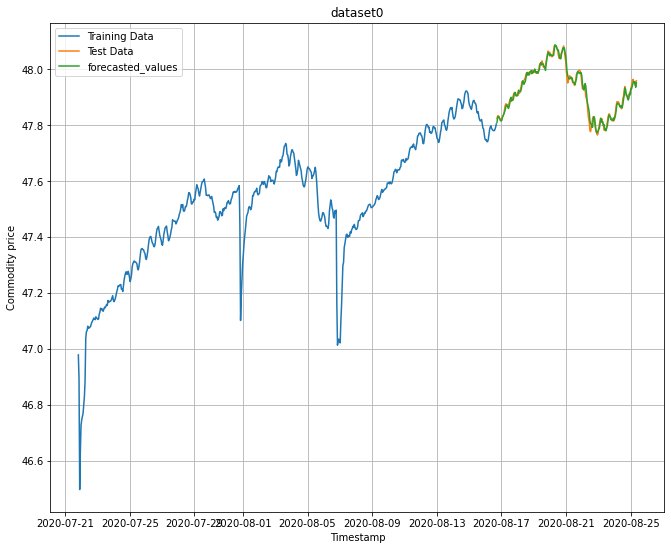

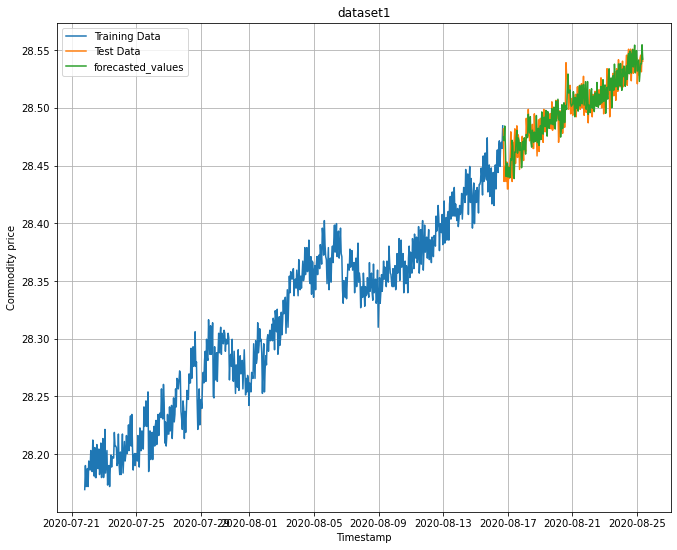

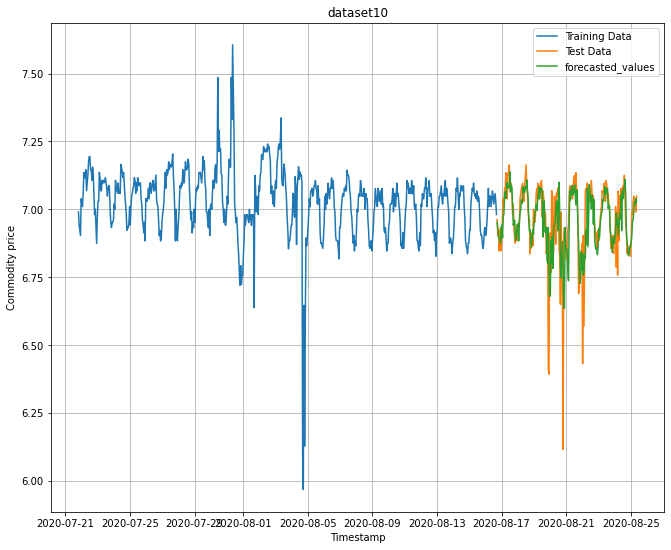

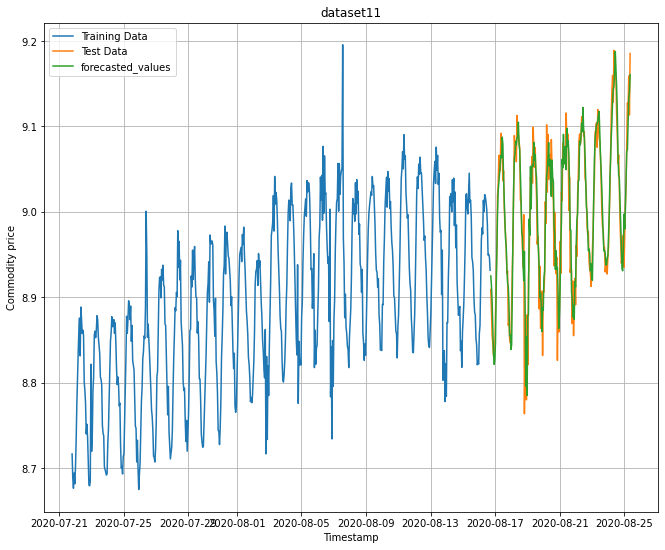

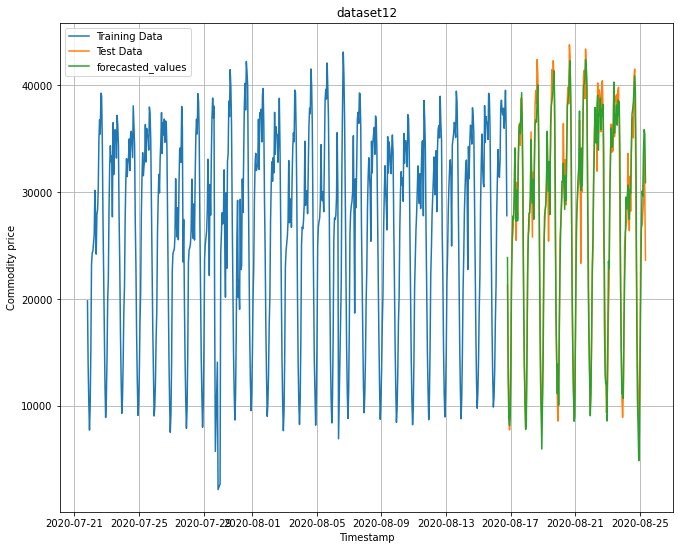

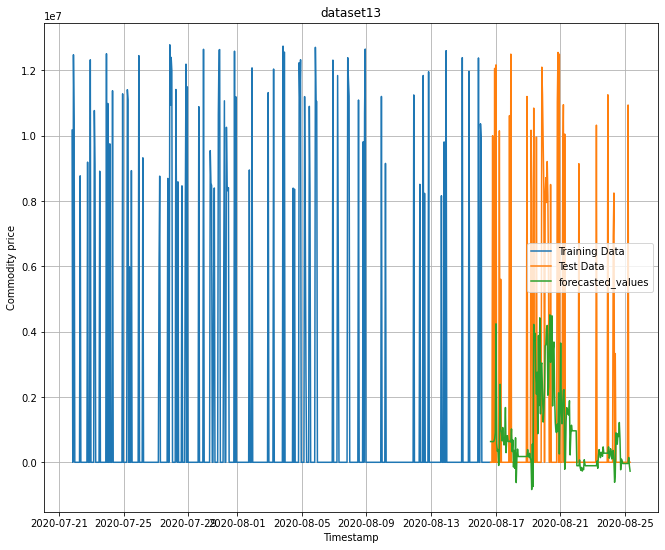

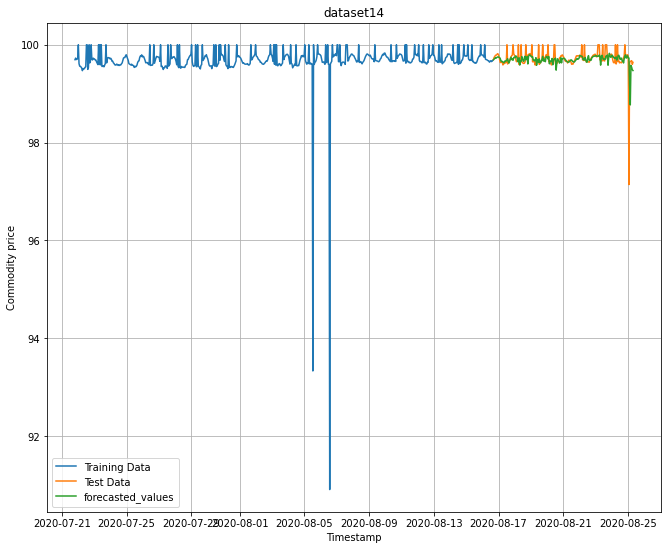

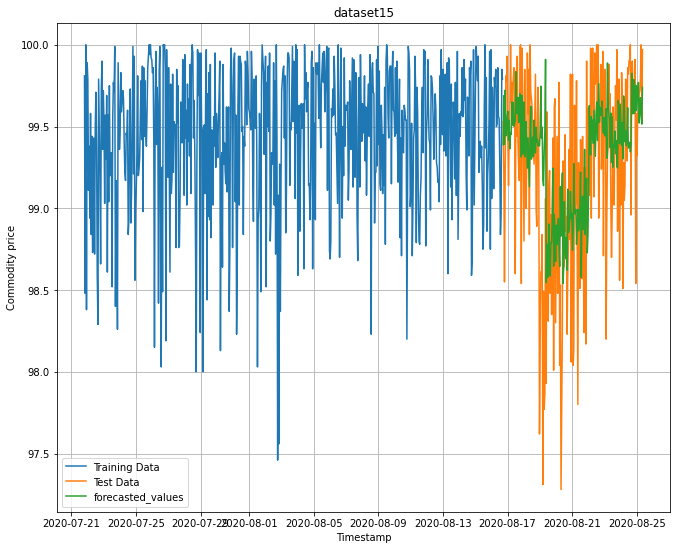

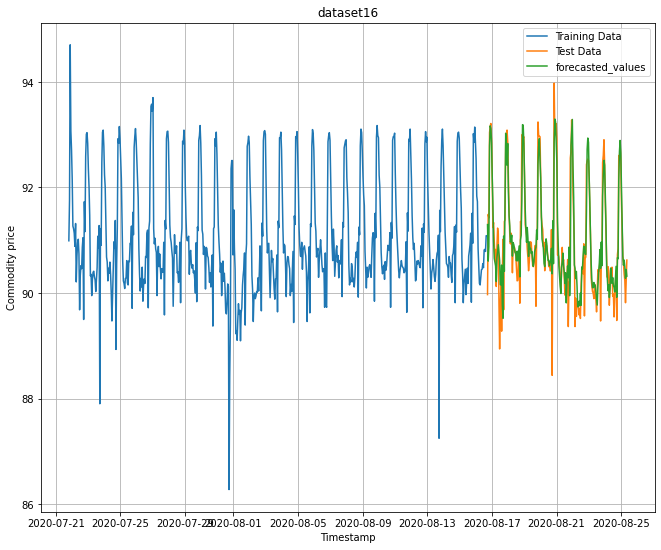

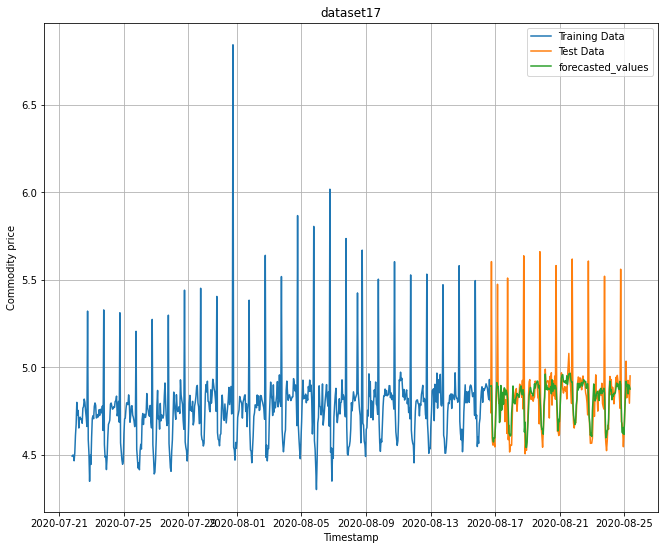

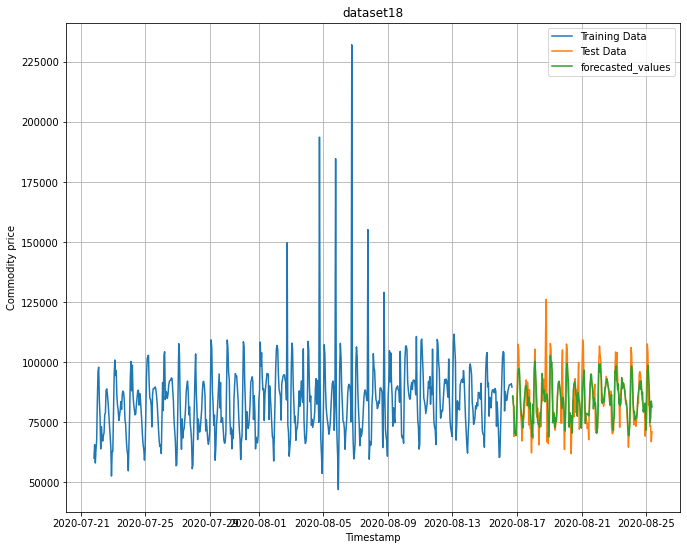

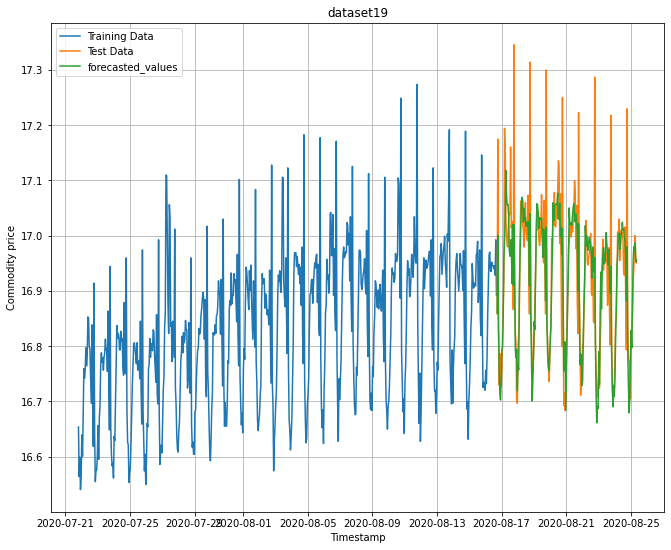

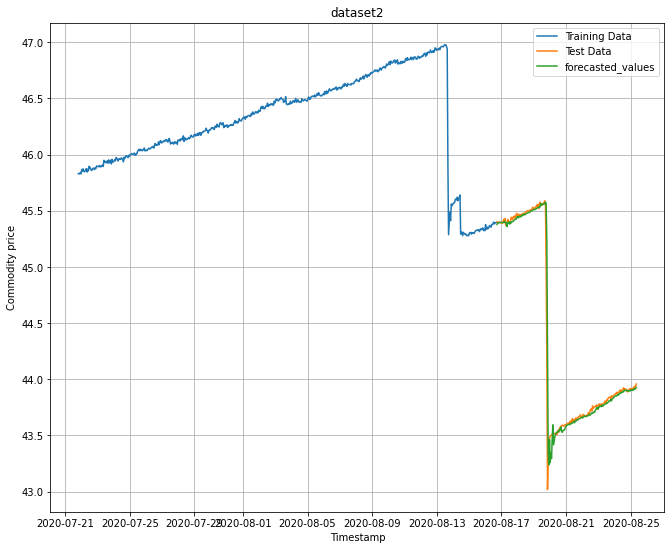

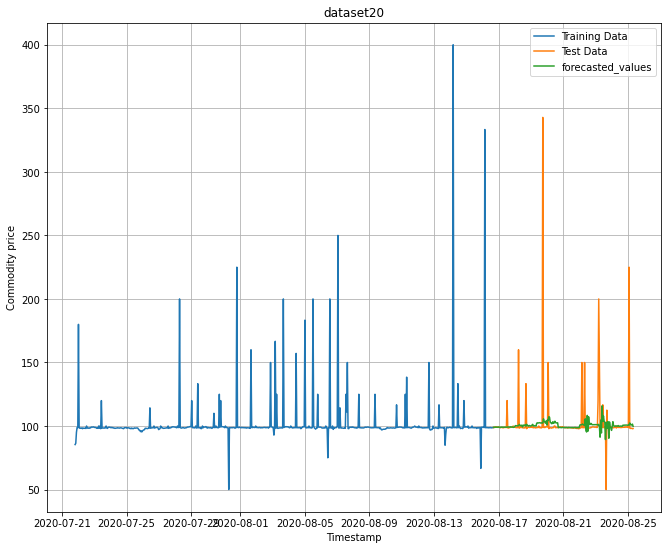

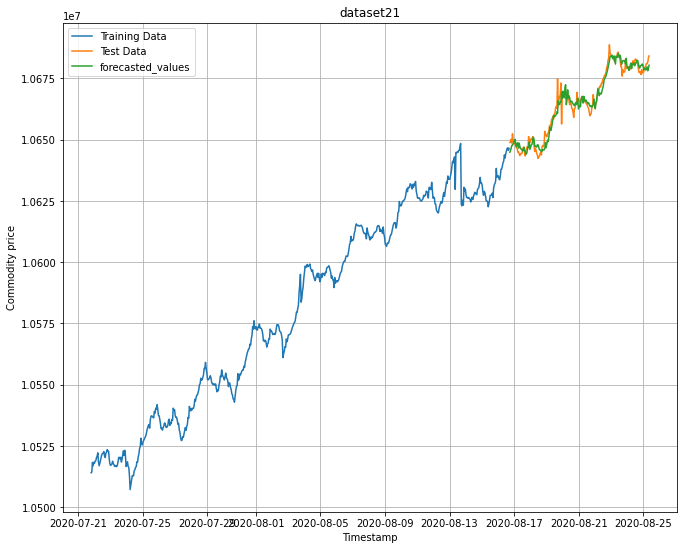

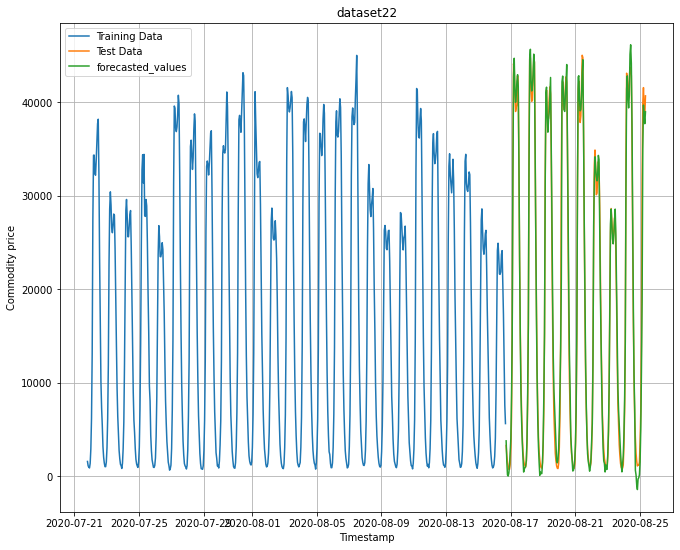

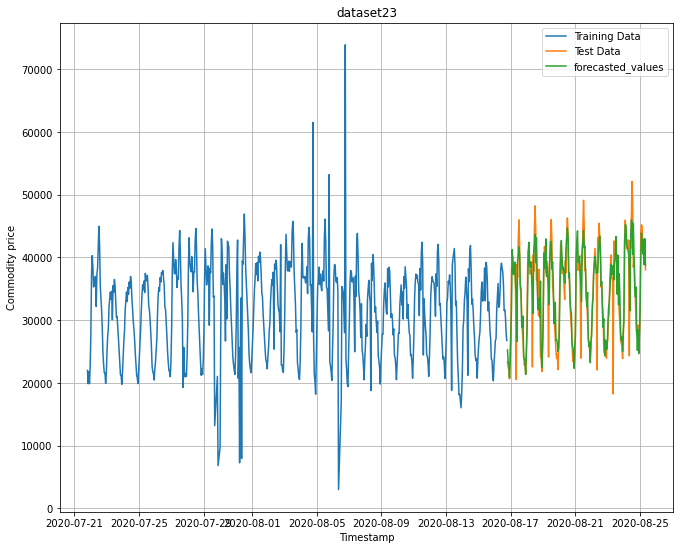

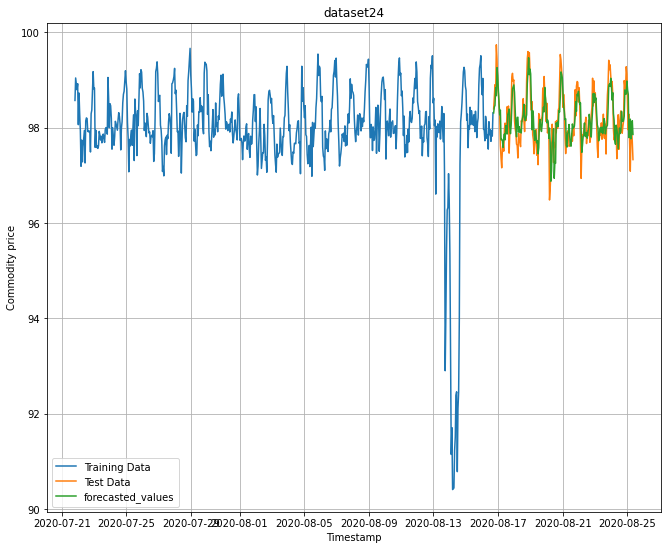

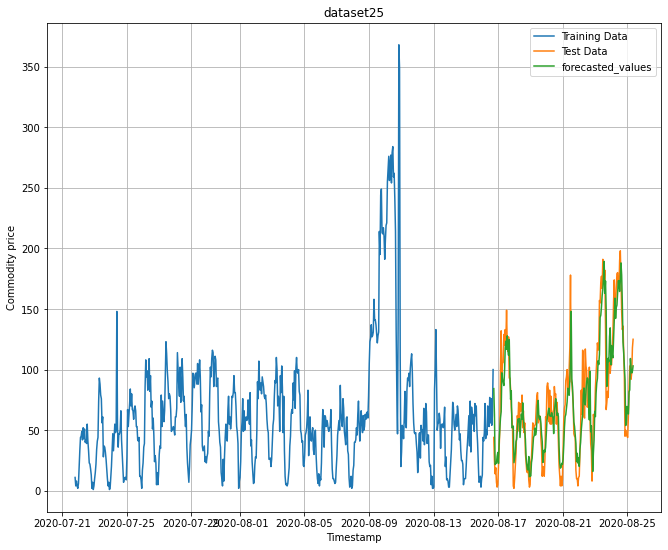

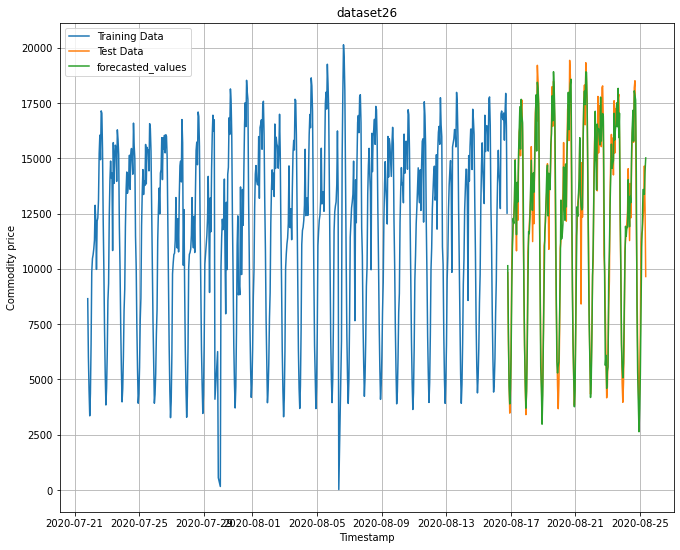

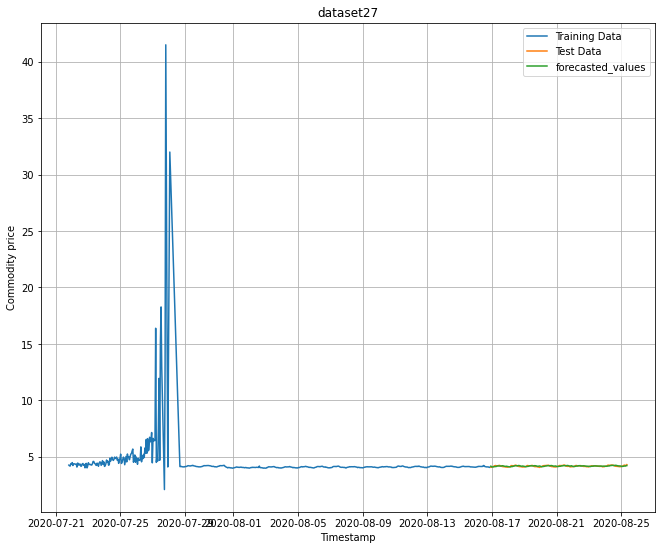

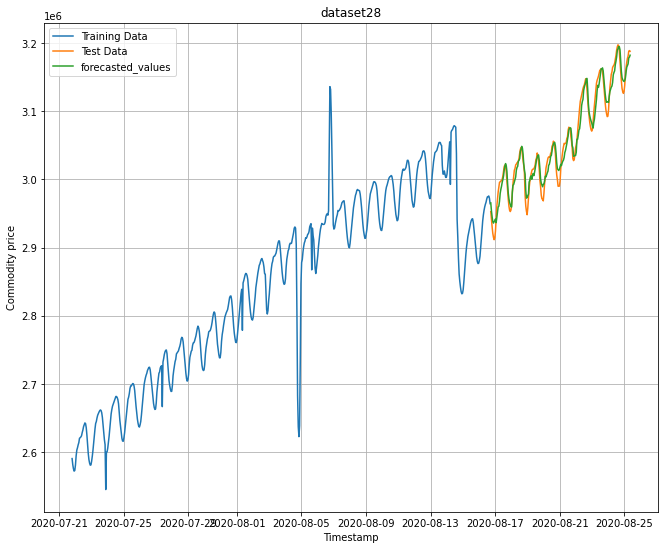

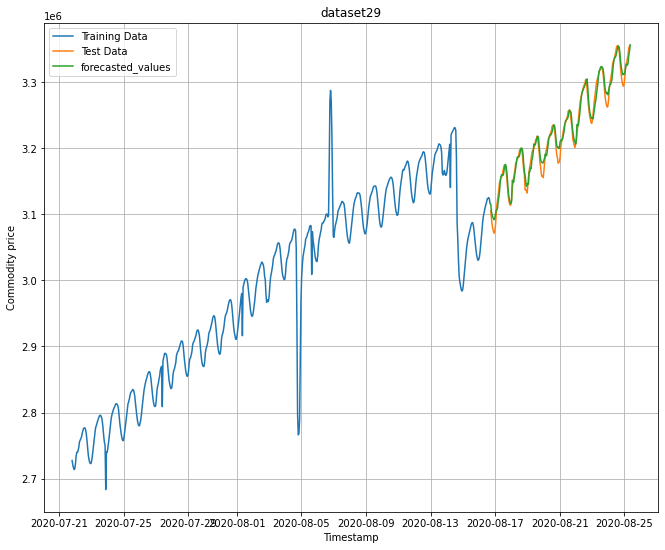

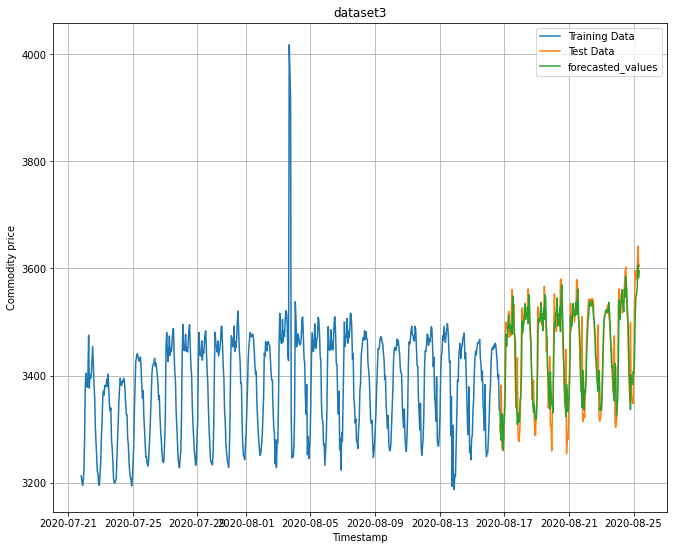

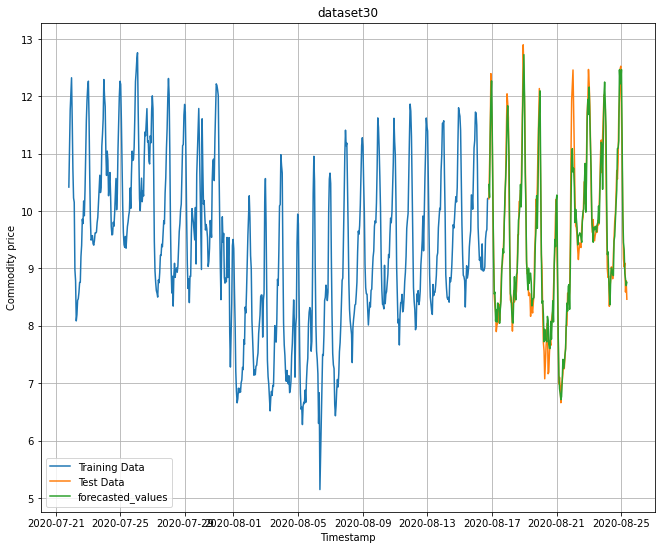

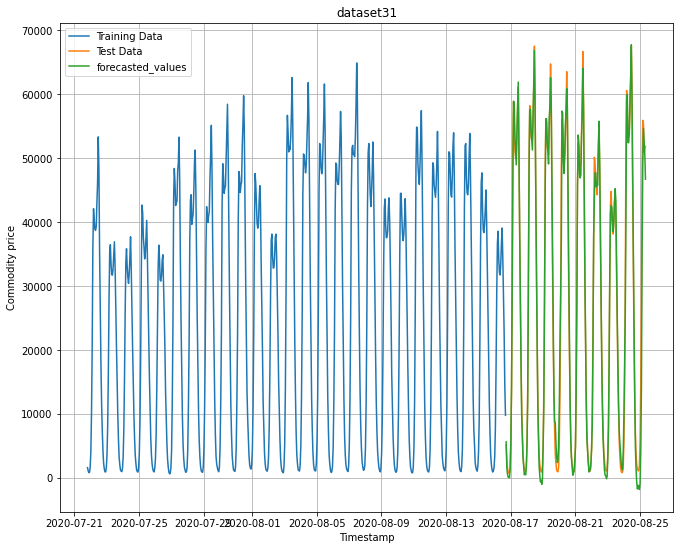

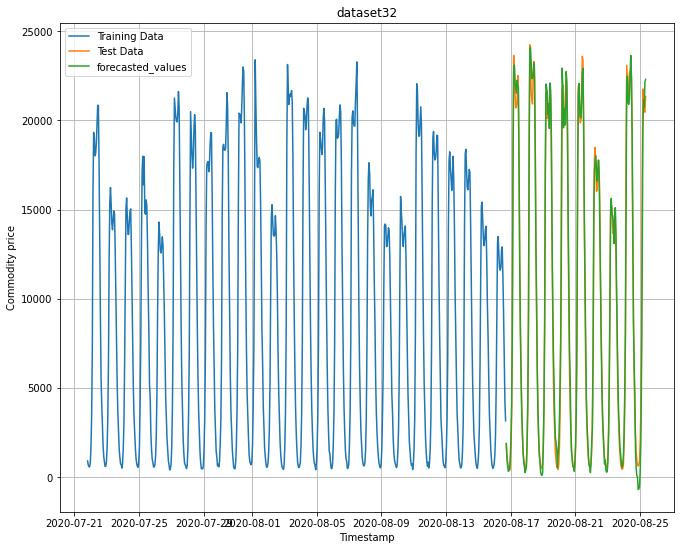

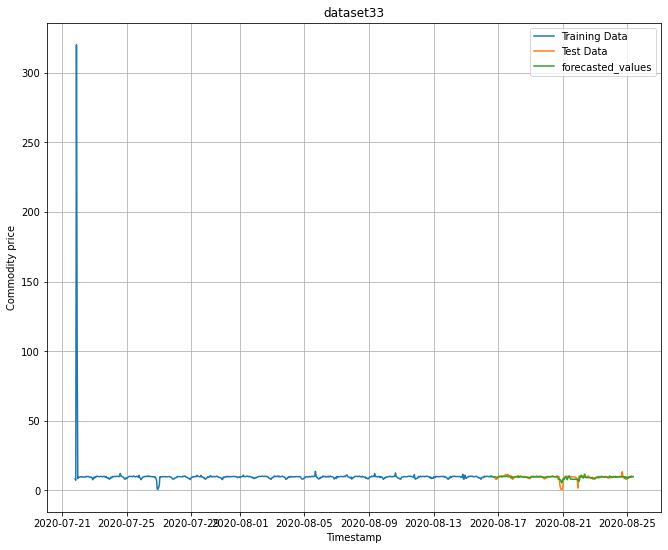

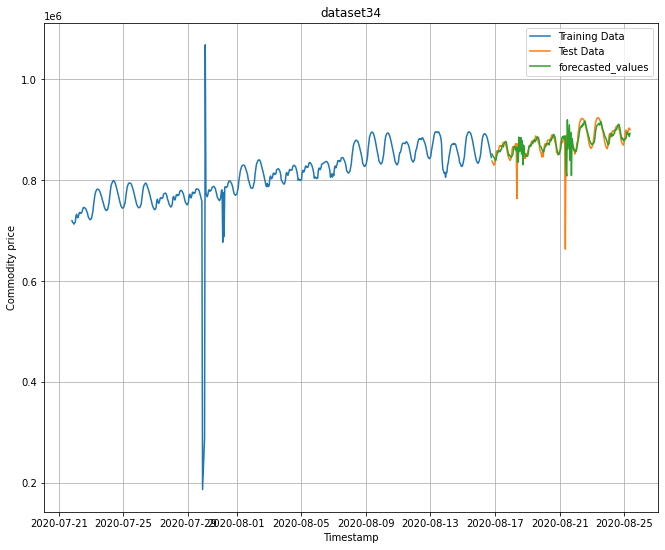

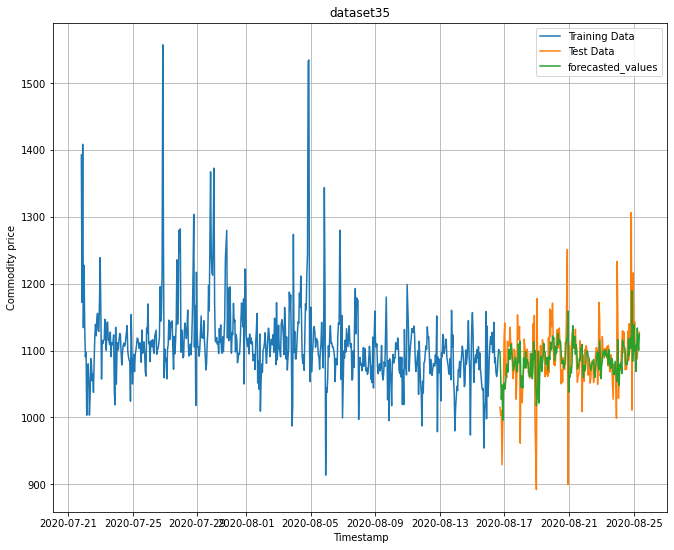

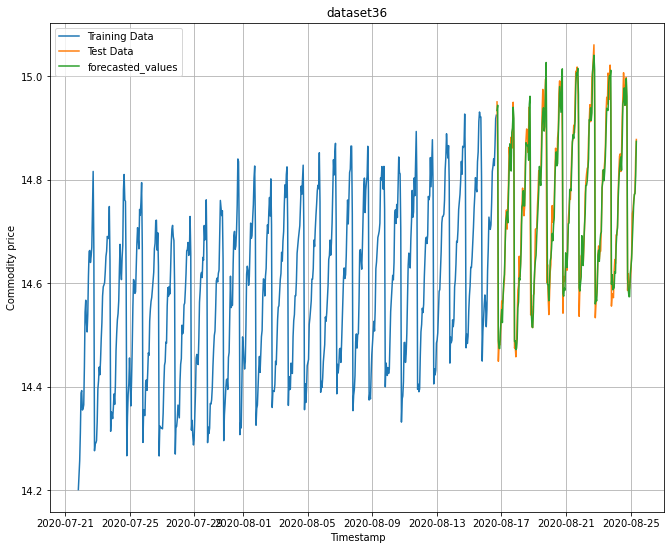

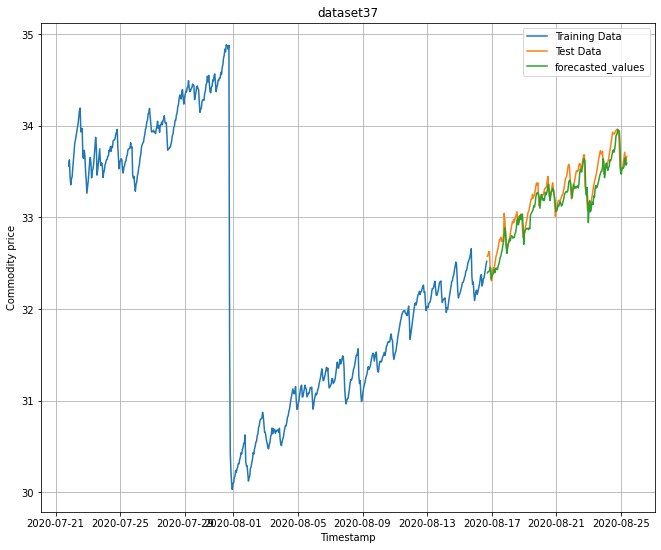

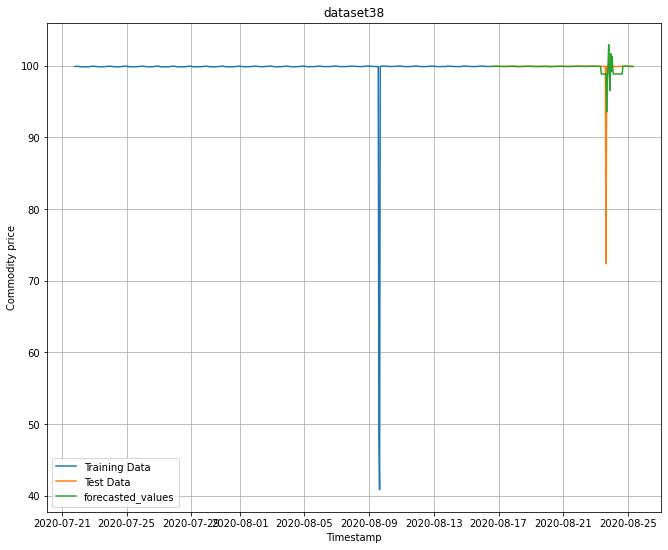

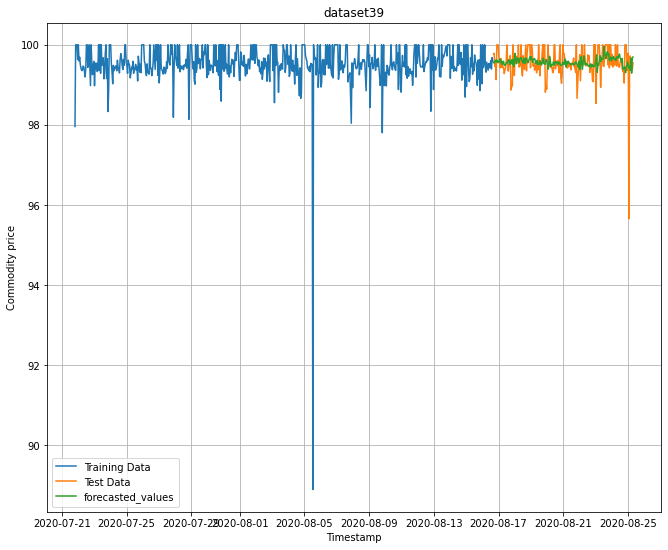

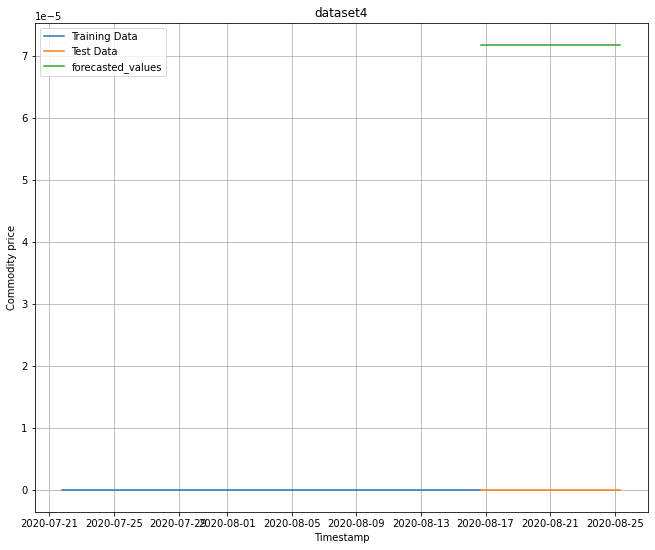

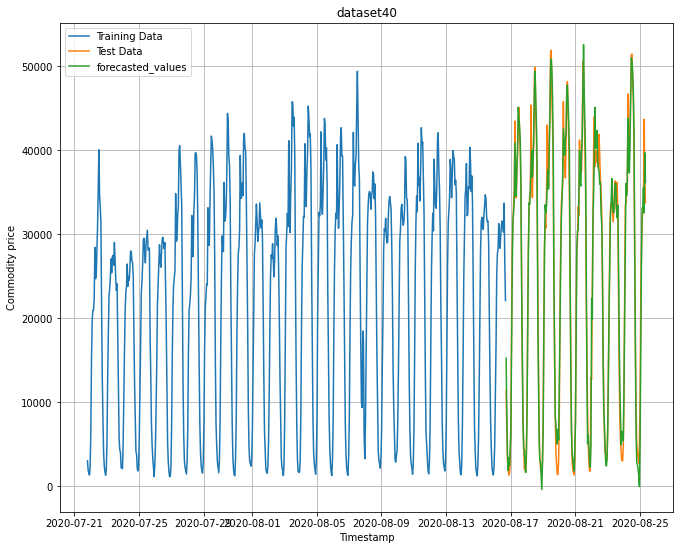

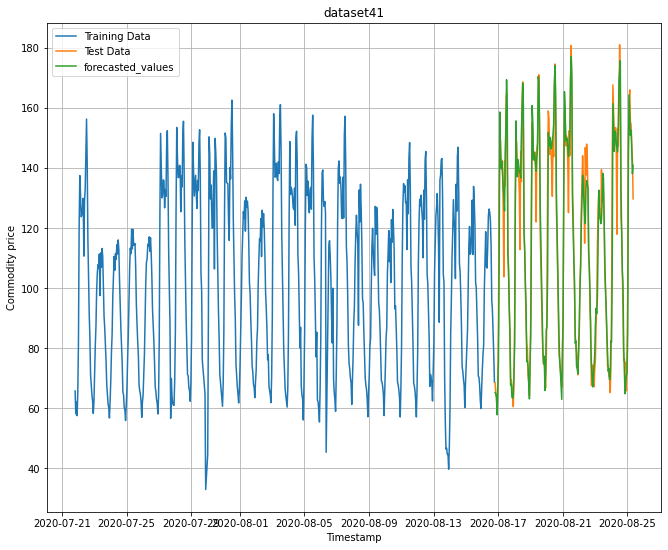

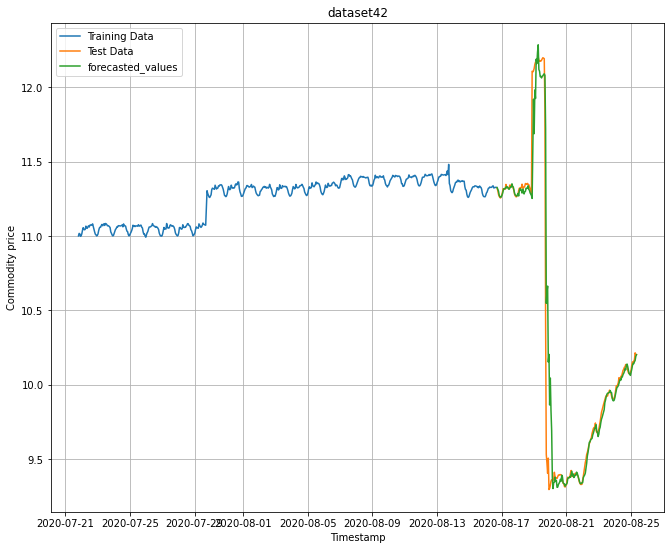

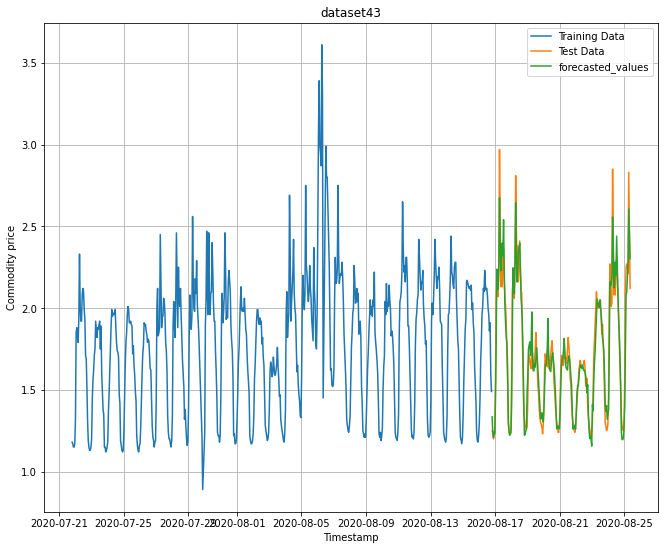

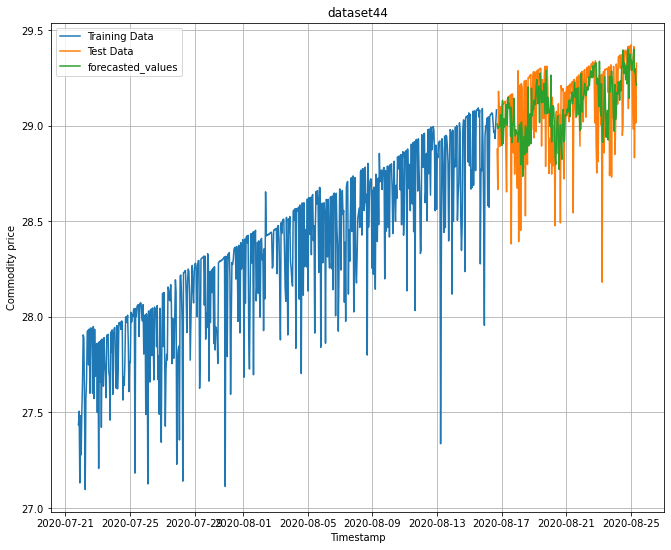

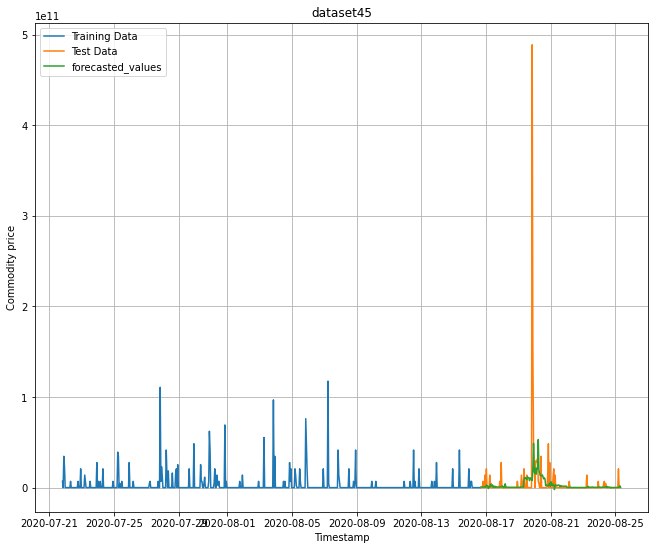

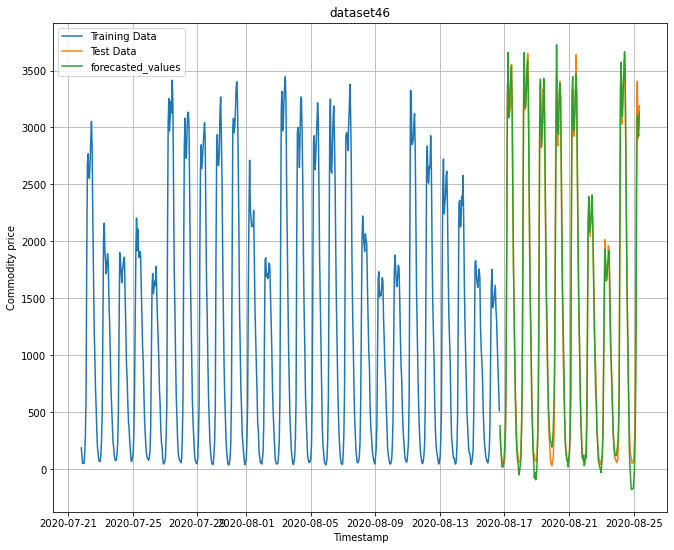

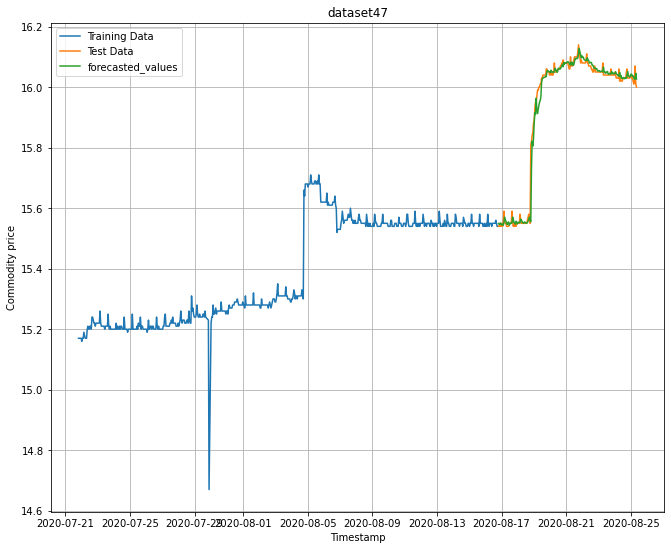

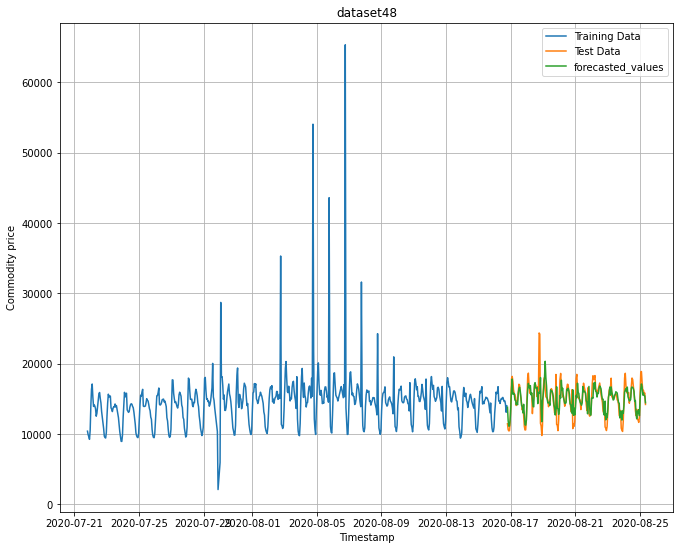

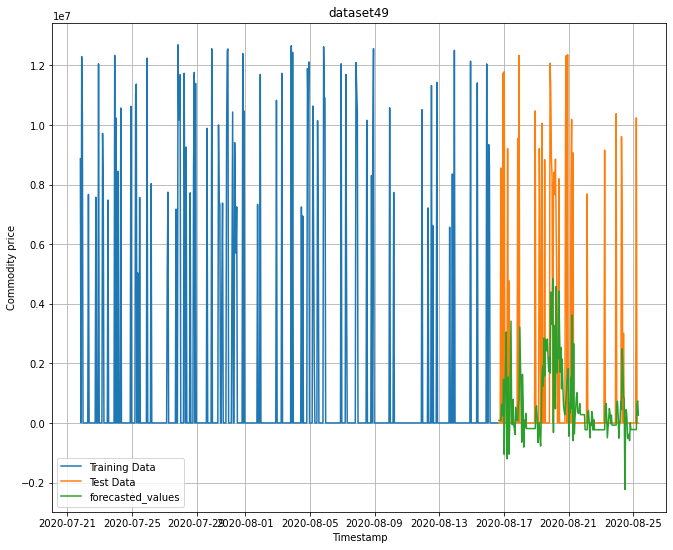

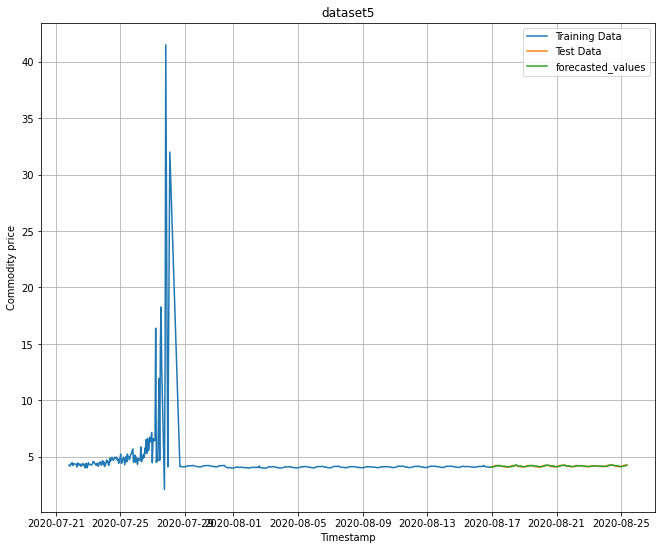

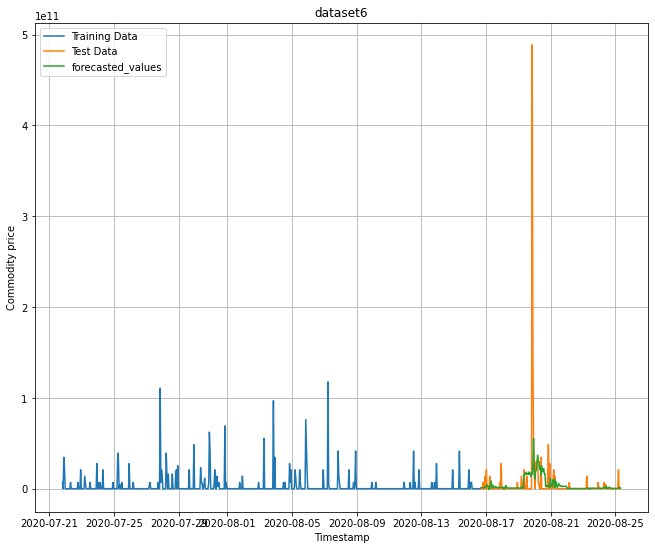

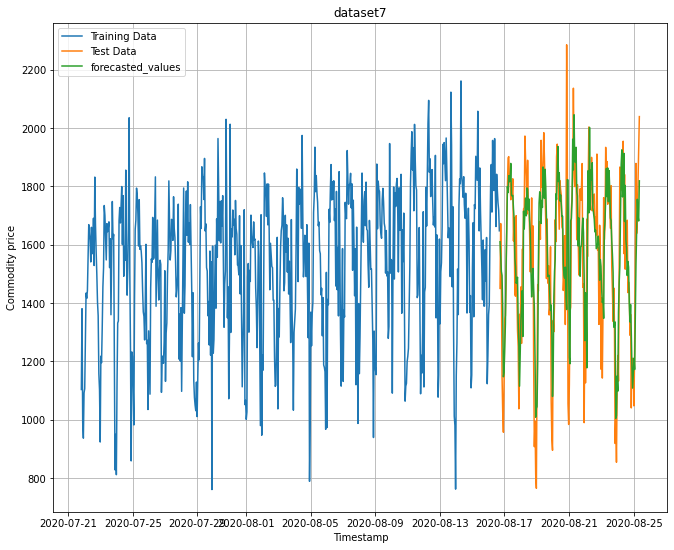

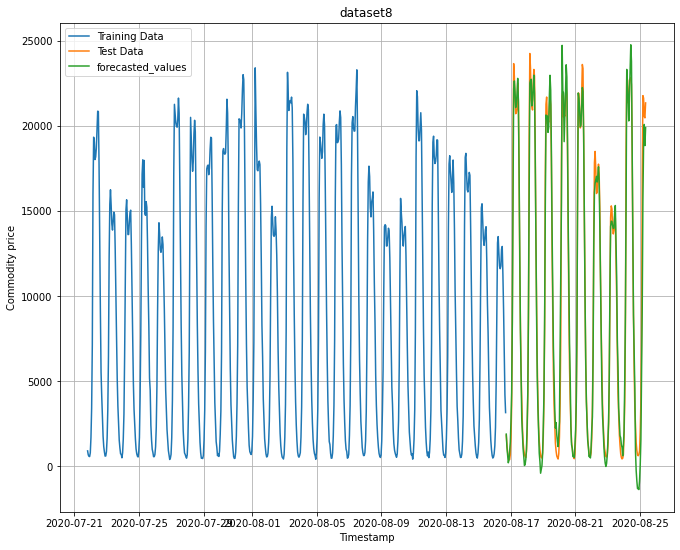

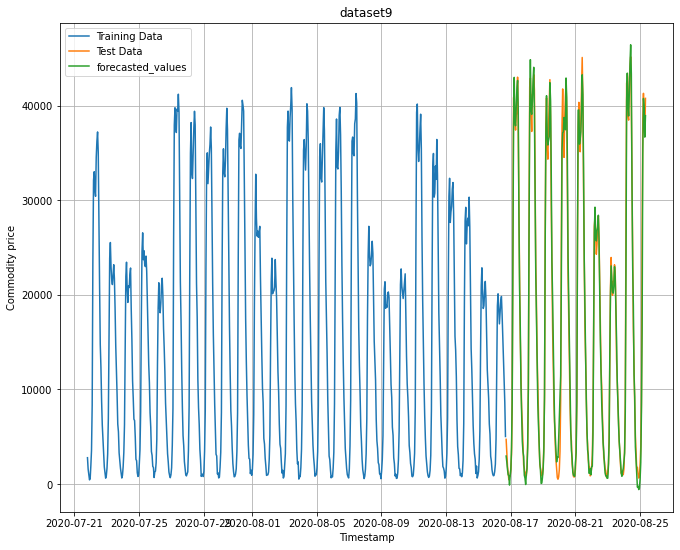

In [42]:
for key in all_data:
    plt.figure(figsize=(11,9))
    plot_timeseries(timestamps = train_timestamps[key], values = y_train[key], label='Training Data')
    plot_timeseries(timestamps= test_timestamps[key], values=y_test[key], label = 'Test Data')
    plot_timeseries(timestamps= test_timestamps[key], values= all_forecasts[key], label='forecasted_values')
    plt.title("dataset"+str(key))
    plt.savefig("plots/"+str(key))


In [46]:
all_metrics = {}
for key in all_data:
    metrics = compute_metrics(y_test[key], all_forecasts[key])
    all_metrics[key] = metrics

In [47]:
all_metrics

{'0': {'mae': 0.008847053,
  'mse': 0.00013509077,
  'rmse': 0.011622855,
  'mape': 0.018463187},
 '1': {'mae': 0.0075146877,
  'mse': 0.000102716804,
  'rmse': 0.01013493,
  'mape': 0.026372785},
 '10': {'mae': 0.0714263,
  'mse': 0.012285648,
  'rmse': 0.11084064,
  'mape': 1.0408834},
 '11': {'mae': 0.021965344,
  'mse': 0.00095149927,
  'rmse': 0.030846382,
  'mape': 0.24476151},
 '12': {'mae': 1620.0173,
  'mse': 4973653.5,
  'rmse': 2230.169,
  'mape': 7.224921},
 '13': {'mae': 2086427.4,
  'mse': 14260672000000.0,
  'rmse': 3776330.5,
  'mape': 18421260.0},
 '14': {'mae': 0.09550472,
  'mse': 0.049767647,
  'rmse': 0.22308664,
  'mape': 0.096037544},
 '15': {'mae': 0.43821782,
  'mse': 0.31350777,
  'rmse': 0.5599176,
  'mape': 0.44269553},
 '16': {'mae': 0.30613202,
  'mse': 0.21753088,
  'rmse': 0.46640205,
  'mape': 0.3369616},
 '17': {'mae': 0.08695955,
  'mse': 0.02954979,
  'rmse': 0.17190053,
  'mape': 1.7197056},
 '18': {'mae': 5580.8545,
  'mse': 59603564.0,
  'rmse': 7

In [48]:
results_df = pd.DataFrame.from_dict(all_metrics)

In [49]:
results_df

0         1        10        11            12            13  \
mae   0.008847  0.007515  0.071426  0.021965  1.620017e+03  2.086427e+06   
mse   0.000135  0.000103  0.012286  0.000951  4.973654e+06  1.426067e+13   
rmse  0.011623  0.010135  0.110841  0.030846  2.230169e+03  3.776330e+06   
mape  0.018463  0.026373  1.040883  0.244762  7.224921e+00  1.842126e+07   

            14        15        16        17  ...            45            46  \
mae   0.095505  0.438218  0.306132  0.086960  ...  6.734502e+09    115.281746   
mse   0.049768  0.313508  0.217531  0.029550  ...  1.257677e+21  27227.279297   
rmse  0.223087  0.559918  0.466402  0.171901  ...  3.546374e+10    165.006897   
mape  0.096038  0.442696  0.336962  1.719706  ...  1.552510e+07     41.473530   

            47            48            49         5             6  \
mae   0.013788  1.077876e+03  1.975520e+06  0.029042  7.440379e+09   
mse   0.000656  2.853375e+06  1.336461e+13  0.001342  1.228133e+21   
rmse  0.025610  1.689193e+03  3.655764e+06  0.036635  3.504473e+10   
mape  0.086540  7.508332e+00  2.727286e+06  0.696068  3.031135e+08   

                 7             8             9  
mae     139.794586  8.535461e+02  1.183598e+03  
mse   36257.121094  1.590453e+06  2.935327e+06  
rmse    190.413025  1.261131e+03  1.713280e+03  
mape      9.863010  3.161539e+01  2.597912e+01  

[4 rows x 50 columns]